# DENVER LIQUOR STORE AND DISPENSARY DATA PROJECT 

In this project the goal is to use safeGraph data along with Denver Liqour store and Dispensary data to provide analysis regarding seasonal and visiting trends for the entire year of 2018 as well as the trends in between the months of 2018

### Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#Google Authorization
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Read Data

In [ ]:
def pd_read_csv_drive(id, drive, dtype=None):
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('Filename.csv')  
  return(pd.read_csv('Filename.csv',dtype=dtype))

def get_drive_id(filename):
    drive_ids = {'liquor_licenses.csv' : '1um6gcOOY_-7RVKbbj4xg_nvToOI8354g',
                 'marijuana_active_business_licenses.csv' : '1A9QlWTz4RDg1bCE4MPHZP1VGweeSTvaU',
                 'patterns_2018.csv' : '1N3A7sCKWAhK4wdohx_QUne1jyCBwNYAY',
                 'patterns_2018_m.csv': '1UnQ7I3v4sEHX2GfhcIAFBH1kb6g9bnjE'
                 }
    return(drive_ids[filename])
  
liquor_df = pd_read_csv_drive(get_drive_id('liquor_licenses.csv'), drive=drive)
liquor_df.head(3)

,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,ADDRESS_ID,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD
0,2002-BFN-77487,SWANKY'S,1938 BLAKE ST,LIQUOR - TAVERN,LICENSE ISSUED - ACTIVE,2020-10-26 09:42:22,2021-10-04 00:00:00,None,None,None,None,None,80202,9,6,01701,Union Station,D-LD,3142106.0,1699804.0
1,2005-BFN-1015022,ARADA-GEBEYA,750 SANTA FE DR,LIQUOR - HOTEL AND RESTAURANT,LICENSE ISSUED - ACTIVE,2020-11-30 08:38:35,2021-11-07 00:00:00,None,None,None,None,None,80204,3,1,01800,Lincoln Park,C-MS-5,3141112.0,1690546.0
2,2019-BFN-0001401,HOMEWOOD SUITE & TRU BY HILTON DENVER AIRPORT,6951 N YAMPA,LIQUOR - LODGING AND ENTERTAINMENT,LICENSE ISSUED - ACTIVE,2020-07-07 14:08:34.000001,2021-06-02 00:00:00,252436.0,6951 N Yampa St,None,Denver,CO,80249,11,5,08313,DIA,C-MU-30,3203667.0,1725485.0


In [ ]:
dispensary_df = pd_read_csv_drive(get_drive_id('marijuana_active_business_licenses.csv'), drive=drive)
dispensary_df.head(3)

,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Facility Street Number,Facility Pre-Direction,Facility Street Name,Facility Street Type,Facility Unit Number,Facility City,Facility Zip Code
0,2016-BFN-0004371,Retail Marijuana Inf Prod Mfg,"NATTY REMS, LLC",NaN,License Issued - Active,9/12/2021 12:00:00 AM,4675,N,Kingston,NaN,NaN,Denver,80239.0
1,2016-BFN-0004369,Retail Marijuana Inf Prod Mfg,URBANE DEVELOPERS LLC,NaN,License Issued - Active,10/4/2021 12:00:00 AM,2191,S,JASON,ST,NaN,DENVER,80223.0
2,2016-BFN-0003858,Retail Marij Opt. Prem. Cultiv,HADCAV ENTERPRISES INC.,PURE MARIJUANA DISPENSARY,License Issued - Active,2/1/2022 12:00:00 AM,5475,N,Peoria,NaN,2-101-103,Denver,80239.0


In [ ]:
patt_df = pd_read_csv_drive(get_drive_id('patterns_2018.csv'), drive=drive)
patt_df.head(3)

,placekey,safegraph_place_id,parent_placekey,parent_safegraph_place_id,location_name,street_address,city,region,postal_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,227-222@5q9-bgt-brk,sg:2305ab09a06d4b7d90d15f91c26d5a0b,22b-222@5q9-bgt-brk,sg:9394910096104192b8b85d578b6d1a12,Tower Liquors,18611 Green Valley Ranch Blvd Unit 110,Denver,CO,80249,NaN,NaN,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,60,53,"[1,1,2,4,2,1,0,1,2,3,2,1,1,2,1,4,5,3,5,3,2,1,3...",80310083892,"{""080310083893"":6,""080310083892"":5,""0803100839...","{""080319800001"":9,""080310083893"":5,""0803100839...","{""US"":52}",3021.0,10.0,"{""<5"":3,""5-10"":31,""11-20"":17,""21-60"":4,""61-120...","{""Subway"":99,""T-Mobile"":20}","{""King Soopers"":56,""ConocoPhillips"":33,""Walmar...","[0,1,1,0,0,1,3,3,3,4,2,4,6,8,7,6,14,7,9,3,4,1,...","{""Monday"":5,""Tuesday"":12,""Wednesday"":13,""Thurs...","{""android"":39,""ios"":10}"
1,zzy-222@5q9-9x7-btv,sg:ac564835bc2f45a8a1e6d5c78bbdc074,zzw-223@5q9-9x7-bx5,sg:006a8772533b48e4af244ecc9ab9d238,Tamarac Liquors,333 S Tamarac Dr Unit O,Denver,CO,80231,NaN,NaN,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,40,29,"[0,0,2,1,3,1,0,1,1,5,2,1,1,0,1,1,1,1,3,1,0,2,0...",80310068114,"{""080310068111"":4,""080310038005"":4,""0800501510...","{""080050067122"":5,""080310040041"":4,""0800500710...","{""US"":29}",10641.0,45.0,"{""<5"":0,""5-10"":9,""11-20"":5,""21-60"":8,""61-120"":...",{},"{""King Soopers"":34,""Starbucks"":32,""ConocoPhill...","[0,0,0,0,0,0,1,2,4,5,9,7,10,10,8,7,5,3,3,4,3,2...","{""Monday"":6,""Tuesday"":3,""Wednesday"":12,""Thursd...","{""android"":16,""ios"":12}"
2,22f-222@5q9-bp4-54v,sg:d1472e7557e34cda8d6652d7c0921d0a,22f-222@5q9-bp4-4y9,sg:8b615e5c77ad479d826e9d33c57ca06d,H & D Liquor Store,1929 W Mississippi Ave,Denver,CO,80223,NaN,NaN,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,23,20,"[0,1,0,2,0,0,2,0,1,1,1,0,2,2,1,0,1,1,0,1,2,0,1...",80310013022,"{""080310013021"":4,""080310013023"":4,""0800100960...","{""080310013021"":4,""080310014012"":4,""0800101500...","{""US"":19}",2331.0,11.0,"{""<5"":1,""5-10"":10,""11-20"":7,""21-60"":3,""61-120""...","{""Burger King"":99}","{""Walmart"":57,""King Soopers"":50,""ConocoPhillip...","[0,0,0,0,0,0,0,2,1,1,3,1,1,5,6,3,3,1,3,2,0,0,0,0]","{""Monday"":1,""Tuesday"":4,""Wednesday"":4,""Thursda...","{""android"":13,""ios"":10}"


In [ ]:
patt_m_df = pd_read_csv_drive(get_drive_id('patterns_2018_m.csv'), drive=drive)
patt_m_df.head(3)

,placekey,safegraph_place_id,parent_placekey,parent_safegraph_place_id,location_name,street_address,city,region,postal_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,223-222@5q9-bfn-r49,sg:8039462f01b74096933a6d3a1379e121,NaN,NaN,Sticky Fingerz MED,3954 N Williams St,Denver,CO,80205,NaN,NaN,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,5,5,"[0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0...",80310036011,"{""060590320561"":4,""080010088011"":4}",{},"{""US"":4}",938668.0,11.0,"{""<5"":0,""5-10"":2,""11-20"":2,""21-60"":1,""61-120"":...",{},"{""ConocoPhillips"":39,""IHOP"":38,""Sonic"":37,""Dun...","[0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0]","{""Monday"":0,""Tuesday"":1,""Wednesday"":1,""Thursda...","{""android"":0,""ios"":4}"
1,222-223@5q9-9x8-ct9,sg:492eae43d7bf4caf9aabc20d455467f6,NaN,NaN,Higher Grade,3480 S Galena St,Denver,CO,80231,NaN,NaN,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,17,16,"[0,0,0,0,3,0,1,0,0,0,1,2,2,0,0,0,1,0,0,3,0,0,0...",80310068142,"{""080310044042"":6,""080010092071"":5,""0803501390...","{""080310068143"":4,""080310044042"":4,""0805901155...","{""US"":13}",16152.0,81.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":4,""61-120"":...",{},"{""King Soopers"":31,""ConocoPhillips"":31,""Walmar...","[5,2,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,3,4,5,10,...","{""Monday"":1,""Tuesday"":0,""Wednesday"":1,""Thursda...","{""android"":8,""ios"":4}"
2,227-224@5q9-bp7-8d9,sg:a6d84e3b5c214f348d316ee692702154,NaN,NaN,Lightshade Sheridan,1126 S Sheridan Blvd,Denver,CO,80232,NaN,NaN,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,12,8,"[0,0,1,0,0,1,2,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0...",80310046012,"{""080310045031"":4,""080310013012"":4,""0800500561...","{""080310045031"":4,""080590098372"":4,""0805901172...","{""US"":8}",5666.0,17.5,"{""<5"":0,""5-10"":2,""11-20"":5,""21-60"":0,""61-120"":...",{},"{""Dollar Tree"":58,""ConocoPhillips"":49,""7-Eleve...","[4,1,0,0,0,0,0,0,4,6,5,5,3,0,0,0,0,0,0,0,0,0,0,0]","{""Monday"":2,""Tuesday"":1,""Wednesday"":2,""Thursda...","{""android"":5,""ios"":4}"


## Dependencies for this project

In [ ]:
#Imports needed for basic EDA
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Installs + packages used for Plackey value generation + patterns data merge
!pip install placekey

from placekey.api import PlacekeyAPI
import pandas as pd
from ast import literal_eval
import json
from google.colab import drive as mountGoogleDrive 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#Google Authorization
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz
!tar -xvf spark-3.1.1-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install pyspark

spark-3.1.1-bin-hadoop2.7/
spark-3.1.1-bin-hadoop2.7/NOTICE
spark-3.1.1-bin-hadoop2.7/kubernetes/
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/python_executable_check.py
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/autoscale.py
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/decommissioning.py
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/decommissioning_cleanup.py
spark-3.1.1-bin-hadoop2.7/kubernetes/dockerfiles/
spark-3.1.1-bin-hadoop2.7/kubernetes/dockerfiles/spark/
spark-3.1.1-bin-hadoop2.7/kubernetes/dockerfiles/spark/decom.sh
spark-3.1.1-bin-hadoop2.7/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.1.1-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/
spark-3.1.1-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/
spark-3.1.1-bin-hadoop2.7/kubernetes/docker

## Data Load 

**This section is to load the data** 

**This is the schema for the Denver Liqour data:**

>BFN - BFN Identifier 

>BUS_PROF_NAME - Business name

>FULL_ADDRESS - Address of the business

>LICENSES - License type

>LIC_STATUS - Status of the license 

>ISSUE_DATE - Date of License Issue

>END_DATE - License Expiration date

>ADDRESS_ID - Unique Address identifier

>ADDRESS_LINE1 - Primary address associated with the establishment

>ADDRESS_LINE2 - Secondary address associated with the establishment

>CITY - City of establishment

>STATE - State of establishment

>ZIP - Postal Code of Establishment 

>COUNCIL_DIST - Council dist unique identifier

>POLICE_DIST - Police dist unique identifier

>CENSUS_TRACT - Census tract identifier

>NEIGHBORHOOD - Neighborhood of liquor store

>ZONE_DISTRICT - Zone district unique identifier

>X_COORD - Longitude of establishment

>Y_COORD - Latitude of establishment

**This is the Schema for the Dispensary data:**

>Business File Number	- unique business ID

>License_Type - Type of License 

>ENTITY NAME - Name of the establishment

>TRADE NAME -  Name of business

>Current License Status - License status of business

>Expiration Date - Expiration Date of the license

>Facility Street Number - Address street number

>Facility Pre-Direction - Compass direction of Address

>Facility Street Type - Address street type

>Facility Unit Number - Address Unit Number

>Facility City - City of establishment

>Facility Zip Code - Zip code of establishment

In [ ]:
#Data Load
Liquor_path = '/content/drive/MyDrive/UpWork/safeGraph/Data Projects/Project1/liquor_licenses.csv'
liquor_df = pd.read_csv(Liquor_path)
liquor_df.head(3)

,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,ADDRESS_ID,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD
0,2002-BFN-77487,SWANKY'S,1938 BLAKE ST,LIQUOR - TAVERN,LICENSE ISSUED - ACTIVE,2020-10-26 09:42:22,2021-10-04 00:00:00,None,None,None,None,None,80202,9,6,01701,Union Station,D-LD,3142106.0,1699804.0
1,2005-BFN-1015022,ARADA-GEBEYA,750 SANTA FE DR,LIQUOR - HOTEL AND RESTAURANT,LICENSE ISSUED - ACTIVE,2020-11-30 08:38:35,2021-11-07 00:00:00,None,None,None,None,None,80204,3,1,01800,Lincoln Park,C-MS-5,3141112.0,1690546.0
2,2019-BFN-0001401,HOMEWOOD SUITE & TRU BY HILTON DENVER AIRPORT,6951 N YAMPA,LIQUOR - LODGING AND ENTERTAINMENT,LICENSE ISSUED - ACTIVE,2020-07-07 14:08:34.000001,2021-06-02 00:00:00,252436.0,6951 N Yampa St,None,Denver,CO,80249,11,5,08313,DIA,C-MU-30,3203667.0,1725485.0


In [ ]:
#Dispensery data load
dispo_path = '/content/drive/MyDrive/UpWork/safeGraph/Data Projects/Project1/marijuana_active_business_licenses.csv'
dispo_df = pd.read_csv(dispo_path)

## Basic EDA + data visualizations on Denver Liquor data

In [ ]:
#Unique types of locations w/ Liquor licenses 
unique_licences = liquor_df['LICENSES'].unique()
unique_licences = [x[9:] for x in unique_licences]
unique_licences

['TAVERN',
 'HOTEL AND RESTAURANT',
 'LODGING AND ENTERTAINMENT',
 'HOTEL AND RESTAURANT AND CABARET',
 'TAVERN AND CABARET',
 'BREW PUB AND CABARET',
 'STORE',
 'FERMENTED MALT BEVERAGE',
 'ARTS',
 'BEER & WINE',
 'CLUB',
 'TASTINGS',
 '3.2% BEER',
 'HOTEL AND RESTAURANT WITH OPTIONAL PREMISES AND CABARET',
 'HOTEL AND RESTAURANT WITH OPTIONAL PREMISES',
 'ART GALLERY PERMIT',
 'BREW PUB',
 "VINTNER'S RESTAURANT",
 'BED & BREAKFAST',
 'DRUG STORE',
 'LODGING AND ENTERTAINMENT AND CABARET',
 "VINTNER'S RESTAURANT AND CABARET",
 'DISTILLERY PUB',
 'CAMPUS LIQUOR COMPLEX AND CABARET',
 'ART GALLERY',
 'BEER & WINE AND CABARET']

LIQUOR - HOTEL AND RESTAURANT                                       737
LIQUOR - HOTEL AND RESTAURANT AND CABARET                           236
LIQUOR - FERMENTED MALT BEVERAGE                                    202
LIQUOR - STORE                                                      195
LIQUOR - TAVERN AND CABARET                                         159
LIQUOR - TAVERN                                                     123
LIQUOR - BEER & WINE                                                104
LIQUOR - TASTINGS                                                    28
LIQUOR - LODGING AND ENTERTAINMENT                                   25
LIQUOR - CLUB                                                        19
LIQUOR - BREW PUB AND CABARET                                        10
LIQUOR - ARTS                                                        10
LIQUOR - BREW PUB                                                     8
LIQUOR - ART GALLERY PERMIT                                     

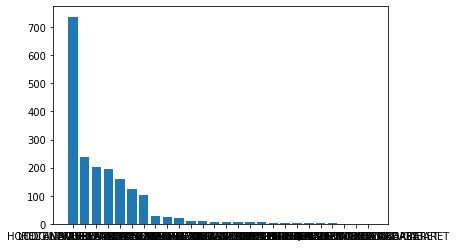

In [ ]:
#bar chart of unique types of liquor licenses 
plt.bar(unique_licences, liquor_df['LICENSES'].value_counts())
liquor_df['LICENSES'].value_counts()

In [ ]:
liquor_df['LIC_STATUS'].value_counts()

LICENSE ISSUED - ACTIVE    1532
DELINQUENT                  272
PENDING                      96
Name: LIC_STATUS, dtype: int64

In [ ]:
#Looking at only locations with Active Liqour licenses 
print("Shape Before drop:")
print(liquor_df.shape)
liquor_df = liquor_df.where(liquor_df['LIC_STATUS'] == 'LICENSE ISSUED - ACTIVE').dropna()
print("Shape After drop:")
print(liquor_df.shape)

Shape Before drop:
(1900, 20)
Shape After drop:
(1532, 20)


In [ ]:
# Dropping irrelavent columns
liquor_df = liquor_df.drop(['ADDRESS_ID','ADDRESS_LINE1','ADDRESS_LINE2'], axis = 1)
#Dropping columns that aren't recorded as from Denver, CO 
liquor_df = liquor_df.where(liquor_df['CITY'] == 'Denver').dropna()
liquor_df.head(3)

,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD
2,2019-BFN-0001401,HOMEWOOD SUITE & TRU BY HILTON DENVER AIRPORT,6951 N YAMPA,LIQUOR - LODGING AND ENTERTAINMENT,LICENSE ISSUED - ACTIVE,2020-07-07 14:08:34.000001,2021-06-02 00:00:00,Denver,CO,80249,11.0,5,08313,DIA,C-MU-30,3203667.0,1725485.0
5,2015-BFN-0002853,OTRA VEZ,614 16TH ST,LIQUOR - HOTEL AND RESTAURANT AND CABARET,LICENSE ISSUED - ACTIVE,2020-11-02 10:29:29.000001,2021-09-30 00:00:00,Denver,CO,80202,9.0,6,01702,CBD,D-C,3142930.0,1696439.0
6,2013-BFN-1067035,RENAISSANCE DENVER DOWNTOWN - CITY CENTER,918 17TH,LIQUOR - HOTEL AND RESTAURANT AND CABARET,LICENSE ISSUED - ACTIVE,2021-01-20 11:39:43.000001,2022-01-06 00:00:00,Denver,CO,80202,9.0,6,01702,CBD,D-TD,3142484.0,1697519.0


80202         159
80211         110
80205          99
None           96
80206          93
             ... 
80210-4528      1
80265-0003      1
80210-3137      1
80202-1112      1
80211-3808      1
Name: ZIP, Length: 85, dtype: int64

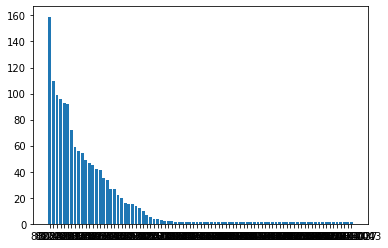

In [ ]:
plt.bar(liquor_df['ZIP'].unique(), liquor_df['ZIP'].value_counts())
liquor_df['ZIP'].value_counts()

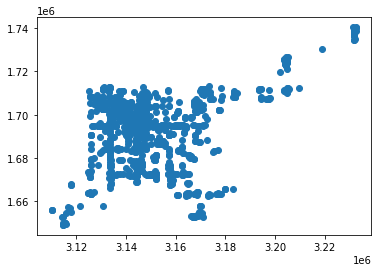

In [ ]:
plt.scatter(liquor_df['X_COORD'], liquor_df['Y_COORD'])

In [ ]:
#Task 1: The liquor license data will need to be filtered to liquor stores using the "LICENSES" column

liquor_df = liquor_df.where(liquor_df['LICENSES'] == 'LIQUOR - STORE').dropna()
liquor_df['index'] = range(1, len(liquor_df) + 1)
liquor_df.head(5)

,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD,index
11,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,1
20,2003-BFN-1006944,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-12-29 13:16:14,2022-01-21 00:00:00,Denver,CO,80204,3.0,1,00800,Sun Valley,C-MX-5,3133632.0,1695935.0,2
26,2003-BFN-1005638,SPORTSMAN LIQUOR,610 PERRY ST,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-09-29 09:05:30,2021-11-11 00:00:00,Denver,CO,80204,3.0,1,00905,Villa Park,E-MX-2X,3129602.0,1689711.0,3
29,2010-BFN-1050830,LOWRY WINE AND SPIRTS,727 QUEBEC ST,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-07-23 14:04:20,2021-08-04 00:00:00,Denver,CO,80220,5.0,2,04304,Montclair,E-CC-3X,3167693.0,1690429.0,4
41,2001-BFN-61413,NEW FIRST AVENUE LIQUORS,141 BROADWAY,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-22 16:25:29,2022-04-06 00:00:00,Denver,CO,80203,7.0,3,02100,Baker,U-MS-5,3144032.0,1687242.0,5


## Basic EDA + data visualizations on the Denver dispensary data

In [ ]:
dispo_df.head(2)

,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Facility Street Number,Facility Pre-Direction,Facility Street Name,Facility Street Type,Facility Unit Number,Facility City,Facility Zip Code
0,2016-BFN-0004371,Retail Marijuana Inf Prod Mfg,"NATTY REMS, LLC",NaN,License Issued - Active,9/12/2021 12:00:00 AM,4675,N,Kingston,NaN,NaN,Denver,80239.0
1,2016-BFN-0004369,Retail Marijuana Inf Prod Mfg,URBANE DEVELOPERS LLC,NaN,License Issued - Active,10/4/2021 12:00:00 AM,2191,S,JASON,ST,NaN,DENVER,80223.0


Retail Marij Opt. Prem. Cultiv    203
Med Marijuana Opt Prem Cultiv     196
Retail Marijuana Store            173
Medical Marijuana Center          157
Retail Marijuana Inf Prod Mfg      98
Med Marijuana Inf Prod Manuf       80
Marijuana Transporter               8
Med Marijuana Test Facility         6
Retail Marijuana Test Facility      5
Name: License Type, dtype: int64


<BarContainer object of 9 artists>

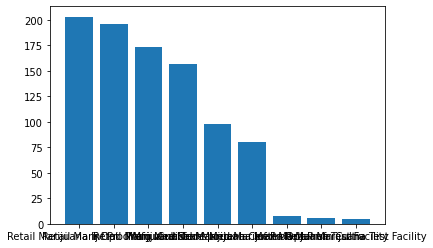

In [ ]:
# Graphing different locations w/ marijuana licenses 
print(dispo_df['License Type'].value_counts())
plt.bar(dispo_df['License Type'].unique(), dispo_df['License Type'].value_counts())

In [ ]:

dispo_df = dispo_df.where(dispo_df['License Type'] == 'Retail Marijuana Store').dropna()
dispo_df['index'] = range(1, len(dispo_df) + 1)
dispo_df['Facility Street Number'] = dispo_df['Facility Street Number'].astype(int)
dispo_df['Address'] = dispo_df[['Facility Street Number', 'Facility Street Name','Facility Street Type']].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
dispo_df.head(5)

,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Facility Street Number,Facility Pre-Direction,Facility Street Name,Facility Street Type,Facility Unit Number,Facility City,Facility Zip Code,index,Address
141,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325,S,INCA,ST,A,DENVER,80223.0,1,1325 INCA ST
226,2014-BFN-1072789,Retail Marijuana Store,"GAS AND GRASS, LLC",ROLLUP,License Issued - Active,8/19/2021 12:00:00 AM,4500,N,WASHINGTON,ST,B,DENVER,80216.0,2,4500 WASHINGTON ST
229,2014-BFN-0003138,Retail Marijuana Store,MAMMOTH DURANGO LLC,MAMMOTH FARMS,License Issued - Active,12/17/2021 12:00:00 AM,755,S,Federal,BLVD,4,Denver,80219.0,3,755 Federal BLVD
253,2016-BFN-0003367,Retail Marijuana Store,"TITAN HEALTH, LLC",TWEEDLEAF,License Issued - Active,2/3/2022 12:00:00 AM,755,S,JASON,ST,100,DENVER,80223.0,4,755 JASON ST
330,2013-BFN-1068848,Retail Marijuana Store,"CANOSA PROPERTY INVESTMENTS, LLC",BOTANICO 2,License Issued - Active,1/1/2022 12:00:00 AM,777,N,CANOSA,CT,102,DENVER,80204.0,5,777 CANOSA CT


## Placekey generation + patterns data loading for Liqour data

The schema for the patterns data can be found here:
[link text](https://docs.safegraph.com/v4.0/docs/places-schema#section-patterns)

In [ ]:
placekey_api_key = 'I0rCRT7FQshK7whZfcfRn56dGA3k4m5U'

pk_api = PlacekeyAPI(placekey_api_key)

In [ ]:
def pd_read_csv_drive(id, drive, dtype=None):
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('Filename.csv')  
  return(pd.read_csv('Filename.csv',dtype=dtype))

def get_drive_id(filename):
    drive_ids = {'liquor_licenses.csv' : '1um6gcOOY_-7RVKbbj4xg_nvToOI8354g',
                 'marijuana_active_business_licenses.csv' : '1A9QlWTz4RDg1bCE4MPHZP1VGweeSTvaU',
                 'patterns_2018.csv' : '1N3A7sCKWAhK4wdohx_QUne1jyCBwNYAY',
                 'patterns_2018_m.csv': '1UnQ7I3v4sEHX2GfhcIAFBH1kb6g9bnjE'
                 }
    return(drive_ids[filename])


In [ ]:
# loading brewery patterns data for just 2018 first 

patterns_18_path = '/content/drive/MyDrive/UpWork/safeGraph/Data Projects/Project1/patterns data/year_sep/patterns_2018.csv'
patterns18_df = pd.read_csv(patterns_18_path)
patterns18_df.head(5)


,placekey,safegraph_place_id,parent_placekey,parent_safegraph_place_id,location_name,street_address,city,region,postal_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,227-222@5q9-bgt-brk,sg:2305ab09a06d4b7d90d15f91c26d5a0b,22b-222@5q9-bgt-brk,sg:9394910096104192b8b85d578b6d1a12,Tower Liquors,18611 Green Valley Ranch Blvd Unit 110,Denver,CO,80249,NaN,NaN,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,60,53,"[1,1,2,4,2,1,0,1,2,3,2,1,1,2,1,4,5,3,5,3,2,1,3...",80310083892,"{""080310083893"":6,""080310083892"":5,""0803100839...","{""080319800001"":9,""080310083893"":5,""0803100839...","{""US"":52}",3021.0,10.0,"{""<5"":3,""5-10"":31,""11-20"":17,""21-60"":4,""61-120...","{""Subway"":99,""T-Mobile"":20}","{""King Soopers"":56,""ConocoPhillips"":33,""Walmar...","[0,1,1,0,0,1,3,3,3,4,2,4,6,8,7,6,14,7,9,3,4,1,...","{""Monday"":5,""Tuesday"":12,""Wednesday"":13,""Thurs...","{""android"":39,""ios"":10}"
1,zzy-222@5q9-9x7-btv,sg:ac564835bc2f45a8a1e6d5c78bbdc074,zzw-223@5q9-9x7-bx5,sg:006a8772533b48e4af244ecc9ab9d238,Tamarac Liquors,333 S Tamarac Dr Unit O,Denver,CO,80231,NaN,NaN,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,40,29,"[0,0,2,1,3,1,0,1,1,5,2,1,1,0,1,1,1,1,3,1,0,2,0...",80310068114,"{""080310068111"":4,""080310038005"":4,""0800501510...","{""080050067122"":5,""080310040041"":4,""0800500710...","{""US"":29}",10641.0,45.0,"{""<5"":0,""5-10"":9,""11-20"":5,""21-60"":8,""61-120"":...",{},"{""King Soopers"":34,""Starbucks"":32,""ConocoPhill...","[0,0,0,0,0,0,1,2,4,5,9,7,10,10,8,7,5,3,3,4,3,2...","{""Monday"":6,""Tuesday"":3,""Wednesday"":12,""Thursd...","{""android"":16,""ios"":12}"
2,22f-222@5q9-bp4-54v,sg:d1472e7557e34cda8d6652d7c0921d0a,22f-222@5q9-bp4-4y9,sg:8b615e5c77ad479d826e9d33c57ca06d,H & D Liquor Store,1929 W Mississippi Ave,Denver,CO,80223,NaN,NaN,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,23,20,"[0,1,0,2,0,0,2,0,1,1,1,0,2,2,1,0,1,1,0,1,2,0,1...",80310013022,"{""080310013021"":4,""080310013023"":4,""0800100960...","{""080310013021"":4,""080310014012"":4,""0800101500...","{""US"":19}",2331.0,11.0,"{""<5"":1,""5-10"":10,""11-20"":7,""21-60"":3,""61-120""...","{""Burger King"":99}","{""Walmart"":57,""King Soopers"":50,""ConocoPhillip...","[0,0,0,0,0,0,0,2,1,1,3,1,1,5,6,3,3,1,3,2,0,0,0,0]","{""Monday"":1,""Tuesday"":4,""Wednesday"":4,""Thursda...","{""android"":13,""ios"":10}"
3,222-223@5q9-9yv-d9z,sg:e094d4ed4ce541bca799b6804f8f3ad5,NaN,NaN,Lugano Wine And Spirits,9597 E Iliff Ave,Denver,CO,80231,NaN,NaN,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,173,123,"[1,8,10,19,16,20,11,4,2,2,0,2,1,4,1,3,6,3,5,6,...",80050872002,"{""080050872002"":7,""080050800002"":6,""0800500562...","{""080310068132"":8,""080050872002"":8,""0800100830...","{""US"":114}",5503.0,23.0,"{""<5"":2,""5-10"":39,""11-20"":37,""21-60"":45,""61-12...","{""Sprouts Farmers Market"":25}","{""King Soopers"":13,""Phillips 66"":11,""ConocoPhi...","[23,20,37,26,25,23,19,16,17,11,10,16,21,14,7,6...","{""Monday"":11,""Tuesday"":24,""Wednesday"":20,""Thur...","{""android"":109,""ios"":11}"
4,222-223@5q6-79m-qzz,sg:11cce726b8d340a4a62a585fdc18048b,NaN,NaN,Dk Liquors,7820 Washington St,Denver,CO,80229,NaN,NaN,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,64,49,"[3,0,3,4,1,0,0,4,1,2,1,2,2,1,0,2,3,4,1,1,0,2,5...",80010090022,"{""080010091011"":5,""080010088012"":4,""0800100900...","{""080010150002"":5,""080350141261"":4,""0800100900...","{""US"":49}",6012.0,11.0,"{""<5"":1,""5-10"":30,""11-20"":13,""21-60"":13,""61-12...","{""Lifetime Fitness"":100,""Chuze Fitness"":33,""Ta...","{""King Soopers"":43,""Starbucks"":34,""Walmart"":33...","[0,0,0,0,0,1,4,1,4,5,8,8,29,17,4,6,2,0,4,3,1,0...","{""Monday"":12,""Tuesday"":9,""Wednesday"":16,""Thurs...","{""androi

In [ ]:
def get_df_for_api(df,
                   column_map = {
                       "index": "query_id", "BUS_PROF_NAME" : "location_name","FULL_ADDRESS" : "street_address",
                       "CITY": "city", "region": "region", "ZIP": "postal_code"
                       }
                   ):
  df_for_api = df.rename(columns=column_map)
  cols = list(column_map.values())
  df_for_api = df_for_api[cols]
  df_for_api['iso_country_code'] = 'US'
  return(df_for_api)

liquor_df['index'] = liquor_df['index'].astype(str)
liquor_df['region'] = liquor_df['STATE']
df_for_api = get_df_for_api(liquor_df)
df_for_api.head(3)

,query_id,location_name,street_address,city,region,postal_code,iso_country_code
11,1,CANA WINE AND LIQUORS,3165 W 38TH,Denver,CO,80211,US
20,2,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,Denver,CO,80204,US
26,3,SPORTSMAN LIQUOR,610 PERRY ST,Denver,CO,80204,US


In [ ]:
data_jsoned = json.loads(df_for_api.to_json(orient="records"))
print("number of records: ", len(data_jsoned))
print("example record:")
data_jsoned[0]

number of records:  159
example record:


{'city': 'Denver',
 'iso_country_code': 'US',
 'location_name': 'CANA WINE AND LIQUORS',
 'postal_code': '80211',
 'query_id': '1',
 'region': 'CO',
 'street_address': '3165 W 38TH '}

In [ ]:
responses = pk_api.lookup_placekeys(data_jsoned, verbose=True)
df_placekeys = pd.read_json(json.dumps(responses), dtype={'query_id':str})
df_placekeys.head(7)

2021-06-23 02:12:53,180	INFO	Processed 159 items
2021-06-23 02:12:53,184	INFO	Done


,query_id,placekey,error
0,1,22s-223@5q9-bqc-9cq,NaN
1,2,223-222@5q9-bnr-cwk,NaN
2,3,22d@5q9-bnj-8sq,NaN
3,4,22v-222@5q9-bg4-99f,NaN
4,5,226@5q9-bqr-8sq,NaN
5,6,22k-222@5q9-bqm-rff,NaN
6,7,NaN,Invalid address


In [ ]:
def merge_and_format(loc_df, placekeys_df):
  lr_placekey = pd.merge(loc_df, placekeys_df, left_on="index", right_on="query_id", how='left')
  lr_placekey = lr_placekey.drop('error', axis=1)
  lr_placekey['address_placekey'] = df_placekeys.placekey.str[:3] + df_placekeys.placekey.str[-12:]
  lr_placekey = lr_placekey[['placekey', 'address_placekey'] + list(loc_df.columns)]
  return(lr_placekey)

loc_placekey = merge_and_format(liquor_df, df_placekeys)
loc_placekey.head(3)

,placekey,address_placekey,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD,index,region
0,22s-223@5q9-bqc-9cq,22s@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,1,CO
1,223-222@5q9-bnr-cwk,223@5q9-bnr-cwk,2003-BFN-1006944,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-12-29 13:16:14,2022-01-21 00:00:00,Denver,CO,80204,3.0,1,00800,Sun Valley,C-MX-5,3133632.0,1695935.0,2,CO
2,22d@5q9-bnj-8sq,22d@5q9-bnj-8sq,2003-BFN-1005638,SPORTSMAN LIQUOR,610 PERRY ST,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-09-29 09:05:30,2021-11-11 00:00:00,Denver,CO,80204,3.0,1,00905,Villa Park,E-MX-2X,3129602.0,1689711.0,3,CO


In [ ]:
def merge_with_patterns(patterns_df, loc_res_placekey):
  patterns_df['address_placekey'] = patterns_df.placekey.str[:3] + patterns_df.placekey.str[-12:]
  df = loc_res_placekey.merge(patterns_df.drop('placekey', axis=1), how='inner',on='address_placekey')
  #df = df.drop_duplicates('index')
  df = df.reset_index().drop('index',axis=1)
  return(df)

df = merge_with_patterns(patterns18_df, loc_placekey)
cols = list(df.columns)
cols.pop(cols.index('address_placekey'))
df = df[['address_placekey'] + cols]
print(df.shape)
liquor_GS_df = df
df.head(3)

(791, 48)


,address_placekey,level_0,placekey,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD,region_x,safegraph_place_id,parent_placekey,parent_safegraph_place_id,location_name,street_address,city,region_y,postal_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,22s@5q9-bqc-9cq,0,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,Cana Liquors,3165 W 38th Ave,Denver,CO,80211,NaN,NaN,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,27,20,"[1,0,0,1,0,1,3,1,0,0,2,6,0,0,1,0,1,1,2,2,0,0,1...",80310003011,"{""080310003011"":4,""080050071043"":4,""0811700040...","{""080310003034"":4,""080590118042"":4,""0811700040...","{""US"":20}",13531.0,16.0,"{""<5"":2,""5-10"":9,""11-20"":8,""21-60"":6,""61-120"":...","{""Taco Bell"":49}","{""King Soopers"":60,""Starbucks"":56,""McDonald's""...","[1,1,0,0,0,0,0,0,0,1,1,6,5,2,2,3,3,3,2,2,1,1,1,2]","{""Monday"":3,""Tuesday"":1,""Wednesday"":3,""Thursda...","{""android"":7,""ios"":9}"
1,22s@5q9-bqc-9cq,1,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,Cana Liquors,3165 W 38th Ave,Denver,CO,80211,NaN,NaN,2018-02-01T00:00:00-07:00,2018-03-01T00:00:00-07:00,47,20,"[2,1,3,0,1,2,0,2,1,2,1,1,0,0,4,0,1,1,2,2,3,2,4...",80310003011,"{""080310003011"":4,""080350139013"":4,""0800100932...","{""080310083892"":4,""080010085503"":4,""0805900984...","{""US"":18}",15227.0,24.0,"{""<5"":1,""5-10"":11,""11-20"":10,""21-60"":10,""61-12...","{""Walmart"":94,""Costco Wholesale Corp."":50}","{""ConocoPhillips"":39,""King Soopers"":35,""CrossF...","[0,0,0,0,0,1,1,2,2,3,5,6,7,10,10,11,12,3,5,5,4...","{""Monday"":7,""Tuesday"":6,""Wednesday"":4,""Thursda...","{""android"":5,""ios"":9}"
2,22s@5q9-bqc-9cq,2,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,Cana Liquors,3165 W 38th Ave,Denver,CO,80211,NaN,NaN,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,64,34,"[2,2,3,2,2,2,2,1,1,2,2,2,1,0,0,1,4,4,2,0,2,8,3...",80310003011,"{""081070005003"":5,""080310157004"":4,""0803100030...","{""080310003011"":5,""080399612044"":4,""0801403060...","{""US"":33}",18367.0,18.0,"{""<5"":1,""5-10"":19,""11-20"":14,""21-60"":14,""61-12...","{""Sunrise Senior Living"":33}","{""ConocoPhillips"":32,""McDonald's"":31,""7-Eleven...","[0,0,0,0,0,0,0,0,2,10,9,8,12,14,14,14,9,9,12,8...","{""Monday"":9,""Tuesday"":5,""Wednesday"":6,""Thursda...","{""android"":11,""ios"":24}"


## Placekey generation + patterns data loading for Dispensary data

The schema for the patterns data can be found here:
[link text](https://docs.safegraph.com/v4.0/docs/places-schema#section-patterns)

In [ ]:
#Repeating same process for Dispo Data
patterns_18_m_path = '/content/drive/MyDrive/UpWork/safeGraph/Data Projects/Project1/Patterns Data M/year sep/patterns_2018_m.csv'
patterns18_m_df = pd.read_csv(patterns_18_m_path)
#{'city', 'iso_country_code', 'query_id', 'location_name', 'longitude', 'postal_code', 'region', 'latitude', 'street_address'}

def get_df_for_api(df,
                   column_map = {
                       "index": "query_id", "Entity Name" : "location_name","Address" : "street_address",
                       "Facility City": "city", "region": "region", "Facility Zip Code": "postal_code"
                       }
                   ):
  df_for_api = df.rename(columns=column_map)
  cols = list(column_map.values())
  df_for_api = df_for_api[cols]
  df_for_api['iso_country_code'] = 'US'
  return(df_for_api)

dispo_df['index'] = dispo_df['index'].astype(str)
dispo_df['region'] = 'CO'
df_for_api = get_df_for_api(dispo_df)
df_for_api['postal_code'] = df_for_api['postal_code'].astype(int).astype(str)
df_for_api


,query_id,location_name,street_address,city,region,postal_code,iso_country_code
141,1,"BUD BUM, LLC",1325 INCA ST,DENVER,CO,80223,US
226,2,"GAS AND GRASS, LLC",4500 WASHINGTON ST,DENVER,CO,80216,US
229,3,MAMMOTH DURANGO LLC,755 Federal BLVD,Denver,CO,80219,US
253,4,"TITAN HEALTH, LLC",755 JASON ST,DENVER,CO,80223,US
330,5,"CANOSA PROPERTY INVESTMENTS, LLC",777 CANOSA CT,DENVER,CO,80204,US
348,6,"JGB VENTURES, LLC",3835 Elm ST,Denver,CO,80207,US
361,7,"SHRED INVESTMENTS, LLC",10625 51st AVE,Denver,CO,80239,US
445,8,GMC LLC,1355 SANTA FE DR,DENVER,CO,80204,US
475,9,"MILE HIGH DISPENSARY, LLC",1350 SHERIDAN BLVD,DENVER,CO,80232,US
513,10,"C.G. INDUSTRY, LLC",4902 SMITH RD,DENVER,CO,80216,US


In [ ]:
data_jsoned = json.loads(df_for_api.to_json(orient="records"))
print("number of records: ", len(data_jsoned))
print("example record:")
data_jsoned[0]

number of records:  17
example record:


{'city': 'DENVER',
 'iso_country_code': 'US',
 'location_name': 'BUD BUM, LLC',
 'postal_code': '80223',
 'query_id': '1',
 'region': 'CO',
 'street_address': '1325 INCA ST'}

In [ ]:
responses = pk_api.lookup_placekeys(data_jsoned, verbose=True)
df_placekeys = pd.read_json(json.dumps(responses), dtype={'query_id':str})
df_placekeys.head(20)

2021-06-23 02:12:54,387	INFO	Processed 17 items
2021-06-23 02:12:54,389	INFO	Done


,query_id,placekey,error
0,1,224-223@5q9-bp6-28v,NaN
1,2,226@5q9-bfm-3t9,NaN
2,3,NaN,Invalid address
3,4,225@5q9-bp6-gtv,NaN
4,5,224@5q9-bqp-q4v,NaN
5,6,223@5q9-bg8-ht9,NaN
6,7,223@5q9-bdn-4jv,NaN
7,8,22k@5q9-bqm-4qf,NaN
8,9,22r@5q9-bng-zzz,NaN
9,10,224@5q9-bfj-y5f,NaN


In [ ]:
def merge_and_format(loc_df, placekeys_df):
  lr_placekey = pd.merge(loc_df, placekeys_df, left_on="index", right_on="query_id", how='left')
  lr_placekey = lr_placekey.drop('error', axis=1)
  lr_placekey['address_placekey'] = df_placekeys.placekey.str[:3] + df_placekeys.placekey.str[-12:]
  lr_placekey = lr_placekey[['placekey', 'address_placekey'] + list(loc_df.columns)]
  return(lr_placekey)

loc_placekey_m = merge_and_format(dispo_df, df_placekeys)

In [ ]:
def merge_with_patterns(patterns_df, loc_res_placekey):
  patterns_df['address_placekey'] = patterns_df.placekey.str[:3] + patterns_df.placekey.str[-12:]
  print(patterns_df.shape)
  df = loc_res_placekey.merge(patterns_df.drop('placekey', axis=1), how='inner',on='address_placekey')
  ##Looks Like this Join is having some problems 
  print(df.shape)
  #df = df.drop_duplicates('index')
  df = df.reset_index().drop('index',axis=1)
  return(df)

df = merge_with_patterns(patterns18_m_df, loc_placekey_m)
#print(df.shape)





cols = list(df.columns)
cols.pop(cols.index('address_placekey'))
df = df[['address_placekey'] + cols]
#print(df.shape)
df.head(3)


(2328, 29)
(71, 45)


,address_placekey,level_0,placekey,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Facility Street Number,Facility Pre-Direction,Facility Street Name,Facility Street Type,Facility Unit Number,Facility City,Facility Zip Code,Address,region_x,safegraph_place_id,parent_placekey,parent_safegraph_place_id,location_name,street_address,city,region_y,postal_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,224@5q9-bp6-28v,0,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325,S,INCA,ST,A,DENVER,80223.0,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,NaN,NaN,Bud Bums,1325 S Inca St,Denver,CO,80223,NaN,NaN,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,41,10,"[0,1,0,1,2,1,0,3,3,4,1,1,1,0,0,3,0,1,4,0,0,1,1...",80310014011,"{""080050835003"":4,""080590101003"":4,""0805901205...","{""080310014011"":4,""080310003022"":4}","{""US"":9}",11833.0,85.0,"{""<5"":0,""5-10"":1,""11-20"":2,""21-60"":10,""61-120""...","{""REI"":33}","{""King Soopers"":60,""Sprouts Farmers Market"":40...","[0,0,0,0,0,0,1,2,21,33,30,24,15,7,4,1,0,0,0,0,...","{""Monday"":6,""Tuesday"":11,""Wednesday"":8,""Thursd...","{""android"":4,""ios"":10}"
1,224@5q9-bp6-28v,1,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325,S,INCA,ST,A,DENVER,80223.0,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,NaN,NaN,Bud Bums,1325 S Inca St,Denver,CO,80223,NaN,NaN,2018-02-01T00:00:00-07:00,2018-03-01T00:00:00-07:00,36,7,"[0,0,0,0,1,2,2,0,1,0,0,3,3,3,2,3,0,0,1,3,1,4,2...",80310014011,"{""080050835003"":4,""080410073002"":4,""0803100030...",{},"{""US"":8}",13831.0,156.5,"{""<5"":0,""5-10"":5,""11-20"":3,""21-60"":3,""61-120"":...","{""Chase"":50,""Starbucks"":31}","{""Starbucks"":76,""McDonald's"":43,""King Soopers""...","[0,0,0,0,0,0,3,4,20,31,28,23,14,9,8,5,2,0,0,0,...","{""Monday"":6,""Tuesday"":10,""Wednesday"":8,""Thursd...","{""android"":4,""ios"":4}"
2,224@5q9-bp6-28v,2,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325,S,INCA,ST,A,DENVER,80223.0,1325 INCA ST,CO,sg:4c2f25899b264b9285d61cc132e7e479,NaN,NaN,Amsterdam Cafe,1325 S Inca St,Denver,CO,80223,NaN,NaN,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,2,2,"[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0...",80310014011,"{""080310006002"":4}","{""080310046031"":4}","{""US"":4}",NaN,25.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":1,""61-120"":...",{},"{""Tuesday Morning"":50,""AutoZone"":49,""Sam's Clu...","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0]","{""Monday"":1,""Tuesday"":0,""Wednesday"":0,""Thursda...","{""android"":0,""ios"":5}"


## Liquor Geospatial data analysis 

Visitors and Population analysis for the entire 2018 dataset

In [ ]:
liquor_GS_df = liquor_GS_df.drop(['location_name','street_address','city','region_y','postal_code'], axis = 1)
liquor_GS_df.head()

,address_placekey,level_0,placekey,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD,region_x,safegraph_place_id,parent_placekey,parent_safegraph_place_id,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,22s@5q9-bqc-9cq,0,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,NaN,NaN,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,27,20,"[1,0,0,1,0,1,3,1,0,0,2,6,0,0,1,0,1,1,2,2,0,0,1...",80310003011,"{""080310003011"":4,""080050071043"":4,""0811700040...","{""080310003034"":4,""080590118042"":4,""0811700040...","{""US"":20}",13531.0,16.0,"{""<5"":2,""5-10"":9,""11-20"":8,""21-60"":6,""61-120"":...","{""Taco Bell"":49}","{""King Soopers"":60,""Starbucks"":56,""McDonald's""...","[1,1,0,0,0,0,0,0,0,1,1,6,5,2,2,3,3,3,2,2,1,1,1,2]","{""Monday"":3,""Tuesday"":1,""Wednesday"":3,""Thursda...","{""android"":7,""ios"":9}"
1,22s@5q9-bqc-9cq,1,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,NaN,NaN,2018-02-01T00:00:00-07:00,2018-03-01T00:00:00-07:00,47,20,"[2,1,3,0,1,2,0,2,1,2,1,1,0,0,4,0,1,1,2,2,3,2,4...",80310003011,"{""080310003011"":4,""080350139013"":4,""0800100932...","{""080310083892"":4,""080010085503"":4,""0805900984...","{""US"":18}",15227.0,24.0,"{""<5"":1,""5-10"":11,""11-20"":10,""21-60"":10,""61-12...","{""Walmart"":94,""Costco Wholesale Corp."":50}","{""ConocoPhillips"":39,""King Soopers"":35,""CrossF...","[0,0,0,0,0,1,1,2,2,3,5,6,7,10,10,11,12,3,5,5,4...","{""Monday"":7,""Tuesday"":6,""Wednesday"":4,""Thursda...","{""android"":5,""ios"":9}"
2,22s@5q9-bqc-9cq,2,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,NaN,NaN,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,64,34,"[2,2,3,2,2,2,2,1,1,2,2,2,1,0,0,1,4,4,2,0,2,8,3...",80310003011,"{""081070005003"":5,""080310157004"":4,""0803100030...","{""080310003011"":5,""080399612044"":4,""0801403060...","{""US"":33}",18367.0,18.0,"{""<5"":1,""5-10"":19,""11-20"":14,""21-60"":14,""61-12...","{""Sunrise Senior Living"":33}","{""ConocoPhillips"":32,""McDonald's"":31,""7-Eleven...","[0,0,0,0,0,0,0,0,2,10,9,8,12,14,14,14,9,9,12,8...","{""Monday"":9,""Tuesday"":5,""Wednesday"":6,""Thursda...","{""android"":11,""ios"":24}"
3,22s@5q9-bqc-9cq,3,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,NaN,NaN,2018-04-01T00:00:00-06:00,2018-05-01T00:00:00-06:00,37,32,"[0,2,1,0,1,0,2,2,0,0,0,1,0,3,1,0,2,1,2,3,1,2,1...",80310003011,"{""080310006001"":4,""080050831002"":4,""0805901205...","{""080140300001"":4,""080010093252"":4,""0800100960...","{""US"":33}",15227.0,28.0,"{""<5"":1,""5-10"":4,""11-20"":8,""21-60"":17,""61-120""...","{""Dollar Tree"":49}","{""7-Eleven"":33,""King Soopers"":31,""Target"":22,""...","[0,0,0,0,0,1,1,2,2,6,5,7,7,8,9,4,5,6,3,1,3,4,3,1]","{""Monday"":3,""Tuesday"":6,""Wednesday"":1,""Thursda...","{""android"":9,""ios"":21}

In [ ]:
print(liquor_GS_df['safegraph_brand_ids'].value_counts())
print(liquor_GS_df['brands'].value_counts())

liquor_GS_df = liquor_GS_df.drop(['safegraph_brand_ids','brands'],axis = 1)

Series([], Name: safegraph_brand_ids, dtype: int64)
Series([], Name: brands, dtype: int64)


In [ ]:
liquor_GS_df.head()

,address_placekey,level_0,placekey,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD,region_x,safegraph_place_id,parent_placekey,parent_safegraph_place_id,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,22s@5q9-bqc-9cq,0,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,27,20,"[1,0,0,1,0,1,3,1,0,0,2,6,0,0,1,0,1,1,2,2,0,0,1...",80310003011,"{""080310003011"":4,""080050071043"":4,""0811700040...","{""080310003034"":4,""080590118042"":4,""0811700040...","{""US"":20}",13531.0,16.0,"{""<5"":2,""5-10"":9,""11-20"":8,""21-60"":6,""61-120"":...","{""Taco Bell"":49}","{""King Soopers"":60,""Starbucks"":56,""McDonald's""...","[1,1,0,0,0,0,0,0,0,1,1,6,5,2,2,3,3,3,2,2,1,1,1,2]","{""Monday"":3,""Tuesday"":1,""Wednesday"":3,""Thursda...","{""android"":7,""ios"":9}"
1,22s@5q9-bqc-9cq,1,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-02-01T00:00:00-07:00,2018-03-01T00:00:00-07:00,47,20,"[2,1,3,0,1,2,0,2,1,2,1,1,0,0,4,0,1,1,2,2,3,2,4...",80310003011,"{""080310003011"":4,""080350139013"":4,""0800100932...","{""080310083892"":4,""080010085503"":4,""0805900984...","{""US"":18}",15227.0,24.0,"{""<5"":1,""5-10"":11,""11-20"":10,""21-60"":10,""61-12...","{""Walmart"":94,""Costco Wholesale Corp."":50}","{""ConocoPhillips"":39,""King Soopers"":35,""CrossF...","[0,0,0,0,0,1,1,2,2,3,5,6,7,10,10,11,12,3,5,5,4...","{""Monday"":7,""Tuesday"":6,""Wednesday"":4,""Thursda...","{""android"":5,""ios"":9}"
2,22s@5q9-bqc-9cq,2,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,64,34,"[2,2,3,2,2,2,2,1,1,2,2,2,1,0,0,1,4,4,2,0,2,8,3...",80310003011,"{""081070005003"":5,""080310157004"":4,""0803100030...","{""080310003011"":5,""080399612044"":4,""0801403060...","{""US"":33}",18367.0,18.0,"{""<5"":1,""5-10"":19,""11-20"":14,""21-60"":14,""61-12...","{""Sunrise Senior Living"":33}","{""ConocoPhillips"":32,""McDonald's"":31,""7-Eleven...","[0,0,0,0,0,0,0,0,2,10,9,8,12,14,14,14,9,9,12,8...","{""Monday"":9,""Tuesday"":5,""Wednesday"":6,""Thursda...","{""android"":11,""ios"":24}"
3,22s@5q9-bqc-9cq,3,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-04-01T00:00:00-06:00,2018-05-01T00:00:00-06:00,37,32,"[0,2,1,0,1,0,2,2,0,0,0,1,0,3,1,0,2,1,2,3,1,2,1...",80310003011,"{""080310006001"":4,""080050831002"":4,""0805901205...","{""080140300001"":4,""080010093252"":4,""0800100960...","{""US"":33}",15227.0,28.0,"{""<5"":1,""5-10"":4,""11-20"":8,""21-60"":17,""61-120""...","{""Dollar Tree"":49}","{""7-Eleven"":33,""King Soopers"":31,""Target"":22,""...","[0,0,0,0,0,1,1,2,2,6,5,7,7,8,9,4,5,6,3,1,3,4,3,1]","{""Monday"":3,""Tuesday"":6,""Wednesday"":1,""Thursda...","{""android"":9,""ios"":21}"
4,22s@5q9-bqc-9cq,4,22s-223@5q9-bqc-9cq,2013-BFN-1067236,

First lets analyze the average monthly visits for the entire dataset. To do this we can take just the needed columns to avoid clutter and store into a different DF

In [ ]:
l_avg_df = liquor_GS_df[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
l_avg_df.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
0,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,27,20,"[1,0,0,1,0,1,3,1,0,0,2,6,0,0,1,0,1,1,2,2,0,0,1..."
1,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-02-01T00:00:00-07:00,2018-03-01T00:00:00-07:00,47,20,"[2,1,3,0,1,2,0,2,1,2,1,1,0,0,4,0,1,1,2,2,3,2,4..."
2,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,64,34,"[2,2,3,2,2,2,2,1,1,2,2,2,1,0,0,1,4,4,2,0,2,8,3..."
3,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-04-01T00:00:00-06:00,2018-05-01T00:00:00-06:00,37,32,"[0,2,1,0,1,0,2,2,0,0,0,1,0,3,1,0,2,1,2,3,1,2,1..."
4,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-05-01T00:00:00-06:00,2018-06-01T00:00:00-06:00,61,43,"[2,2,2,2,4,0,2,2,2,2,1,4,2,2,2,3,1,2,0,4,0,1,1..."


In [ ]:
from ast import literal_eval
l_avg_df['visits_by_day'] = l_avg_df['visits_by_day'].transform(lambda x: literal_eval(x))
l_avg_df['Monthly_avg_visits'] = l_avg_df['visits_by_day'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
l_avg_df.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,Monthly_avg_visits
0,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,27,20,"[1, 0, 0, 1, 0, 1, 3, 1, 0, 0, 2, 6, 0, 0, 1, ...",0.870968
1,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-02-01T00:00:00-07:00,2018-03-01T00:00:00-07:00,47,20,"[2, 1, 3, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 0, 4, ...",1.678571
2,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,64,34,"[2, 2, 3, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 0, ...",2.064516
3,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-04-01T00:00:00-06:00,2018-05-01T00:00:00-06:00,37,32,"[0, 2, 1, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 3, 1, ...",1.233333
4,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-05-01T00:00:00-06:00,2018-06-01T00:00:00-06:00,61,43,"[2, 2, 2, 2, 4, 0, 2, 2, 2, 2, 1, 4, 2, 2, 2, ...",1.967742


In [ ]:
max_avg = l_avg_df[l_avg_df['Monthly_avg_visits'] == max(l_avg_df['Monthly_avg_visits'])]
min_avg = l_avg_df[l_avg_df['Monthly_avg_visits'] == min(l_avg_df['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

    BUS_PROF_NAME  ... Monthly_avg_visits
411   SKYE LIQUOR  ...          24.666667

[1 rows x 11 columns]
                         BUS_PROF_NAME  ... Monthly_avg_visits
126                    RAINBOW LIQUORS  ...           0.032258
127                    RAINBOW LIQUORS  ...           0.032258
129                    RAINBOW LIQUORS  ...           0.032258
131                    RAINBOW LIQUORS  ...           0.032258
134                    RAINBOW LIQUORS  ...           0.032258
172  GRAPE EXPECTATIONS WINE & SPIRITS  ...           0.032258
175  GRAPE EXPECTATIONS WINE & SPIRITS  ...           0.032258
176  GRAPE EXPECTATIONS WINE & SPIRITS  ...           0.032258
178  GRAPE EXPECTATIONS WINE & SPIRITS  ...           0.032258
480                  EAST EVANS LIQUOR  ...           0.032258
487                  EAST EVANS LIQUOR  ...           0.032258
526                 BOOTLEGGER LIQUORS  ...           0.032258
528                 BOOTLEGGER LIQUORS  ...           0.032258
529        

{'boxes': [<matplotlib.lines.Line2D at 0x7fa857517750>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa858c81150>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa867fcae90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa85f2fb6d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa85f2fa9d0>,
  <matplotlib.lines.Line2D at 0x7fa85f2fa050>]}

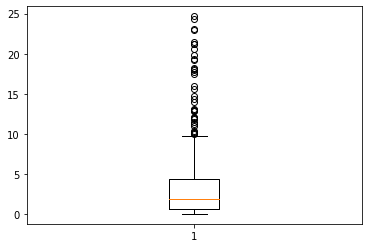

In [ ]:
plt.boxplot(l_avg_df['Monthly_avg_visits'])

In [ ]:
l_avg_df[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.000000,0.968680,0.999495
raw_visitor_counts,0.968680,1.000000,0.967601
Monthly_avg_visits,0.999495,0.967601,1.000000


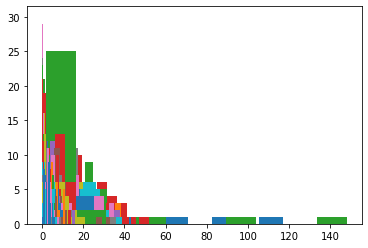

In [ ]:
for record in l_avg_df['visits_by_day']:
  plt.hist(record)

Lets now analyze Hourly Popularity of these Liquor Stores

In [ ]:
l_pop_df = liquor_GS_df[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
l_pop_df.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
0,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,"[1,1,0,0,0,0,0,0,0,1,1,6,5,2,2,3,3,3,2,2,1,1,1,2]","{""Monday"":3,""Tuesday"":1,""Wednesday"":3,""Thursda..."
1,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-02-01T00:00:00-07:00,2018-03-01T00:00:00-07:00,"[0,0,0,0,0,1,1,2,2,3,5,6,7,10,10,11,12,3,5,5,4...","{""Monday"":7,""Tuesday"":6,""Wednesday"":4,""Thursda..."
2,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,"[0,0,0,0,0,0,0,0,2,10,9,8,12,14,14,14,9,9,12,8...","{""Monday"":9,""Tuesday"":5,""Wednesday"":6,""Thursda..."
3,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-04-01T00:00:00-06:00,2018-05-01T00:00:00-06:00,"[0,0,0,0,0,1,1,2,2,6,5,7,7,8,9,4,5,6,3,1,3,4,3,1]","{""Monday"":3,""Tuesday"":6,""Wednesday"":1,""Thursda..."
4,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-05-01T00:00:00-06:00,2018-06-01T00:00:00-06:00,"[0,0,1,0,0,0,0,0,0,7,7,13,16,10,11,12,12,14,5,...","{""Monday"":7,""Tuesday"":9,""Wednesday"":9,""Thursda..."


In [ ]:
l_pop_df['popularity_by_hour'] = l_pop_df['popularity_by_hour'].transform(lambda x: literal_eval(x))
l_pop_df['Monthly_avg_pop'] = l_pop_df['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
l_pop_df.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,popularity_by_hour,popularity_by_day,Monthly_avg_pop
0,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 6, 5, 2, 2, ...","{""Monday"":3,""Tuesday"":1,""Wednesday"":3,""Thursda...",1.541667
1,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-02-01T00:00:00-07:00,2018-03-01T00:00:00-07:00,"[0, 0, 0, 0, 0, 1, 1, 2, 2, 3, 5, 6, 7, 10, 10...","{""Monday"":7,""Tuesday"":6,""Wednesday"":4,""Thursda...",3.708333
2,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 10, 9, 8, 12, 14, ...","{""Monday"":9,""Tuesday"":5,""Wednesday"":6,""Thursda...",5.250000
3,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-04-01T00:00:00-06:00,2018-05-01T00:00:00-06:00,"[0, 0, 0, 0, 0, 1, 1, 2, 2, 6, 5, 7, 7, 8, 9, ...","{""Monday"":3,""Tuesday"":6,""Wednesday"":1,""Thursda...",3.250000
4,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-05-01T00:00:00-06:00,2018-06-01T00:00:00-06:00,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 7, 7, 13, 16, 10, ...","{""Monday"":7,""Tuesday"":9,""Wednesday"":9,""Thursda...",5.375000


In [ ]:
max_avg_pop = l_pop_df[l_pop_df['Monthly_avg_pop'] == max(l_pop_df['Monthly_avg_pop'])]
min_avg_pop = l_pop_df[l_pop_df['Monthly_avg_pop'] == min(l_pop_df['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

    BUS_PROF_NAME  ... Monthly_avg_pop
409   SKYE LIQUOR  ...      118.208333

[1 rows x 10 columns]
                         BUS_PROF_NAME  ... Monthly_avg_pop
24               LOWRY WINE AND SPIRTS  ...        0.041667
27               LOWRY WINE AND SPIRTS  ...        0.041667
28               LOWRY WINE AND SPIRTS  ...        0.041667
126                    RAINBOW LIQUORS  ...        0.041667
127                    RAINBOW LIQUORS  ...        0.041667
129                    RAINBOW LIQUORS  ...        0.041667
130                    RAINBOW LIQUORS  ...        0.041667
134                    RAINBOW LIQUORS  ...        0.041667
172  GRAPE EXPECTATIONS WINE & SPIRITS  ...        0.041667
175  GRAPE EXPECTATIONS WINE & SPIRITS  ...        0.041667
176  GRAPE EXPECTATIONS WINE & SPIRITS  ...        0.041667
480                  EAST EVANS LIQUOR  ...        0.041667
526                 BOOTLEGGER LIQUORS  ...        0.041667
528                 BOOTLEGGER LIQUORS  ...        0.041667

{'boxes': [<matplotlib.lines.Line2D at 0x7fa8533f8b10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa85339bcd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa8533bf5d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa85334c850>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa85338f9d0>,
  <matplotlib.lines.Line2D at 0x7fa853404990>]}

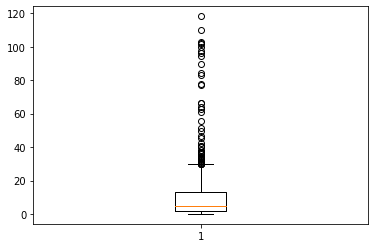

In [ ]:
plt.boxplot(l_pop_df['Monthly_avg_pop'])

(array([[ 4.,  1.,  3.,  1.,  1.,  9.,  5.,  0.,  0.,  0.],
        [ 0.,  2.,  5.,  0.,  0.,  3.,  1.,  2.,  7.,  4.],
        [ 1.,  3., 12.,  7.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  2.,  1.,  2.,  1.,  5.,  8.,  5.,  0.,  0.],
        [ 0.,  1.,  2.,  3.,  9.,  5.,  1.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  4.,  6.,  7.,  3.,  2.,  0.,  0.],
        [ 0.,  1.,  5., 10.,  5.,  2.,  1.,  0.,  0.,  0.],
        [ 0.,  8.,  7.,  8.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  2.,  3., 14.,  4.,  0.,  0.,  0.,  0.],
        [ 1.,  1., 13.,  2.,  7.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  3.,  4., 11.,  4.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  3.,  4.,  3.,  4.,  3.,  5.,  2.,  0.,  0.]]),
 array([ 49.,  60.,  71.,  82.,  93., 104., 115., 126., 137., 148., 159.]),
 <a list of 12 Lists of Patches objects>)

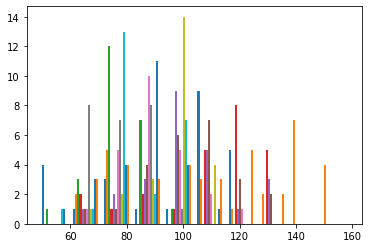

In [ ]:
plt.hist(l_pop_df[l_pop_df['BUS_PROF_NAME'] == 'SKYE LIQUOR']['popularity_by_hour'])

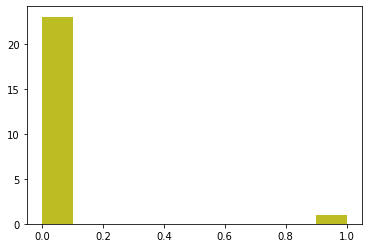

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)

By standards of Popularity and Visit average SKYE LIQUOR is an extreme outlier. What is so special about this location?

In [ ]:
l_pop_df[l_pop_df['BUS_PROF_NAME'] == 'SKYE LIQUOR'].head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,popularity_by_hour,popularity_by_day,Monthly_avg_pop
408,SKYE LIQUOR,2907 N INCA ST,LIQUOR - STORE,80202,Five Points,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,"[111, 105, 111, 111, 114, 122, 125, 120, 105, ...","{""Monday"":95,""Tuesday"":81,""Wednesday"":82,""Thur...",94.541667
409,SKYE LIQUOR,2907 N INCA ST,LIQUOR - STORE,80202,Five Points,2018-02-01T00:00:00-07:00,2018-03-01T00:00:00-07:00,"[143, 146, 151, 148, 146, 153, 159, 146, 139, ...","{""Monday"":80,""Tuesday"":73,""Wednesday"":65,""Thur...",118.208333
410,SKYE LIQUOR,2907 N INCA ST,LIQUOR - STORE,80202,Five Points,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,"[79, 72, 73, 70, 70, 74, 77, 72, 82, 87, 85, 9...","{""Monday"":64,""Tuesday"":58,""Wednesday"":70,""Thur...",77.958333
411,SKYE LIQUOR,2907 N INCA ST,LIQUOR - STORE,80202,Five Points,2018-04-01T00:00:00-06:00,2018-05-01T00:00:00-06:00,"[115, 111, 112, 104, 101, 108, 124, 133, 124, ...","{""Monday"":124,""Tuesday"":85,""Wednesday"":83,""Thu...",110.000000
412,SKYE LIQUOR,2907 N INCA ST,LIQUOR - STORE,80202,Five Points,2018-05-01T00:00:00-06:00,2018-06-01T00:00:00-06:00,"[95, 96, 99, 94, 89, 88, 101, 105, 113, 132, 1...","{""Monday"":90,""Tuesday"":117,""Wednesday"":113,""Th...",101.875000


A quick google search shows that the location itself has only mediocre ratings (3/5 on google 1.5/5 on yelp and 1/5 on facebook). How do other stores in the same area as this one fare in terms of popularity

In [ ]:
l_pop_df[l_pop_df['ZIP'] == '80202'].head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,popularity_by_hour,popularity_by_day,Monthly_avg_pop
54,CHAMPA FINE WINE & LIQUORS,1600 CHAMPA ST,LIQUOR - STORE,80202,CBD,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,"[1, 0, 0, 0, 0, 0, 0, 0, 3, 5, 4, 7, 8, 5, 10,...","{""Monday"":7,""Tuesday"":3,""Wednesday"":6,""Thursda...",3.416667
55,CHAMPA FINE WINE & LIQUORS,1600 CHAMPA ST,LIQUOR - STORE,80202,CBD,2018-02-01T00:00:00-07:00,2018-03-01T00:00:00-07:00,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 5, 5, 4, ...","{""Monday"":2,""Tuesday"":3,""Wednesday"":7,""Thursda...",1.291667
56,CHAMPA FINE WINE & LIQUORS,1600 CHAMPA ST,LIQUOR - STORE,80202,CBD,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,"[4, 5, 3, 0, 0, 0, 0, 0, 0, 2, 5, 7, 16, 11, 2...","{""Monday"":10,""Tuesday"":5,""Wednesday"":6,""Thursd...",5.125000
57,CHAMPA FINE WINE & LIQUORS,1600 CHAMPA ST,LIQUOR - STORE,80202,CBD,2018-04-01T00:00:00-06:00,2018-05-01T00:00:00-06:00,"[5, 5, 1, 1, 1, 0, 0, 0, 1, 2, 6, 15, 15, 14, ...","{""Monday"":13,""Tuesday"":11,""Wednesday"":5,""Thurs...",5.458333
58,CHAMPA FINE WINE & LIQUORS,1600 CHAMPA ST,LIQUOR - STORE,80202,CBD,2018-05-01T00:00:00-06:00,2018-06-01T00:00:00-06:00,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 4, 13, 8, 12, 2...","{""Monday"":8,""Tuesday"":10,""Wednesday"":8,""Thursd...",5.291667


While it seems that the remaining two stores in this particular location are more leaning towards the mean of the overall popularity of the dataset, this particular store is at a much higher rating than the others. What is bringing SKYE LIQUOR this kind of foot traffic



In [ ]:
liquor_GS_df[liquor_GS_df['ZIP'] == '80202'].head()

,address_placekey,level_0,placekey,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD,region_x,safegraph_place_id,parent_placekey,parent_safegraph_place_id,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
54,22n@5q9-bqm-sdv,54,22n-223@5q9-bqm-sdv,2009-BFN-1044685,CHAMPA FINE WINE & LIQUORS,1600 CHAMPA ST,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-06-29 10:03:53,2021-07-07 00:00:00,Denver,CO,80202,9.0,6,01702,CBD,D-TD,3142378.0,1697203.0,CO,sg:d78525a7a64b4afa9e3210a3e1cd1503,NaN,NaN,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,37,33,"[2,0,1,1,2,0,0,2,1,1,2,0,2,0,0,0,0,1,4,1,1,1,0...",80310017021,"{""080310027011"":6,""080590098331"":5,""0800500685...","{""410510087001"":6,""080050822001"":4,""3105500370...","{""US"":33}",8857.0,26.0,"{""<5"":0,""5-10"":8,""11-20"":8,""21-60"":11,""61-120""...","{""Walgreens"":99,""O'Reilly Auto Parts"":50,""Ross...","{""Pavilions"":36,""Starbucks"":36,""ConocoPhillips...","[1,0,0,0,0,0,0,0,3,5,4,7,8,5,10,10,8,7,6,4,2,1...","{""Monday"":7,""Tuesday"":3,""Wednesday"":6,""Thursda...","{""android"":11,""ios"":22}"
55,22n@5q9-bqm-sdv,55,22n-223@5q9-bqm-sdv,2009-BFN-1044685,CHAMPA FINE WINE & LIQUORS,1600 CHAMPA ST,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-06-29 10:03:53,2021-07-07 00:00:00,Denver,CO,80202,9.0,6,01702,CBD,D-TD,3142378.0,1697203.0,CO,sg:d78525a7a64b4afa9e3210a3e1cd1503,NaN,NaN,2018-02-01T00:00:00-07:00,2018-03-01T00:00:00-07:00,27,27,"[1,0,1,1,2,2,3,1,1,0,0,0,1,3,4,1,2,1,0,0,0,1,1...",80310017021,"{""080010085452"":4,""250138017001"":4,""0803501412...","{""080310017021"":4,""080310017014"":4,""0803100030...","{""US"":25}",18836.0,15.0,"{""<5"":0,""5-10"":8,""11-20"":10,""21-60"":8,""61-120""...","{""HearUSA"":100,""United States Postal Service (...","{""Starbucks"":31,""King Soopers"":22,""Taco Bell"":...","[0,1,0,0,0,0,0,0,1,0,1,3,5,5,4,4,1,2,2,1,0,0,0,1]","{""Monday"":2,""Tuesday"":3,""Wednesday"":7,""Thursda...","{""android"":4,""ios"":19}"
56,22n@5q9-bqm-sdv,56,22n-223@5q9-bqm-sdv,2009-BFN-1044685,CHAMPA FINE WINE & LIQUORS,1600 CHAMPA ST,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-06-29 10:03:53,2021-07-07 00:00:00,Denver,CO,80202,9.0,6,01702,CBD,D-TD,3142378.0,1697203.0,CO,sg:d78525a7a64b4afa9e3210a3e1cd1503,NaN,NaN,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,76,73,"[2,4,2,1,1,1,1,1,4,5,3,4,0,2,2,9,6,3,1,0,0,1,3...",80310017021,"{""060690006002"":4,""060770025031"":4,""0803501412...","{""080310017021"":10,""080590117272"":4,""080310017...","{""US"":74}",19429.0,19.0,"{""<5"":0,""5-10"":24,""11-20"":22,""21-60"":20,""61-12...","{""Protein Bar & Kitchen"":100,""Jimmy John's"":50}","{""Starbucks"":41,""McDonald's"":34,""Target"":32,""P...","[4,5,3,0,0,0,0,0,0,2,5,7,16,11,20,17,7,8,7,6,2...","{""Monday"":10,""Tuesday"":5,""Wednesday"":6,""Thursd...","{""android"":8,""ios"":62}"
57,22n@5q9-bqm-sdv,57,22n-223@5q9-bqm-sdv,2009-BFN-1044685,CHAMPA FINE WINE & LIQUORS,1600 CHAMPA ST,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-06-29 10:03:53,2021-07-07 00:00:00,Denver,CO,80202,9.0,6,01702,CBD,D-TD,3142378.0,1697203.0,CO,sg:d78525a7a64b4afa9e3210a3e1cd1503,NaN,NaN,2018-04-01T00:00:00-06:00,2018-05-01T00:00:00-06:00,68,61,"[1,2,1,3,1,2,4,2,2,5,0,3,2,1,1,4,3,2,3,6,1,3,2...",80310017021,"{""080590107023"":5,""080410030004"":4,""0803100170...","{""080050074001"":4,""080310017022"":4,""0804100370...","{""US"":55}",21667.0,20.5,"{""<5"":2,""5-10"":12,""11-20"":20,""21-60"":23,""61-12...","{""Daz Bog Coffee"":50,""Sheraton Hotels & Resort...","{""Starbucks"":34,""Pavilions"":20,""Walmart"":19,""T...","[5,5,1,1,1,0,0,0,1,2,6,15,15,14,12,15,9,10,6,3...","{""Monday"":13,""Tuesday"":11,""Wednesday"":5,""Thurs...","{""

Perhaps the popularity of SKYE LIQUOR has something to do with the locations that surround it. This information can be best retrieved through the related_same_day_brand column

In [ ]:
liquor_GS_df[liquor_GS_df['BUS_PROF_NAME'] == 'SKYE LIQUOR']['related_same_day_brand'].tolist()

['{"Pure Barre":8,"Viewhouse":8,"Caribou Coffee":8,"Starbucks":7,"Smashburger":7,"Phillips 66":5,"Costco Gasoline":5}',
 '{"Starbucks":9,"A&W Restaurants":6,"The Cheesecake Factory":6,"Mellow Mushroom":6}',
 '{"Starbucks":12,"Circle K":9,"Circle K Gas":9,"CrossFit":9,"La Quinta Inns & Suites":6,"Kriser\'s":5,"ConocoPhillips":5,"Hilton International":5}',
 '{"Hilton Garden Inn":9,"Maria Empanada":7,"Qdoba Mexican Grill":7,"Sprouts Farmers Market":7,"Minuteman Press":6,"Honda":5,"Tesla Motors":5}',
 '{"Starbucks":8,"Protein Bar & Kitchen":6,"Red Lobster":5,"Pavilions":5}',
 '{"Teriyaki Madness":12,"Hilton Garden Inn":11,"McDonald\'s":9,"Phillips 66":7,"Family Dollar Stores":7,"Snarf\'s Sandwiches":7,"Kriser\'s":7,"Taco Bell":6,"GameStop":6,"Daz Bog Coffee":6,"Kum & Go":6,"Cracker Barrel":5}',
 '{"Ermenegildo Zenga":11,"Four Seasons Hotels and Resorts":11,"Blue Sushi Sake Grill":7,"CrossFit":6,"Pinkberry":6,"Subway":5}',
 '{"7-Eleven":12,"Kimpton Hotels & Restaurants":11,"Yankee Candle":1

It seems that SKYE LIQUOR may have some of its popularity attributed to its surroundings. The location is placed next to a very popular rooftop diner in Denver and recieves large crowds from the nearby Costco an Pure Barre gym. In addition to these locations the store is right next to a smashburger which will attract lots of customers as well.

Now we will look at seasonal data surrounding all the Denver Liquor 

In [ ]:
liquor_GS_df.head()

,address_placekey,level_0,placekey,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD,region_x,safegraph_place_id,parent_placekey,parent_safegraph_place_id,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,22s@5q9-bqc-9cq,0,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,27,20,"[1,0,0,1,0,1,3,1,0,0,2,6,0,0,1,0,1,1,2,2,0,0,1...",80310003011,"{""080310003011"":4,""080050071043"":4,""0811700040...","{""080310003034"":4,""080590118042"":4,""0811700040...","{""US"":20}",13531.0,16.0,"{""<5"":2,""5-10"":9,""11-20"":8,""21-60"":6,""61-120"":...","{""Taco Bell"":49}","{""King Soopers"":60,""Starbucks"":56,""McDonald's""...","[1,1,0,0,0,0,0,0,0,1,1,6,5,2,2,3,3,3,2,2,1,1,1,2]","{""Monday"":3,""Tuesday"":1,""Wednesday"":3,""Thursda...","{""android"":7,""ios"":9}"
1,22s@5q9-bqc-9cq,1,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-02-01T00:00:00-07:00,2018-03-01T00:00:00-07:00,47,20,"[2,1,3,0,1,2,0,2,1,2,1,1,0,0,4,0,1,1,2,2,3,2,4...",80310003011,"{""080310003011"":4,""080350139013"":4,""0800100932...","{""080310083892"":4,""080010085503"":4,""0805900984...","{""US"":18}",15227.0,24.0,"{""<5"":1,""5-10"":11,""11-20"":10,""21-60"":10,""61-12...","{""Walmart"":94,""Costco Wholesale Corp."":50}","{""ConocoPhillips"":39,""King Soopers"":35,""CrossF...","[0,0,0,0,0,1,1,2,2,3,5,6,7,10,10,11,12,3,5,5,4...","{""Monday"":7,""Tuesday"":6,""Wednesday"":4,""Thursda...","{""android"":5,""ios"":9}"
2,22s@5q9-bqc-9cq,2,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,64,34,"[2,2,3,2,2,2,2,1,1,2,2,2,1,0,0,1,4,4,2,0,2,8,3...",80310003011,"{""081070005003"":5,""080310157004"":4,""0803100030...","{""080310003011"":5,""080399612044"":4,""0801403060...","{""US"":33}",18367.0,18.0,"{""<5"":1,""5-10"":19,""11-20"":14,""21-60"":14,""61-12...","{""Sunrise Senior Living"":33}","{""ConocoPhillips"":32,""McDonald's"":31,""7-Eleven...","[0,0,0,0,0,0,0,0,2,10,9,8,12,14,14,14,9,9,12,8...","{""Monday"":9,""Tuesday"":5,""Wednesday"":6,""Thursda...","{""android"":11,""ios"":24}"
3,22s@5q9-bqc-9cq,3,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-04-01T00:00:00-06:00,2018-05-01T00:00:00-06:00,37,32,"[0,2,1,0,1,0,2,2,0,0,0,1,0,3,1,0,2,1,2,3,1,2,1...",80310003011,"{""080310006001"":4,""080050831002"":4,""0805901205...","{""080140300001"":4,""080010093252"":4,""0800100960...","{""US"":33}",15227.0,28.0,"{""<5"":1,""5-10"":4,""11-20"":8,""21-60"":17,""61-120""...","{""Dollar Tree"":49}","{""7-Eleven"":33,""King Soopers"":31,""Target"":22,""...","[0,0,0,0,0,1,1,2,2,6,5,7,7,8,9,4,5,6,3,1,3,4,3,1]","{""Monday"":3,""Tuesday"":6,""Wednesday"":1,""Thursda...","{""android"":9,""ios"":21}"
4,22s@5q9-bqc-9cq,4,22s-223@5q9-bqc-9cq,2013-BFN-1067236,

In [ ]:
liquor_GS_df['BUS_PROF_NAME'].value_counts()

DOUBLE D WINE AND LIQUOR EMPORIUM    24
ACES HIGH SPIRITS                    12
BOGEY'S BEER AND WINE                12
LIQUOR LAND                          12
FAIRFAX WINE & SPIRITS               12
                                     ..
LOWRY WINE AND SPIRTS                 6
FEDERAL DISCOUNT LIQUORS              5
BOOTLEGGER LIQUORS                    4
SUNSHINE LIQUORS                      1
RUM RUNNER LIQUOR                     1
Name: BUS_PROF_NAME, Length: 70, dtype: int64

In [ ]:
liquor_GS_df['date_range_start'] = liquor_GS_df['date_range_start'].apply(lambda x: pd.Timestamp(x))
liquor_GS_df['date_range_end'] = liquor_GS_df['date_range_end'].apply(lambda x: pd.Timestamp(x))

liquor_GS_df['date_range_start'] = pd.to_datetime(liquor_GS_df['date_range_start'], utc=True)
liquor_GS_df['date_range_end'] = pd.to_datetime(liquor_GS_df['date_range_end'], utc=True)

liquor_GS_df['month_start'] = pd.DatetimeIndex(liquor_GS_df['date_range_start']).month
liquor_GS_df['month_end'] = pd.DatetimeIndex(liquor_GS_df['date_range_end']).month

In [ ]:
liquor_GS_df.head(3)

,address_placekey,level_0,placekey,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD,region_x,safegraph_place_id,parent_placekey,parent_safegraph_place_id,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
0,22s@5q9-bqc-9cq,0,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,27,20,"[1,0,0,1,0,1,3,1,0,0,2,6,0,0,1,0,1,1,2,2,0,0,1...",80310003011,"{""080310003011"":4,""080050071043"":4,""0811700040...","{""080310003034"":4,""080590118042"":4,""0811700040...","{""US"":20}",13531.0,16.0,"{""<5"":2,""5-10"":9,""11-20"":8,""21-60"":6,""61-120"":...","{""Taco Bell"":49}","{""King Soopers"":60,""Starbucks"":56,""McDonald's""...","[1,1,0,0,0,0,0,0,0,1,1,6,5,2,2,3,3,3,2,2,1,1,1,2]","{""Monday"":3,""Tuesday"":1,""Wednesday"":3,""Thursda...","{""android"":7,""ios"":9}",1,2
1,22s@5q9-bqc-9cq,1,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,47,20,"[2,1,3,0,1,2,0,2,1,2,1,1,0,0,4,0,1,1,2,2,3,2,4...",80310003011,"{""080310003011"":4,""080350139013"":4,""0800100932...","{""080310083892"":4,""080010085503"":4,""0805900984...","{""US"":18}",15227.0,24.0,"{""<5"":1,""5-10"":11,""11-20"":10,""21-60"":10,""61-12...","{""Walmart"":94,""Costco Wholesale Corp."":50}","{""ConocoPhillips"":39,""King Soopers"":35,""CrossF...","[0,0,0,0,0,1,1,2,2,3,5,6,7,10,10,11,12,3,5,5,4...","{""Monday"":7,""Tuesday"":6,""Wednesday"":4,""Thursda...","{""android"":5,""ios"":9}",2,3
2,22s@5q9-bqc-9cq,2,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,64,34,"[2,2,3,2,2,2,2,1,1,2,2,2,1,0,0,1,4,4,2,0,2,8,3...",80310003011,"{""081070005003"":5,""080310157004"":4,""0803100030...","{""080310003011"":5,""080399612044"":4,""0801403060...","{""US"":33}",18367.0,18.0,"{""<5"":1,""5-10"":19,""11-20"":14,""21-60"":14,""61-12...","{""Sunrise Senior Living"":33}","{""ConocoPhillips"":32,""McDonald's"":31,""7-Eleven...","[0,0,0,0,0,0,0,0,2,10,9,8,12,14,14,14,9,9,12,8...","{""Monday"":9,""Tuesday"":5,""Wednesday"":6,""Thursda...","{""android"":11,""ios"":24}",3,4


## Liquor Geospatial monthly data analysis

Visitor + Popularity analysis for all 12 months individually

Splitting into 12 dataframes based on month. This will allow us to find the variations in seasonal data 

In [ ]:
L_GS_df_1 = liquor_GS_df[liquor_GS_df['month_start'] == 1]
L_GS_df_2 = liquor_GS_df[liquor_GS_df['month_start'] == 2]
L_GS_df_3 = liquor_GS_df[liquor_GS_df['month_start'] == 3]
L_GS_df_4 = liquor_GS_df[liquor_GS_df['month_start'] == 4]
L_GS_df_5 = liquor_GS_df[liquor_GS_df['month_start'] == 5]
L_GS_df_6 = liquor_GS_df[liquor_GS_df['month_start'] == 6]
L_GS_df_7 = liquor_GS_df[liquor_GS_df['month_start'] == 7]
L_GS_df_8 = liquor_GS_df[liquor_GS_df['month_start'] == 8]
L_GS_df_9 = liquor_GS_df[liquor_GS_df['month_start'] == 9]
L_GS_df_10 = liquor_GS_df[liquor_GS_df['month_start'] == 10]
L_GS_df_11 = liquor_GS_df[liquor_GS_df['month_start'] == 11]
L_GS_df_12 = liquor_GS_df[liquor_GS_df['month_start'] == 12]

### **Janary analysis**

Visit and Popularity analysis



In [ ]:
L_GS_df_1.head()

,address_placekey,level_0,placekey,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD,region_x,safegraph_place_id,parent_placekey,parent_safegraph_place_id,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
0,22s@5q9-bqc-9cq,0,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,27,20,"[1,0,0,1,0,1,3,1,0,0,2,6,0,0,1,0,1,1,2,2,0,0,1...",80310003011,"{""080310003011"":4,""080050071043"":4,""0811700040...","{""080310003034"":4,""080590118042"":4,""0811700040...","{""US"":20}",13531.0,16.0,"{""<5"":2,""5-10"":9,""11-20"":8,""21-60"":6,""61-120"":...","{""Taco Bell"":49}","{""King Soopers"":60,""Starbucks"":56,""McDonald's""...","[1,1,0,0,0,0,0,0,0,1,1,6,5,2,2,3,3,3,2,2,1,1,1,2]","{""Monday"":3,""Tuesday"":1,""Wednesday"":3,""Thursda...","{""android"":7,""ios"":9}",1,2
12,223@5q9-bnr-cwk,12,223-222@5q9-bnr-cwk,2003-BFN-1006944,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-12-29 13:16:14,2022-01-21 00:00:00,Denver,CO,80204,3.0,1,00800,Sun Valley,C-MX-5,3133632.0,1695935.0,CO,sg:eadea8f88cae40b589592f25857e61af,NaN,NaN,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,35,27,"[1,0,0,1,0,1,2,4,0,2,2,3,2,0,1,0,0,2,1,1,1,0,1...",80310008001,"{""320030067001"":4,""080310006001"":4,""0803100070...","{""081230019021"":4,""471279301002"":4,""0800100870...","{""US"":26}",14623.0,14.0,"{""<5"":0,""5-10"":13,""11-20"":11,""21-60"":9,""61-120...","{""Phillips 66"":100,""Burger King"":49,""ConocoPhi...","{""Starbucks"":39,""King Soopers"":33,""ConocoPhill...","[0,0,0,0,0,0,0,1,1,2,4,5,5,1,2,2,4,3,7,3,3,4,3,0]","{""Monday"":7,""Tuesday"":3,""Wednesday"":5,""Thursda...","{""android"":9,""ios"":15}",1,2
30,22k@5q9-bqm-rff,30,22k-222@5q9-bqm-rff,2002-BFN-100808,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-01-11 13:04:01,2021-12-11 00:00:00,Denver,CO,80203,10.0,6,02602,North Capitol Hill,C-MS-5,3146814.0,1695936.0,CO,sg:b885b0859e244c09bf8d93ed95335fb6,NaN,NaN,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,95,57,"[1,1,5,4,6,6,3,2,6,2,4,0,2,1,1,4,5,4,3,3,1,5,3...",80310026021,"{""080050872002"":5,""080310026021"":5,""0803100410...","{""080310024033"":4,""080590605001"":4,""0607300833...","{""US"":54}",9087.0,22.0,"{""<5"":2,""5-10"":23,""11-20"":20,""21-60"":22,""61-12...","{""Residence Inn by Marriott"":50,""Whole Foods M...","{""Starbucks"":36,""ConocoPhillips"":31,""King Soop...","[7,6,5,5,6,7,8,8,9,14,17,16,24,26,16,14,6,12,8...","{""Monday"":13,""Tuesday"":15,""Wednesday"":18,""Thur...","{""android"":21,""ios"":31}",1,2
42,228@5q9-bqm-fzz,42,228-223@5q9-bqm-fzz,2013-BFN-1069498,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-06-25 10:49:09,2021-06-09 00:00:00,Denver,CO,80203,10.0,6,02602,North Capitol Hill,R-4-X,3146086.0,1697343.0,CO,sg:aeea1f21a02b4ce68c9d66e58e88009b,NaN,NaN,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,74,54,"[1,1,2,5,1,6,0,3,2,0,1,0,4,1,1,4,4,5,2,4,3,3,1...",80310026021,"{""080310026021"":8,""080310119032"":5,""0803100280...","{""080130127071"":5,""080010150002"":4,""0803100060...","{""US"":53}",4824.0,20.0,"{""<5"":0,""5-10"":20,""11-20"":18,""21-60"":17,""61-12...","{""Pizza Hut"":100,""Subway"":49,""Best Buy"":20}","{""King Soopers"":28,""Starbucks"":26,""ConocoPhill...","[4,6,5,4,4,5,4,3,6,11,12,6,9,13,16,12,12,8,8,8...","{""Monday"":13,""Tuesday"":12

In [ ]:
l_avg_df_1 = L_GS_df_1[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
l_avg_df_1.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
0,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,27,20,"[1,0,0,1,0,1,3,1,0,0,2,6,0,0,1,0,1,1,2,2,0,0,1..."
12,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,35,27,"[1,0,0,1,0,1,2,4,0,2,2,3,2,0,1,0,0,2,1,1,1,0,1..."
30,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,95,57,"[1,1,5,4,6,6,3,2,6,2,4,0,2,1,1,4,5,4,3,3,1,5,3..."
42,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,74,54,"[1,1,2,5,1,6,0,3,2,0,1,0,4,1,1,4,4,5,2,4,3,3,1..."
54,CHAMPA FINE WINE & LIQUORS,1600 CHAMPA ST,LIQUOR - STORE,80202,CBD,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,37,33,"[2,0,1,1,2,0,0,2,1,1,2,0,2,0,0,0,0,1,4,1,1,1,0..."


In [ ]:
from ast import literal_eval
l_avg_df_1['visits_by_day'] = l_avg_df_1['visits_by_day'].transform(lambda x: literal_eval(x))
l_avg_df_1['Monthly_avg_visits'] = l_avg_df_1['visits_by_day'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
max_avg = l_avg_df_1[l_avg_df_1['Monthly_avg_visits'] == max(l_avg_df_1['Monthly_avg_visits'])]
min_avg = l_avg_df_1[l_avg_df_1['Monthly_avg_visits'] == min(l_avg_df_1['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

    BUS_PROF_NAME  ... Monthly_avg_visits
408   SKYE LIQUOR  ...          17.483871

[1 rows x 11 columns]
            BUS_PROF_NAME  ... Monthly_avg_visits
126       RAINBOW LIQUORS  ...           0.032258
480     EAST EVANS LIQUOR  ...           0.032258
634   SMALL BATCH LIQUORS  ...           0.032258
718  DENVER DRUG & LIQUOR  ...           0.032258

[4 rows x 11 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa852200810>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa852203850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa852208890>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa852208350>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa852200d90>,
  <matplotlib.lines.Line2D at 0x7fa852203310>]}

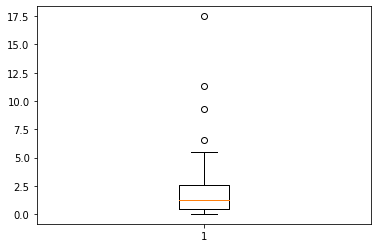

In [ ]:
plt.boxplot(l_avg_df_1['Monthly_avg_visits'])

In [ ]:
l_avg_df_1[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.00000,0.95014,1.00000
raw_visitor_counts,0.95014,1.00000,0.95014
Monthly_avg_visits,1.00000,0.95014,1.00000


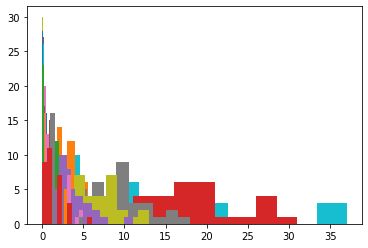

In [ ]:
for record in l_avg_df_1['visits_by_day']:
  plt.hist(record)

In [ ]:
l_pop_df_1 = L_GS_df_1[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
l_pop_df_1.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
0,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,"[1,1,0,0,0,0,0,0,0,1,1,6,5,2,2,3,3,3,2,2,1,1,1,2]","{""Monday"":3,""Tuesday"":1,""Wednesday"":3,""Thursda..."
12,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,"[0,0,0,0,0,0,0,1,1,2,4,5,5,1,2,2,4,3,7,3,3,4,3,0]","{""Monday"":7,""Tuesday"":3,""Wednesday"":5,""Thursda..."
30,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,"[7,6,5,5,6,7,8,8,9,14,17,16,24,26,16,14,6,12,8...","{""Monday"":13,""Tuesday"":15,""Wednesday"":18,""Thur..."
42,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,"[4,6,5,4,4,5,4,3,6,11,12,6,9,13,16,12,12,8,8,8...","{""Monday"":13,""Tuesday"":12,""Wednesday"":9,""Thurs..."
54,CHAMPA FINE WINE & LIQUORS,1600 CHAMPA ST,LIQUOR - STORE,80202,CBD,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,"[1,0,0,0,0,0,0,0,3,5,4,7,8,5,10,10,8,7,6,4,2,1...","{""Monday"":7,""Tuesday"":3,""Wednesday"":6,""Thursda..."


In [ ]:
l_pop_df_1['popularity_by_hour'] = l_pop_df_1['popularity_by_hour'].transform(lambda x: literal_eval(x))
l_pop_df_1['Monthly_avg_pop'] = l_pop_df_1['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = l_pop_df_1[l_pop_df_1['Monthly_avg_pop'] == max(l_pop_df_1['Monthly_avg_pop'])]
min_avg_pop = l_pop_df_1[l_pop_df_1['Monthly_avg_pop'] == min(l_pop_df_1['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

    BUS_PROF_NAME  ... Monthly_avg_pop
408   SKYE LIQUOR  ...       94.541667

[1 rows x 10 columns]
            BUS_PROF_NAME  ... Monthly_avg_pop
126       RAINBOW LIQUORS  ...        0.041667
480     EAST EVANS LIQUOR  ...        0.041667
634   SMALL BATCH LIQUORS  ...        0.041667
718  DENVER DRUG & LIQUOR  ...        0.041667

[4 rows x 10 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa8519c8c90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa8519cbcd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa851a89d10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa851a897d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa8519cb250>,
  <matplotlib.lines.Line2D at 0x7fa8519cb790>]}

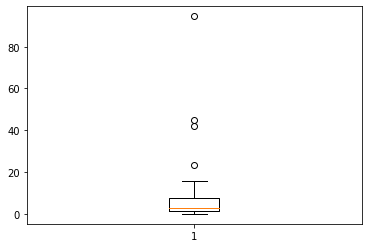

In [ ]:
plt.boxplot(l_pop_df_1['Monthly_avg_pop'])

(array([3., 1., 1., 3., 0., 2., 0., 5., 5., 4.]),
 array([ 49. ,  56.6,  64.2,  71.8,  79.4,  87. ,  94.6, 102.2, 109.8,
        117.4, 125. ]),
 <a list of 10 Patch objects>)

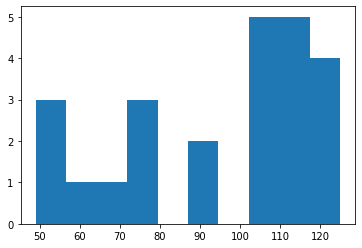

In [ ]:
plt.hist(l_pop_df_1[l_pop_df_1['BUS_PROF_NAME'] == 'SKYE LIQUOR']['popularity_by_hour'])

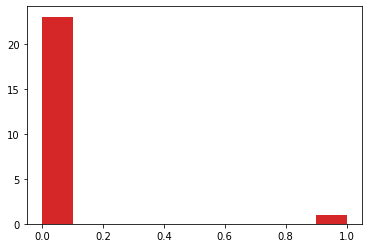

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)

### **February Analysis** 

Visits and Popularity analysis

In [ ]:
L_GS_df_2.head()

,address_placekey,level_0,placekey,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD,region_x,safegraph_place_id,parent_placekey,parent_safegraph_place_id,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
1,22s@5q9-bqc-9cq,1,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,47,20,"[2,1,3,0,1,2,0,2,1,2,1,1,0,0,4,0,1,1,2,2,3,2,4...",80310003011,"{""080310003011"":4,""080350139013"":4,""0800100932...","{""080310083892"":4,""080010085503"":4,""0805900984...","{""US"":18}",15227.0,24.0,"{""<5"":1,""5-10"":11,""11-20"":10,""21-60"":10,""61-12...","{""Walmart"":94,""Costco Wholesale Corp."":50}","{""ConocoPhillips"":39,""King Soopers"":35,""CrossF...","[0,0,0,0,0,1,1,2,2,3,5,6,7,10,10,11,12,3,5,5,4...","{""Monday"":7,""Tuesday"":6,""Wednesday"":4,""Thursda...","{""android"":5,""ios"":9}",2,3
13,223@5q9-bnr-cwk,13,223-222@5q9-bnr-cwk,2003-BFN-1006944,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-12-29 13:16:14,2022-01-21 00:00:00,Denver,CO,80204,3.0,1,00800,Sun Valley,C-MX-5,3133632.0,1695935.0,CO,sg:eadea8f88cae40b589592f25857e61af,NaN,NaN,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,26,20,"[0,3,0,0,1,1,0,2,0,3,2,0,3,2,2,1,0,0,0,0,0,2,0...",80310008001,"{""080010095531"":5,""080130127014"":5,""0800100910...","{""081230020133"":4}","{""US"":18}",18669.0,10.5,"{""<5"":0,""5-10"":13,""11-20"":10,""21-60"":2,""61-120...","{""HomeTowne Studios"":50,""Safeway Fuel Station""...","{""ConocoPhillips"":39,""McDonald's"":36,""Target"":...","[0,0,0,0,0,0,0,0,0,2,1,2,8,3,2,3,2,0,1,3,1,2,1,2]","{""Monday"":2,""Tuesday"":4,""Wednesday"":2,""Thursda...","{""android"":8,""ios"":11}",2,3
24,22v@5q9-bg4-99f,24,22v-222@5q9-bg4-99f,2010-BFN-1050830,LOWRY WINE AND SPIRTS,727 QUEBEC ST,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-07-23 14:04:20,2021-08-04 00:00:00,Denver,CO,80220,5.0,2,04304,Montclair,E-CC-3X,3167693.0,1690429.0,CO,sg:ee93eaa900ec4059aecc7fe56d2ee1f9,NaN,NaN,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,1,1,"[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0...",80310043042,{},{},"{""US"":4}",NaN,10.0,"{""<5"":0,""5-10"":1,""11-20"":0,""21-60"":0,""61-120"":...",{},"{""ConocoPhillips"":99,""Safeway"":99,""Circle K"":9...","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":1,""Thursda...","{""android"":0,""ios"":0}",2,3
31,22k@5q9-bqm-rff,31,22k-222@5q9-bqm-rff,2002-BFN-100808,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-01-11 13:04:01,2021-12-11 00:00:00,Denver,CO,80203,10.0,6,02602,North Capitol Hill,C-MS-5,3146814.0,1695936.0,CO,sg:b885b0859e244c09bf8d93ed95335fb6,NaN,NaN,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,58,43,"[2,1,3,0,3,4,3,3,1,3,1,5,1,2,0,0,6,5,2,3,2,0,1...",80310026021,"{""080310026021"":7,""080590117273"":5,""0804397860...","{""080439786002"":6,""201719571005"":4,""0803100400...","{""US"":43}",11511.0,17.0,"{""<5"":0,""5-10"":13,""11-20"":19,""21-60"":18,""61-12...","{""The Cheesecake Factory"":50,""PetSmart"":33}","{""Starbucks"":34,""ConocoPhillips"":29,""Phillips ...","[2,1,1,1,1,1,1,5,4,6,8,7,3,9,10,6,6,4,4,8,6,5,...","{""Monday"":12,""Tuesday"":10,""Wednesday"":9,""Thurs...","{""android"":15,""ios"":28}",2,3
43,228@5q9-bqm-fzz,43,228-223@5q9-bqm-fzz,2013-BFN-1069498,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,LICENSE IS

In [ ]:
l_avg_df_2 = L_GS_df_2[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
l_avg_df_2.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
1,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,47,20,"[2,1,3,0,1,2,0,2,1,2,1,1,0,0,4,0,1,1,2,2,3,2,4..."
13,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,26,20,"[0,3,0,0,1,1,0,2,0,3,2,0,3,2,2,1,0,0,0,0,0,2,0..."
24,LOWRY WINE AND SPIRTS,727 QUEBEC ST,LIQUOR - STORE,80220,Montclair,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,1,1,"[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0..."
31,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,58,43,"[2,1,3,0,3,4,3,3,1,3,1,5,1,2,0,0,6,5,2,3,2,0,1..."
43,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,74,52,"[4,3,5,2,1,0,7,3,2,0,3,2,1,1,1,7,1,2,2,5,3,2,0..."


In [ ]:
from ast import literal_eval
l_avg_df_2['visits_by_day'] = l_avg_df_2['visits_by_day'].transform(lambda x: literal_eval(x))
l_avg_df_2['Monthly_avg_visits'] = l_avg_df_2['visits_by_day'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
max_avg = l_avg_df_2[l_avg_df_2['Monthly_avg_visits'] == max(l_avg_df_2['Monthly_avg_visits'])]
min_avg = l_avg_df_2[l_avg_df_2['Monthly_avg_visits'] == min(l_avg_df_2['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

    BUS_PROF_NAME  ... Monthly_avg_visits
409   SKYE LIQUOR  ...          21.464286

[1 rows x 11 columns]
             BUS_PROF_NAME  ... Monthly_avg_visits
24   LOWRY WINE AND SPIRTS  ...           0.035714
611          BAYON LIQUORS  ...           0.035714
740    ALAMEDA LIQUOR MART  ...           0.035714

[3 rows x 11 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa851849210>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa8517d2250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa8517da290>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa8517d2d10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa851849790>,
  <matplotlib.lines.Line2D at 0x7fa851849cd0>]}

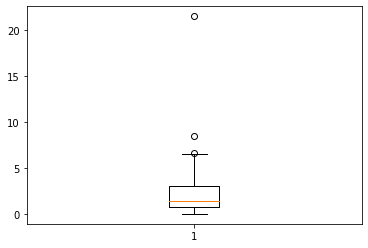

In [ ]:
plt.boxplot(l_avg_df_2['Monthly_avg_visits'])

In [ ]:
l_avg_df_2[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.000000,0.922276,1.000000
raw_visitor_counts,0.922276,1.000000,0.922276
Monthly_avg_visits,1.000000,0.922276,1.000000


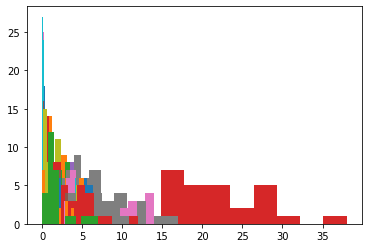

In [ ]:
for record in l_avg_df_2['visits_by_day']:
  plt.hist(record)

In [ ]:
l_pop_df_2 = L_GS_df_2[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
l_pop_df_2.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
1,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,"[0,0,0,0,0,1,1,2,2,3,5,6,7,10,10,11,12,3,5,5,4...","{""Monday"":7,""Tuesday"":6,""Wednesday"":4,""Thursda..."
13,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,"[0,0,0,0,0,0,0,0,0,2,1,2,8,3,2,3,2,0,1,3,1,2,1,2]","{""Monday"":2,""Tuesday"":4,""Wednesday"":2,""Thursda..."
24,LOWRY WINE AND SPIRTS,727 QUEBEC ST,LIQUOR - STORE,80220,Montclair,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":1,""Thursda..."
31,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,"[2,1,1,1,1,1,1,5,4,6,8,7,3,9,10,6,6,4,4,8,6,5,...","{""Monday"":12,""Tuesday"":10,""Wednesday"":9,""Thurs..."
43,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,"[2,2,1,1,1,2,3,4,4,12,9,11,12,11,7,15,13,4,6,7...","{""Monday"":7,""Tuesday"":11,""Wednesday"":15,""Thurs..."


In [ ]:
l_pop_df_2['popularity_by_hour'] = l_pop_df_2['popularity_by_hour'].transform(lambda x: literal_eval(x))
l_pop_df_2['Monthly_avg_pop'] = l_pop_df_2['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = l_pop_df_2[l_pop_df_2['Monthly_avg_pop'] == max(l_pop_df_2['Monthly_avg_pop'])]
min_avg_pop = l_pop_df_2[l_pop_df_2['Monthly_avg_pop'] == min(l_pop_df_2['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

    BUS_PROF_NAME  ... Monthly_avg_pop
409   SKYE LIQUOR  ...      118.208333

[1 rows x 10 columns]
             BUS_PROF_NAME  ... Monthly_avg_pop
24   LOWRY WINE AND SPIRTS  ...        0.041667
611          BAYON LIQUORS  ...        0.041667

[2 rows x 10 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa8517c4910>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa8510de8d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa851092550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa851092a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa8517c4c90>,
  <matplotlib.lines.Line2D at 0x7fa8510de190>]}

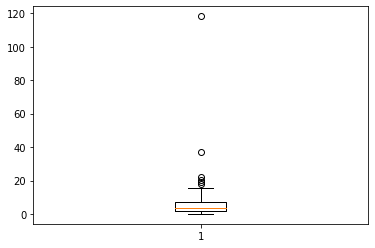

In [ ]:
plt.boxplot(l_pop_df_2['Monthly_avg_pop'])

(array([2., 5., 0., 0., 2., 1., 1., 4., 6., 3.]),
 array([ 60. ,  69.9,  79.8,  89.7,  99.6, 109.5, 119.4, 129.3, 139.2,
        149.1, 159. ]),
 <a list of 10 Patch objects>)

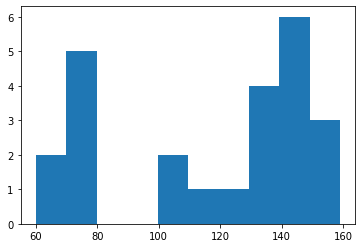

In [ ]:
plt.hist(l_pop_df_2[l_pop_df_2['BUS_PROF_NAME'] == 'SKYE LIQUOR']['popularity_by_hour'])

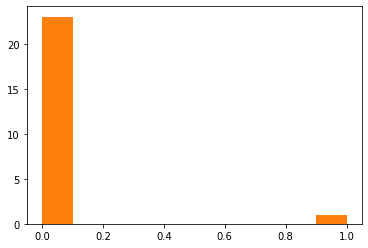

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)

### **March Analysis**

Vists and Popularity analysis

In [ ]:
L_GS_df_3.head()

,address_placekey,level_0,placekey,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD,region_x,safegraph_place_id,parent_placekey,parent_safegraph_place_id,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
2,22s@5q9-bqc-9cq,2,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,64,34,"[2,2,3,2,2,2,2,1,1,2,2,2,1,0,0,1,4,4,2,0,2,8,3...",80310003011,"{""081070005003"":5,""080310157004"":4,""0803100030...","{""080310003011"":5,""080399612044"":4,""0801403060...","{""US"":33}",18367.0,18.0,"{""<5"":1,""5-10"":19,""11-20"":14,""21-60"":14,""61-12...","{""Sunrise Senior Living"":33}","{""ConocoPhillips"":32,""McDonald's"":31,""7-Eleven...","[0,0,0,0,0,0,0,0,2,10,9,8,12,14,14,14,9,9,12,8...","{""Monday"":9,""Tuesday"":5,""Wednesday"":6,""Thursda...","{""android"":11,""ios"":24}",3,4
14,223@5q9-bnr-cwk,14,223-222@5q9-bnr-cwk,2003-BFN-1006944,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-12-29 13:16:14,2022-01-21 00:00:00,Denver,CO,80204,3.0,1,00800,Sun Valley,C-MX-5,3133632.0,1695935.0,CO,sg:eadea8f88cae40b589592f25857e61af,NaN,NaN,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,43,30,"[1,0,1,1,2,1,0,0,3,5,1,1,3,0,2,1,2,1,2,1,3,0,0...",80310008001,"{""080310007021"":4,""080310003032"":4,""0801403060...","{""290950078021"":4,""080010091011"":4,""0800100960...","{""US"":30}",13911.0,12.0,"{""<5"":1,""5-10"":17,""11-20"":13,""21-60"":7,""61-120...",{},"{""McDonald's"":50,""ConocoPhillips"":46,""Walmart""...","[0,1,1,1,0,0,0,0,0,3,2,9,7,4,7,8,6,4,4,1,1,1,0,1]","{""Monday"":6,""Tuesday"":5,""Wednesday"":5,""Thursda...","{""android"":12,""ios"":17}",3,4
32,22k@5q9-bqm-rff,32,22k-222@5q9-bqm-rff,2002-BFN-100808,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-01-11 13:04:01,2021-12-11 00:00:00,Denver,CO,80203,10.0,6,02602,North Capitol Hill,C-MS-5,3146814.0,1695936.0,CO,sg:b885b0859e244c09bf8d93ed95335fb6,NaN,NaN,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,92,52,"[5,6,2,1,3,2,5,3,3,3,4,2,4,1,1,6,1,2,2,3,2,5,3...",80310026021,"{""340270460002"":5,""080050071071"":4,""0800100854...","{""080310029013"":8,""080310026021"":5,""0800500630...","{""US"":49}",10004.0,19.0,"{""<5"":5,""5-10"":26,""11-20"":20,""21-60"":27,""61-12...","{""Walgreens"":32,""DoubleTree by Hilton"":25}","{""Starbucks"":36,""ConocoPhillips"":34,""King Soop...","[3,4,3,1,1,1,3,6,10,10,15,13,16,22,17,11,11,12...","{""Monday"":12,""Tuesday"":10,""Wednesday"":12,""Thur...","{""android"":14,""ios"":31}",3,4
44,228@5q9-bqm-fzz,44,228-223@5q9-bqm-fzz,2013-BFN-1069498,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-06-25 10:49:09,2021-06-09 00:00:00,Denver,CO,80203,10.0,6,02602,North Capitol Hill,R-4-X,3146086.0,1697343.0,CO,sg:aeea1f21a02b4ce68c9d66e58e88009b,NaN,NaN,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,134,66,"[6,4,4,0,3,6,8,5,0,2,2,2,11,11,4,1,0,1,1,8,6,6...",80310026021,"{""080310017011"":8,""080310024032"":7,""0803100210...","{""080310043064"":5,""080310026011"":5,""0803100440...","{""US"":60}",5935.0,22.0,"{""<5"":6,""5-10"":31,""11-20"":26,""21-60"":29,""61-12...",{},"{""Starbucks"":34,""King Soopers"":29,""ConocoPhill...","[2,2,3,5,3,3,5,10,15,27,22,24,31,28,26,36,29,1...","{""Monday"":19,""Tuesday"":28,""Wednesday"":30,""Thur...","{""android"":19,""ios"":47}",3,4
56,22n@5q9-bqm-sdv,56,22n-223@

In [ ]:
l_avg_df_3 = L_GS_df_3[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
l_avg_df_3.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
2,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,64,34,"[2,2,3,2,2,2,2,1,1,2,2,2,1,0,0,1,4,4,2,0,2,8,3..."
14,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,43,30,"[1,0,1,1,2,1,0,0,3,5,1,1,3,0,2,1,2,1,2,1,3,0,0..."
32,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,92,52,"[5,6,2,1,3,2,5,3,3,3,4,2,4,1,1,6,1,2,2,3,2,5,3..."
44,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,134,66,"[6,4,4,0,3,6,8,5,0,2,2,2,11,11,4,1,0,1,1,8,6,6..."
56,CHAMPA FINE WINE & LIQUORS,1600 CHAMPA ST,LIQUOR - STORE,80202,CBD,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,76,73,"[2,4,2,1,1,1,1,1,4,5,3,4,0,2,2,9,6,3,1,0,0,1,3..."


In [ ]:
from ast import literal_eval
l_avg_df_3['visits_by_day'] = l_avg_df_3['visits_by_day'].transform(lambda x: literal_eval(x))
l_avg_df_3['Monthly_avg_visits'] = l_avg_df_3['visits_by_day'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
max_avg = l_avg_df_3[l_avg_df_3['Monthly_avg_visits'] == max(l_avg_df_3['Monthly_avg_visits'])]
min_avg = l_avg_df_3[l_avg_df_3['Monthly_avg_visits'] == min(l_avg_df_3['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

    BUS_PROF_NAME  ... Monthly_avg_visits
410   SKYE LIQUOR  ...          19.387097

[1 rows x 11 columns]
                         BUS_PROF_NAME  ... Monthly_avg_visits
127                    RAINBOW LIQUORS  ...           0.032258
172  GRAPE EXPECTATIONS WINE & SPIRITS  ...           0.032258
720               DENVER DRUG & LIQUOR  ...           0.032258
774           FEDERAL DISCOUNT LIQUORS  ...           0.032258

[4 rows x 11 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa851a64690>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa85215c6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa851a1f390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa851a1fc10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa851a648d0>,
  <matplotlib.lines.Line2D at 0x7fa85215cbd0>]}

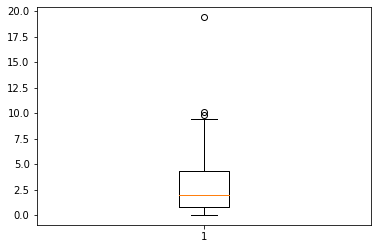

In [ ]:
plt.boxplot(l_avg_df_3['Monthly_avg_visits'])

In [ ]:
l_avg_df_3[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.00000,0.97528,1.00000
raw_visitor_counts,0.97528,1.00000,0.97528
Monthly_avg_visits,1.00000,0.97528,1.00000


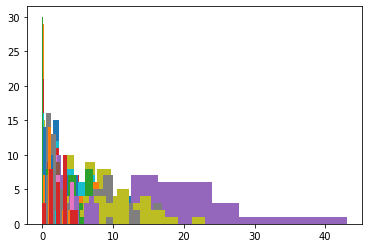

In [ ]:
for record in l_avg_df_3['visits_by_day']:
  plt.hist(record)

In [ ]:
l_pop_df_3 = L_GS_df_3[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
l_pop_df_3.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
2,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,"[0,0,0,0,0,0,0,0,2,10,9,8,12,14,14,14,9,9,12,8...","{""Monday"":9,""Tuesday"":5,""Wednesday"":6,""Thursda..."
14,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,"[0,1,1,1,0,0,0,0,0,3,2,9,7,4,7,8,6,4,4,1,1,1,0,1]","{""Monday"":6,""Tuesday"":5,""Wednesday"":5,""Thursda..."
32,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,"[3,4,3,1,1,1,3,6,10,10,15,13,16,22,17,11,11,12...","{""Monday"":12,""Tuesday"":10,""Wednesday"":12,""Thur..."
44,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,"[2,2,3,5,3,3,5,10,15,27,22,24,31,28,26,36,29,1...","{""Monday"":19,""Tuesday"":28,""Wednesday"":30,""Thur..."
56,CHAMPA FINE WINE & LIQUORS,1600 CHAMPA ST,LIQUOR - STORE,80202,CBD,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,"[4,5,3,0,0,0,0,0,0,2,5,7,16,11,20,17,7,8,7,6,2...","{""Monday"":10,""Tuesday"":5,""Wednesday"":6,""Thursd..."


In [ ]:
l_pop_df_3['popularity_by_hour'] = l_pop_df_3['popularity_by_hour'].transform(lambda x: literal_eval(x))
l_pop_df_3['Monthly_avg_pop'] = l_pop_df_3['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = l_pop_df_3[l_pop_df_3['Monthly_avg_pop'] == max(l_pop_df_3['Monthly_avg_pop'])]
min_avg_pop = l_pop_df_3[l_pop_df_3['Monthly_avg_pop'] == min(l_pop_df_3['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

    BUS_PROF_NAME  ... Monthly_avg_pop
410   SKYE LIQUOR  ...       77.958333

[1 rows x 10 columns]
                         BUS_PROF_NAME  ... Monthly_avg_pop
127                    RAINBOW LIQUORS  ...        0.041667
172  GRAPE EXPECTATIONS WINE & SPIRITS  ...        0.041667
720               DENVER DRUG & LIQUOR  ...        0.041667

[3 rows x 10 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa858ab6050>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa856b5e450>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa85fb1aed0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa8572a0150>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa856b5e390>,
  <matplotlib.lines.Line2D at 0x7fa856b5e410>]}

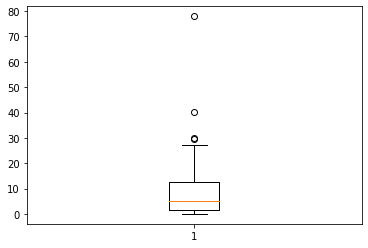

In [ ]:
plt.boxplot(l_pop_df_3['Monthly_avg_pop'])

(array([1., 0., 1., 0., 6., 4., 5., 3., 3., 1.]),
 array([52. , 56.4, 60.8, 65.2, 69.6, 74. , 78.4, 82.8, 87.2, 91.6, 96. ]),
 <a list of 10 Patch objects>)

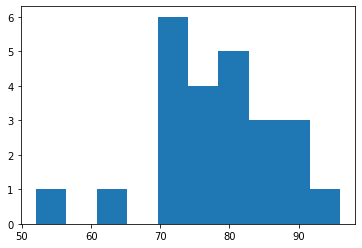

In [ ]:
plt.hist(l_pop_df_3[l_pop_df_3['BUS_PROF_NAME'] == 'SKYE LIQUOR']['popularity_by_hour'])

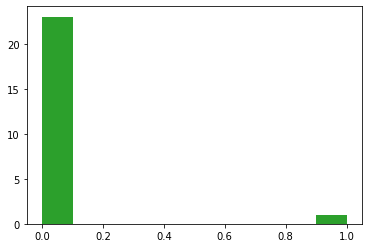

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)

### **April Analysis**

Visitor and Popularity analysis

In [ ]:
L_GS_df_4.head()

,address_placekey,level_0,placekey,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD,region_x,safegraph_place_id,parent_placekey,parent_safegraph_place_id,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
3,22s@5q9-bqc-9cq,3,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,37,32,"[0,2,1,0,1,0,2,2,0,0,0,1,0,3,1,0,2,1,2,3,1,2,1...",80310003011,"{""080310006001"":4,""080050831002"":4,""0805901205...","{""080140300001"":4,""080010093252"":4,""0800100960...","{""US"":33}",15227.0,28.0,"{""<5"":1,""5-10"":4,""11-20"":8,""21-60"":17,""61-120""...","{""Dollar Tree"":49}","{""7-Eleven"":33,""King Soopers"":31,""Target"":22,""...","[0,0,0,0,0,1,1,2,2,6,5,7,7,8,9,4,5,6,3,1,3,4,3,1]","{""Monday"":3,""Tuesday"":6,""Wednesday"":1,""Thursda...","{""android"":9,""ios"":21}",4,5
15,223@5q9-bnr-cwk,15,223-222@5q9-bnr-cwk,2003-BFN-1006944,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-12-29 13:16:14,2022-01-21 00:00:00,Denver,CO,80204,3.0,1,00800,Sun Valley,C-MX-5,3133632.0,1695935.0,CO,sg:eadea8f88cae40b589592f25857e61af,NaN,NaN,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,55,49,"[2,1,3,0,3,3,3,4,3,2,1,0,0,2,1,2,1,1,1,7,0,0,1...",80310008001,"{""080310005021"":4,""080310017011"":4,""0803100060...","{""080310007022"":6,""080310083041"":4,""0800100975...","{""US"":52}",11722.0,10.0,"{""<5"":3,""5-10"":25,""11-20"":17,""21-60"":7,""61-120...","{""ConocoPhillips"":25}","{""ConocoPhillips"":42,""Walmart"":33,""King Sooper...","[0,0,2,0,0,0,0,0,0,2,3,7,6,7,7,8,3,6,8,3,3,5,1,0]","{""Monday"":10,""Tuesday"":7,""Wednesday"":3,""Thursd...","{""android"":34,""ios"":17}",4,5
33,22k@5q9-bqm-rff,33,22k-222@5q9-bqm-rff,2002-BFN-100808,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-01-11 13:04:01,2021-12-11 00:00:00,Denver,CO,80203,10.0,6,02602,North Capitol Hill,C-MS-5,3146814.0,1695936.0,CO,sg:b885b0859e244c09bf8d93ed95335fb6,NaN,NaN,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,114,79,"[0,5,5,4,4,8,1,1,1,5,1,3,4,5,2,2,4,8,8,3,2,1,6...",80310026021,"{""080310037011"":12,""080590120571"":6,""080010094...","{""080050853001"":4,""080310050011"":4,""0800100780...","{""US"":77}",10799.0,16.0,"{""<5"":4,""5-10"":37,""11-20"":27,""21-60"":18,""61-12...","{""Hyatt Regency"":25,""Phillips 66"":12,""Target"":12}","{""Starbucks"":27,""ConocoPhillips"":26,""7-Eleven""...","[5,3,3,4,3,3,4,8,18,22,20,18,17,31,26,19,13,7,...","{""Monday"":22,""Tuesday"":17,""Wednesday"":14,""Thur...","{""android"":42,""ios"":36}",4,5
45,228@5q9-bqm-fzz,45,228-223@5q9-bqm-fzz,2013-BFN-1069498,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-06-25 10:49:09,2021-06-09 00:00:00,Denver,CO,80203,10.0,6,02602,North Capitol Hill,R-4-X,3146086.0,1697343.0,CO,sg:aeea1f21a02b4ce68c9d66e58e88009b,NaN,NaN,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,107,78,"[0,3,8,5,6,2,2,2,0,3,2,2,6,4,1,7,6,4,8,1,2,2,8...",80310026021,"{""080310024032"":5,""080010093042"":5,""0805901204...","{""080310026021"":6,""080310005023"":5,""3105500740...","{""US"":69}",9291.0,29.0,"{""<5"":4,""5-10"":32,""11-20"":14,""21-60"":28,""61-12...","{""Vasa Fitness"":50,""Petco"":33,""Which Wich"":25,...","{""Starbucks"":32,""King Soopers"":26,""Target"":24,...","[1,2,3,1,1,2,1,2,7,19,17,16,25,21,25,23,18,15,...","{""Monday"":22,""Tuesday"":19,""Wednesday

In [ ]:
l_avg_df_4 = L_GS_df_4[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
l_avg_df_4.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
3,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,37,32,"[0,2,1,0,1,0,2,2,0,0,0,1,0,3,1,0,2,1,2,3,1,2,1..."
15,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,55,49,"[2,1,3,0,3,3,3,4,3,2,1,0,0,2,1,2,1,1,1,7,0,0,1..."
33,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,114,79,"[0,5,5,4,4,8,1,1,1,5,1,3,4,5,2,2,4,8,8,3,2,1,6..."
45,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,107,78,"[0,3,8,5,6,2,2,2,0,3,2,2,6,4,1,7,6,4,8,1,2,2,8..."
57,CHAMPA FINE WINE & LIQUORS,1600 CHAMPA ST,LIQUOR - STORE,80202,CBD,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,68,61,"[1,2,1,3,1,2,4,2,2,5,0,3,2,1,1,4,3,2,3,6,1,3,2..."


In [ ]:
from ast import literal_eval
l_avg_df_4['visits_by_day'] = l_avg_df_4['visits_by_day'].transform(lambda x: literal_eval(x))
l_avg_df_4['Monthly_avg_visits'] = l_avg_df_4['visits_by_day'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
max_avg = l_avg_df_4[l_avg_df_4['Monthly_avg_visits'] == max(l_avg_df_4['Monthly_avg_visits'])]
min_avg = l_avg_df_4[l_avg_df_4['Monthly_avg_visits'] == min(l_avg_df_4['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

    BUS_PROF_NAME  ... Monthly_avg_visits
411   SKYE LIQUOR  ...          24.666667

[1 rows x 11 columns]
                         BUS_PROF_NAME  ... Monthly_avg_visits
128                    RAINBOW LIQUORS  ...           0.033333
173  GRAPE EXPECTATIONS WINE & SPIRITS  ...           0.033333
609                  RUM RUNNER LIQUOR  ...           0.033333
775           FEDERAL DISCOUNT LIQUORS  ...           0.033333

[4 rows x 11 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa85d948b10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa856a0d190>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa856a21cd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa856a21390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa85d948fd0>,
  <matplotlib.lines.Line2D at 0x7fa85d9481d0>]}

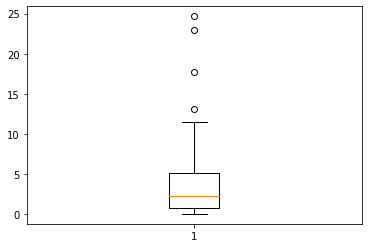

In [ ]:
plt.boxplot(l_avg_df_4['Monthly_avg_visits'])

In [ ]:
l_avg_df_4[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.000000,0.990296,1.000000
raw_visitor_counts,0.990296,1.000000,0.990296
Monthly_avg_visits,1.000000,0.990296,1.000000


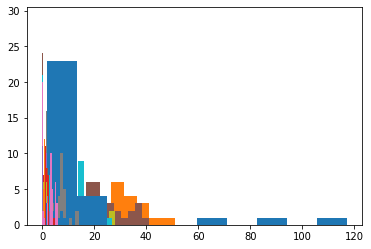

In [ ]:
for record in l_avg_df_4['visits_by_day']:
  plt.hist(record)

In [ ]:
l_pop_df_4 = L_GS_df_4[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
l_pop_df_4.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
3,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,"[0,0,0,0,0,1,1,2,2,6,5,7,7,8,9,4,5,6,3,1,3,4,3,1]","{""Monday"":3,""Tuesday"":6,""Wednesday"":1,""Thursda..."
15,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,"[0,0,2,0,0,0,0,0,0,2,3,7,6,7,7,8,3,6,8,3,3,5,1,0]","{""Monday"":10,""Tuesday"":7,""Wednesday"":3,""Thursd..."
33,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,"[5,3,3,4,3,3,4,8,18,22,20,18,17,31,26,19,13,7,...","{""Monday"":22,""Tuesday"":17,""Wednesday"":14,""Thur..."
45,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,"[1,2,3,1,1,2,1,2,7,19,17,16,25,21,25,23,18,15,...","{""Monday"":22,""Tuesday"":19,""Wednesday"":13,""Thur..."
57,CHAMPA FINE WINE & LIQUORS,1600 CHAMPA ST,LIQUOR - STORE,80202,CBD,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,"[5,5,1,1,1,0,0,0,1,2,6,15,15,14,12,15,9,10,6,3...","{""Monday"":13,""Tuesday"":11,""Wednesday"":5,""Thurs..."


In [ ]:
l_pop_df_4['popularity_by_hour'] = l_pop_df_4['popularity_by_hour'].transform(lambda x: literal_eval(x))
l_pop_df_4['Monthly_avg_pop'] = l_pop_df_4['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = l_pop_df_4[l_pop_df_4['Monthly_avg_pop'] == max(l_pop_df_4['Monthly_avg_pop'])]
min_avg_pop = l_pop_df_4[l_pop_df_4['Monthly_avg_pop'] == min(l_pop_df_4['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

    BUS_PROF_NAME  ... Monthly_avg_pop
411   SKYE LIQUOR  ...           110.0

[1 rows x 10 columns]
       BUS_PROF_NAME  ... Monthly_avg_pop
128  RAINBOW LIQUORS  ...        0.083333

[1 rows x 10 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa854dafe90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa855506cd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa856a39ed0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa856a39050>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa85b8e4a50>,
  <matplotlib.lines.Line2D at 0x7fa866924190>]}

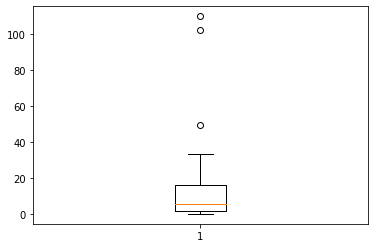

In [ ]:
plt.boxplot(l_pop_df_4['Monthly_avg_pop'])

(array([2., 1., 1., 1., 0., 3., 3., 2., 8., 3.]),
 array([ 65. ,  71.8,  78.6,  85.4,  92.2,  99. , 105.8, 112.6, 119.4,
        126.2, 133. ]),
 <a list of 10 Patch objects>)

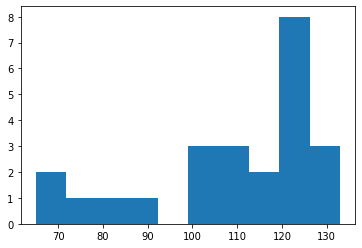

In [ ]:
plt.hist(l_pop_df_4[l_pop_df_4['BUS_PROF_NAME'] == 'SKYE LIQUOR']['popularity_by_hour'])

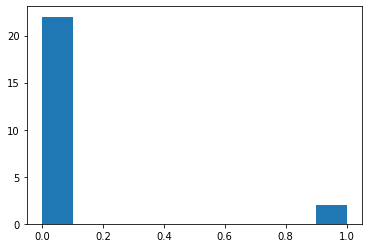

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)

### **May Analysis**

Visit and Popularity analysis

In [ ]:
L_GS_df_5.head()

,address_placekey,level_0,placekey,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD,region_x,safegraph_place_id,parent_placekey,parent_safegraph_place_id,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
4,22s@5q9-bqc-9cq,4,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,61,43,"[2,2,2,2,4,0,2,2,2,2,1,4,2,2,2,3,1,2,0,4,0,1,1...",80310003011,"{""080010096034"":4,""080310003011"":4,""0803501440...","{""080310043011"":4,""080310003011"":4,""0800508620...","{""US"":39}",9792.0,21.0,"{""<5"":0,""5-10"":16,""11-20"":12,""21-60"":16,""61-12...","{""CrossFit"":100,""Pet Supplies Plus"":33}","{""Starbucks"":42,""King Soopers"":37,""7-Eleven"":3...","[0,0,1,0,0,0,0,0,0,7,7,13,16,10,11,12,12,14,5,...","{""Monday"":7,""Tuesday"":9,""Wednesday"":9,""Thursda...","{""android"":14,""ios"":27}",5,6
16,223@5q9-bnr-cwk,16,223-222@5q9-bnr-cwk,2003-BFN-1006944,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-12-29 13:16:14,2022-01-21 00:00:00,Denver,CO,80204,3.0,1,00800,Sun Valley,C-MX-5,3133632.0,1695935.0,CO,sg:eadea8f88cae40b589592f25857e61af,NaN,NaN,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,50,43,"[0,2,0,2,0,2,1,1,0,0,5,0,3,1,1,2,2,5,1,3,1,1,3...",80310008001,"{""080310006001"":7,""080310011021"":4,""0800100870...","{""080590098081"":4,""080310017022"":4,""1711300030...","{""US"":40}",15984.0,10.5,"{""<5"":2,""5-10"":23,""11-20"":14,""21-60"":8,""61-120...","{""Smoker Friendly"":20}","{""ConocoPhillips"":37,""Walmart"":33,""King Sooper...","[1,1,0,0,0,0,0,0,1,2,2,5,5,6,4,8,6,5,5,4,5,5,4,3]","{""Monday"":3,""Tuesday"":3,""Wednesday"":9,""Thursda...","{""android"":26,""ios"":19}",5,6
34,22k@5q9-bqm-rff,34,22k-222@5q9-bqm-rff,2002-BFN-100808,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-01-11 13:04:01,2021-12-11 00:00:00,Denver,CO,80203,10.0,6,02602,North Capitol Hill,C-MS-5,3146814.0,1695936.0,CO,sg:b885b0859e244c09bf8d93ed95335fb6,NaN,NaN,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,105,72,"[1,4,0,3,4,4,5,6,2,4,6,6,3,1,7,5,3,7,2,1,2,1,1...",80310026021,"{""080310037024"":4,""191530113001"":4,""0803100320...","{""080310026021"":13,""080310014032"":5,""270531262...","{""US"":64}",4941.0,17.0,"{""<5"":4,""5-10"":33,""11-20"":20,""21-60"":20,""61-12...","{""Circle K"":25,""IAA"":20}","{""Starbucks"":29,""ConocoPhillips"":25,""King Soop...","[1,4,2,2,2,2,5,8,15,20,22,23,24,29,22,17,13,14...","{""Monday"":9,""Tuesday"":18,""Wednesday"":16,""Thurs...","{""android"":31,""ios"":42}",5,6
46,228@5q9-bqm-fzz,46,228-223@5q9-bqm-fzz,2013-BFN-1069498,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-06-25 10:49:09,2021-06-09 00:00:00,Denver,CO,80203,10.0,6,02602,North Capitol Hill,R-4-X,3146086.0,1697343.0,CO,sg:aeea1f21a02b4ce68c9d66e58e88009b,NaN,NaN,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,123,73,"[2,2,1,7,4,1,7,5,7,4,3,2,0,5,5,2,5,4,5,4,3,2,5...",80310026021,"{""080010085371"":8,""080310024032"":8,""0803100100...","{""080310021004"":9,""080310026021"":8,""0803100210...","{""US"":66}",6739.0,27.0,"{""<5"":4,""5-10"":26,""11-20"":27,""21-60"":30,""61-12...","{""Moe's Orignal Bar B Que"":25}","{""King Soopers"":26,""7-Eleven"":22,""Starbucks"":2...","[4,3,3,3,4,3,3,2,6,13,17,24,18,23,29,31,26,19,...","{""Monday"":19,""Tuesday"":20,""Wednesday"":19,""Thur...","{""android""

In [ ]:
l_avg_df_5 = L_GS_df_5[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
l_avg_df_5.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
4,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,61,43,"[2,2,2,2,4,0,2,2,2,2,1,4,2,2,2,3,1,2,0,4,0,1,1..."
16,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,50,43,"[0,2,0,2,0,2,1,1,0,0,5,0,3,1,1,2,2,5,1,3,1,1,3..."
34,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,105,72,"[1,4,0,3,4,4,5,6,2,4,6,6,3,1,7,5,3,7,2,1,2,1,1..."
46,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,123,73,"[2,2,1,7,4,1,7,5,7,4,3,2,0,5,5,2,5,4,5,4,3,2,5..."
58,CHAMPA FINE WINE & LIQUORS,1600 CHAMPA ST,LIQUOR - STORE,80202,CBD,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,75,67,"[2,1,2,2,6,3,1,4,2,2,1,4,0,4,0,3,2,5,0,2,2,2,0..."


In [ ]:
from ast import literal_eval
l_avg_df_5['visits_by_day'] = l_avg_df_5['visits_by_day'].transform(lambda x: literal_eval(x))
l_avg_df_5['Monthly_avg_visits'] = l_avg_df_5['visits_by_day'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
max_avg = l_avg_df_5[l_avg_df_5['Monthly_avg_visits'] == max(l_avg_df_5['Monthly_avg_visits'])]
min_avg = l_avg_df_5[l_avg_df_5['Monthly_avg_visits'] == min(l_avg_df_5['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

    BUS_PROF_NAME  ... Monthly_avg_visits
412   SKYE LIQUOR  ...          24.354839

[1 rows x 11 columns]
            BUS_PROF_NAME  ... Monthly_avg_visits
129       RAINBOW LIQUORS  ...           0.032258
526    BOOTLEGGER LIQUORS  ...           0.032258
721  DENVER DRUG & LIQUOR  ...           0.032258

[3 rows x 11 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa858b7db10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa866960d50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa8671081d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa867108f90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa8669605d0>,
  <matplotlib.lines.Line2D at 0x7fa866960410>]}

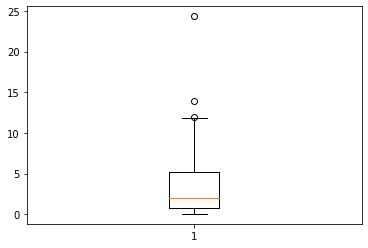

In [ ]:
plt.boxplot(l_avg_df_5['Monthly_avg_visits'])

In [ ]:
l_avg_df_5[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.000000,0.970158,1.000000
raw_visitor_counts,0.970158,1.000000,0.970158
Monthly_avg_visits,1.000000,0.970158,1.000000


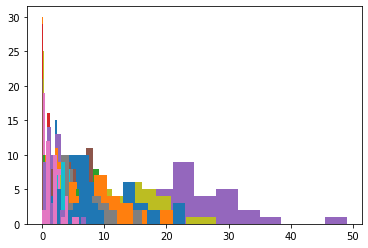

In [ ]:
for record in l_avg_df_5['visits_by_day']:
  plt.hist(record)

In [ ]:
l_pop_df_5 = L_GS_df_5[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
l_pop_df_5.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
4,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,"[0,0,1,0,0,0,0,0,0,7,7,13,16,10,11,12,12,14,5,...","{""Monday"":7,""Tuesday"":9,""Wednesday"":9,""Thursda..."
16,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,"[1,1,0,0,0,0,0,0,1,2,2,5,5,6,4,8,6,5,5,4,5,5,4,3]","{""Monday"":3,""Tuesday"":3,""Wednesday"":9,""Thursda..."
34,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,"[1,4,2,2,2,2,5,8,15,20,22,23,24,29,22,17,13,14...","{""Monday"":9,""Tuesday"":18,""Wednesday"":16,""Thurs..."
46,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,"[4,3,3,3,4,3,3,2,6,13,17,24,18,23,29,31,26,19,...","{""Monday"":19,""Tuesday"":20,""Wednesday"":19,""Thur..."
58,CHAMPA FINE WINE & LIQUORS,1600 CHAMPA ST,LIQUOR - STORE,80202,CBD,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,"[0,0,1,0,0,0,0,0,1,2,4,13,8,12,22,15,18,11,4,4...","{""Monday"":8,""Tuesday"":10,""Wednesday"":8,""Thursd..."


In [ ]:
l_pop_df_5['popularity_by_hour'] = l_pop_df_5['popularity_by_hour'].transform(lambda x: literal_eval(x))
l_pop_df_5['Monthly_avg_pop'] = l_pop_df_5['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = l_pop_df_5[l_pop_df_5['Monthly_avg_pop'] == max(l_pop_df_5['Monthly_avg_pop'])]
min_avg_pop = l_pop_df_5[l_pop_df_5['Monthly_avg_pop'] == min(l_pop_df_5['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

    BUS_PROF_NAME  ... Monthly_avg_pop
412   SKYE LIQUOR  ...         101.875

[1 rows x 10 columns]
            BUS_PROF_NAME  ... Monthly_avg_pop
129       RAINBOW LIQUORS  ...        0.041667
526    BOOTLEGGER LIQUORS  ...        0.041667
721  DENVER DRUG & LIQUOR  ...        0.041667

[3 rows x 10 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa852f6a4d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa852eeb950>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa852eb8710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa8667ddc50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa852f763d0>,
  <matplotlib.lines.Line2D at 0x7fa852f0fc90>]}

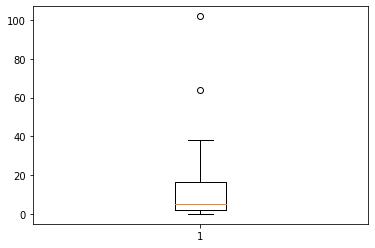

In [ ]:
plt.boxplot(l_pop_df_5['Monthly_avg_pop'])

(array([1., 2., 1., 6., 5., 1., 4., 1., 0., 3.]),
 array([ 68. ,  74.8,  81.6,  88.4,  95.2, 102. , 108.8, 115.6, 122.4,
        129.2, 136. ]),
 <a list of 10 Patch objects>)

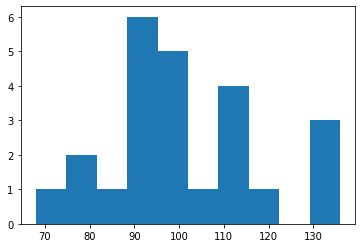

In [ ]:
plt.hist(l_pop_df_5[l_pop_df_5['BUS_PROF_NAME'] == 'SKYE LIQUOR']['popularity_by_hour'])

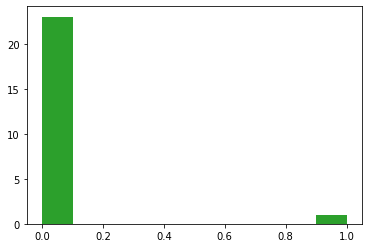

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)

### **June Analysis**

Vistor and Popularity analysis

In [ ]:
L_GS_df_6.head()

,address_placekey,level_0,placekey,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD,region_x,safegraph_place_id,parent_placekey,parent_safegraph_place_id,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
5,22s@5q9-bqc-9cq,5,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,58,37,"[2,3,1,2,0,3,3,2,4,2,1,3,3,2,2,0,3,1,1,3,0,2,5...",80310003011,"{""320030053542"":6,""080590114011"":4,""0803100838...","{""080310003011"":6,""080310011011"":4,""0803100280...","{""US"":34}",9966.0,20.0,"{""<5"":2,""5-10"":16,""11-20"":12,""21-60"":13,""61-12...","{""King Soopers"":50}","{""Walmart"":30,""King Soopers"":30,""Starbucks"":29...","[2,3,1,0,0,0,0,0,1,5,6,7,10,14,15,9,6,5,6,9,3,...","{""Monday"":5,""Tuesday"":6,""Wednesday"":11,""Thursd...","{""android"":12,""ios"":23}",6,7
17,223@5q9-bnr-cwk,17,223-222@5q9-bnr-cwk,2003-BFN-1006944,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-12-29 13:16:14,2022-01-21 00:00:00,Denver,CO,80204,3.0,1,00800,Sun Valley,C-MX-5,3133632.0,1695935.0,CO,sg:eadea8f88cae40b589592f25857e61af,NaN,NaN,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,45,39,"[2,2,2,0,1,0,0,2,0,0,1,2,1,0,0,1,2,2,0,1,3,2,1...",80310008001,"{""371190055141"":5,""080310005024"":4,""0804100750...","{""080050067122"":4,""080310005024"":4,""0800100870...","{""US"":36}",17093.0,11.0,"{""<5"":1,""5-10"":20,""11-20"":11,""21-60"":9,""61-120...","{""DoubleTree by Hilton"":50,""Autograph Collecti...","{""ConocoPhillips"":43,""King Soopers"":41,""McDona...","[1,1,0,0,0,0,0,0,1,3,6,9,3,4,8,9,9,6,3,3,0,1,1,1]","{""Monday"":5,""Tuesday"":3,""Wednesday"":2,""Thursda...","{""android"":17,""ios"":20}",6,7
25,22v@5q9-bg4-99f,25,22v-222@5q9-bg4-99f,2010-BFN-1050830,LOWRY WINE AND SPIRTS,727 QUEBEC ST,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-07-23 14:04:20,2021-08-04 00:00:00,Denver,CO,80220,5.0,2,04304,Montclair,E-CC-3X,3167693.0,1690429.0,CO,sg:ee93eaa900ec4059aecc7fe56d2ee1f9,NaN,NaN,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,2,2,"[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0...",80310043042,"{""080310083893"":4}","{""080310083893"":4,""080310043042"":4}","{""US"":6}",NaN,8.5,"{""<5"":0,""5-10"":1,""11-20"":1,""21-60"":0,""61-120"":...",{},"{""ConocoPhillips"":99,""Chick-fil-A"":97,""A World...","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0]","{""Monday"":1,""Tuesday"":1,""Wednesday"":0,""Thursda...","{""android"":0,""ios"":4}",6,7
35,22k@5q9-bqm-rff,35,22k-222@5q9-bqm-rff,2002-BFN-100808,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-01-11 13:04:01,2021-12-11 00:00:00,Denver,CO,80203,10.0,6,02602,North Capitol Hill,C-MS-5,3146814.0,1695936.0,CO,sg:b885b0859e244c09bf8d93ed95335fb6,NaN,NaN,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,104,62,"[2,6,6,4,4,3,6,3,2,1,3,4,2,5,5,0,1,2,4,4,3,7,2...",80310026021,"{""080310026011"":4,""080310005022"":4,""0803100410...","{""080310026021"":7,""080310021005"":4,""0803100160...","{""US"":51,""TW"":4}",5001.0,20.5,"{""<5"":1,""5-10"":29,""11-20"":22,""21-60"":20,""61-12...","{""NAPA Auto Parts"":50,""Costco Wholesale Corp.""...","{""King Soopers"":29,""Starbucks"":25,""Costco Whol...","[3,6,8,6,3,3,3,8,12,23,23,25,20,20,15,18,16,11...","{""Monday"":11,""Tuesday"":16,""Wednesday"":12,""Thur...","{""android"":28,""ios"":36}",6,7
47,228@5q9-bqm-fzz,47,228-223@5q9-bqm-fzz,2013-BFN-

In [ ]:
l_avg_df_6 = L_GS_df_6[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
l_avg_df_6.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
5,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,58,37,"[2,3,1,2,0,3,3,2,4,2,1,3,3,2,2,0,3,1,1,3,0,2,5..."
17,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,45,39,"[2,2,2,0,1,0,0,2,0,0,1,2,1,0,0,1,2,2,0,1,3,2,1..."
25,LOWRY WINE AND SPIRTS,727 QUEBEC ST,LIQUOR - STORE,80220,Montclair,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,2,2,"[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0..."
35,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,104,62,"[2,6,6,4,4,3,6,3,2,1,3,4,2,5,5,0,1,2,4,4,3,7,2..."
47,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,118,72,"[2,4,3,4,7,2,3,4,6,2,1,3,2,6,4,3,4,2,7,1,8,7,6..."


In [ ]:
from ast import literal_eval
l_avg_df_6['visits_by_day'] = l_avg_df_6['visits_by_day'].transform(lambda x: literal_eval(x))
l_avg_df_6['Monthly_avg_visits'] = l_avg_df_6['visits_by_day'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
max_avg = l_avg_df_6[l_avg_df_6['Monthly_avg_visits'] == max(l_avg_df_6['Monthly_avg_visits'])]
min_avg = l_avg_df_6[l_avg_df_6['Monthly_avg_visits'] == min(l_avg_df_6['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

    BUS_PROF_NAME  ... Monthly_avg_visits
413   SKYE LIQUOR  ...          23.066667

[1 rows x 11 columns]
                BUS_PROF_NAME  ... Monthly_avg_visits
130           RAINBOW LIQUORS  ...           0.033333
527        BOOTLEGGER LIQUORS  ...           0.033333
722      DENVER DRUG & LIQUOR  ...           0.033333
776  FEDERAL DISCOUNT LIQUORS  ...           0.033333

[4 rows x 11 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa852b2fe90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa852b3bc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa852afd790>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa852b3ba90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa852b2f210>,
  <matplotlib.lines.Line2D at 0x7fa852b2f6d0>]}

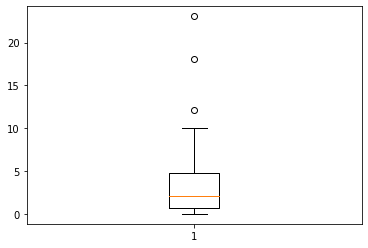

In [ ]:
plt.boxplot(l_avg_df_6['Monthly_avg_visits'])

In [ ]:
l_avg_df_6[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.00000,0.96538,1.00000
raw_visitor_counts,0.96538,1.00000,0.96538
Monthly_avg_visits,1.00000,0.96538,1.00000


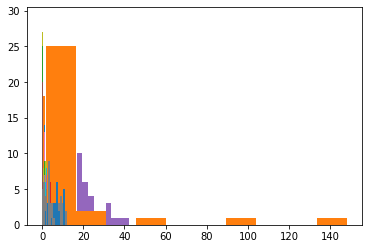

In [ ]:
for record in l_avg_df_6['visits_by_day']:
  plt.hist(record)

In [ ]:
l_pop_df_6 = L_GS_df_6[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
l_pop_df_6.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
5,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,"[2,3,1,0,0,0,0,0,1,5,6,7,10,14,15,9,6,5,6,9,3,...","{""Monday"":5,""Tuesday"":6,""Wednesday"":11,""Thursd..."
17,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,"[1,1,0,0,0,0,0,0,1,3,6,9,3,4,8,9,9,6,3,3,0,1,1,1]","{""Monday"":5,""Tuesday"":3,""Wednesday"":2,""Thursda..."
25,LOWRY WINE AND SPIRTS,727 QUEBEC ST,LIQUOR - STORE,80220,Montclair,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0]","{""Monday"":1,""Tuesday"":1,""Wednesday"":0,""Thursda..."
35,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,"[3,6,8,6,3,3,3,8,12,23,23,25,20,20,15,18,16,11...","{""Monday"":11,""Tuesday"":16,""Wednesday"":12,""Thur..."
47,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,"[0,0,0,1,1,0,1,4,4,17,23,25,30,26,24,19,27,23,...","{""Monday"":10,""Tuesday"":21,""Wednesday"":5,""Thurs..."


In [ ]:
l_pop_df_6['popularity_by_hour'] = l_pop_df_6['popularity_by_hour'].transform(lambda x: literal_eval(x))
l_pop_df_6['Monthly_avg_pop'] = l_pop_df_6['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = l_pop_df_6[l_pop_df_6['Monthly_avg_pop'] == max(l_pop_df_6['Monthly_avg_pop'])]
min_avg_pop = l_pop_df_6[l_pop_df_6['Monthly_avg_pop'] == min(l_pop_df_6['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

    BUS_PROF_NAME  ... Monthly_avg_pop
413   SKYE LIQUOR  ...      102.541667

[1 rows x 10 columns]
                BUS_PROF_NAME  ... Monthly_avg_pop
130           RAINBOW LIQUORS  ...        0.041667
722      DENVER DRUG & LIQUOR  ...        0.041667
776  FEDERAL DISCOUNT LIQUORS  ...        0.041667

[3 rows x 10 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa867a25e10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa866892d10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa853548b10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa866892e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa856ffec10>,
  <matplotlib.lines.Line2D at 0x7fa856ffec90>]}

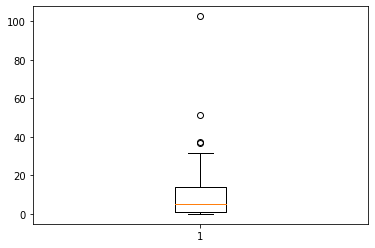

In [ ]:
plt.boxplot(l_pop_df_6['Monthly_avg_pop'])

(array([2., 0., 0., 2., 7., 1., 2., 6., 1., 3.]),
 array([ 68.,  74.,  80.,  86.,  92.,  98., 104., 110., 116., 122., 128.]),
 <a list of 10 Patch objects>)

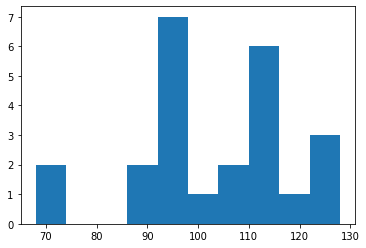

In [ ]:
plt.hist(l_pop_df_6[l_pop_df_6['BUS_PROF_NAME'] == 'SKYE LIQUOR']['popularity_by_hour'])

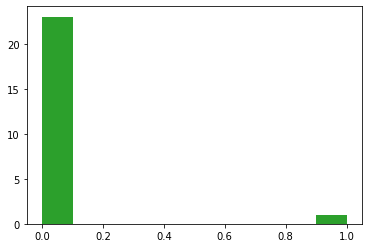

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)

### **July Analysis**

Visitor and Population analysis

In [ ]:
L_GS_df_7.head()

,address_placekey,level_0,placekey,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD,region_x,safegraph_place_id,parent_placekey,parent_safegraph_place_id,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
6,22s@5q9-bqc-9cq,6,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,49,38,"[0,2,0,1,3,2,6,2,0,1,3,0,1,2,1,3,2,3,0,4,2,0,0...",80310003011,"{""080310004011"":4,""080310003012"":4,""0803100030...","{""160010102241"":6,""481677206002"":5,""0803100170...","{""US"":31}",7512.0,19.0,"{""<5"":3,""5-10"":14,""11-20"":10,""21-60"":13,""61-12...","{""Circle K"":33,""Phillips 66"":33}","{""ConocoPhillips"":36,""King Soopers"":34,""7-Elev...","[1,0,0,0,0,0,0,0,0,1,3,5,11,6,12,9,5,5,7,8,3,2...","{""Monday"":7,""Tuesday"":5,""Wednesday"":8,""Thursda...","{""android"":12,""ios"":27}",7,8
18,223@5q9-bnr-cwk,18,223-222@5q9-bnr-cwk,2003-BFN-1006944,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-12-29 13:16:14,2022-01-21 00:00:00,Denver,CO,80204,3.0,1,00800,Sun Valley,C-MX-5,3133632.0,1695935.0,CO,sg:eadea8f88cae40b589592f25857e61af,NaN,NaN,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,56,52,"[1,0,5,7,2,1,4,0,1,0,2,2,4,1,1,2,1,1,2,3,4,0,1...",80310008001,"{""270370602011"":5,""250010121022"":4,""0803501450...","{""080590099001"":4,""080050066041"":4,""0805900980...","{""US"":46}",14578.0,11.5,"{""<5"":1,""5-10"":25,""11-20"":13,""21-60"":11,""61-12...","{""McDonald's"":22,""Valero Energy"":20}","{""ConocoPhillips"":44,""Walmart"":42,""7-Eleven"":3...","[1,1,1,1,1,1,1,3,3,3,3,5,7,3,7,6,5,5,3,5,9,8,5,6]","{""Monday"":4,""Tuesday"":7,""Wednesday"":12,""Thursd...","{""android"":35,""ios"":19}",7,8
36,22k@5q9-bqm-rff,36,22k-222@5q9-bqm-rff,2002-BFN-100808,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-01-11 13:04:01,2021-12-11 00:00:00,Denver,CO,80203,10.0,6,02602,North Capitol Hill,C-MS-5,3146814.0,1695936.0,CO,sg:b885b0859e244c09bf8d93ed95335fb6,NaN,NaN,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,87,61,"[1,4,2,3,1,1,0,1,2,3,4,5,2,3,0,2,1,7,5,2,3,5,3...",80310026021,"{""080310023002"":10,""080310068122"":7,""080310043...","{""080310026011"":5,""080310027022"":4,""0803100420...","{""US"":56}",6079.0,16.0,"{""<5"":6,""5-10"":26,""11-20"":17,""21-60"":17,""61-12...","{""Office Depot"":33,""HuHot Mongolian Grill"":20,...","{""Starbucks"":40,""King Soopers"":24,""7-Eleven"":2...","[0,3,1,1,1,2,4,5,11,17,17,19,20,16,15,16,13,12...","{""Monday"":15,""Tuesday"":16,""Wednesday"":16,""Thur...","{""android"":25,""ios"":35}",7,8
48,228@5q9-bqm-fzz,48,228-223@5q9-bqm-fzz,2013-BFN-1069498,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-06-25 10:49:09,2021-06-09 00:00:00,Denver,CO,80203,10.0,6,02602,North Capitol Hill,R-4-X,3146086.0,1697343.0,CO,sg:aeea1f21a02b4ce68c9d66e58e88009b,NaN,NaN,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,104,55,"[0,10,4,4,9,7,2,2,2,5,2,1,6,1,4,2,3,5,1,4,1,4,...",80310026021,"{""080310041021"":4,""080310027032"":4,""0803100260...","{""080050060001"":5,""080050869002"":4,""0805901180...","{""US"":47}",11975.0,31.0,"{""<5"":5,""5-10"":17,""11-20"":22,""21-60"":17,""61-12...","{""Orangetheory Fitness"":50,""Evereve"":33,""Pavil...","{""King Soopers"":25,""Starbucks"":18,""7-Eleven"":1...","[3,3,3,3,4,4,4,8,13,20,23,24,26,21,24,27,23,11...","{""Monday"":21

In [ ]:
l_avg_df_7 = L_GS_df_7[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
l_avg_df_7.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
6,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,49,38,"[0,2,0,1,3,2,6,2,0,1,3,0,1,2,1,3,2,3,0,4,2,0,0..."
18,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,56,52,"[1,0,5,7,2,1,4,0,1,0,2,2,4,1,1,2,1,1,2,3,4,0,1..."
36,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,87,61,"[1,4,2,3,1,1,0,1,2,3,4,5,2,3,0,2,1,7,5,2,3,5,3..."
48,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,104,55,"[0,10,4,4,9,7,2,2,2,5,2,1,6,1,4,2,3,5,1,4,1,4,..."
60,CHAMPA FINE WINE & LIQUORS,1600 CHAMPA ST,LIQUOR - STORE,80202,CBD,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,67,63,"[2,4,2,2,4,3,2,2,1,2,2,2,1,2,3,4,2,0,0,4,3,1,1..."


In [ ]:
from ast import literal_eval
l_avg_df_7['visits_by_day'] = l_avg_df_7['visits_by_day'].transform(lambda x: literal_eval(x))
l_avg_df_7['Monthly_avg_visits'] = l_avg_df_7['visits_by_day'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
max_avg = l_avg_df_7[l_avg_df_7['Monthly_avg_visits'] == max(l_avg_df_7['Monthly_avg_visits'])]
min_avg = l_avg_df_7[l_avg_df_7['Monthly_avg_visits'] == min(l_avg_df_7['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

    BUS_PROF_NAME  ... Monthly_avg_visits
414   SKYE LIQUOR  ...          21.258065

[1 rows x 11 columns]
                         BUS_PROF_NAME  ... Monthly_avg_visits
175  GRAPE EXPECTATIONS WINE & SPIRITS  ...           0.032258
528                 BOOTLEGGER LIQUORS  ...           0.032258
723               DENVER DRUG & LIQUOR  ...           0.032258

[3 rows x 11 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa856901d10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa854bf9ad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa852e5ec10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa859c1ca90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa856901090>,
  <matplotlib.lines.Line2D at 0x7fa854bf9b50>]}

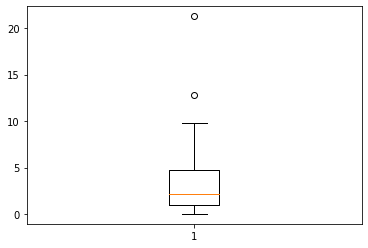

In [ ]:
plt.boxplot(l_avg_df_7['Monthly_avg_visits'])

In [ ]:
l_avg_df_7[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.000000,0.970474,1.000000
raw_visitor_counts,0.970474,1.000000,0.970474
Monthly_avg_visits,1.000000,0.970474,1.000000


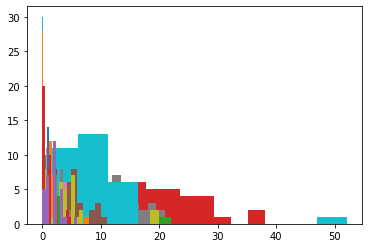

In [ ]:
for record in l_avg_df_7['visits_by_day']:
  plt.hist(record)

In [ ]:
l_pop_df_7 = L_GS_df_7[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
l_pop_df_7.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
6,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,"[1,0,0,0,0,0,0,0,0,1,3,5,11,6,12,9,5,5,7,8,3,2...","{""Monday"":7,""Tuesday"":5,""Wednesday"":8,""Thursda..."
18,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,"[1,1,1,1,1,1,1,3,3,3,3,5,7,3,7,6,5,5,3,5,9,8,5,6]","{""Monday"":4,""Tuesday"":7,""Wednesday"":12,""Thursd..."
36,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,"[0,3,1,1,1,2,4,5,11,17,17,19,20,16,15,16,13,12...","{""Monday"":15,""Tuesday"":16,""Wednesday"":16,""Thur..."
48,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,"[3,3,3,3,4,4,4,8,13,20,23,24,26,21,24,27,23,11...","{""Monday"":21,""Tuesday"":18,""Wednesday"":14,""Thur..."
60,CHAMPA FINE WINE & LIQUORS,1600 CHAMPA ST,LIQUOR - STORE,80202,CBD,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,"[2,3,0,0,0,0,0,0,0,4,8,12,14,9,12,14,12,13,3,3...","{""Monday"":12,""Tuesday"":11,""Wednesday"":4,""Thurs..."


In [ ]:
l_pop_df_7['popularity_by_hour'] = l_pop_df_7['popularity_by_hour'].transform(lambda x: literal_eval(x))
l_pop_df_7['Monthly_avg_pop'] = l_pop_df_7['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = l_pop_df_7[l_pop_df_7['Monthly_avg_pop'] == max(l_pop_df_7['Monthly_avg_pop'])]
min_avg_pop = l_pop_df_7[l_pop_df_7['Monthly_avg_pop'] == min(l_pop_df_7['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

    BUS_PROF_NAME  ... Monthly_avg_pop
414   SKYE LIQUOR  ...       89.541667

[1 rows x 10 columns]
                         BUS_PROF_NAME  ... Monthly_avg_pop
175  GRAPE EXPECTATIONS WINE & SPIRITS  ...        0.041667
528                 BOOTLEGGER LIQUORS  ...        0.041667
723               DENVER DRUG & LIQUOR  ...        0.041667

[3 rows x 10 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa855ef83d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa854cc6b10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa85601a8d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa8589b6a50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa854430fd0>,
  <matplotlib.lines.Line2D at 0x7fa854430810>]}

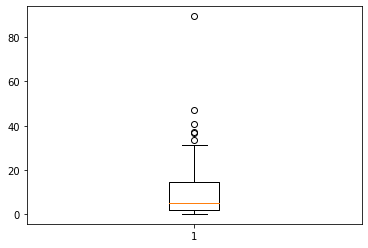

In [ ]:
plt.boxplot(l_pop_df_7['Monthly_avg_pop'])

(array([1., 4., 5., 5., 3., 2., 1., 2., 0., 1.]),
 array([ 68. ,  73.5,  79. ,  84.5,  90. ,  95.5, 101. , 106.5, 112. ,
        117.5, 123. ]),
 <a list of 10 Patch objects>)

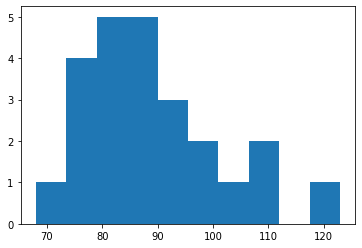

In [ ]:
plt.hist(l_pop_df_7[l_pop_df_7['BUS_PROF_NAME'] == 'SKYE LIQUOR']['popularity_by_hour'])

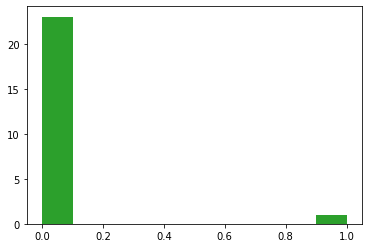

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)

### **August Analysis**

Visitor and popularity analysis

In [ ]:
L_GS_df_8.head()

,address_placekey,level_0,placekey,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD,region_x,safegraph_place_id,parent_placekey,parent_safegraph_place_id,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
7,22s@5q9-bqc-9cq,7,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,78,45,"[3,1,3,2,2,5,5,3,5,3,3,2,1,2,1,2,5,1,4,1,1,2,3...",80310003011,"{""080050868001"":4,""080010095021"":4,""0803100030...","{""080310003034"":5,""060290001015"":4,""0805901204...","{""US"":40}",8659.0,22.5,"{""<5"":2,""5-10"":29,""11-20"":6,""21-60"":21,""61-120...",{},"{""Starbucks"":37,""Walmart"":33,""King Soopers"":31...","[0,0,0,0,0,0,0,0,3,14,11,13,20,15,15,16,12,8,1...","{""Monday"":8,""Tuesday"":12,""Wednesday"":11,""Thurs...","{""android"":12,""ios"":31}",8,9
19,223@5q9-bnr-cwk,19,223-222@5q9-bnr-cwk,2003-BFN-1006944,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-12-29 13:16:14,2022-01-21 00:00:00,Denver,CO,80204,3.0,1,00800,Sun Valley,C-MX-5,3133632.0,1695935.0,CO,sg:eadea8f88cae40b589592f25857e61af,NaN,NaN,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,93,87,"[2,0,3,11,3,1,2,1,1,2,10,5,0,2,0,0,3,9,0,0,4,0...",80310008001,"{""080930002001"":7,""080310070131"":4,""0803100700...","{""080590117103"":5,""080310017022"":4,""0900346220...","{""US"":84}",17045.0,12.0,"{""<5"":1,""5-10"":38,""11-20"":18,""21-60"":24,""61-12...","{""Starbucks"":10,""Wells Fargo"":9}","{""ConocoPhillips"":41,""King Soopers"":33,""Starbu...","[6,4,1,1,1,1,2,2,3,3,4,4,7,3,12,16,10,10,22,18...","{""Monday"":1,""Tuesday"":10,""Wednesday"":6,""Thursd...","{""android"":46,""ios"":42}",8,9
26,22v@5q9-bg4-99f,26,22v-222@5q9-bg4-99f,2010-BFN-1050830,LOWRY WINE AND SPIRTS,727 QUEBEC ST,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-07-23 14:04:20,2021-08-04 00:00:00,Denver,CO,80220,5.0,2,04304,Montclair,E-CC-3X,3167693.0,1690429.0,CO,sg:ee93eaa900ec4059aecc7fe56d2ee1f9,NaN,NaN,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,2,2,"[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",80310043042,{},{},{},NaN,234.0,"{""<5"":0,""5-10"":1,""11-20"":0,""21-60"":0,""61-120"":...",{},"{""Omaha Steaks"":50,""XFINITY by Comcast"":50,""Sm...","[0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0]","{""Monday"":2,""Tuesday"":0,""Wednesday"":0,""Thursda...","{""android"":4,""ios"":0}",8,9
37,22k@5q9-bqm-rff,37,22k-222@5q9-bqm-rff,2002-BFN-100808,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-01-11 13:04:01,2021-12-11 00:00:00,Denver,CO,80203,10.0,6,02602,North Capitol Hill,C-MS-5,3146814.0,1695936.0,CO,sg:b885b0859e244c09bf8d93ed95335fb6,NaN,NaN,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,131,67,"[3,12,5,2,3,6,8,2,4,4,1,4,6,5,1,3,2,1,1,7,3,6,...",80310026021,"{""080310027033"":4,""480913104032"":4,""0803100270...","{""080310043041"":4,""080310026021"":4,""0804701380...","{""US"":59}",6883.0,23.0,"{""<5"":1,""5-10"":27,""11-20"":31,""21-60"":28,""61-12...","{""ConocoPhillips"":25,""DoubleTree by Hilton"":17...","{""Starbucks"":37,""ConocoPhillips"":20,""McDonald'...","[6,6,8,8,8,7,8,17,31,33,34,33,39,37,33,32,22,1...","{""Monday"":21,""Tuesday"":26,""Wednesday"":18,""Thur...","{""android"":32,""ios"":35}",8,9
49,228@5q9-bqm-fzz,49,228-223@5q9-bqm-fzz,2013-BFN-1069498,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-06-25 10:49:

In [ ]:
l_avg_df_8 = L_GS_df_8[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
l_avg_df_8.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
7,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,78,45,"[3,1,3,2,2,5,5,3,5,3,3,2,1,2,1,2,5,1,4,1,1,2,3..."
19,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,93,87,"[2,0,3,11,3,1,2,1,1,2,10,5,0,2,0,0,3,9,0,0,4,0..."
26,LOWRY WINE AND SPIRTS,727 QUEBEC ST,LIQUOR - STORE,80220,Montclair,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,2,2,"[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
37,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,131,67,"[3,12,5,2,3,6,8,2,4,4,1,4,6,5,1,3,2,1,1,7,3,6,..."
49,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,68,53,"[0,4,3,4,1,1,5,8,4,2,0,1,5,4,1,2,0,2,1,0,2,0,3..."


In [ ]:
from ast import literal_eval
l_avg_df_8['visits_by_day'] = l_avg_df_8['visits_by_day'].transform(lambda x: literal_eval(x))
l_avg_df_8['Monthly_avg_visits'] = l_avg_df_8['visits_by_day'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
max_avg = l_avg_df_8[l_avg_df_8['Monthly_avg_visits'] == max(l_avg_df_8['Monthly_avg_visits'])]
min_avg = l_avg_df_8[l_avg_df_8['Monthly_avg_visits'] == min(l_avg_df_8['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

    BUS_PROF_NAME  ... Monthly_avg_visits
415   SKYE LIQUOR  ...          19.225806

[1 rows x 11 columns]
                         BUS_PROF_NAME  ... Monthly_avg_visits
131                    RAINBOW LIQUORS  ...           0.032258
176  GRAPE EXPECTATIONS WINE & SPIRITS  ...           0.032258
556                         MONDO VINO  ...           0.032258

[3 rows x 11 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa85c53cd10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa85bb81250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa856835b10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa856c3cad0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa85bb81350>,
  <matplotlib.lines.Line2D at 0x7fa85bb816d0>]}

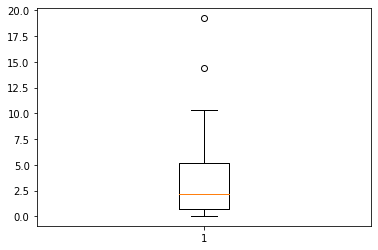

In [ ]:
plt.boxplot(l_avg_df_8['Monthly_avg_visits'])

In [ ]:
l_avg_df_8[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.000000,0.973055,1.000000
raw_visitor_counts,0.973055,1.000000,0.973055
Monthly_avg_visits,1.000000,0.973055,1.000000


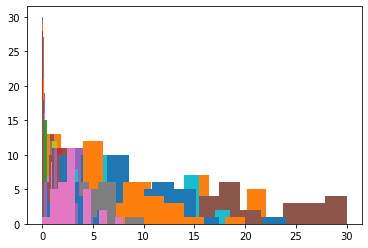

In [ ]:
for record in l_avg_df_8['visits_by_day']:
  plt.hist(record)

In [ ]:
l_pop_df_8 = L_GS_df_8[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
l_pop_df_8.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
7,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,"[0,0,0,0,0,0,0,0,3,14,11,13,20,15,15,16,12,8,1...","{""Monday"":8,""Tuesday"":12,""Wednesday"":11,""Thurs..."
19,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,"[6,4,1,1,1,1,2,2,3,3,4,4,7,3,12,16,10,10,22,18...","{""Monday"":1,""Tuesday"":10,""Wednesday"":6,""Thursd..."
26,LOWRY WINE AND SPIRTS,727 QUEBEC ST,LIQUOR - STORE,80220,Montclair,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,"[0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0]","{""Monday"":2,""Tuesday"":0,""Wednesday"":0,""Thursda..."
37,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,"[6,6,8,8,8,7,8,17,31,33,34,33,39,37,33,32,22,1...","{""Monday"":21,""Tuesday"":26,""Wednesday"":18,""Thur..."
49,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,"[1,1,3,4,3,2,2,2,2,4,9,15,15,16,14,18,14,6,3,2...","{""Monday"":9,""Tuesday"":12,""Wednesday"":11,""Thurs..."


In [ ]:
l_pop_df_8['popularity_by_hour'] = l_pop_df_8['popularity_by_hour'].transform(lambda x: literal_eval(x))
l_pop_df_8['Monthly_avg_pop'] = l_pop_df_8['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = l_pop_df_8[l_pop_df_8['Monthly_avg_pop'] == max(l_pop_df_8['Monthly_avg_pop'])]
min_avg_pop = l_pop_df_8[l_pop_df_8['Monthly_avg_pop'] == min(l_pop_df_8['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

    BUS_PROF_NAME  ... Monthly_avg_pop
415   SKYE LIQUOR  ...           77.25

[1 rows x 10 columns]
                         BUS_PROF_NAME  ... Monthly_avg_pop
176  GRAPE EXPECTATIONS WINE & SPIRITS  ...        0.041667
556                         MONDO VINO  ...        0.041667

[2 rows x 10 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa854146150>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa85e45b110>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa854be3050>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa85f237350>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa85e45b090>,
  <matplotlib.lines.Line2D at 0x7fa85e45bcd0>]}

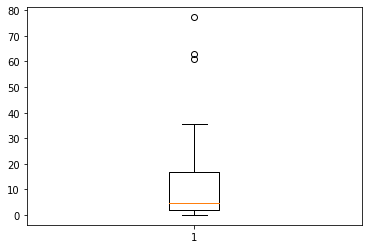

In [ ]:
plt.boxplot(l_pop_df_8['Monthly_avg_pop'])

(array([2., 4., 3., 1., 5., 2., 5., 1., 0., 1.]),
 array([ 61. ,  64.9,  68.8,  72.7,  76.6,  80.5,  84.4,  88.3,  92.2,
         96.1, 100. ]),
 <a list of 10 Patch objects>)

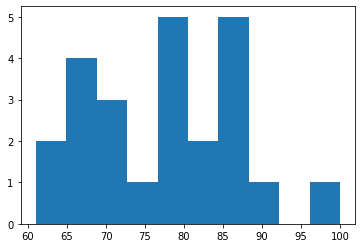

In [ ]:
plt.hist(l_pop_df_8[l_pop_df_8['BUS_PROF_NAME'] == 'SKYE LIQUOR']['popularity_by_hour'])

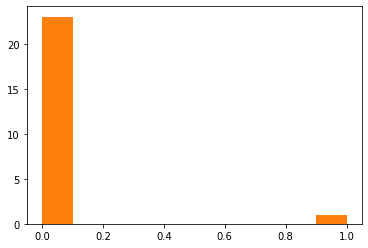

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)

### **September Analysis**

Vistor and Population analysis

In [ ]:
L_GS_df_9.head()

,address_placekey,level_0,placekey,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD,region_x,safegraph_place_id,parent_placekey,parent_safegraph_place_id,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
8,22s@5q9-bqc-9cq,8,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,39,19,"[1,0,0,1,0,4,0,2,0,2,0,2,0,2,1,1,0,1,5,0,1,1,1...",80310003011,"{""080590113001"":4}","{""080590117081"":4,""080310003012"":4,""3604705610...","{""US"":18}",9926.0,20.0,"{""<5"":0,""5-10"":11,""11-20"":10,""21-60"":10,""61-12...",{},"{""7-Eleven"":45,""Walmart"":37,""King Soopers"":26,...","[0,0,0,0,0,0,0,0,0,6,5,8,10,8,8,4,6,2,5,2,3,2,...","{""Monday"":4,""Tuesday"":2,""Wednesday"":10,""Thursd...","{""android"":9,""ios"":10}",9,10
20,223@5q9-bnr-cwk,20,223-222@5q9-bnr-cwk,2003-BFN-1006944,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-12-29 13:16:14,2022-01-21 00:00:00,Denver,CO,80204,3.0,1,00800,Sun Valley,C-MX-5,3133632.0,1695935.0,CO,sg:eadea8f88cae40b589592f25857e61af,NaN,NaN,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,64,60,"[2,1,0,0,3,1,2,2,11,3,0,1,2,2,0,12,1,1,1,1,3,1...",80310008001,"{""080590114022"":4,""080590105023"":4,""0800508380...","{""080590114022"":4,""080310070894"":4,""0800500555...","{""US"":55}",16556.0,10.0,"{""<5"":2,""5-10"":31,""11-20"":16,""21-60"":10,""61-12...","{""DoubleTree by Hilton"":50}","{""Walmart"":34,""ConocoPhillips"":31,""King Sooper...","[0,1,2,0,0,0,0,0,1,4,4,4,10,11,11,8,3,4,7,5,5,...","{""Monday"":4,""Tuesday"":2,""Wednesday"":7,""Thursda...","{""android"":34,""ios"":25}",9,10
27,22v@5q9-bg4-99f,27,22v-222@5q9-bg4-99f,2010-BFN-1050830,LOWRY WINE AND SPIRTS,727 QUEBEC ST,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-07-23 14:04:20,2021-08-04 00:00:00,Denver,CO,80220,5.0,2,04304,Montclair,E-CC-3X,3167693.0,1690429.0,CO,sg:ee93eaa900ec4059aecc7fe56d2ee1f9,NaN,NaN,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,1,1,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0...",80310043042,"{""080310070061"":7}",{},{},NaN,19.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":0,""61-120"":...",{},"{""GMC (General Motors Company)"":100,""Buick"":99...","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda...","{""android"":0,""ios"":0}",9,10
38,22k@5q9-bqm-rff,38,22k-222@5q9-bqm-rff,2002-BFN-100808,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-01-11 13:04:01,2021-12-11 00:00:00,Denver,CO,80203,10.0,6,02602,North Capitol Hill,C-MS-5,3146814.0,1695936.0,CO,sg:b885b0859e244c09bf8d93ed95335fb6,NaN,NaN,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,137,74,"[4,1,5,7,5,7,6,7,3,3,7,8,4,7,0,1,5,5,7,2,7,2,2...",80310026021,"{""080050063002"":4,""080310043014"":4,""0806900020...","{""080310026021"":6,""080050056191"":4,""0803100440...","{""US"":64}",15523.0,24.0,"{""<5"":3,""5-10"":35,""11-20"":24,""21-60"":23,""61-12...","{""Argonaut Liquor"":14,""Einstein Brothers"":14,""...","{""Starbucks"":28,""King Soopers"":26,""ConocoPhill...","[4,7,6,8,9,9,15,24,26,41,39,42,42,33,35,30,26,...","{""Monday"":16,""Tuesday"":23,""Wednesday"":24,""Thur...","{""android"":41,""ios"":28}",9,10
50,228@5q9-bqm-fzz,50,228-223@5q9-bqm-fzz,2013-BFN-1069498,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-06-25 10:49:09,2021-06-09 00:0

In [ ]:
l_avg_df_9 = L_GS_df_9[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
l_avg_df_9.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
8,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,39,19,"[1,0,0,1,0,4,0,2,0,2,0,2,0,2,1,1,0,1,5,0,1,1,1..."
20,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,64,60,"[2,1,0,0,3,1,2,2,11,3,0,1,2,2,0,12,1,1,1,1,3,1..."
27,LOWRY WINE AND SPIRTS,727 QUEBEC ST,LIQUOR - STORE,80220,Montclair,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,1,1,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0..."
38,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,137,74,"[4,1,5,7,5,7,6,7,3,3,7,8,4,7,0,1,5,5,7,2,7,2,2..."
50,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,75,55,"[1,3,2,2,3,1,5,3,2,2,5,3,6,0,3,0,6,0,2,7,2,1,3..."


In [ ]:
from ast import literal_eval
l_avg_df_9['visits_by_day'] = l_avg_df_9['visits_by_day'].transform(lambda x: literal_eval(x))
l_avg_df_9['Monthly_avg_visits'] = l_avg_df_9['visits_by_day'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
max_avg = l_avg_df_9[l_avg_df_9['Monthly_avg_visits'] == max(l_avg_df_9['Monthly_avg_visits'])]
min_avg = l_avg_df_9[l_avg_df_9['Monthly_avg_visits'] == min(l_avg_df_9['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

    BUS_PROF_NAME  ... Monthly_avg_visits
416   SKYE LIQUOR  ...               21.2

[1 rows x 11 columns]
                         BUS_PROF_NAME  ... Monthly_avg_visits
27               LOWRY WINE AND SPIRTS  ...           0.033333
132                    RAINBOW LIQUORS  ...           0.033333
177  GRAPE EXPECTATIONS WINE & SPIRITS  ...           0.033333

[3 rows x 11 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa8670e5e90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa85666c690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa867a20150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa867a20e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa8672fc750>,
  <matplotlib.lines.Line2D at 0x7fa85666c9d0>]}

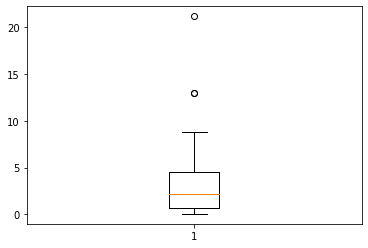

In [ ]:
plt.boxplot(l_avg_df_9['Monthly_avg_visits'])

In [ ]:
l_avg_df_9[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.00000,0.97585,1.00000
raw_visitor_counts,0.97585,1.00000,0.97585
Monthly_avg_visits,1.00000,0.97585,1.00000


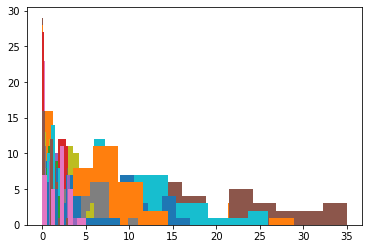

In [ ]:
for record in l_avg_df_9['visits_by_day']:
  plt.hist(record)

In [ ]:
l_pop_df_9 = L_GS_df_9[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
l_pop_df_9.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
8,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,"[0,0,0,0,0,0,0,0,0,6,5,8,10,8,8,4,6,2,5,2,3,2,...","{""Monday"":4,""Tuesday"":2,""Wednesday"":10,""Thursd..."
20,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,"[0,1,2,0,0,0,0,0,1,4,4,4,10,11,11,8,3,4,7,5,5,...","{""Monday"":4,""Tuesday"":2,""Wednesday"":7,""Thursda..."
27,LOWRY WINE AND SPIRTS,727 QUEBEC ST,LIQUOR - STORE,80220,Montclair,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda..."
38,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,"[4,7,6,8,9,9,15,24,26,41,39,42,42,33,35,30,26,...","{""Monday"":16,""Tuesday"":23,""Wednesday"":24,""Thur..."
50,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,"[0,0,0,0,1,2,2,3,4,8,12,14,17,26,22,15,13,6,9,...","{""Monday"":13,""Tuesday"":8,""Wednesday"":10,""Thurs..."


In [ ]:
l_pop_df_9['popularity_by_hour'] = l_pop_df_9['popularity_by_hour'].transform(lambda x: literal_eval(x))
l_pop_df_9['Monthly_avg_pop'] = l_pop_df_9['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = l_pop_df_9[l_pop_df_9['Monthly_avg_pop'] == max(l_pop_df_9['Monthly_avg_pop'])]
min_avg_pop = l_pop_df_9[l_pop_df_9['Monthly_avg_pop'] == min(l_pop_df_9['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

    BUS_PROF_NAME  ... Monthly_avg_pop
416   SKYE LIQUOR  ...       96.416667

[1 rows x 10 columns]
            BUS_PROF_NAME  ... Monthly_avg_pop
27  LOWRY WINE AND SPIRTS  ...        0.041667

[1 rows x 10 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa8522a3a90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa8522b3ad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa8522cbb10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa8522cb5d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa8522b3050>,
  <matplotlib.lines.Line2D at 0x7fa8522b3590>]}

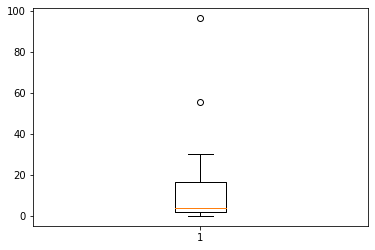

In [ ]:
plt.boxplot(l_pop_df_9['Monthly_avg_pop'])

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


(array([1., 0., 1., 1., 1., 2., 3., 7., 5., 3.]),
 array([ 66. ,  70.5,  75. ,  79.5,  84. ,  88.5,  93. ,  97.5, 102. ,
        106.5, 111. ]),
 <a list of 10 Patch objects>)

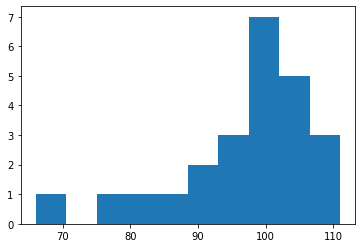

In [ ]:
plt.hist(l_pop_df_9[l_pop_df_9['BUS_PROF_NAME'] == 'SKYE LIQUOR']['popularity_by_hour'])

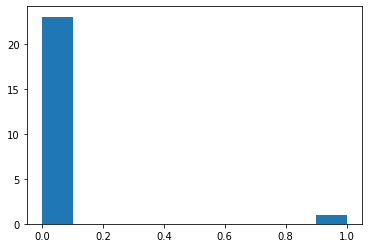

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)

### **October Analysis**

Visitor and Population analysis

In [ ]:
L_GS_df_10.head()

,address_placekey,level_0,placekey,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD,region_x,safegraph_place_id,parent_placekey,parent_safegraph_place_id,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
9,22s@5q9-bqc-9cq,9,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,49,40,"[2,0,0,1,5,1,4,2,1,1,1,0,0,1,3,2,2,3,1,4,2,2,0...",80310003011,"{""080310004025"":4,""081230014071"":4,""1208600760...","{""080590120441"":5,""180890430023"":5,""0803100040...","{""US"":37}",18367.0,19.0,"{""<5"":0,""5-10"":16,""11-20"":10,""21-60"":17,""61-12...","{""King Soopers"":33}","{""Starbucks"":36,""King Soopers"":27,""McDonald's""...","[0,0,0,0,0,1,1,1,1,3,3,5,6,6,7,4,11,11,4,5,4,2...","{""Monday"":9,""Tuesday"":5,""Wednesday"":7,""Thursda...","{""android"":13,""ios"":27}",10,11
21,223@5q9-bnr-cwk,21,223-222@5q9-bnr-cwk,2003-BFN-1006944,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-12-29 13:16:14,2022-01-21 00:00:00,Denver,CO,80204,3.0,1,00800,Sun Valley,C-MX-5,3133632.0,1695935.0,CO,sg:eadea8f88cae40b589592f25857e61af,NaN,NaN,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,58,46,"[9,0,1,2,4,3,3,0,1,2,4,3,0,8,2,0,1,3,0,1,0,1,0...",80310008001,"{""080050847004"":5,""080010093222"":4,""0805901000...","{""371190036001"":4,""290950182001"":4,""0800100975...","{""US"":47}",17726.0,9.5,"{""<5"":3,""5-10"":32,""11-20"":14,""21-60"":7,""61-120...","{""Snarf's Sandwiches"":100,""McDonald's"":47}","{""ConocoPhillips"":58,""McDonald's"":43,""King Soo...","[1,0,0,0,0,0,0,0,0,3,3,2,8,7,6,5,4,7,8,5,5,6,1,1]","{""Monday"":12,""Tuesday"":3,""Wednesday"":6,""Thursd...","{""android"":23,""ios"":23}",10,11
39,22k@5q9-bqm-rff,39,22k-222@5q9-bqm-rff,2002-BFN-100808,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-01-11 13:04:01,2021-12-11 00:00:00,Denver,CO,80203,10.0,6,02602,North Capitol Hill,C-MS-5,3146814.0,1695936.0,CO,sg:b885b0859e244c09bf8d93ed95335fb6,NaN,NaN,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,91,61,"[1,5,1,4,5,3,4,1,2,4,3,2,4,3,3,6,2,2,4,2,1,3,3...",80310026021,"{""180973908001"":4,""080310028032"":4,""0803100440...","{""060730085111"":5,""080310155002"":5,""0803100320...","{""US"":59}",9556.0,25.0,"{""<5"":3,""5-10"":18,""11-20"":17,""21-60"":18,""61-12...","{""Bosch Service"":25}","{""Starbucks"":39,""King Soopers"":29,""ConocoPhill...","[6,8,8,7,7,5,5,9,14,19,20,24,26,24,23,21,21,16...","{""Monday"":11,""Tuesday"":20,""Wednesday"":14,""Thur...","{""android"":33,""ios"":32}",10,11
51,228@5q9-bqm-fzz,51,228-223@5q9-bqm-fzz,2013-BFN-1069498,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-06-25 10:49:09,2021-06-09 00:00:00,Denver,CO,80203,10.0,6,02602,North Capitol Hill,R-4-X,3146086.0,1697343.0,CO,sg:aeea1f21a02b4ce68c9d66e58e88009b,NaN,NaN,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,83,56,"[0,5,5,3,7,1,7,4,4,3,6,4,2,1,2,2,0,2,2,3,0,2,2...",80310026021,"{""080310023001"":4,""170310318001"":4,""1308902060...","{""080590118061"":5,""080310031021"":4,""0803100020...","{""US"":51,""AU"":4}",10031.0,19.0,"{""<5"":2,""5-10"":28,""11-20"":15,""21-60"":16,""61-12...",{},"{""King Soopers"":28,""Starbucks"":27,""7-Eleven"":2...","[2,1,1,3,2,2,3,7,10,10,12,9,13,15,11,14,13,8,4...","{""Monday"":10,""Tuesday"":14,""Wednesday"":12,""Thur...","{""android"":28,""ios"":32}",10,11
6

In [ ]:
l_avg_df_10 = L_GS_df_10[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
l_avg_df_10.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
9,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,49,40,"[2,0,0,1,5,1,4,2,1,1,1,0,0,1,3,2,2,3,1,4,2,2,0..."
21,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,58,46,"[9,0,1,2,4,3,3,0,1,2,4,3,0,8,2,0,1,3,0,1,0,1,0..."
39,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,91,61,"[1,5,1,4,5,3,4,1,2,4,3,2,4,3,3,6,2,2,4,2,1,3,3..."
51,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,83,56,"[0,5,5,3,7,1,7,4,4,3,6,4,2,1,2,2,0,2,2,3,0,2,2..."
63,CHAMPA FINE WINE & LIQUORS,1600 CHAMPA ST,LIQUOR - STORE,80202,CBD,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,50,50,"[2,1,1,3,3,5,0,1,0,0,1,0,2,1,1,1,0,3,5,3,2,1,0..."


In [ ]:
from ast import literal_eval
l_avg_df_10['visits_by_day'] = l_avg_df_10['visits_by_day'].transform(lambda x: literal_eval(x))
l_avg_df_10['Monthly_avg_visits'] = l_avg_df_10['visits_by_day'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
max_avg = l_avg_df_10[l_avg_df_10['Monthly_avg_visits'] == max(l_avg_df_10['Monthly_avg_visits'])]
min_avg = l_avg_df_10[l_avg_df_10['Monthly_avg_visits'] == min(l_avg_df_10['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

    BUS_PROF_NAME  ... Monthly_avg_visits
417   SKYE LIQUOR  ...          18.225806

[1 rows x 11 columns]
                         BUS_PROF_NAME  ... Monthly_avg_visits
178  GRAPE EXPECTATIONS WINE & SPIRITS  ...           0.032258
487                  EAST EVANS LIQUOR  ...           0.032258
558                         MONDO VINO  ...           0.032258
726               DENVER DRUG & LIQUOR  ...           0.032258

[4 rows x 11 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa8539d7c50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa8539ebc90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa8539ec7d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa8539ecc10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa8539eb090>,
  <matplotlib.lines.Line2D at 0x7fa8539eba10>]}

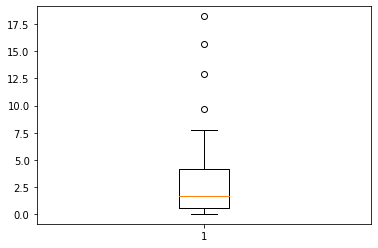

In [ ]:
plt.boxplot(l_avg_df_10['Monthly_avg_visits'])

In [ ]:
l_avg_df_10[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.000000,0.975869,1.000000
raw_visitor_counts,0.975869,1.000000,0.975869
Monthly_avg_visits,1.000000,0.975869,1.000000


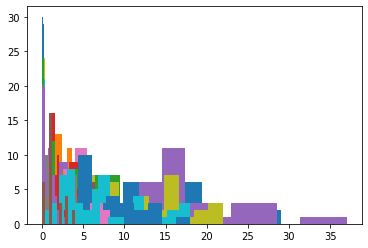

In [ ]:
for record in l_avg_df_10['visits_by_day']:
  plt.hist(record)

In [ ]:
l_pop_df_10 = L_GS_df_10[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
l_pop_df_10.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
9,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,"[0,0,0,0,0,1,1,1,1,3,3,5,6,6,7,4,11,11,4,5,4,2...","{""Monday"":9,""Tuesday"":5,""Wednesday"":7,""Thursda..."
21,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,"[1,0,0,0,0,0,0,0,0,3,3,2,8,7,6,5,4,7,8,5,5,6,1,1]","{""Monday"":12,""Tuesday"":3,""Wednesday"":6,""Thursd..."
39,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,"[6,8,8,7,7,5,5,9,14,19,20,24,26,24,23,21,21,16...","{""Monday"":11,""Tuesday"":20,""Wednesday"":14,""Thur..."
51,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,"[2,1,1,3,2,2,3,7,10,10,12,9,13,15,11,14,13,8,4...","{""Monday"":10,""Tuesday"":14,""Wednesday"":12,""Thur..."
63,CHAMPA FINE WINE & LIQUORS,1600 CHAMPA ST,LIQUOR - STORE,80202,CBD,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,"[2,0,0,0,0,0,0,0,4,4,6,8,9,8,12,10,11,7,3,2,2,...","{""Monday"":6,""Tuesday"":2,""Wednesday"":4,""Thursda..."


In [ ]:
l_pop_df_10['popularity_by_hour'] = l_pop_df_10['popularity_by_hour'].transform(lambda x: literal_eval(x))
l_pop_df_10['Monthly_avg_pop'] = l_pop_df_10['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = l_pop_df_10[l_pop_df_10['Monthly_avg_pop'] == max(l_pop_df_10['Monthly_avg_pop'])]
min_avg_pop = l_pop_df_10[l_pop_df_10['Monthly_avg_pop'] == min(l_pop_df_10['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

    BUS_PROF_NAME  ... Monthly_avg_pop
417   SKYE LIQUOR  ...       83.041667

[1 rows x 10 columns]
            BUS_PROF_NAME  ... Monthly_avg_pop
558            MONDO VINO  ...        0.041667
726  DENVER DRUG & LIQUOR  ...        0.041667

[2 rows x 10 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa8538ad710>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa8523032d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa853b4e890>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa852303810>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa8538ada50>,
  <matplotlib.lines.Line2D at 0x7fa867103e90>]}

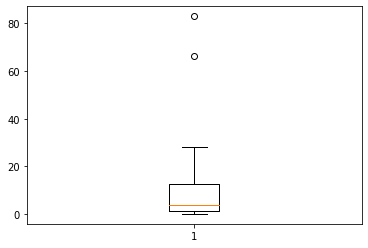

In [ ]:
plt.boxplot(l_pop_df_10['Monthly_avg_pop'])

(array([1., 0., 2., 3., 7., 3., 1., 1., 3., 3.]),
 array([ 58. ,  62.5,  67. ,  71.5,  76. ,  80.5,  85. ,  89.5,  94. ,
         98.5, 103. ]),
 <a list of 10 Patch objects>)

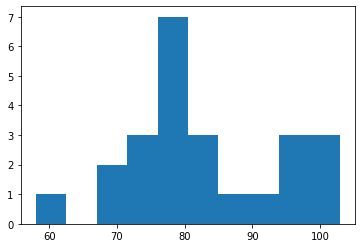

In [ ]:
plt.hist(l_pop_df_10[l_pop_df_10['BUS_PROF_NAME'] == 'SKYE LIQUOR']['popularity_by_hour'])

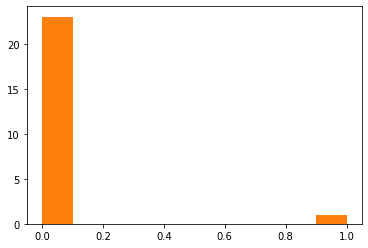

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)

### **November Analysis**

Visitor and Population Analysis

In [ ]:
L_GS_df_11.head()

,address_placekey,level_0,placekey,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD,region_x,safegraph_place_id,parent_placekey,parent_safegraph_place_id,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
10,22s@5q9-bqc-9cq,10,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,44,36,"[2,5,5,3,1,1,2,0,3,2,1,0,1,1,0,3,2,0,2,0,0,0,1...",80310003011,"{""080490002022"":4,""080050068151"":4}","{""080310040033"":5,""080310004025"":4,""0803100030...","{""US"":33}",14960.0,12.0,"{""<5"":2,""5-10"":17,""11-20"":6,""21-60"":9,""61-120""...","{""Chili's Grill & Bar"":33}","{""King Soopers"":30,""Starbucks"":26,""Walgreens"":...","[0,0,0,0,0,0,1,1,2,3,2,6,9,10,5,4,6,6,6,8,7,3,...","{""Monday"":5,""Tuesday"":2,""Wednesday"":4,""Thursda...","{""android"":13,""ios"":22}",11,12
22,223@5q9-bnr-cwk,22,223-222@5q9-bnr-cwk,2003-BFN-1006944,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-12-29 13:16:14,2022-01-21 00:00:00,Denver,CO,80204,3.0,1,00800,Sun Valley,C-MX-5,3133632.0,1695935.0,CO,sg:eadea8f88cae40b589592f25857e61af,NaN,NaN,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,44,41,"[0,1,2,8,1,0,1,1,0,1,0,0,0,0,3,2,0,0,3,0,1,2,0...",80310008001,"{""300039404001"":5,""080310005024"":4,""0800500495...","{""080050056114"":4,""260873300002"":4,""0811901010...","{""US"":40}",16705.0,10.0,"{""<5"":2,""5-10"":21,""11-20"":6,""21-60"":8,""61-120""...","{""Denny's"":100,""Family Dollar Stores"":49}","{""King Soopers"":44,""Walmart"":43,""McDonald's"":3...","[0,0,1,1,2,1,0,1,1,2,3,3,6,8,4,4,1,8,6,6,4,2,0,0]","{""Monday"":6,""Tuesday"":0,""Wednesday"":2,""Thursda...","{""android"":28,""ios"":12}",11,12
28,22v@5q9-bg4-99f,28,22v-222@5q9-bg4-99f,2010-BFN-1050830,LOWRY WINE AND SPIRTS,727 QUEBEC ST,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-07-23 14:04:20,2021-08-04 00:00:00,Denver,CO,80220,5.0,2,04304,Montclair,E-CC-3X,3167693.0,1690429.0,CO,sg:ee93eaa900ec4059aecc7fe56d2ee1f9,NaN,NaN,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,1,1,"[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0...",80310043042,{},{},{},NaN,20.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":0,""61-120"":...",{},"{""Goodwill Industries"":98}","[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":1,""Thursda...","{""android"":0,""ios"":0}",11,12
40,22k@5q9-bqm-rff,40,22k-222@5q9-bqm-rff,2002-BFN-100808,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-01-11 13:04:01,2021-12-11 00:00:00,Denver,CO,80203,10.0,6,02602,North Capitol Hill,C-MS-5,3146814.0,1695936.0,CO,sg:b885b0859e244c09bf8d93ed95335fb6,NaN,NaN,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,86,59,"[6,1,0,1,3,2,6,5,6,3,3,2,1,2,3,4,1,0,2,5,4,0,2...",80310026021,"{""080310041061"":7,""080590114021"":4,""0803100340...","{""080310014032"":5,""080050870002"":4,""0803100530...","{""US"":55}",10620.0,22.5,"{""<5"":1,""5-10"":22,""11-20"":17,""21-60"":22,""61-12...","{""Smiling Moose Deli"":33,""7-Eleven"":33,""Romant...","{""King Soopers"":44,""Starbucks"":40,""ConocoPhill...","[5,6,7,6,5,1,1,2,13,18,17,21,22,16,20,19,18,6,...","{""Monday"":10,""Tuesday"":11,""Wednesday"":16,""Thur...","{""android"":33,""ios"":28}",11,12
52,228@5q9-bqm-fzz,52,228-223@5q9-bqm-fzz,2013-BFN-1069498,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-06

In [ ]:
l_avg_df_11 = L_GS_df_11[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
l_avg_df_11.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
10,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,44,36,"[2,5,5,3,1,1,2,0,3,2,1,0,1,1,0,3,2,0,2,0,0,0,1..."
22,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,44,41,"[0,1,2,8,1,0,1,1,0,1,0,0,0,0,3,2,0,0,3,0,1,2,0..."
28,LOWRY WINE AND SPIRTS,727 QUEBEC ST,LIQUOR - STORE,80220,Montclair,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,1,1,"[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0..."
40,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,86,59,"[6,1,0,1,3,2,6,5,6,3,3,2,1,2,3,4,1,0,2,5,4,0,2..."
52,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,88,52,"[1,4,2,5,4,6,3,1,2,3,1,4,8,2,5,3,4,1,1,2,5,3,3..."


In [ ]:
from ast import literal_eval
l_avg_df_11['visits_by_day'] = l_avg_df_11['visits_by_day'].transform(lambda x: literal_eval(x))
l_avg_df_11['Monthly_avg_visits'] = l_avg_df_11['visits_by_day'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
max_avg = l_avg_df_11[l_avg_df_11['Monthly_avg_visits'] == max(l_avg_df_11['Monthly_avg_visits'])]
min_avg = l_avg_df_11[l_avg_df_11['Monthly_avg_visits'] == min(l_avg_df_11['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

    BUS_PROF_NAME  ... Monthly_avg_visits
418   SKYE LIQUOR  ...          17.933333

[1 rows x 11 columns]
             BUS_PROF_NAME  ... Monthly_avg_visits
28   LOWRY WINE AND SPIRTS  ...           0.033333
559             MONDO VINO  ...           0.033333
620          BAYON LIQUORS  ...           0.033333

[3 rows x 11 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa852996d10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa8667e3a10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa856a26710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa856a26810>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa8568e86d0>,
  <matplotlib.lines.Line2D at 0x7fa8568e8190>]}

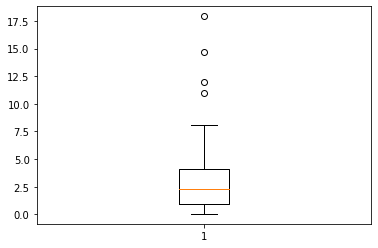

In [ ]:
plt.boxplot(l_avg_df_11['Monthly_avg_visits'])

In [ ]:
l_avg_df_11[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.000000,0.976304,1.000000
raw_visitor_counts,0.976304,1.000000,0.976304
Monthly_avg_visits,1.000000,0.976304,1.000000


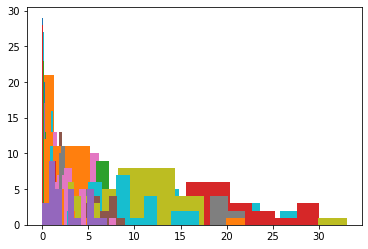

In [ ]:
for record in l_avg_df_11['visits_by_day']:
  plt.hist(record)

In [ ]:
l_pop_df_11 = L_GS_df_11[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
l_pop_df_11.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
10,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,"[0,0,0,0,0,0,1,1,2,3,2,6,9,10,5,4,6,6,6,8,7,3,...","{""Monday"":5,""Tuesday"":2,""Wednesday"":4,""Thursda..."
22,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,"[0,0,1,1,2,1,0,1,1,2,3,3,6,8,4,4,1,8,6,6,4,2,0,0]","{""Monday"":6,""Tuesday"":0,""Wednesday"":2,""Thursda..."
28,LOWRY WINE AND SPIRTS,727 QUEBEC ST,LIQUOR - STORE,80220,Montclair,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,"[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":1,""Thursda..."
40,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,"[5,6,7,6,5,1,1,2,13,18,17,21,22,16,20,19,18,6,...","{""Monday"":10,""Tuesday"":11,""Wednesday"":16,""Thur..."
52,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,"[1,1,1,1,1,1,4,8,6,6,12,11,11,15,18,17,16,11,8...","{""Monday"":9,""Tuesday"":19,""Wednesday"":14,""Thurs..."


In [ ]:
l_pop_df_11['popularity_by_hour'] = l_pop_df_11['popularity_by_hour'].transform(lambda x: literal_eval(x))
l_pop_df_11['Monthly_avg_pop'] = l_pop_df_11['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = l_pop_df_11[l_pop_df_11['Monthly_avg_pop'] == max(l_pop_df_11['Monthly_avg_pop'])]
min_avg_pop = l_pop_df_11[l_pop_df_11['Monthly_avg_pop'] == min(l_pop_df_11['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

    BUS_PROF_NAME  ... Monthly_avg_pop
418   SKYE LIQUOR  ...       84.041667

[1 rows x 10 columns]
             BUS_PROF_NAME  ... Monthly_avg_pop
28   LOWRY WINE AND SPIRTS  ...        0.041667
559             MONDO VINO  ...        0.041667

[2 rows x 10 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa8597ce610>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa865b88190>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa856033190>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa85fc20b90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa8563ba990>,
  <matplotlib.lines.Line2D at 0x7fa8563ba4d0>]}

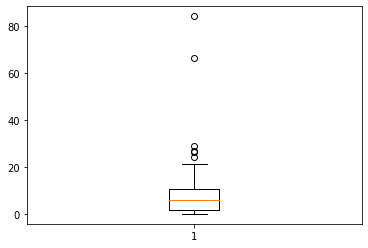

In [ ]:
plt.boxplot(l_pop_df_11['Monthly_avg_pop'])

(array([1., 2., 1., 1., 2., 7., 5., 0., 2., 3.]),
 array([ 54. ,  59.3,  64.6,  69.9,  75.2,  80.5,  85.8,  91.1,  96.4,
        101.7, 107. ]),
 <a list of 10 Patch objects>)

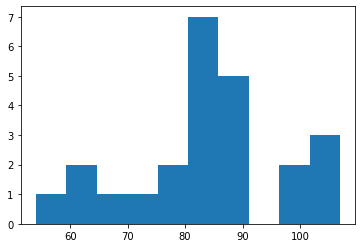

In [ ]:
plt.hist(l_pop_df_11[l_pop_df_11['BUS_PROF_NAME'] == 'SKYE LIQUOR']['popularity_by_hour'])

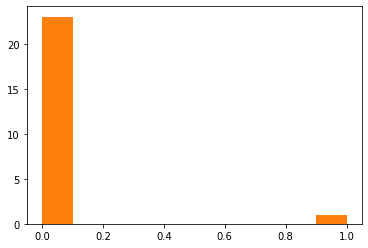

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)

### **December Analysis**

Visitor and Population

In [ ]:
L_GS_df_12.head()

,address_placekey,level_0,placekey,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD,region_x,safegraph_place_id,parent_placekey,parent_safegraph_place_id,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
11,22s@5q9-bqc-9cq,11,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,65,51,"[5,1,1,1,0,1,2,1,3,3,1,3,2,2,3,1,0,2,2,1,2,1,3...",80310003011,"{""060371288021"":5,""080310154004"":4,""0805901050...","{""080010092021"":5,""080310003011"":5,""0800100940...","{""US"":48}",10601.0,31.0,"{""<5"":0,""5-10"":16,""11-20"":4,""21-60"":33,""61-120...","{""Black-eyed Pea"":100,""REI"":75,""ConocoPhillips...","{""King Soopers"":43,""Starbucks"":41,""Target"":38,...","[0,0,0,0,0,0,0,1,2,6,8,9,17,16,8,11,10,6,13,14...","{""Monday"":8,""Tuesday"":4,""Wednesday"":9,""Thursda...","{""android"":11,""ios"":39}",12,1
23,223@5q9-bnr-cwk,23,223-222@5q9-bnr-cwk,2003-BFN-1006944,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-12-29 13:16:14,2022-01-21 00:00:00,Denver,CO,80204,3.0,1,00800,Sun Valley,C-MX-5,3133632.0,1695935.0,CO,sg:eadea8f88cae40b589592f25857e61af,NaN,NaN,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,65,53,"[1,1,0,2,1,3,4,2,1,2,3,1,2,3,8,1,0,0,2,1,2,1,1...",80310008001,"{""080130128003"":7,""081170002004"":5,""0803100060...","{""080130128003"":6,""080310017012"":5,""0803100060...","{""US"":54}",12556.0,10.0,"{""<5"":2,""5-10"":34,""11-20"":10,""21-60"":7,""61-120...","{""Domino's Pizza"":50}","{""King Soopers"":41,""Starbucks"":39,""Walmart"":35...","[2,1,1,0,0,0,0,0,1,8,13,10,7,6,3,5,8,10,4,4,7,...","{""Monday"":4,""Tuesday"":5,""Wednesday"":4,""Thursda...","{""android"":24,""ios"":27}",12,1
29,22v@5q9-bg4-99f,29,22v-222@5q9-bg4-99f,2010-BFN-1050830,LOWRY WINE AND SPIRTS,727 QUEBEC ST,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2020-07-23 14:04:20,2021-08-04 00:00:00,Denver,CO,80220,5.0,2,04304,Montclair,E-CC-3X,3167693.0,1690429.0,CO,sg:ee93eaa900ec4059aecc7fe56d2ee1f9,NaN,NaN,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,2,2,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0...",80310043042,"{""080310043034"":4}","{""080310043034"":4}",{},NaN,29.0,"{""<5"":0,""5-10"":1,""11-20"":0,""21-60"":1,""61-120"":...",{},"{""ConocoPhillips"":49,""Costco Wholesale Corp."":47}","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":1,""Thursda...","{""android"":4,""ios"":0}",12,1
41,22k@5q9-bqm-rff,41,22k-222@5q9-bqm-rff,2002-BFN-100808,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-01-11 13:04:01,2021-12-11 00:00:00,Denver,CO,80203,10.0,6,02602,North Capitol Hill,C-MS-5,3146814.0,1695936.0,CO,sg:b885b0859e244c09bf8d93ed95335fb6,NaN,NaN,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,91,72,"[4,1,2,6,0,2,0,3,2,5,2,2,3,7,3,5,2,2,2,4,7,4,0...",80310026021,"{""080310050012"":5,""080310036032"":4,""0803100270...","{""080350142032"":5,""080310026011"":4,""0803100240...","{""US"":72}",9577.0,18.0,"{""<5"":1,""5-10"":21,""11-20"":28,""21-60"":23,""61-12...","{""Good Times Burgers and Frozen Custard"":50,""7...","{""Starbucks"":42,""King Soopers"":33,""ConocoPhill...","[3,3,2,2,2,3,3,4,3,8,8,6,17,19,15,12,10,7,16,1...","{""Monday"":18,""Tuesday"":11,""Wednesday"":10,""Thur...","{""android"":38,""ios"":33}",12,1
53,228@5q9-bqm-fzz,53,228-223@5q9-bqm-fzz,2013-BFN-1069498,UPTOWN WINES BEER & 

In [ ]:
l_avg_df_12 = L_GS_df_12[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
l_avg_df_12.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
11,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,65,51,"[5,1,1,1,0,1,2,1,3,3,1,3,2,2,3,1,0,2,2,1,2,1,3..."
23,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,65,53,"[1,1,0,2,1,3,4,2,1,2,3,1,2,3,8,1,0,0,2,1,2,1,1..."
29,LOWRY WINE AND SPIRTS,727 QUEBEC ST,LIQUOR - STORE,80220,Montclair,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,2,2,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0..."
41,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,91,72,"[4,1,2,6,0,2,0,3,2,5,2,2,3,7,3,5,2,2,2,4,7,4,0..."
53,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,79,53,"[3,3,1,3,0,3,5,4,3,1,3,1,3,6,4,1,6,1,4,2,2,2,1..."


In [ ]:
from ast import literal_eval
l_avg_df_12['visits_by_day'] = l_avg_df_12['visits_by_day'].transform(lambda x: literal_eval(x))
l_avg_df_12['Monthly_avg_visits'] = l_avg_df_12['visits_by_day'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
max_avg = l_avg_df_12[l_avg_df_12['Monthly_avg_visits'] == max(l_avg_df_12['Monthly_avg_visits'])]
min_avg = l_avg_df_12[l_avg_df_12['Monthly_avg_visits'] == min(l_avg_df_12['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

    BUS_PROF_NAME  ... Monthly_avg_visits
419   SKYE LIQUOR  ...          20.580645

[1 rows x 11 columns]
                BUS_PROF_NAME  ... Monthly_avg_visits
134           RAINBOW LIQUORS  ...           0.032258
529        BOOTLEGGER LIQUORS  ...           0.032258
560                MONDO VINO  ...           0.032258
778  FEDERAL DISCOUNT LIQUORS  ...           0.032258

[4 rows x 11 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa855f74350>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa85c6dfbd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa8670e7250>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa8670e7110>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa855f74dd0>,
  <matplotlib.lines.Line2D at 0x7fa85c6dfd90>]}

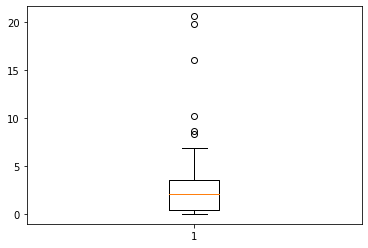

In [ ]:
plt.boxplot(l_avg_df_12['Monthly_avg_visits'])

In [ ]:
l_avg_df_12[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.000000,0.954117,1.000000
raw_visitor_counts,0.954117,1.000000,0.954117
Monthly_avg_visits,1.000000,0.954117,1.000000


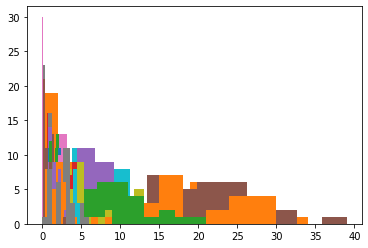

In [ ]:
for record in l_avg_df_12['visits_by_day']:
  plt.hist(record)

In [ ]:
l_pop_df_12 = L_GS_df_12[['BUS_PROF_NAME','FULL_ADDRESS','LICENSES','ZIP','NEIGHBORHOOD','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
l_pop_df_12.head()

,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,ZIP,NEIGHBORHOOD,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
11,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,80211,Berkeley,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,"[0,0,0,0,0,0,0,1,2,6,8,9,17,16,8,11,10,6,13,14...","{""Monday"":8,""Tuesday"":4,""Wednesday"":9,""Thursda..."
23,MILE HIGH LIQUORS,1648 N FEDERAL BLVD,LIQUOR - STORE,80204,Sun Valley,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,"[2,1,1,0,0,0,0,0,1,8,13,10,7,6,3,5,8,10,4,4,7,...","{""Monday"":4,""Tuesday"":5,""Wednesday"":4,""Thursda..."
29,LOWRY WINE AND SPIRTS,727 QUEBEC ST,LIQUOR - STORE,80220,Montclair,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":1,""Thursda..."
41,MARCZYK FINE WINES,770 E 17TH AVE,LIQUOR - STORE,80203,North Capitol Hill,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,"[3,3,2,2,2,3,3,4,3,8,8,6,17,19,15,12,10,7,16,1...","{""Monday"":18,""Tuesday"":11,""Wednesday"":10,""Thur..."
53,UPTOWN WINES BEER & SPIRITS,1936 PENNSYLVANIA ST,LIQUOR - STORE,80203,North Capitol Hill,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,"[7,8,8,7,7,7,6,8,9,7,9,14,13,13,11,12,9,10,11,...","{""Monday"":12,""Tuesday"":10,""Wednesday"":7,""Thurs..."


In [ ]:
l_pop_df_12['popularity_by_hour'] = l_pop_df_12['popularity_by_hour'].transform(lambda x: literal_eval(x))
l_pop_df_12['Monthly_avg_pop'] = l_pop_df_12['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = l_pop_df_12[l_pop_df_12['Monthly_avg_pop'] == max(l_pop_df_12['Monthly_avg_pop'])]
min_avg_pop = l_pop_df_12[l_pop_df_12['Monthly_avg_pop'] == min(l_pop_df_12['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

      BUS_PROF_NAME  ... Monthly_avg_pop
371  STATION LIQUOR  ...           100.0

[1 rows x 10 columns]
                BUS_PROF_NAME  ... Monthly_avg_pop
134           RAINBOW LIQUORS  ...        0.041667
529        BOOTLEGGER LIQUORS  ...        0.041667
560                MONDO VINO  ...        0.041667
778  FEDERAL DISCOUNT LIQUORS  ...        0.041667

[4 rows x 10 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa85301de90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa8580b80d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa856d1d250>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa85b893850>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa863ed87d0>,
  <matplotlib.lines.Line2D at 0x7fa85311c450>]}

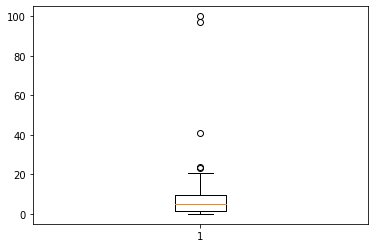

In [ ]:
plt.boxplot(l_pop_df_12['Monthly_avg_pop'])

(array([6., 1., 2., 1., 1., 3., 1., 2., 5., 2.]),
 array([ 68. ,  74.1,  80.2,  86.3,  92.4,  98.5, 104.6, 110.7, 116.8,
        122.9, 129. ]),
 <a list of 10 Patch objects>)

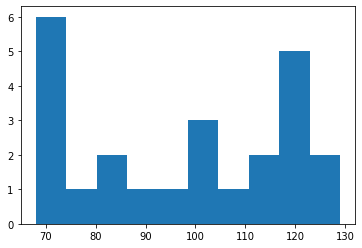

In [ ]:
plt.hist(l_pop_df_12[l_pop_df_12['BUS_PROF_NAME'] == 'SKYE LIQUOR']['popularity_by_hour'])

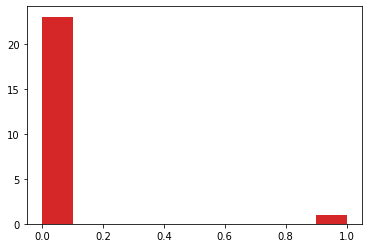

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)

### Seasonal Analysis (Visitor and Popularity Analysis Based on Seasons)

In [ ]:
Season_Df = pd.DataFrame(data = {'Monthly_avg_visits': [17.483871,21.464286,19.387097,24.666667,24.354839,23.066667,21.258065,19.225806,21.2,18.225806,17.933333,20.580645]
                          ,'Monthly_avg_pop': [94.541667,118.208333,77.958333,110.0,101.875,102.541667,89.541667,77.25,96.416667,83.041667,84.041667,100.0],
                          'Season': ['Winter','Winter','Spring','Spring','Spring','Summer','Summer','Summer','Fall','Fall','Fall','Winter']})
Season_Df.head()

,Monthly_avg_visits,Monthly_avg_pop,Season
0,17.483871,94.541667,Winter
1,21.464286,118.208333,Winter
2,19.387097,77.958333,Spring
3,24.666667,110.000000,Spring
4,24.354839,101.875000,Spring


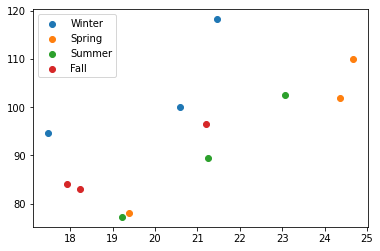

In [ ]:
winter = Season_Df[Season_Df['Season'] == 'Winter'].dropna()
spring = Season_Df[Season_Df['Season'] == 'Spring'].dropna()
fall = Season_Df[Season_Df['Season'] == 'Summer'].dropna()
summer = Season_Df[Season_Df['Season'] == 'Fall'].dropna()

fig, ax = plt.subplots()
a = plt.scatter(winter['Monthly_avg_visits'], winter['Monthly_avg_pop'])
b = plt.scatter(spring['Monthly_avg_visits'], spring['Monthly_avg_pop'])
c = plt.scatter(fall['Monthly_avg_visits'], fall['Monthly_avg_pop'])
d = plt.scatter(summer['Monthly_avg_visits'], summer['Monthly_avg_pop'])
ax.legend([a, b, c, d], ['Winter', 'Spring', 'Summer', 'Fall'])

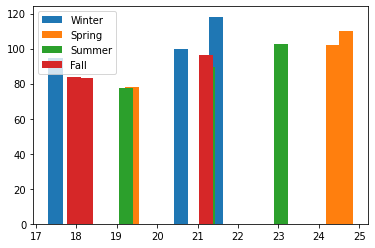

In [ ]:
fig, ax = plt.subplots()
a = plt.bar(winter['Monthly_avg_visits'], winter['Monthly_avg_pop'], width= .35)
b = plt.bar(spring['Monthly_avg_visits'], spring['Monthly_avg_pop'], width= .35)
c = plt.bar(fall['Monthly_avg_visits'], fall['Monthly_avg_pop'], width= .35)
d = plt.bar(summer['Monthly_avg_visits'], summer['Monthly_avg_pop'], width= .35)
ax.legend([a, b, c, d], ['Winter', 'Spring', 'Summer', 'Fall'])

In [ ]:
from ast import literal_eval
def season_func(month):
  if(month == 1 or month ==2 or month == 12):
    return 'Winter'
  elif(month == 3 or month == 4 or month == 5):
    return 'Spring'
  elif(month == 6 or month == 7 or month == 8):
    return 'Summer'
  elif(month == 9 or month == 10 or month == 11):
    return 'Fall'

liquor_GS_df['Season'] = liquor_GS_df['month_start'].transform(lambda x: season_func(x))

liquor_GS_df['popularity_by_hour'] = liquor_GS_df['popularity_by_hour'].transform(lambda x: literal_eval(x))
liquor_GS_df['Avg_pop'] = liquor_GS_df['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

liquor_GS_df['visits_by_day'] = liquor_GS_df['visits_by_day'].transform(lambda x: literal_eval(x))
liquor_GS_df['Avg_visits'] = liquor_GS_df['visits_by_day'].transform(lambda x: sum(x)/len(x))
liquor_GS_df.head(2)

,address_placekey,level_0,placekey,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD,region_x,safegraph_place_id,parent_placekey,parent_safegraph_place_id,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end,Season,Avg_pop,Avg_visits
0,22s@5q9-bqc-9cq,0,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,27,20,"[1, 0, 0, 1, 0, 1, 3, 1, 0, 0, 2, 6, 0, 0, 1, ...",80310003011,"{""080310003011"":4,""080050071043"":4,""0811700040...","{""080310003034"":4,""080590118042"":4,""0811700040...","{""US"":20}",13531.0,16.0,"{""<5"":2,""5-10"":9,""11-20"":8,""21-60"":6,""61-120"":...","{""Taco Bell"":49}","{""King Soopers"":60,""Starbucks"":56,""McDonald's""...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 6, 5, 2, 2, ...","{""Monday"":3,""Tuesday"":1,""Wednesday"":3,""Thursda...","{""android"":7,""ios"":9}",1,2,Winter,1.541667,0.870968
1,22s@5q9-bqc-9cq,1,22s-223@5q9-bqc-9cq,2013-BFN-1067236,CANA WINE AND LIQUORS,3165 W 38TH,LIQUOR - STORE,LICENSE ISSUED - ACTIVE,2021-02-17 15:28:53.000001,2022-02-22 00:00:00,Denver,CO,80211,1.0,1,00301,Berkeley,U-MS-3,3132349.0,1705577.0,CO,sg:e4635ddbd24c4601b663db8c5312e404,NaN,NaN,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,47,20,"[2, 1, 3, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 0, 4, ...",80310003011,"{""080310003011"":4,""080350139013"":4,""0800100932...","{""080310083892"":4,""080010085503"":4,""0805900984...","{""US"":18}",15227.0,24.0,"{""<5"":1,""5-10"":11,""11-20"":10,""21-60"":10,""61-12...","{""Walmart"":94,""Costco Wholesale Corp."":50}","{""ConocoPhillips"":39,""King Soopers"":35,""CrossF...","[0, 0, 0, 0, 0, 1, 1, 2, 2, 3, 5, 6, 7, 10, 10...","{""Monday"":7,""Tuesday"":6,""Wednesday"":4,""Thursda...","{""android"":5,""ios"":9}",2,3,Winter,3.708333,1.678571


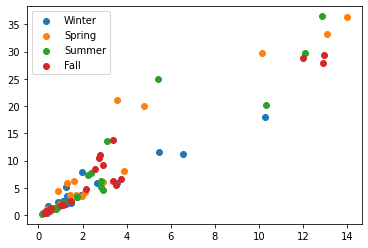

In [ ]:
winter = liquor_GS_df[liquor_GS_df['Season'] == 'Winter'].dropna()
spring = liquor_GS_df[liquor_GS_df['Season'] == 'Spring'].dropna()
fall = liquor_GS_df[liquor_GS_df['Season'] == 'Summer'].dropna()
summer = liquor_GS_df[liquor_GS_df['Season'] == 'Fall'].dropna()

fig, ax = plt.subplots()
a = plt.scatter(winter['Avg_visits'], winter['Avg_pop'])
b = plt.scatter(spring['Avg_visits'], spring['Avg_pop'])
c = plt.scatter(fall['Avg_visits'], fall['Avg_pop'])
d = plt.scatter(summer['Avg_visits'], summer['Avg_pop'])

ax.legend([a, b, c, d], ['Winter', 'Spring', 'Summer', 'Fall'])

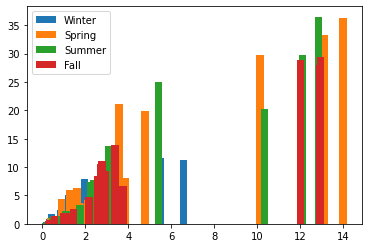

In [ ]:
fig, ax = plt.subplots()
a = plt.bar(winter['Avg_visits'], winter['Avg_pop'], width= .35)
b = plt.bar(spring['Avg_visits'], spring['Avg_pop'], width= .35)
c = plt.bar(fall['Avg_visits'], fall['Avg_pop'], width= .35)
d = plt.bar(summer['Avg_visits'], summer['Avg_pop'], width= .35)
ax.legend([a, b, c, d], ['Winter', 'Spring', 'Summer', 'Fall'])

In [ ]:
import findspark
findspark.init('/content/spark-3.1.1-bin-hadoop2.7')
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
from pyspark.sql.functions import from_json,expr
from pyspark.sql.types import StructType, StructField, StringType, ArrayType, IntegerType

day_schema = StructType(
    [
      StructField('Monday', IntegerType(),True),
      StructField('Tuesday', IntegerType(),True),
      StructField('Wednesday', IntegerType(),True),
      StructField('Thursday', IntegerType(),True),
      StructField('Friday', IntegerType(),True),
      StructField('Saturday', IntegerType(),True),
      StructField('Sunday', IntegerType(),True)
    ]
)
liquor_GS_df = liquor_GS_df.drop(['parent_placekey', 'parent_safegraph_place_id', 'visitor_country_of_origin'], axis = 1)
liquor_GS_df = spark.createDataFrame(liquor_GS_df)
liquor_GS_exploded = liquor_GS_df.withColumn('popularity_by_day', from_json('popularity_by_day', day_schema)).select('BUS_PROF_NAME','raw_visit_counts','raw_visitor_counts','visits_by_day',
          'distance_from_home','median_dwell',
          'bucketed_dwell_times','popularity_by_hour','popularity_by_day.*',
          'device_type','Season', 'Avg_pop','Avg_visits')

In [ ]:
liquor_GS_exploded = liquor_GS_exploded.toPandas()
liquor_GS_exploded.head()

,BUS_PROF_NAME,raw_visit_counts,raw_visitor_counts,visits_by_day,distance_from_home,median_dwell,bucketed_dwell_times,popularity_by_hour,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,device_type,Season,Avg_pop,Avg_visits
0,CANA WINE AND LIQUORS,27,20,"[1, 0, 0, 1, 0, 1, 3, 1, 0, 0, 2, 6, 0, 0, 1, ...",13531.0,16.0,"{""<5"":2,""5-10"":9,""11-20"":8,""21-60"":6,""61-120"":...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 6, 5, 2, 2, ...",3,1,3,4,8,5,3,"{""android"":7,""ios"":9}",Winter,1.541667,0.870968
1,CANA WINE AND LIQUORS,47,20,"[2, 1, 3, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 0, 4, ...",15227.0,24.0,"{""<5"":1,""5-10"":11,""11-20"":10,""21-60"":10,""61-12...","[0, 0, 0, 0, 0, 1, 1, 2, 2, 3, 5, 6, 7, 10, 10...",7,6,4,10,6,11,3,"{""android"":5,""ios"":9}",Winter,3.708333,1.678571
2,CANA WINE AND LIQUORS,64,34,"[2, 2, 3, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 0, ...",18367.0,18.0,"{""<5"":1,""5-10"":19,""11-20"":14,""21-60"":14,""61-12...","[0, 0, 0, 0, 0, 0, 0, 0, 2, 10, 9, 8, 12, 14, ...",9,5,6,12,10,12,10,"{""android"":11,""ios"":24}",Spring,5.250000,2.064516
3,CANA WINE AND LIQUORS,37,32,"[0, 2, 1, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 3, 1, ...",15227.0,28.0,"{""<5"":1,""5-10"":4,""11-20"":8,""21-60"":17,""61-120""...","[0, 0, 0, 0, 0, 1, 1, 2, 2, 6, 5, 7, 7, 8, 9, ...",3,6,1,6,4,9,8,"{""android"":9,""ios"":21}",Spring,3.250000,1.233333
4,CANA WINE AND LIQUORS,61,43,"[2, 2, 2, 2, 4, 0, 2, 2, 2, 2, 1, 4, 2, 2, 2, ...",9792.0,21.0,"{""<5"":0,""5-10"":16,""11-20"":12,""21-60"":16,""61-12...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 7, 7, 13, 16, 10, ...",7,9,9,8,8,10,10,"{""android"":14,""ios"":27}",Spring,5.375000,1.967742


In [ ]:
winter = liquor_GS_exploded[liquor_GS_exploded['Season'] == 'Winter'].dropna()
spring = liquor_GS_exploded[liquor_GS_exploded['Season'] == 'Spring'].dropna()
fall = liquor_GS_exploded[liquor_GS_exploded['Season'] == 'Summer'].dropna()
summer = liquor_GS_exploded[liquor_GS_exploded['Season'] == 'Fall'].dropna()

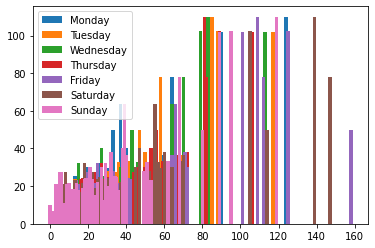

In [ ]:
fig, ax = plt.subplots()
a = plt.bar(spring['Monday'], spring['Avg_pop'], width= 1.85)
b = plt.bar(spring['Tuesday'], spring['Avg_pop'], width= 1.85)
c = plt.bar(spring['Wednesday'], spring['Avg_pop'], width= 1.85)
d = plt.bar(spring['Thursday'], spring['Avg_pop'], width= 1.85)
e = plt.bar(spring['Friday'], spring['Avg_pop'], width= 1.85)
f = plt.bar(spring['Saturday'], spring['Avg_pop'], width= 1.85)
g = plt.bar(spring['Sunday'], spring['Avg_pop'], width= 1.85)
ax.legend([a, b, c, d,e,f,g], ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])

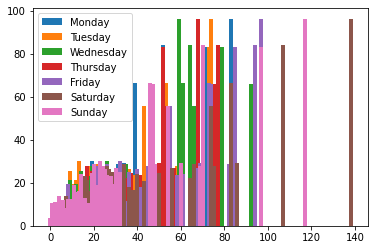

In [ ]:
fig, ax = plt.subplots()
a = plt.bar(summer['Monday'], summer['Avg_pop'], width= 1.85)
b = plt.bar(summer['Tuesday'], summer['Avg_pop'], width= 1.85)
c = plt.bar(summer['Wednesday'], summer['Avg_pop'], width= 1.85)
d = plt.bar(summer['Thursday'], summer['Avg_pop'], width= 1.85)
e = plt.bar(summer['Friday'], summer['Avg_pop'], width= 1.85)
f = plt.bar(summer['Saturday'], summer['Avg_pop'], width= 1.85)
g = plt.bar(summer['Sunday'], summer['Avg_pop'], width= 1.85)
ax.legend([a, b, c, d,e,f,g], ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])

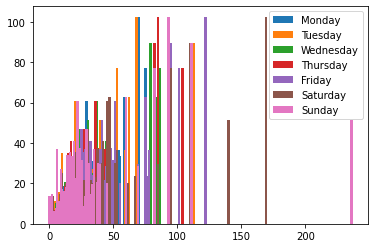

In [ ]:
fig, ax = plt.subplots()
a = plt.bar(fall['Monday'], fall['Avg_pop'], width= 1.85)
b = plt.bar(fall['Tuesday'], fall['Avg_pop'], width= 1.85)
c = plt.bar(fall['Wednesday'], fall['Avg_pop'], width= 1.85)
d = plt.bar(fall['Thursday'], fall['Avg_pop'], width= 1.85)
e = plt.bar(fall['Friday'], fall['Avg_pop'], width= 1.85)
f = plt.bar(fall['Saturday'], fall['Avg_pop'], width= 1.85)
g = plt.bar(fall['Sunday'], fall['Avg_pop'], width= 1.85)
ax.legend([a, b, c, d,e,f,g], ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])

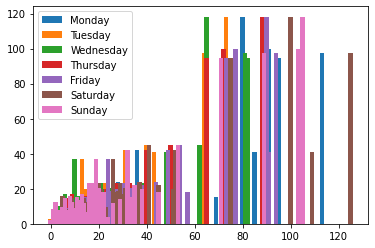

In [ ]:
fig, ax = plt.subplots()
a = plt.bar(winter['Monday'], winter['Avg_pop'], width= 1.85)
b = plt.bar(winter['Tuesday'], winter['Avg_pop'], width= 1.85)
c = plt.bar(winter['Wednesday'], winter['Avg_pop'], width= 1.85)
d = plt.bar(winter['Thursday'], winter['Avg_pop'], width= 1.85)
e = plt.bar(winter['Friday'], winter['Avg_pop'], width= 1.85)
f = plt.bar(winter['Saturday'], winter['Avg_pop'], width= 1.85)
g = plt.bar(winter['Sunday'], winter['Avg_pop'], width= 1.85)
ax.legend([a, b, c, d,e,f,g], ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])

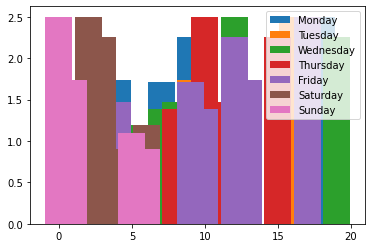

In [ ]:
fig, ax = plt.subplots()
a = plt.bar(spring['Monday'], spring['Avg_visits'], width= 1.85)
b = plt.bar(spring['Tuesday'], spring['Avg_visits'], width= 1.85)
c = plt.bar(spring['Wednesday'], spring['Avg_visits'], width= 1.85)
d = plt.bar(spring['Thursday'], spring['Avg_visits'], width= 1.85)
e = plt.bar(spring['Friday'], spring['Avg_visits'], width= 1.85)
f = plt.bar(spring['Saturday'], spring['Avg_visits'], width= 1.85)
g = plt.bar(spring['Sunday'], spring['Avg_visits'], width= 1.85)
ax.legend([a, b, c, d,e,f,g], ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])

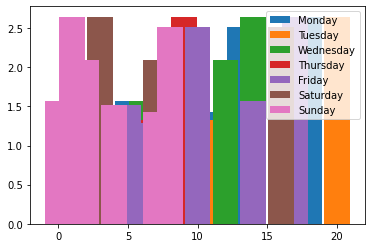

In [ ]:
fig, ax = plt.subplots()
a = plt.bar(winter['Monday'], winter['Avg_visits'], width= 1.85)
b = plt.bar(winter['Tuesday'], winter['Avg_visits'], width= 1.85)
c = plt.bar(winter['Wednesday'], winter['Avg_visits'], width= 1.85)
d = plt.bar(winter['Thursday'], winter['Avg_visits'], width= 1.85)
e = plt.bar(winter['Friday'], winter['Avg_visits'], width= 1.85)
f = plt.bar(winter['Saturday'], winter['Avg_visits'], width= 1.85)
g = plt.bar(winter['Sunday'], winter['Avg_visits'], width= 1.85)
ax.legend([a, b, c, d,e,f,g], ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])

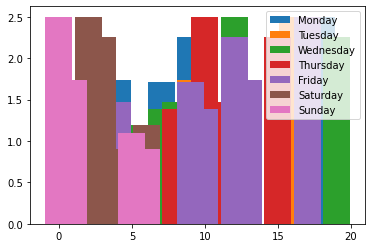

In [ ]:
fig, ax = plt.subplots()
a = plt.bar(spring['Monday'], spring['Avg_visits'], width= 1.85)
b = plt.bar(spring['Tuesday'], spring['Avg_visits'], width= 1.85)
c = plt.bar(spring['Wednesday'], spring['Avg_visits'], width= 1.85)
d = plt.bar(spring['Thursday'], spring['Avg_visits'], width= 1.85)
e = plt.bar(spring['Friday'], spring['Avg_visits'], width= 1.85)
f = plt.bar(spring['Saturday'], spring['Avg_visits'], width= 1.85)
g = plt.bar(spring['Sunday'], spring['Avg_visits'], width= 1.85)
ax.legend([a, b, c, d,e,f,g], ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])

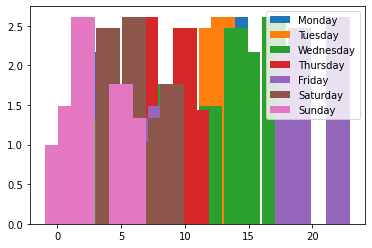

In [ ]:
fig, ax = plt.subplots()
a = plt.bar(summer['Monday'], summer['Avg_visits'], width= 1.85)
b = plt.bar(summer['Tuesday'], summer['Avg_visits'], width= 1.85)
c = plt.bar(summer['Wednesday'], summer['Avg_visits'], width= 1.85)
d = plt.bar(summer['Thursday'], summer['Avg_visits'], width= 1.85)
e = plt.bar(summer['Friday'], summer['Avg_visits'], width= 1.85)
f = plt.bar(summer['Saturday'], summer['Avg_visits'], width= 1.85)
g = plt.bar(summer['Sunday'], summer['Avg_visits'], width= 1.85)
ax.legend([a, b, c, d,e,f,g], ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])

### Conclusion 

From This analysis we are able to see several trends. In terms of visitors SKYE LIQUORS has the most visitors in the months of April, May, June, February, and July. This is understandable because these months correlate with the months in which there are major holidays such as Memorial Day, Fathers Day, Valentines day, and the Fourth of July. This is however a little interesting and not what I expected. The major holidays that most people would associate with Alcohol consumption are Saint Patricks Day (March), Thanksgiving (November), Christmas (December). Thus not seeing any of these months on the top 5 list is very surprising. I believe that this is becuase these holidays were not enough to offset the overall average. The trend instead shows that as the year progresses into the Spring and Summer months, alcohol consumption increases.  

When looking at the popularity of Denver Liquor store data, SKYE LIQOURS tends to be the most popular store for all months except for December. In December the most popular liquor store was Station liquor. This change may have been due to more visitors to Station Liqour during the holiday season which upturned the popularity of SKYE LIQOURS at this time. The trend of liqour store popularity seems to follow the trend of liqor store average monthly visits; as the year progresses and the Spring and Summer months arrive the overall popularity of Liqour stores in Denver seems to increase.



## Dispensary Geospatial data analysis

Visitors and Population analysis for the entire 2018 dataset

Now we can analyze the dispensary data 

In [ ]:
df.head(2)

,address_placekey,level_0,placekey,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Facility Street Number,Facility Pre-Direction,Facility Street Name,Facility Street Type,Facility Unit Number,Facility City,Facility Zip Code,Address,region_x,safegraph_place_id,parent_placekey,parent_safegraph_place_id,location_name,street_address,city,region_y,postal_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,224@5q9-bp6-28v,0,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325,S,INCA,ST,A,DENVER,80223.0,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,NaN,NaN,Bud Bums,1325 S Inca St,Denver,CO,80223,NaN,NaN,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,41,10,"[0,1,0,1,2,1,0,3,3,4,1,1,1,0,0,3,0,1,4,0,0,1,1...",80310014011,"{""080050835003"":4,""080590101003"":4,""0805901205...","{""080310014011"":4,""080310003022"":4}","{""US"":9}",11833.0,85.0,"{""<5"":0,""5-10"":1,""11-20"":2,""21-60"":10,""61-120""...","{""REI"":33}","{""King Soopers"":60,""Sprouts Farmers Market"":40...","[0,0,0,0,0,0,1,2,21,33,30,24,15,7,4,1,0,0,0,0,...","{""Monday"":6,""Tuesday"":11,""Wednesday"":8,""Thursd...","{""android"":4,""ios"":10}"
1,224@5q9-bp6-28v,1,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325,S,INCA,ST,A,DENVER,80223.0,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,NaN,NaN,Bud Bums,1325 S Inca St,Denver,CO,80223,NaN,NaN,2018-02-01T00:00:00-07:00,2018-03-01T00:00:00-07:00,36,7,"[0,0,0,0,1,2,2,0,1,0,0,3,3,3,2,3,0,0,1,3,1,4,2...",80310014011,"{""080050835003"":4,""080410073002"":4,""0803100030...",{},"{""US"":8}",13831.0,156.5,"{""<5"":0,""5-10"":5,""11-20"":3,""21-60"":3,""61-120"":...","{""Chase"":50,""Starbucks"":31}","{""Starbucks"":76,""McDonald's"":43,""King Soopers""...","[0,0,0,0,0,0,3,4,20,31,28,23,14,9,8,5,2,0,0,0,...","{""Monday"":6,""Tuesday"":10,""Wednesday"":8,""Thursd...","{""android"":4,""ios"":4}"


In [ ]:
dispo_GS_df = df
dispo_GS_df.head()

,address_placekey,level_0,placekey,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Facility Street Number,Facility Pre-Direction,Facility Street Name,Facility Street Type,Facility Unit Number,Facility City,Facility Zip Code,Address,region_x,safegraph_place_id,parent_placekey,parent_safegraph_place_id,location_name,street_address,city,region_y,postal_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,224@5q9-bp6-28v,0,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325,S,INCA,ST,A,DENVER,80223.0,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,NaN,NaN,Bud Bums,1325 S Inca St,Denver,CO,80223,NaN,NaN,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,41,10,"[0,1,0,1,2,1,0,3,3,4,1,1,1,0,0,3,0,1,4,0,0,1,1...",80310014011,"{""080050835003"":4,""080590101003"":4,""0805901205...","{""080310014011"":4,""080310003022"":4}","{""US"":9}",11833.0,85.0,"{""<5"":0,""5-10"":1,""11-20"":2,""21-60"":10,""61-120""...","{""REI"":33}","{""King Soopers"":60,""Sprouts Farmers Market"":40...","[0,0,0,0,0,0,1,2,21,33,30,24,15,7,4,1,0,0,0,0,...","{""Monday"":6,""Tuesday"":11,""Wednesday"":8,""Thursd...","{""android"":4,""ios"":10}"
1,224@5q9-bp6-28v,1,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325,S,INCA,ST,A,DENVER,80223.0,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,NaN,NaN,Bud Bums,1325 S Inca St,Denver,CO,80223,NaN,NaN,2018-02-01T00:00:00-07:00,2018-03-01T00:00:00-07:00,36,7,"[0,0,0,0,1,2,2,0,1,0,0,3,3,3,2,3,0,0,1,3,1,4,2...",80310014011,"{""080050835003"":4,""080410073002"":4,""0803100030...",{},"{""US"":8}",13831.0,156.5,"{""<5"":0,""5-10"":5,""11-20"":3,""21-60"":3,""61-120"":...","{""Chase"":50,""Starbucks"":31}","{""Starbucks"":76,""McDonald's"":43,""King Soopers""...","[0,0,0,0,0,0,3,4,20,31,28,23,14,9,8,5,2,0,0,0,...","{""Monday"":6,""Tuesday"":10,""Wednesday"":8,""Thursd...","{""android"":4,""ios"":4}"
2,224@5q9-bp6-28v,2,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325,S,INCA,ST,A,DENVER,80223.0,1325 INCA ST,CO,sg:4c2f25899b264b9285d61cc132e7e479,NaN,NaN,Amsterdam Cafe,1325 S Inca St,Denver,CO,80223,NaN,NaN,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,2,2,"[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0...",80310014011,"{""080310006002"":4}","{""080310046031"":4}","{""US"":4}",NaN,25.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":1,""61-120"":...",{},"{""Tuesday Morning"":50,""AutoZone"":49,""Sam's Clu...","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0]","{""Monday"":1,""Tuesday"":0,""Wednesday"":0,""Thursda...","{""android"":0,""ios"":5}"
3,224@5q9-bp6-28v,3,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325,S,INCA,ST,A,DENVER,80223.0,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,NaN,NaN,Bud Bums,1325 S Inca St,Denver,CO,80223,NaN,NaN,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,43,11,"[3,1,0,0,3,1,2,2,3,0,0,2,2,2,0,2,0,0,2,2,1,2,4...",80310014011,"{""080350141122"":4}","{""080310003022"":4}","{""US"":11}",13831.0,85.0,"{""<5"":1,""5-10"":8,""11-20"":6,""21-60"":4,""61-120"":...","{""SCP Distributors"":50,""Grainger"":50,""KFC"":50}","{""King Soopers"":45,""7-Eleven"":43,""Chipotle Mex...","[1,0,0,0,0,0,0,2,21,31,23,22,14,5,4,1,1,0,0,0,...","{""Monday"":9,""Tuesday"":9,""Wednesday"":7,""Thursda...","{""android"":5,""ios"":4}"
4,224@5q9-bp6-28v,4,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Act

In [ ]:
dispo_GS_df = dispo_GS_df.drop(['level_0','Facility Street Number','Facility Pre-Direction','Facility Street Name','Facility Street Type','Facility Unit Number','Facility City','Facility Zip Code','brands','safegraph_brand_ids','parent_placekey','parent_safegraph_place_id','region_y'], axis = 1)
dispo_GS_df.head()

,address_placekey,placekey,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Address,region_x,safegraph_place_id,location_name,street_address,city,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,41,10,"[0,1,0,1,2,1,0,3,3,4,1,1,1,0,0,3,0,1,4,0,0,1,1...",80310014011,"{""080050835003"":4,""080590101003"":4,""0805901205...","{""080310014011"":4,""080310003022"":4}","{""US"":9}",11833.0,85.0,"{""<5"":0,""5-10"":1,""11-20"":2,""21-60"":10,""61-120""...","{""REI"":33}","{""King Soopers"":60,""Sprouts Farmers Market"":40...","[0,0,0,0,0,0,1,2,21,33,30,24,15,7,4,1,0,0,0,0,...","{""Monday"":6,""Tuesday"":11,""Wednesday"":8,""Thursd...","{""android"":4,""ios"":10}"
1,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-02-01T00:00:00-07:00,2018-03-01T00:00:00-07:00,36,7,"[0,0,0,0,1,2,2,0,1,0,0,3,3,3,2,3,0,0,1,3,1,4,2...",80310014011,"{""080050835003"":4,""080410073002"":4,""0803100030...",{},"{""US"":8}",13831.0,156.5,"{""<5"":0,""5-10"":5,""11-20"":3,""21-60"":3,""61-120"":...","{""Chase"":50,""Starbucks"":31}","{""Starbucks"":76,""McDonald's"":43,""King Soopers""...","[0,0,0,0,0,0,3,4,20,31,28,23,14,9,8,5,2,0,0,0,...","{""Monday"":6,""Tuesday"":10,""Wednesday"":8,""Thursd...","{""android"":4,""ios"":4}"
2,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:4c2f25899b264b9285d61cc132e7e479,Amsterdam Cafe,1325 S Inca St,Denver,80223,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,2,2,"[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0...",80310014011,"{""080310006002"":4}","{""080310046031"":4}","{""US"":4}",NaN,25.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":1,""61-120"":...",{},"{""Tuesday Morning"":50,""AutoZone"":49,""Sam's Clu...","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0]","{""Monday"":1,""Tuesday"":0,""Wednesday"":0,""Thursda...","{""android"":0,""ios"":5}"
3,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,43,11,"[3,1,0,0,3,1,2,2,3,0,0,2,2,2,0,2,0,0,2,2,1,2,4...",80310014011,"{""080350141122"":4}","{""080310003022"":4}","{""US"":11}",13831.0,85.0,"{""<5"":1,""5-10"":8,""11-20"":6,""21-60"":4,""61-120"":...","{""SCP Distributors"":50,""Grainger"":50,""KFC"":50}","{""King Soopers"":45,""7-Eleven"":43,""Chipotle Mex...","[1,0,0,0,0,0,0,2,21,31,23,22,14,5,4,1,1,0,0,0,...","{""Monday"":9,""Tuesday"":9,""Wednesday"":7,""Thursda...","{""android"":5,""ios"":4}"
4,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-04-01T00:00:00-06:00,2018-05-01T00:00:00-06:00,44,12,"[0,0,2,1,3,1,1,0,2,2,3,2,0,0,0,2,3,1,3,2,0,0,5...",80310014011,"{""080310006002"":4}","{""080310003022"":6,""080310009031"":4,""0803100140...","{""US"":14}",12997.0,132.0,"{""<5"":0,""5-10"":6,""11-20"":6,""21-60"":2,""61-120"":...",{},"{""King Soopers"":33,""Starbuc

In [ ]:
dispo_GS_df['location_name'].value_counts()

Bud Bums                               12
Green Cross of Cherry Creek REC MED    12
RiverRock South                        12
Laughing Grass                         12
Pando MED                              12
Amsterdam Cafe                          6
DANK Colorado Adult Use                 5
Name: location_name, dtype: int64

In [ ]:
dispo_avg_df = dispo_GS_df[['address_placekey'	,'placekey'	,'Business File Number',	'License Type'	,'Entity Name'	,'Trade Name'	,'Current License Status'	,'Expiration Date'	,'Address'	,'region_x'	,'safegraph_place_id'	,'location_name'	,'street_address'	,'city'	,'postal_code'	,'date_range_start'	,'date_range_end'	,'raw_visit_counts'	,'raw_visitor_counts'	,'visits_by_day']]
dispo_avg_df.head()

,address_placekey,placekey,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Address,region_x,safegraph_place_id,location_name,street_address,city,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
0,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,41,10,"[0,1,0,1,2,1,0,3,3,4,1,1,1,0,0,3,0,1,4,0,0,1,1..."
1,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-02-01T00:00:00-07:00,2018-03-01T00:00:00-07:00,36,7,"[0,0,0,0,1,2,2,0,1,0,0,3,3,3,2,3,0,0,1,3,1,4,2..."
2,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:4c2f25899b264b9285d61cc132e7e479,Amsterdam Cafe,1325 S Inca St,Denver,80223,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,2,2,"[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0..."
3,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,43,11,"[3,1,0,0,3,1,2,2,3,0,0,2,2,2,0,2,0,0,2,2,1,2,4..."
4,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-04-01T00:00:00-06:00,2018-05-01T00:00:00-06:00,44,12,"[0,0,2,1,3,1,1,0,2,2,3,2,0,0,0,2,3,1,3,2,0,0,5..."


In [ ]:
from ast import literal_eval
dispo_avg_df['visits_by_day'] = dispo_avg_df['visits_by_day'].transform(lambda x: literal_eval(x))
dispo_avg_df['Monthly_avg_visits'] = dispo_avg_df['visits_by_day'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
dispo_avg_df.head()

,address_placekey,placekey,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Address,region_x,safegraph_place_id,location_name,street_address,city,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,Monthly_avg_visits
0,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,41,10,"[0, 1, 0, 1, 2, 1, 0, 3, 3, 4, 1, 1, 1, 0, 0, ...",1.322581
1,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-02-01T00:00:00-07:00,2018-03-01T00:00:00-07:00,36,7,"[0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 3, 3, 3, 2, ...",1.285714
2,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:4c2f25899b264b9285d61cc132e7e479,Amsterdam Cafe,1325 S Inca St,Denver,80223,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,2,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0.064516
3,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,43,11,"[3, 1, 0, 0, 3, 1, 2, 2, 3, 0, 0, 2, 2, 2, 0, ...",1.387097
4,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-04-01T00:00:00-06:00,2018-05-01T00:00:00-06:00,44,12,"[0, 0, 2, 1, 3, 1, 1, 0, 2, 2, 3, 2, 0, 0, 0, ...",1.466667


In [ ]:
max_avg = dispo_avg_df[dispo_avg_df['Monthly_avg_visits'] == max(dispo_avg_df['Monthly_avg_visits'])]
min_avg = dispo_avg_df[dispo_avg_df['Monthly_avg_visits'] == min(dispo_avg_df['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

   address_placekey  ... Monthly_avg_visits
18  224@5q9-bqp-q4v  ...           2.645161

[1 rows x 21 columns]
   address_placekey  ... Monthly_avg_visits
10  224@5q9-bp6-28v  ...           0.032258
30  223@5q9-bg8-ht9  ...           0.032258
34  223@5q9-bg8-ht9  ...           0.032258
47  224@5q9-bqs-dqf  ...           0.032258

[4 rows x 21 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84da2f450>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84da1f490>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84da184d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84da1ff50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84da2f9d0>,
  <matplotlib.lines.Line2D at 0x7fa84da2ff10>]}

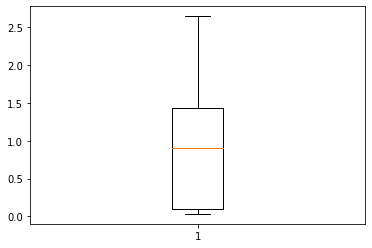

In [ ]:
plt.boxplot(dispo_avg_df['Monthly_avg_visits'])

In [ ]:
dispo_avg_df[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.000000,0.885098,0.999291
raw_visitor_counts,0.885098,1.000000,0.887241
Monthly_avg_visits,0.999291,0.887241,1.000000


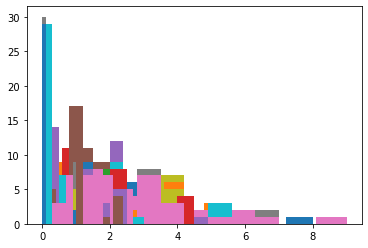

In [ ]:
for record in dispo_avg_df['visits_by_day']:
  plt.hist(record)

In [ ]:
dispo_pop_df = dispo_GS_df[['address_placekey',	'placekey',	'Business File Number',	'License Type',	'Entity Name',	'Trade Name',	'Current License Status',	'Expiration Date',	'Address',	'region_x',	'safegraph_place_id',	'location_name',	'street_address',	'city',	'postal_code',	'date_range_start',	'date_range_end','popularity_by_hour','popularity_by_day' ,'related_same_day_brand'	,'related_same_month_brand'	]]
dispo_pop_df.head()

,address_placekey,placekey,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Address,region_x,safegraph_place_id,location_name,street_address,city,postal_code,date_range_start,date_range_end,popularity_by_hour,popularity_by_day,related_same_day_brand,related_same_month_brand
0,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,"[0,0,0,0,0,0,1,2,21,33,30,24,15,7,4,1,0,0,0,0,...","{""Monday"":6,""Tuesday"":11,""Wednesday"":8,""Thursd...","{""REI"":33}","{""King Soopers"":60,""Sprouts Farmers Market"":40..."
1,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-02-01T00:00:00-07:00,2018-03-01T00:00:00-07:00,"[0,0,0,0,0,0,3,4,20,31,28,23,14,9,8,5,2,0,0,0,...","{""Monday"":6,""Tuesday"":10,""Wednesday"":8,""Thursd...","{""Chase"":50,""Starbucks"":31}","{""Starbucks"":76,""McDonald's"":43,""King Soopers""..."
2,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:4c2f25899b264b9285d61cc132e7e479,Amsterdam Cafe,1325 S Inca St,Denver,80223,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0]","{""Monday"":1,""Tuesday"":0,""Wednesday"":0,""Thursda...",{},"{""Tuesday Morning"":50,""AutoZone"":49,""Sam's Clu..."
3,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,"[1,0,0,0,0,0,0,2,21,31,23,22,14,5,4,1,1,0,0,0,...","{""Monday"":9,""Tuesday"":9,""Wednesday"":7,""Thursda...","{""SCP Distributors"":50,""Grainger"":50,""KFC"":50}","{""King Soopers"":45,""7-Eleven"":43,""Chipotle Mex..."
4,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-04-01T00:00:00-06:00,2018-05-01T00:00:00-06:00,"[0,0,0,0,0,0,0,1,18,27,30,33,19,11,5,3,0,0,0,0...","{""Monday"":12,""Tuesday"":8,""Wednesday"":8,""Thursd...",{},"{""King Soopers"":33,""Starbucks"":28,""ConocoPhill..."


In [ ]:
dispo_pop_df['popularity_by_hour'] = dispo_pop_df['popularity_by_hour'].transform(lambda x: literal_eval(x))
dispo_pop_df['Monthly_avg_pop'] = dispo_pop_df['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dispo_pop_df.head()

,address_placekey,placekey,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Address,region_x,safegraph_place_id,location_name,street_address,city,postal_code,date_range_start,date_range_end,popularity_by_hour,popularity_by_day,related_same_day_brand,related_same_month_brand,Monthly_avg_pop
0,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,"[0, 0, 0, 0, 0, 0, 1, 2, 21, 33, 30, 24, 15, 7...","{""Monday"":6,""Tuesday"":11,""Wednesday"":8,""Thursd...","{""REI"":33}","{""King Soopers"":60,""Sprouts Farmers Market"":40...",5.750
1,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-02-01T00:00:00-07:00,2018-03-01T00:00:00-07:00,"[0, 0, 0, 0, 0, 0, 3, 4, 20, 31, 28, 23, 14, 9...","{""Monday"":6,""Tuesday"":10,""Wednesday"":8,""Thursd...","{""Chase"":50,""Starbucks"":31}","{""Starbucks"":76,""McDonald's"":43,""King Soopers""...",6.125
2,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:4c2f25899b264b9285d61cc132e7e479,Amsterdam Cafe,1325 S Inca St,Denver,80223,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{""Monday"":1,""Tuesday"":0,""Wednesday"":0,""Thursda...",{},"{""Tuesday Morning"":50,""AutoZone"":49,""Sam's Clu...",0.125
3,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,"[1, 0, 0, 0, 0, 0, 0, 2, 21, 31, 23, 22, 14, 5...","{""Monday"":9,""Tuesday"":9,""Wednesday"":7,""Thursda...","{""SCP Distributors"":50,""Grainger"":50,""KFC"":50}","{""King Soopers"":45,""7-Eleven"":43,""Chipotle Mex...",5.500
4,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-04-01T00:00:00-06:00,2018-05-01T00:00:00-06:00,"[0, 0, 0, 0, 0, 0, 0, 1, 18, 27, 30, 33, 19, 1...","{""Monday"":12,""Tuesday"":8,""Wednesday"":8,""Thursd...",{},"{""King Soopers"":33,""Starbucks"":28,""ConocoPhill...",6.125


In [ ]:
dispo_pop_df = dispo_pop_df.drop(['address_placekey'	,'placekey'	,'Business File Number'	,'License Type'], axis = 1)
dispo_pop_df.head()

,Entity Name,Trade Name,Current License Status,Expiration Date,Address,region_x,safegraph_place_id,location_name,street_address,city,postal_code,date_range_start,date_range_end,popularity_by_hour,popularity_by_day,related_same_day_brand,related_same_month_brand,Monthly_avg_pop
0,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,"[0, 0, 0, 0, 0, 0, 1, 2, 21, 33, 30, 24, 15, 7...","{""Monday"":6,""Tuesday"":11,""Wednesday"":8,""Thursd...","{""REI"":33}","{""King Soopers"":60,""Sprouts Farmers Market"":40...",5.750
1,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-02-01T00:00:00-07:00,2018-03-01T00:00:00-07:00,"[0, 0, 0, 0, 0, 0, 3, 4, 20, 31, 28, 23, 14, 9...","{""Monday"":6,""Tuesday"":10,""Wednesday"":8,""Thursd...","{""Chase"":50,""Starbucks"":31}","{""Starbucks"":76,""McDonald's"":43,""King Soopers""...",6.125
2,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:4c2f25899b264b9285d61cc132e7e479,Amsterdam Cafe,1325 S Inca St,Denver,80223,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{""Monday"":1,""Tuesday"":0,""Wednesday"":0,""Thursda...",{},"{""Tuesday Morning"":50,""AutoZone"":49,""Sam's Clu...",0.125
3,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,"[1, 0, 0, 0, 0, 0, 0, 2, 21, 31, 23, 22, 14, 5...","{""Monday"":9,""Tuesday"":9,""Wednesday"":7,""Thursda...","{""SCP Distributors"":50,""Grainger"":50,""KFC"":50}","{""King Soopers"":45,""7-Eleven"":43,""Chipotle Mex...",5.500
4,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-04-01T00:00:00-06:00,2018-05-01T00:00:00-06:00,"[0, 0, 0, 0, 0, 0, 0, 1, 18, 27, 30, 33, 19, 1...","{""Monday"":12,""Tuesday"":8,""Wednesday"":8,""Thursd...",{},"{""King Soopers"":33,""Starbucks"":28,""ConocoPhill...",6.125


In [ ]:
max_avg_pop = dispo_pop_df[dispo_pop_df['Monthly_avg_pop'] == max(dispo_pop_df['Monthly_avg_pop'])]
min_avg_pop = dispo_pop_df[dispo_pop_df['Monthly_avg_pop'] == min(dispo_pop_df['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

                         Entity Name  ... Monthly_avg_pop
18  CANOSA PROPERTY INVESTMENTS, LLC  ...       13.958333

[1 rows x 18 columns]
                Entity Name  ... Monthly_avg_pop
15             BUD BUM, LLC  ...        0.041667
30        JGB VENTURES, LLC  ...        0.041667
31        JGB VENTURES, LLC  ...        0.041667
33        JGB VENTURES, LLC  ...        0.041667
34        JGB VENTURES, LLC  ...        0.041667
47  CURE MEDICAL PHARM INC.  ...        0.041667

[6 rows x 18 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84cda5510>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84cda1550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84cd9d590>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84cd9d050>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84cda5a90>,
  <matplotlib.lines.Line2D at 0x7fa84cda5fd0>]}

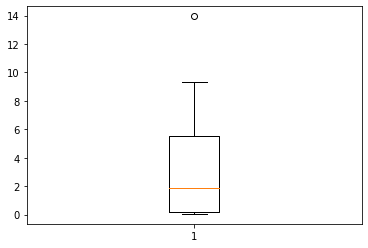

In [ ]:
plt.boxplot(dispo_pop_df['Monthly_avg_pop'])

(array([[11.,  1.,  1.,  2.,  1.,  1.,  0.,  3.,  2.,  2.],
        [15.,  1.,  4.,  1.,  1.,  2.,  0.,  0.,  0.,  0.],
        [15.,  1.,  2.,  0.,  1.,  2.,  0.,  1.,  2.,  0.],
        [15.,  0.,  2.,  1.,  2.,  0.,  1.,  1.,  2.,  0.],
        [12.,  4.,  2.,  1.,  3.,  2.,  0.,  0.,  0.,  0.],
        [14.,  3.,  3.,  2.,  2.,  0.,  0.,  0.,  0.,  0.],
        [16.,  2.,  3.,  2.,  1.,  0.,  0.,  0.,  0.,  0.],
        [15.,  2.,  4.,  3.,  0.,  0.,  0.,  0.,  0.,  0.],
        [14.,  2.,  2.,  1.,  1.,  1.,  2.,  1.,  0.,  0.],
        [13.,  3.,  1.,  2.,  0.,  2.,  0.,  1.,  1.,  1.],
        [14.,  2.,  3.,  1.,  0.,  2.,  1.,  1.,  0.,  0.],
        [13.,  0.,  6.,  0.,  1.,  2.,  2.,  0.,  0.,  0.]]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <a list of 12 Lists of Patches objects>)

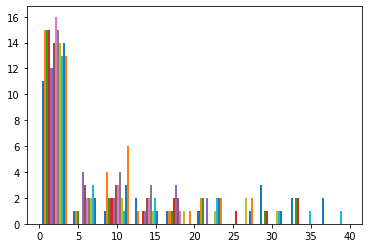

In [ ]:
plt.hist(dispo_pop_df[dispo_pop_df['Entity Name'] == 'CANOSA PROPERTY INVESTMENTS, LLC']['popularity_by_hour'])

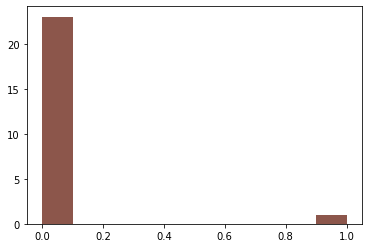

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)

It oddly seems that the only dispensary that is very highly rated is CANOSA PROPERTY INVESTMENTS, LLC. What could be the reason behind the success of this particular dispensary?

In [ ]:
max_avg_pop

,Entity Name,Trade Name,Current License Status,Expiration Date,Address,region_x,safegraph_place_id,location_name,street_address,city,postal_code,date_range_start,date_range_end,popularity_by_hour,popularity_by_day,related_same_day_brand,related_same_month_brand,Monthly_avg_pop
18,"CANOSA PROPERTY INVESTMENTS, LLC",BOTANICO 2,License Issued - Active,1/1/2022 12:00:00 AM,777 CANOSA CT,CO,sg:fcc02b73e84244c296c436b71aabef19,Pando MED,777 Canosa Ct,Denver,80204,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,"[2, 2, 2, 2, 2, 3, 12, 23, 29, 34, 37, 40, 33,...","{""Monday"":18,""Tuesday"":20,""Wednesday"":14,""Thur...","{""Boost Mobile"":25}","{""ConocoPhillips"":51,""7-Eleven"":33,""The Home D...",13.958333


The ratings for the BOTANICO 2 are very good, with a 3.9 on weedmaps and a 4.7 on leafly. This could be evidence that the reason that this dispensary does so well because it it offers such good services and has quality products. 

How does the ratings for this particular dispensary compare with the other ratings for dispensaries in the same zip code

In [ ]:
dispo_pop_df[dispo_pop_df["postal_code"] == 80204].head(2)

,Entity Name,Trade Name,Current License Status,Expiration Date,Address,region_x,safegraph_place_id,location_name,street_address,city,postal_code,date_range_start,date_range_end,popularity_by_hour,popularity_by_day,related_same_day_brand,related_same_month_brand,Monthly_avg_pop
18,"CANOSA PROPERTY INVESTMENTS, LLC",BOTANICO 2,License Issued - Active,1/1/2022 12:00:00 AM,777 CANOSA CT,CO,sg:fcc02b73e84244c296c436b71aabef19,Pando MED,777 Canosa Ct,Denver,80204,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,"[2, 2, 2, 2, 2, 3, 12, 23, 29, 34, 37, 40, 33,...","{""Monday"":18,""Tuesday"":20,""Wednesday"":14,""Thur...","{""Boost Mobile"":25}","{""ConocoPhillips"":51,""7-Eleven"":33,""The Home D...",13.958333
19,"CANOSA PROPERTY INVESTMENTS, LLC",BOTANICO 2,License Issued - Active,1/1/2022 12:00:00 AM,777 CANOSA CT,CO,sg:fcc02b73e84244c296c436b71aabef19,Pando MED,777 Canosa Ct,Denver,80204,2018-02-01T00:00:00-07:00,2018-03-01T00:00:00-07:00,"[0, 0, 0, 0, 0, 1, 3, 11, 13, 22, 23, 17, 11, ...","{""Monday"":5,""Tuesday"":10,""Wednesday"":6,""Thursd...","{""United Rentals"":25}","{""ConocoPhillips"":40,""Starbucks"":31,""King Soop...",5.375000


We can see that there are two dispensaries in this zip code, only Botanico has consecutively good popularity scores, the other dispensary was not very well rated and the low quality of the other dispensary could have attributed to the success of Botanico 2. 

Could there be another reason behind the popularity of this particular dispensary such as the local stores around it?

In [ ]:
dispo_GS_df[dispo_GS_df['Trade Name'] == 'BOTANICO 2']['related_same_day_brand'].tolist()

['{"Boost Mobile":25}',
 '{"United Rentals":25}',
 '{"Storage Pros":17}',
 '{"ConocoPhillips":33,"7-Eleven":33,"Chipotle Mexican Grill":20}',
 '{"Jimmy John\'s":50,"The Home Depot":49}',
 '{"LaMar\'s Donuts":100,"King Soopers":17}',
 '{"Del Taco":100,"Pilot Flying J":100,"The Home Depot":99,"Super 8":33,"Quality Inn":33}',
 '{"King Soopers":100}',
 '{"Superior Pool Products":17,"Starbucks":10}',
 '{"Arby\'s":33,"Vasa Fitness":25}',
 '{"T-Mobile":50,"Dillard\'s":33,"Marco\'s Pizza":33,"Hotel Indigo":20,"ConocoPhillips":20,"Steve Madden":14}',
 '{"Kum & Go":100}']

From this we can see that there's no brands that correlate with the popularity of the dispensary. The corelation could potentially be attributed to large number of food brands and grocery stores that are attributed with the dispensary  

Now we can analyze the seasonal data of the dispensary data 

In [ ]:
dispo_GS_df.head()

,address_placekey,placekey,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Address,region_x,safegraph_place_id,location_name,street_address,city,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-01-01T00:00:00-07:00,2018-02-01T00:00:00-07:00,41,10,"[0,1,0,1,2,1,0,3,3,4,1,1,1,0,0,3,0,1,4,0,0,1,1...",80310014011,"{""080050835003"":4,""080590101003"":4,""0805901205...","{""080310014011"":4,""080310003022"":4}","{""US"":9}",11833.0,85.0,"{""<5"":0,""5-10"":1,""11-20"":2,""21-60"":10,""61-120""...","{""REI"":33}","{""King Soopers"":60,""Sprouts Farmers Market"":40...","[0,0,0,0,0,0,1,2,21,33,30,24,15,7,4,1,0,0,0,0,...","{""Monday"":6,""Tuesday"":11,""Wednesday"":8,""Thursd...","{""android"":4,""ios"":10}"
1,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-02-01T00:00:00-07:00,2018-03-01T00:00:00-07:00,36,7,"[0,0,0,0,1,2,2,0,1,0,0,3,3,3,2,3,0,0,1,3,1,4,2...",80310014011,"{""080050835003"":4,""080410073002"":4,""0803100030...",{},"{""US"":8}",13831.0,156.5,"{""<5"":0,""5-10"":5,""11-20"":3,""21-60"":3,""61-120"":...","{""Chase"":50,""Starbucks"":31}","{""Starbucks"":76,""McDonald's"":43,""King Soopers""...","[0,0,0,0,0,0,3,4,20,31,28,23,14,9,8,5,2,0,0,0,...","{""Monday"":6,""Tuesday"":10,""Wednesday"":8,""Thursd...","{""android"":4,""ios"":4}"
2,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:4c2f25899b264b9285d61cc132e7e479,Amsterdam Cafe,1325 S Inca St,Denver,80223,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,2,2,"[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0...",80310014011,"{""080310006002"":4}","{""080310046031"":4}","{""US"":4}",NaN,25.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":1,""61-120"":...",{},"{""Tuesday Morning"":50,""AutoZone"":49,""Sam's Clu...","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0]","{""Monday"":1,""Tuesday"":0,""Wednesday"":0,""Thursda...","{""android"":0,""ios"":5}"
3,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-03-01T00:00:00-07:00,2018-04-01T00:00:00-06:00,43,11,"[3,1,0,0,3,1,2,2,3,0,0,2,2,2,0,2,0,0,2,2,1,2,4...",80310014011,"{""080350141122"":4}","{""080310003022"":4}","{""US"":11}",13831.0,85.0,"{""<5"":1,""5-10"":8,""11-20"":6,""21-60"":4,""61-120"":...","{""SCP Distributors"":50,""Grainger"":50,""KFC"":50}","{""King Soopers"":45,""7-Eleven"":43,""Chipotle Mex...","[1,0,0,0,0,0,0,2,21,31,23,22,14,5,4,1,1,0,0,0,...","{""Monday"":9,""Tuesday"":9,""Wednesday"":7,""Thursda...","{""android"":5,""ios"":4}"
4,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-04-01T00:00:00-06:00,2018-05-01T00:00:00-06:00,44,12,"[0,0,2,1,3,1,1,0,2,2,3,2,0,0,0,2,3,1,3,2,0,0,5...",80310014011,"{""080310006002"":4}","{""080310003022"":6,""080310009031"":4,""0803100140...","{""US"":14}",12997.0,132.0,"{""<5"":0,""5-10"":6,""11-20"":6,""21-60"":2,""61-120"":...",{},"{""King Soopers"":33,""Starbuc

In [ ]:
dispo_GS_df['Entity Name'].value_counts()

BUD BUM, LLC                        18
CANOSA PROPERTY INVESTMENTS, LLC    12
CURE MEDICAL PHARM INC.             12
RIA HOLDINGS LIMITED                12
GREEN CROSS LLC                     12
JGB VENTURES, LLC                    5
Name: Entity Name, dtype: int64

In [ ]:
dispo_GS_df['date_range_start'] = dispo_GS_df['date_range_start'].apply(lambda x: pd.Timestamp(x))
dispo_GS_df['date_range_end'] = dispo_GS_df['date_range_end'].apply(lambda x: pd.Timestamp(x))

dispo_GS_df['date_range_start'] = pd.to_datetime(dispo_GS_df['date_range_start'], utc=True)
dispo_GS_df['date_range_end'] = pd.to_datetime(dispo_GS_df['date_range_end'], utc=True)

dispo_GS_df['month_start'] = pd.DatetimeIndex(dispo_GS_df['date_range_start']).month
dispo_GS_df['month_end'] = pd.DatetimeIndex(dispo_GS_df['date_range_end']).month

In [ ]:
dispo_GS_df.head(3)

,address_placekey,placekey,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Address,region_x,safegraph_place_id,location_name,street_address,city,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
0,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,41,10,"[0,1,0,1,2,1,0,3,3,4,1,1,1,0,0,3,0,1,4,0,0,1,1...",80310014011,"{""080050835003"":4,""080590101003"":4,""0805901205...","{""080310014011"":4,""080310003022"":4}","{""US"":9}",11833.0,85.0,"{""<5"":0,""5-10"":1,""11-20"":2,""21-60"":10,""61-120""...","{""REI"":33}","{""King Soopers"":60,""Sprouts Farmers Market"":40...","[0,0,0,0,0,0,1,2,21,33,30,24,15,7,4,1,0,0,0,0,...","{""Monday"":6,""Tuesday"":11,""Wednesday"":8,""Thursd...","{""android"":4,""ios"":10}",1,2
1,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,36,7,"[0,0,0,0,1,2,2,0,1,0,0,3,3,3,2,3,0,0,1,3,1,4,2...",80310014011,"{""080050835003"":4,""080410073002"":4,""0803100030...",{},"{""US"":8}",13831.0,156.5,"{""<5"":0,""5-10"":5,""11-20"":3,""21-60"":3,""61-120"":...","{""Chase"":50,""Starbucks"":31}","{""Starbucks"":76,""McDonald's"":43,""King Soopers""...","[0,0,0,0,0,0,3,4,20,31,28,23,14,9,8,5,2,0,0,0,...","{""Monday"":6,""Tuesday"":10,""Wednesday"":8,""Thursd...","{""android"":4,""ios"":4}",2,3
2,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:4c2f25899b264b9285d61cc132e7e479,Amsterdam Cafe,1325 S Inca St,Denver,80223,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,2,2,"[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0...",80310014011,"{""080310006002"":4}","{""080310046031"":4}","{""US"":4}",NaN,25.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":1,""61-120"":...",{},"{""Tuesday Morning"":50,""AutoZone"":49,""Sam's Clu...","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0]","{""Monday"":1,""Tuesday"":0,""Wednesday"":0,""Thursda...","{""android"":0,""ios"":5}",3,4


## Dispensary Geospatial monthly data analysis

Visitor + Popularity analysis for all 12 months individually

In [ ]:
D_GS_df_1 = dispo_GS_df[dispo_GS_df['month_start'] == 1]
D_GS_df_2 = dispo_GS_df[dispo_GS_df['month_start'] == 2]
D_GS_df_3 = dispo_GS_df[dispo_GS_df['month_start'] == 3]
D_GS_df_4 = dispo_GS_df[dispo_GS_df['month_start'] == 4]
D_GS_df_5 = dispo_GS_df[dispo_GS_df['month_start'] == 5]
D_GS_df_6 = dispo_GS_df[dispo_GS_df['month_start'] == 6]
D_GS_df_7 = dispo_GS_df[dispo_GS_df['month_start'] == 7]
D_GS_df_8 = dispo_GS_df[dispo_GS_df['month_start'] == 8]
D_GS_df_9 = dispo_GS_df[dispo_GS_df['month_start'] == 9]
D_GS_df_10 = dispo_GS_df[dispo_GS_df['month_start'] == 10]
D_GS_df_11 = dispo_GS_df[dispo_GS_df['month_start'] == 11]
D_GS_df_12 = dispo_GS_df[dispo_GS_df['month_start'] == 12]

###**January Analysis**

Visitor and Population analysis

In [ ]:
D_GS_df_1.head()

,address_placekey,placekey,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Address,region_x,safegraph_place_id,location_name,street_address,city,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
0,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,41,10,"[0,1,0,1,2,1,0,3,3,4,1,1,1,0,0,3,0,1,4,0,0,1,1...",80310014011,"{""080050835003"":4,""080590101003"":4,""0805901205...","{""080310014011"":4,""080310003022"":4}","{""US"":9}",11833.0,85.0,"{""<5"":0,""5-10"":1,""11-20"":2,""21-60"":10,""61-120""...","{""REI"":33}","{""King Soopers"":60,""Sprouts Farmers Market"":40...","[0,0,0,0,0,0,1,2,21,33,30,24,15,7,4,1,0,0,0,0,...","{""Monday"":6,""Tuesday"":11,""Wednesday"":8,""Thursd...","{""android"":4,""ios"":10}",1,2
18,224@5q9-bqp-q4v,224@5q9-bqp-q4v,2013-BFN-1068848,Retail Marijuana Store,"CANOSA PROPERTY INVESTMENTS, LLC",BOTANICO 2,License Issued - Active,1/1/2022 12:00:00 AM,777 CANOSA CT,CO,sg:fcc02b73e84244c296c436b71aabef19,Pando MED,777 Canosa Ct,Denver,80204,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,82,25,"[1,4,1,1,4,1,0,1,5,3,4,4,1,0,6,4,4,3,7,1,0,3,4...",80310008001,"{""081170001001"":4,""080590115504"":4,""0800500740...","{""080050055512"":4,""080050826001"":4,""0803100080...","{""US"":25}",14322.0,125.0,"{""<5"":0,""5-10"":9,""11-20"":7,""21-60"":11,""61-120""...","{""Boost Mobile"":25}","{""ConocoPhillips"":51,""7-Eleven"":33,""The Home D...","[2,2,2,2,2,3,12,23,29,34,37,40,33,31,30,18,15,...","{""Monday"":18,""Tuesday"":20,""Wednesday"":14,""Thur...","{""android"":14,""ios"":9}",1,2
35,222@5q9-9xb-qj9,222-222@5q9-9xb-qj9,2019-BFN-0007990,Retail Marijuana Store,GREEN CROSS LLC,GREEN CROSS OF CHERRY CREEK,License Issued - Active,3/5/2022 12:00:00 AM,3400 Oneida Way,CO,sg:e4cc58e040fe450ca02879ae87195ba8,Green Cross of Cherry Creek REC MED,3400 S Oneida Way,Denver,80224,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,47,29,"[3,2,0,2,0,1,4,0,1,0,1,1,1,0,4,1,1,4,1,2,0,1,2...",80310068122,"{""080350141392"":4,""080050873001"":4,""0800501510...","{""080310040031"":5,""080050870002"":4,""0800508630...","{""US"":26}",6707.0,17.0,"{""<5"":0,""5-10"":15,""11-20"":14,""21-60"":6,""61-120...","{""Best Western"":100,""Goodwill Industries"":50,""...","{""King Soopers"":48,""Starbucks"":39,""ConocoPhill...","[6,5,5,5,6,5,6,7,6,8,7,7,4,2,5,5,1,1,3,7,6,5,5,7]","{""Monday"":10,""Tuesday"":6,""Wednesday"":7,""Thursd...","{""android"":18,""ios"":5}",1,2
47,224@5q9-bqs-dqf,224@5q9-bqs-dqf,2013-BFN-1070316,Retail Marijuana Store,CURE MEDICAL PHARM INC.,RIVERROCK,License Issued - Active,3/17/2022 12:00:00 AM,990 6TH AVE,CO,sg:02def300242e4ac48ca083a66d549e1c,RiverRock South,990 W 6th Ave,Denver,80204,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,1,1,"[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0...",80310021005,{},{},{},NaN,10.0,"{""<5"":0,""5-10"":1,""11-20"":0,""21-60"":0,""61-120"":...",{},"{""LivWell"":100,""SIGNAL Food Stores"":100,""24/7 ...","[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda...","{""android"":4,""ios"":0}",1,2
59,225@5q9-bqr-rkz,225@5q9-bqr-rkz,2017-BFN-0009334,Retail Marijuana Store,RIA HOLDINGS LIMITED,LAUGHING GRASS,License Issued - Active,6/25/2021 12:00:00 AM,1110 Virginia Ave,CO,sg:69a2cb1c37fb4270b3d8aeeb3f3e41ce,Laughing Grass,1110 W Virginia Ave,Denver,80223,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,4,2,"[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0...",80310013

In [ ]:
D_avg_df_1 = D_GS_df_1[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
D_avg_df_1.head()


,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
0,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,41,10,"[0,1,0,1,2,1,0,3,3,4,1,1,1,0,0,3,0,1,4,0,0,1,1..."
18,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,82,25,"[1,4,1,1,4,1,0,1,5,3,4,4,1,0,6,4,4,3,7,1,0,3,4..."
35,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,47,29,"[3,2,0,2,0,1,4,0,1,0,1,1,1,0,4,1,1,4,1,2,0,1,2..."
47,RIVERROCK,990 6TH AVE,License Issued - Active,80204,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,1,1,"[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0..."
59,LAUGHING GRASS,1110 Virginia Ave,License Issued - Active,80223,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,4,2,"[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0..."


In [ ]:
from ast import literal_eval
D_avg_df_1['visits_by_day'] = D_avg_df_1['visits_by_day'].transform(lambda x: literal_eval(x))
D_avg_df_1['Monthly_avg_visits'] = D_avg_df_1['visits_by_day'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
max_avg = D_avg_df_1[D_avg_df_1['Monthly_avg_visits'] == max(D_avg_df_1['Monthly_avg_visits'])]
min_avg = D_avg_df_1[D_avg_df_1['Monthly_avg_visits'] == min(D_avg_df_1['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

    Trade Name  ... Monthly_avg_visits
18  BOTANICO 2  ...           2.645161

[1 rows x 10 columns]
   Trade Name  ... Monthly_avg_visits
47  RIVERROCK  ...           0.032258

[1 rows x 10 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84c991d10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84c998d50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84c99dd90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84c99d850>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84c9982d0>,
  <matplotlib.lines.Line2D at 0x7fa84c998810>]}

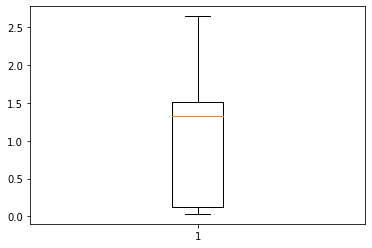

In [ ]:
plt.boxplot(D_avg_df_1['Monthly_avg_visits'])

In [ ]:
D_avg_df_1[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.000000,0.853775,1.000000
raw_visitor_counts,0.853775,1.000000,0.853775
Monthly_avg_visits,1.000000,0.853775,1.000000


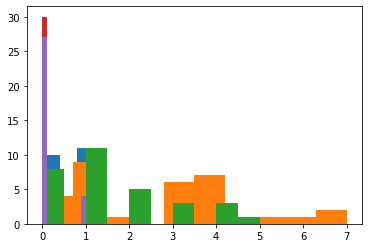

In [ ]:
for record in D_avg_df_1['visits_by_day']:
  plt.hist(record)

In [ ]:
D_pop_df_1 = D_GS_df_1[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
D_pop_df_1.head()

,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
0,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,"[0,0,0,0,0,0,1,2,21,33,30,24,15,7,4,1,0,0,0,0,...","{""Monday"":6,""Tuesday"":11,""Wednesday"":8,""Thursd..."
18,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,"[2,2,2,2,2,3,12,23,29,34,37,40,33,31,30,18,15,...","{""Monday"":18,""Tuesday"":20,""Wednesday"":14,""Thur..."
35,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,"[6,5,5,5,6,5,6,7,6,8,7,7,4,2,5,5,1,1,3,7,6,5,5,7]","{""Monday"":10,""Tuesday"":6,""Wednesday"":7,""Thursd..."
47,RIVERROCK,990 6TH AVE,License Issued - Active,80204,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,"[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda..."
59,LAUGHING GRASS,1110 Virginia Ave,License Issued - Active,80223,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,"[0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":3,""Thursda..."


In [ ]:
D_pop_df_1['popularity_by_hour'] = D_pop_df_1['popularity_by_hour'].transform(lambda x: literal_eval(x))
D_pop_df_1['Monthly_avg_pop'] = D_pop_df_1['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = D_pop_df_1[D_pop_df_1['Monthly_avg_pop'] == max(D_pop_df_1['Monthly_avg_pop'])]
min_avg_pop = D_pop_df_1[D_pop_df_1['Monthly_avg_pop'] == min(D_pop_df_1['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

    Trade Name  ... Monthly_avg_pop
18  BOTANICO 2  ...       13.958333

[1 rows x 9 columns]
   Trade Name  ... Monthly_avg_pop
47  RIVERROCK  ...        0.041667

[1 rows x 9 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84c87e190>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84c8851d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84c80c210>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84c885c90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84c87e710>,
  <matplotlib.lines.Line2D at 0x7fa84c87ec50>]}

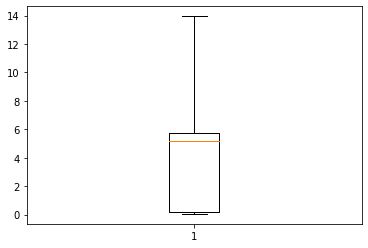

In [ ]:
plt.boxplot(D_pop_df_1['Monthly_avg_pop'])

(array([11.,  1.,  1.,  2.,  1.,  1.,  0.,  3.,  2.,  2.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <a list of 10 Patch objects>)

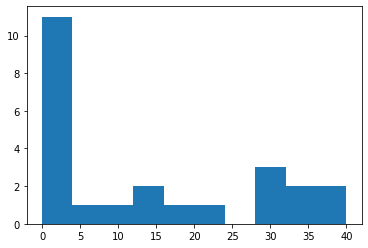

In [ ]:

plt.hist(D_pop_df_1[D_pop_df_1['Trade Name'] == 'BOTANICO 2']['popularity_by_hour'])

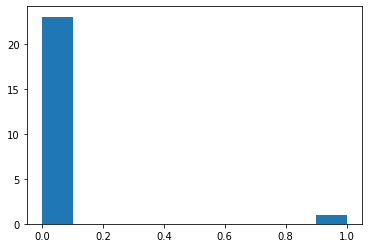

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)

###**February Analysis**

Visitor and Population analysis

In [ ]:
D_GS_df_2.head()

,address_placekey,placekey,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Address,region_x,safegraph_place_id,location_name,street_address,city,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
1,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,36,7,"[0,0,0,0,1,2,2,0,1,0,0,3,3,3,2,3,0,0,1,3,1,4,2...",80310014011,"{""080050835003"":4,""080410073002"":4,""0803100030...",{},"{""US"":8}",13831.0,156.5,"{""<5"":0,""5-10"":5,""11-20"":3,""21-60"":3,""61-120"":...","{""Chase"":50,""Starbucks"":31}","{""Starbucks"":76,""McDonald's"":43,""King Soopers""...","[0,0,0,0,0,0,3,4,20,31,28,23,14,9,8,5,2,0,0,0,...","{""Monday"":6,""Tuesday"":10,""Wednesday"":8,""Thursd...","{""android"":4,""ios"":4}",2,3
19,224@5q9-bqp-q4v,224@5q9-bqp-q4v,2013-BFN-1068848,Retail Marijuana Store,"CANOSA PROPERTY INVESTMENTS, LLC",BOTANICO 2,License Issued - Active,1/1/2022 12:00:00 AM,777 CANOSA CT,CO,sg:fcc02b73e84244c296c436b71aabef19,Pando MED,777 Canosa Ct,Denver,80204,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,44,27,"[2,2,1,0,4,2,2,1,4,0,0,1,4,2,1,2,0,0,0,1,1,4,6...",80310008001,"{""080010096061"":4,""080310019012"":4,""0800100850...","{""080310008001"":4,""080310046013"":4,""0800500740...","{""US"":30}",11134.0,52.5,"{""<5"":0,""5-10"":10,""11-20"":5,""21-60"":8,""61-120""...","{""United Rentals"":25}","{""ConocoPhillips"":40,""Starbucks"":31,""King Soop...","[0,0,0,0,0,1,3,11,13,22,23,17,11,10,8,4,1,3,1,...","{""Monday"":5,""Tuesday"":10,""Wednesday"":6,""Thursd...","{""android"":16,""ios"":13}",2,3
36,222@5q9-9xb-qj9,222-222@5q9-9xb-qj9,2019-BFN-0007990,Retail Marijuana Store,GREEN CROSS LLC,GREEN CROSS OF CHERRY CREEK,License Issued - Active,3/5/2022 12:00:00 AM,3400 Oneida Way,CO,sg:e4cc58e040fe450ca02879ae87195ba8,Green Cross of Cherry Creek REC MED,3400 S Oneida Way,Denver,80224,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,40,31,"[2,0,2,0,3,4,1,2,1,0,2,4,1,1,1,0,0,4,1,2,0,0,2...",80310068122,"{""080310068143"":6,""080050870003"":4,""0800100830...","{""080870003001"":4,""080310068095"":4,""0803100701...","{""US"":31}",6499.0,16.0,"{""<5"":2,""5-10"":14,""11-20"":9,""21-60"":11,""61-120...","{""King Soopers"":100,""Sinclair Oil"":100,""Conoco...","{""King Soopers"":58,""McDonald's"":47,""Starbucks""...","[2,2,3,2,2,2,4,7,4,5,10,6,3,4,3,3,1,1,1,1,5,2,...","{""Monday"":11,""Tuesday"":8,""Wednesday"":4,""Thursd...","{""android"":20,""ios"":9}",2,3
48,224@5q9-bqs-dqf,224@5q9-bqs-dqf,2013-BFN-1070316,Retail Marijuana Store,CURE MEDICAL PHARM INC.,RIVERROCK,License Issued - Active,3/17/2022 12:00:00 AM,990 6TH AVE,CO,sg:02def300242e4ac48ca083a66d549e1c,RiverRock South,990 W 6th Ave,Denver,80204,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,3,2,"[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1...",80310021005,{},{},"{""US"":4}",NaN,12.0,"{""<5"":0,""5-10"":0,""11-20"":3,""21-60"":0,""61-120"":...",{},"{""King Soopers"":100,""LaMar's Donuts"":50,""Garba...","[0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda...","{""android"":4,""ios"":0}",2,3
60,225@5q9-bqr-rkz,225@5q9-bqr-rkz,2017-BFN-0009334,Retail Marijuana Store,RIA HOLDINGS LIMITED,LAUGHING GRASS,License Issued - Active,6/25/2021 12:00:00 AM,1110 Virginia Ave,CO,sg:69a2cb1c37fb4270b3d8aeeb3f3e41ce,Laughing Grass,1110 W Virginia Ave,Denver,80223,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,5,2,"[0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0...",80310013022,"{

In [ ]:
D_avg_df_2 = D_GS_df_2[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
D_avg_df_2.head()

,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
1,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,36,7,"[0,0,0,0,1,2,2,0,1,0,0,3,3,3,2,3,0,0,1,3,1,4,2..."
19,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,44,27,"[2,2,1,0,4,2,2,1,4,0,0,1,4,2,1,2,0,0,0,1,1,4,6..."
36,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,40,31,"[2,0,2,0,3,4,1,2,1,0,2,4,1,1,1,0,0,4,1,2,0,0,2..."
48,RIVERROCK,990 6TH AVE,License Issued - Active,80204,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,3,2,"[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1..."
60,LAUGHING GRASS,1110 Virginia Ave,License Issued - Active,80223,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,5,2,"[0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0..."


In [ ]:
from ast import literal_eval
D_avg_df_2['visits_by_day'] = D_avg_df_2['visits_by_day'].transform(lambda x: literal_eval(x))
D_avg_df_2['Monthly_avg_visits'] = D_avg_df_2['visits_by_day'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
max_avg = D_avg_df_2[D_avg_df_2['Monthly_avg_visits'] == max(D_avg_df_2['Monthly_avg_visits'])]
min_avg = D_avg_df_2[D_avg_df_2['Monthly_avg_visits'] == min(D_avg_df_2['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

    Trade Name  ... Monthly_avg_visits
19  BOTANICO 2  ...           1.571429

[1 rows x 10 columns]
   Trade Name  ... Monthly_avg_visits
48  RIVERROCK  ...           0.107143

[1 rows x 10 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84c6f7410>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84c6fd450>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84c705490>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84c6fdf10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84c6f7990>,
  <matplotlib.lines.Line2D at 0x7fa84c6f7ed0>]}

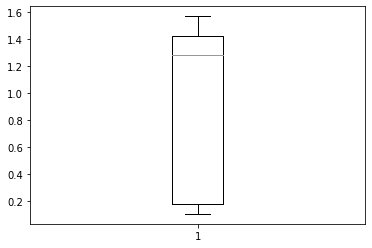

In [ ]:
plt.boxplot(D_avg_df_2['Monthly_avg_visits'])

In [ ]:
D_avg_df_2[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.000000,0.827138,1.000000
raw_visitor_counts,0.827138,1.000000,0.827138
Monthly_avg_visits,1.000000,0.827138,1.000000


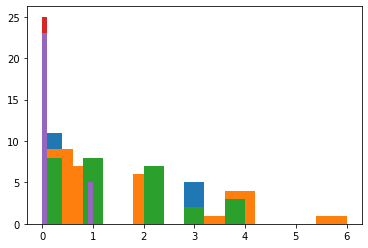

In [ ]:
for record in D_avg_df_2['visits_by_day']:
  plt.hist(record)

In [ ]:
D_pop_df_2 = D_GS_df_2[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
D_pop_df_2.head()

,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
1,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,"[0,0,0,0,0,0,3,4,20,31,28,23,14,9,8,5,2,0,0,0,...","{""Monday"":6,""Tuesday"":10,""Wednesday"":8,""Thursd..."
19,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,"[0,0,0,0,0,1,3,11,13,22,23,17,11,10,8,4,1,3,1,...","{""Monday"":5,""Tuesday"":10,""Wednesday"":6,""Thursd..."
36,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,"[2,2,3,2,2,2,4,7,4,5,10,6,3,4,3,3,1,1,1,1,5,2,...","{""Monday"":11,""Tuesday"":8,""Wednesday"":4,""Thursd..."
48,RIVERROCK,990 6TH AVE,License Issued - Active,80204,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,"[0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda..."
60,LAUGHING GRASS,1110 Virginia Ave,License Issued - Active,80223,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,"[0,0,0,0,0,0,0,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0]","{""Monday"":1,""Tuesday"":1,""Wednesday"":2,""Thursda..."


In [ ]:
D_pop_df_2['popularity_by_hour'] = D_pop_df_2['popularity_by_hour'].transform(lambda x: literal_eval(x))
D_pop_df_2['Monthly_avg_pop'] = D_pop_df_2['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = D_pop_df_2[D_pop_df_2['Monthly_avg_pop'] == max(D_pop_df_2['Monthly_avg_pop'])]
min_avg_pop = D_pop_df_2[D_pop_df_2['Monthly_avg_pop'] == min(D_pop_df_2['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

  Trade Name  ... Monthly_avg_pop
1    BUD BUM  ...           6.125

[1 rows x 9 columns]
   Trade Name  ... Monthly_avg_pop
48  RIVERROCK  ...           0.125

[1 rows x 9 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84c561410>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84c567450>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84c570490>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84c567f10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84c561990>,
  <matplotlib.lines.Line2D at 0x7fa84c561ed0>]}

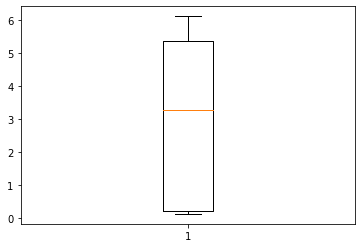

In [ ]:
plt.boxplot(D_pop_df_2['Monthly_avg_pop'])

(array([13.,  3.,  0.,  1.,  3.,  1.,  0.,  1.,  0.,  2.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

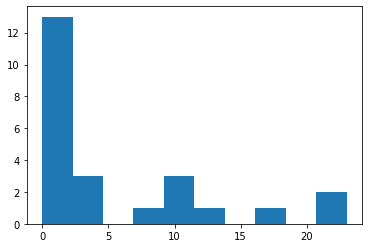

In [ ]:
plt.hist(D_pop_df_2[D_pop_df_2['Trade Name'] == 'BOTANICO 2']['popularity_by_hour'])

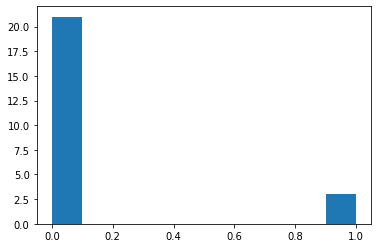

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)

###**March Analysis**

Visitor and Popularity analysis

In [ ]:
D_GS_df_3.head()

,address_placekey,placekey,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Address,region_x,safegraph_place_id,location_name,street_address,city,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
2,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:4c2f25899b264b9285d61cc132e7e479,Amsterdam Cafe,1325 S Inca St,Denver,80223,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,2,2,"[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0...",80310014011,"{""080310006002"":4}","{""080310046031"":4}","{""US"":4}",NaN,25.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":1,""61-120"":...",{},"{""Tuesday Morning"":50,""AutoZone"":49,""Sam's Clu...","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0]","{""Monday"":1,""Tuesday"":0,""Wednesday"":0,""Thursda...","{""android"":0,""ios"":5}",3,4
3,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,43,11,"[3,1,0,0,3,1,2,2,3,0,0,2,2,2,0,2,0,0,2,2,1,2,4...",80310014011,"{""080350141122"":4}","{""080310003022"":4}","{""US"":11}",13831.0,85.0,"{""<5"":1,""5-10"":8,""11-20"":6,""21-60"":4,""61-120"":...","{""SCP Distributors"":50,""Grainger"":50,""KFC"":50}","{""King Soopers"":45,""7-Eleven"":43,""Chipotle Mex...","[1,0,0,0,0,0,0,2,21,31,23,22,14,5,4,1,1,0,0,0,...","{""Monday"":9,""Tuesday"":9,""Wednesday"":7,""Thursda...","{""android"":5,""ios"":4}",3,4
20,224@5q9-bqp-q4v,224@5q9-bqp-q4v,2013-BFN-1068848,Retail Marijuana Store,"CANOSA PROPERTY INVESTMENTS, LLC",BOTANICO 2,License Issued - Active,1/1/2022 12:00:00 AM,777 CANOSA CT,CO,sg:fcc02b73e84244c296c436b71aabef19,Pando MED,777 Canosa Ct,Denver,80204,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,70,34,"[3,2,2,0,5,4,3,2,3,0,0,1,1,3,2,3,0,0,1,4,5,6,2...",80310008001,"{""080310028023"":8,""490351128134"":5,""0803101190...","{""080010079001"":4,""080310004023"":4,""0803100140...","{""US"":30}",13597.0,54.5,"{""<5"":1,""5-10"":19,""11-20"":6,""21-60"":10,""61-120...","{""Storage Pros"":17}","{""ConocoPhillips"":44,""Starbucks"":37,""7-Eleven""...","[1,2,2,2,1,3,8,18,22,32,33,30,20,9,4,3,3,1,1,0...","{""Monday"":9,""Tuesday"":12,""Wednesday"":19,""Thurs...","{""android"":17,""ios"":9}",3,4
30,223@5q9-bg8-ht9,223@5q9-bg8-ht9,2013-BFN-1068866,Retail Marijuana Store,"JGB VENTURES, LLC",DANK,License Issued - Active,1/1/2022 12:00:00 AM,3835 Elm ST,CO,sg:0f832399588c47f7bf5ab9d04a4f8a75,DANK Colorado Adult Use,3835 Elm St,Denver,80207,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,1,1,"[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",80310041011,"{""080050828003"":4}","{""080310041011"":4}",{},NaN,11.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":0,""61-120"":...",{},"{""Waterworks"":100,""Bad Daddy's Burger Bar"":100...","[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda...","{""android"":0,""ios"":0}",3,4
37,222@5q9-9xb-qj9,222-222@5q9-9xb-qj9,2019-BFN-0007990,Retail Marijuana Store,GREEN CROSS LLC,GREEN CROSS OF CHERRY CREEK,License Issued - Active,3/5/2022 12:00:00 AM,3400 Oneida Way,CO,sg:e4cc58e040fe450ca02879ae87195ba8,Green Cross of Cherry Creek REC MED,3400 S Oneida Way,Denver,80224,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,34,31,"[2,1,1,4,2,1,0,1,0,0,1,1,0,1,0,1,1,0,0,2,1,0,2...",80310068122,"{""080050068541"":4,""080310068093"":4,""0803501390...","{""401310505011"":5,""080590120441"":4,""0800508140...","{""US

In [ ]:
D_avg_df_3 = D_GS_df_3[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
D_avg_df_3.head()

,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
2,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,2,2,"[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0..."
3,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,43,11,"[3,1,0,0,3,1,2,2,3,0,0,2,2,2,0,2,0,0,2,2,1,2,4..."
20,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,70,34,"[3,2,2,0,5,4,3,2,3,0,0,1,1,3,2,3,0,0,1,4,5,6,2..."
30,DANK,3835 Elm ST,License Issued - Active,80207,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,1,1,"[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
37,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,34,31,"[2,1,1,4,2,1,0,1,0,0,1,1,0,1,0,1,1,0,0,2,1,0,2..."


In [ ]:
from ast import literal_eval
D_avg_df_3['visits_by_day'] = D_avg_df_3['visits_by_day'].transform(lambda x: literal_eval(x))
D_avg_df_3['Monthly_avg_visits'] = D_avg_df_3['visits_by_day'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
max_avg = D_avg_df_3[D_avg_df_3['Monthly_avg_visits'] == max(D_avg_df_3['Monthly_avg_visits'])]
min_avg = D_avg_df_3[D_avg_df_3['Monthly_avg_visits'] == min(D_avg_df_3['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

    Trade Name  ... Monthly_avg_visits
20  BOTANICO 2  ...           2.258065

[1 rows x 10 columns]
   Trade Name  ... Monthly_avg_visits
30       DANK  ...           0.032258

[1 rows x 10 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84c3da5d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84c3df610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84c3e6650>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84c3e6110>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84c3dab50>,
  <matplotlib.lines.Line2D at 0x7fa84c3df0d0>]}

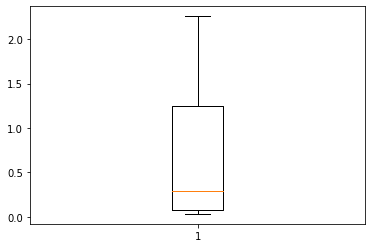

In [ ]:
plt.boxplot(D_avg_df_3['Monthly_avg_visits'])

In [ ]:
D_avg_df_3[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.000000,0.866671,1.000000
raw_visitor_counts,0.866671,1.000000,0.866671
Monthly_avg_visits,1.000000,0.866671,1.000000


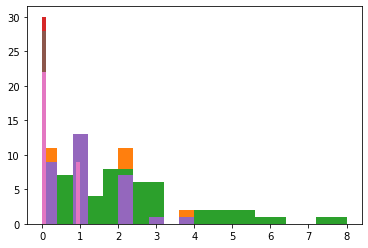

In [ ]:
for record in D_avg_df_3['visits_by_day']:
  plt.hist(record)

In [ ]:
D_pop_df_3 = D_GS_df_3[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
D_pop_df_3.head()

,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
2,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0]","{""Monday"":1,""Tuesday"":0,""Wednesday"":0,""Thursda..."
3,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,"[1,0,0,0,0,0,0,2,21,31,23,22,14,5,4,1,1,0,0,0,...","{""Monday"":9,""Tuesday"":9,""Wednesday"":7,""Thursda..."
20,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,"[1,2,2,2,1,3,8,18,22,32,33,30,20,9,4,3,3,1,1,0...","{""Monday"":9,""Tuesday"":12,""Wednesday"":19,""Thurs..."
30,DANK,3835 Elm ST,License Issued - Active,80207,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,"[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda..."
37,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-03-01 07:00:00+00:00,2018-04-01 06:00:00+00:00,"[2,2,3,1,0,1,3,4,6,3,10,12,4,1,0,0,0,0,2,5,5,2...","{""Monday"":5,""Tuesday"":5,""Wednesday"":5,""Thursda..."


In [ ]:
D_pop_df_3['popularity_by_hour'] = D_pop_df_3['popularity_by_hour'].transform(lambda x: literal_eval(x))
D_pop_df_3['Monthly_avg_pop'] = D_pop_df_3['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = D_pop_df_3[D_pop_df_3['Monthly_avg_pop'] == max(D_pop_df_3['Monthly_avg_pop'])]
min_avg_pop = D_pop_df_3[D_pop_df_3['Monthly_avg_pop'] == min(D_pop_df_3['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

    Trade Name  ... Monthly_avg_pop
20  BOTANICO 2  ...        8.291667

[1 rows x 9 columns]
   Trade Name  ... Monthly_avg_pop
30       DANK  ...        0.041667

[1 rows x 9 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84c276fd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84c284050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84c28b090>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84c284b10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84c27d590>,
  <matplotlib.lines.Line2D at 0x7fa84c27dad0>]}

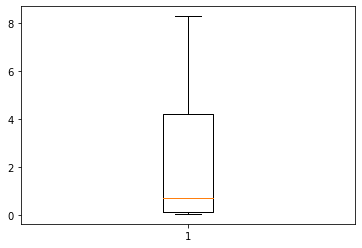

In [ ]:
plt.boxplot(D_pop_df_3['Monthly_avg_pop'])

(array([15.,  1.,  2.,  0.,  0.,  1.,  2.,  0.,  0.,  3.]),
 array([ 0. ,  3.3,  6.6,  9.9, 13.2, 16.5, 19.8, 23.1, 26.4, 29.7, 33. ]),
 <a list of 10 Patch objects>)

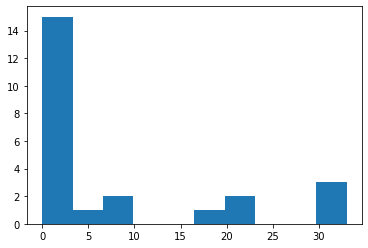

In [ ]:
plt.hist(D_pop_df_3[D_pop_df_3['Trade Name'] == 'BOTANICO 2']['popularity_by_hour'])

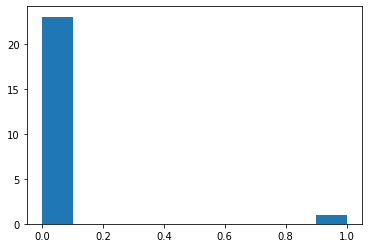

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)


###**April Analysis**

Visitor and Popularity analysis

In [ ]:
D_GS_df_4.head()

,address_placekey,placekey,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Address,region_x,safegraph_place_id,location_name,street_address,city,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
4,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,44,12,"[0,0,2,1,3,1,1,0,2,2,3,2,0,0,0,2,3,1,3,2,0,0,5...",80310014011,"{""080310006002"":4}","{""080310003022"":6,""080310009031"":4,""0803100140...","{""US"":14}",12997.0,132.0,"{""<5"":0,""5-10"":6,""11-20"":6,""21-60"":2,""61-120"":...",{},"{""King Soopers"":33,""Starbucks"":28,""ConocoPhill...","[0,0,0,0,0,0,0,1,18,27,30,33,19,11,5,3,0,0,0,0...","{""Monday"":12,""Tuesday"":8,""Wednesday"":8,""Thursd...","{""android"":4,""ios"":6}",4,5
21,224@5q9-bqp-q4v,224@5q9-bqp-q4v,2013-BFN-1068848,Retail Marijuana Store,"CANOSA PROPERTY INVESTMENTS, LLC",BOTANICO 2,License Issued - Active,1/1/2022 12:00:00 AM,777 CANOSA CT,CO,sg:fcc02b73e84244c296c436b71aabef19,Pando MED,777 Canosa Ct,Denver,80204,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,75,43,"[0,4,2,4,2,3,0,0,3,5,4,2,6,0,0,4,3,4,2,5,2,0,5...",80310008001,"{""080140308003"":4,""080310009021"":4,""0800100852...","{""080050077033"":5,""080310046031"":5,""0803100080...","{""US"":40}",12575.0,43.0,"{""<5"":2,""5-10"":16,""11-20"":7,""21-60"":18,""61-120...","{""ConocoPhillips"":33,""7-Eleven"":33,""Chipotle M...","{""ConocoPhillips"":41,""McDonald's"":39,""King Soo...","[0,0,0,0,0,1,9,16,26,33,31,34,18,13,10,3,0,2,0...","{""Monday"":18,""Tuesday"":16,""Wednesday"":12,""Thur...","{""android"":25,""ios"":17}",4,5
31,223@5q9-bg8-ht9,223@5q9-bg8-ht9,2013-BFN-1068866,Retail Marijuana Store,"JGB VENTURES, LLC",DANK,License Issued - Active,1/1/2022 12:00:00 AM,3835 Elm ST,CO,sg:0f832399588c47f7bf5ab9d04a4f8a75,DANK Colorado Adult Use,3835 Elm St,Denver,80207,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,1,1,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",80310041011,"{""080310041061"":4}",{},{},NaN,16.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":0,""61-120"":...",{},"{""Crescent Electric Supply (CESCO)"":100,""Expre...","[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda...","{""android"":0,""ios"":0}",4,5
38,222@5q9-9xb-qj9,222-222@5q9-9xb-qj9,2019-BFN-0007990,Retail Marijuana Store,GREEN CROSS LLC,GREEN CROSS OF CHERRY CREEK,License Issued - Active,3/5/2022 12:00:00 AM,3400 Oneida Way,CO,sg:e4cc58e040fe450ca02879ae87195ba8,Green Cross of Cherry Creek REC MED,3400 S Oneida Way,Denver,80224,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,27,24,"[2,1,2,1,0,0,3,1,1,0,0,0,1,0,2,1,1,2,4,0,1,1,1...",80310068122,"{""080050872002"":4,""080310068143"":4,""0800501510...","{""080310068093"":4,""080010083083"":4,""0803501411...","{""US"":20}",2695.0,13.0,"{""<5"":2,""5-10"":10,""11-20"":4,""21-60"":6,""61-120""...","{""King Soopers"":100}","{""King Soopers"":50,""ConocoPhillips"":33,""Starbu...","[0,0,0,1,0,0,1,4,3,5,3,8,2,0,2,2,0,0,1,2,2,3,3,2]","{""Monday"":5,""Tuesday"":3,""Wednesday"":3,""Thursda...","{""android"":13,""ios"":8}",4,5
50,224@5q9-bqs-dqf,224@5q9-bqs-dqf,2013-BFN-1070316,Retail Marijuana Store,CURE MEDICAL PHARM INC.,RIVERROCK,License Issued - Active,3/17/2022 12:00:00 AM,990 6TH AVE,CO,sg:02def300242e4ac48ca083a66d549e1c,RiverRock South,990 W 6th Ave,Denver,80204,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,3,3,"[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0...",80310021005,{},"{""080350140052"":5

In [ ]:
D_avg_df_4 = D_GS_df_4[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
D_avg_df_4.head()

,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
4,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,44,12,"[0,0,2,1,3,1,1,0,2,2,3,2,0,0,0,2,3,1,3,2,0,0,5..."
21,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,75,43,"[0,4,2,4,2,3,0,0,3,5,4,2,6,0,0,4,3,4,2,5,2,0,5..."
31,DANK,3835 Elm ST,License Issued - Active,80207,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,1,1,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
38,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,27,24,"[2,1,2,1,0,0,3,1,1,0,0,0,1,0,2,1,1,2,4,0,1,1,1..."
50,RIVERROCK,990 6TH AVE,License Issued - Active,80204,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,3,3,"[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0..."


In [ ]:
from ast import literal_eval
D_avg_df_4['visits_by_day'] = D_avg_df_4['visits_by_day'].transform(lambda x: literal_eval(x))
D_avg_df_4['Monthly_avg_visits'] = D_avg_df_4['visits_by_day'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
max_avg = D_avg_df_4[D_avg_df_4['Monthly_avg_visits'] == max(D_avg_df_4['Monthly_avg_visits'])]
min_avg = D_avg_df_4[D_avg_df_4['Monthly_avg_visits'] == min(D_avg_df_4['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

    Trade Name  ... Monthly_avg_visits
21  BOTANICO 2  ...                2.5

[1 rows x 10 columns]
   Trade Name  ... Monthly_avg_visits
31       DANK  ...           0.033333

[1 rows x 10 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84c0ef090>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84c0f5110>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84c0fe150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84c0f5bd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84c0ef650>,
  <matplotlib.lines.Line2D at 0x7fa84c0efb90>]}

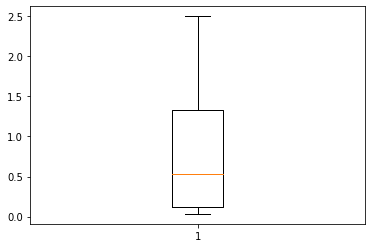

In [ ]:
plt.boxplot(D_avg_df_4['Monthly_avg_visits'])

In [ ]:
D_avg_df_4[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.00000,0.91189,1.00000
raw_visitor_counts,0.91189,1.00000,0.91189
Monthly_avg_visits,1.00000,0.91189,1.00000


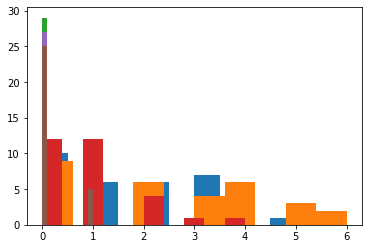

In [ ]:
for record in D_avg_df_4['visits_by_day']:
  plt.hist(record)

In [ ]:
D_pop_df_4 = D_GS_df_4[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
D_pop_df_4.head()

,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
4,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,"[0,0,0,0,0,0,0,1,18,27,30,33,19,11,5,3,0,0,0,0...","{""Monday"":12,""Tuesday"":8,""Wednesday"":8,""Thursd..."
21,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,"[0,0,0,0,0,1,9,16,26,33,31,34,18,13,10,3,0,2,0...","{""Monday"":18,""Tuesday"":16,""Wednesday"":12,""Thur..."
31,DANK,3835 Elm ST,License Issued - Active,80207,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,"[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda..."
38,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,"[0,0,0,1,0,0,1,4,3,5,3,8,2,0,2,2,0,0,1,2,2,3,3,2]","{""Monday"":5,""Tuesday"":3,""Wednesday"":3,""Thursda..."
50,RIVERROCK,990 6TH AVE,License Issued - Active,80204,2018-04-01 06:00:00+00:00,2018-05-01 06:00:00+00:00,"[0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0]","{""Monday"":0,""Tuesday"":2,""Wednesday"":0,""Thursda..."


In [ ]:
D_pop_df_4['popularity_by_hour'] = D_pop_df_4['popularity_by_hour'].transform(lambda x: literal_eval(x))
D_pop_df_4['Monthly_avg_pop'] = D_pop_df_4['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = D_pop_df_4[D_pop_df_4['Monthly_avg_pop'] == max(D_pop_df_4['Monthly_avg_pop'])]
min_avg_pop = D_pop_df_4[D_pop_df_4['Monthly_avg_pop'] == min(D_pop_df_4['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

    Trade Name  ... Monthly_avg_pop
21  BOTANICO 2  ...        8.291667

[1 rows x 9 columns]
   Trade Name  ... Monthly_avg_pop
31       DANK  ...        0.041667

[1 rows x 9 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84bf7a1d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84bf82210>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84bf89250>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84bf82cd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84bf7a750>,
  <matplotlib.lines.Line2D at 0x7fa84bf7ac90>]}

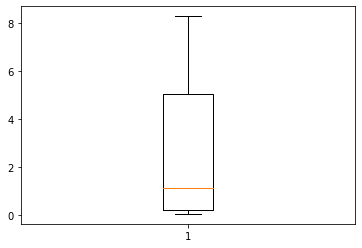

In [ ]:
plt.boxplot(D_pop_df_4['Monthly_avg_pop'])

(array([15.,  0.,  2.,  1.,  1.,  1.,  0.,  1.,  0.,  3.]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <a list of 10 Patch objects>)

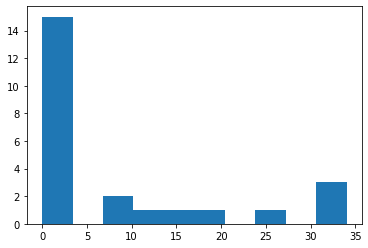

In [ ]:
plt.hist(D_pop_df_4[D_pop_df_4['Trade Name'] == 'BOTANICO 2']['popularity_by_hour'])

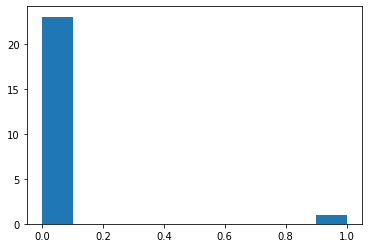

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)

###**May Analysis**

Visit and Popularity analysis

In [ ]:
D_GS_df_5.head()

,address_placekey,placekey,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Address,region_x,safegraph_place_id,location_name,street_address,city,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
5,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,53,16,"[1,2,0,0,0,0,2,7,2,2,4,1,0,2,2,1,5,4,1,0,2,1,1...",80310014011,"{""080050067051"":4}","{""080690018092"":5,""080590103033"":4,""0803100140...","{""US"":9}",15353.0,95.0,"{""<5"":0,""5-10"":13,""11-20"":3,""21-60"":8,""61-120""...","{""Lowe's Market"":100,""Taco Bell"":49}","{""Walmart"":54,""King Soopers"":44,""The Home Depo...","[0,0,0,0,0,0,0,0,22,37,33,31,16,8,4,2,1,0,1,1,...","{""Monday"":7,""Tuesday"":13,""Wednesday"":9,""Thursd...","{""android"":4,""ios"":5}",5,6
22,224@5q9-bqp-q4v,224@5q9-bqp-q4v,2013-BFN-1068848,Retail Marijuana Store,"CANOSA PROPERTY INVESTMENTS, LLC",BOTANICO 2,License Issued - Active,1/1/2022 12:00:00 AM,777 CANOSA CT,CO,sg:fcc02b73e84244c296c436b71aabef19,Pando MED,777 Canosa Ct,Denver,80204,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,54,36,"[1,3,1,5,0,0,0,2,3,1,2,0,0,2,1,5,4,2,0,1,1,2,2...",80310008001,"{""080140308003"":7,""081230017003"":4,""0800500670...",{},"{""US"":35}",10736.0,22.0,"{""<5"":1,""5-10"":21,""11-20"":2,""21-60"":12,""61-120...","{""Jimmy John's"":50,""The Home Depot"":49}","{""ConocoPhillips"":39,""Burger King"":34,""Taco Be...","[0,0,0,1,0,3,9,16,17,22,21,18,13,9,5,4,5,5,0,0...","{""Monday"":4,""Tuesday"":9,""Wednesday"":13,""Thursd...","{""android"":18,""ios"":17}",5,6
32,223@5q9-bg8-ht9,223@5q9-bg8-ht9,2013-BFN-1068866,Retail Marijuana Store,"JGB VENTURES, LLC",DANK,License Issued - Active,1/1/2022 12:00:00 AM,3835 Elm ST,CO,sg:0f832399588c47f7bf5ab9d04a4f8a75,DANK Colorado Adult Use,3835 Elm St,Denver,80207,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,2,2,"[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0...",80310041011,"{""170310207011"":4}",{},{},NaN,13.5,"{""<5"":0,""5-10"":0,""11-20"":2,""21-60"":0,""61-120"":...",{},"{""ProMedica"":50,""IAA"":50,""Quarles Fleet Fuelin...","[0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":1,""Wednesday"":0,""Thursda...","{""android"":0,""ios"":0}",5,6
39,222@5q9-9xb-qj9,222-222@5q9-9xb-qj9,2019-BFN-0007990,Retail Marijuana Store,GREEN CROSS LLC,GREEN CROSS OF CHERRY CREEK,License Issued - Active,3/5/2022 12:00:00 AM,3400 Oneida Way,CO,sg:e4cc58e040fe450ca02879ae87195ba8,Green Cross of Cherry Creek REC MED,3400 S Oneida Way,Denver,80224,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,37,31,"[1,1,1,2,3,0,2,0,0,1,0,2,0,4,0,1,0,2,0,1,2,2,2...",80310068122,"{""080050151001"":6,""080050837002"":5,""0803100680...","{""080010083083"":4,""080590111004"":4,""0800500685...","{""US"":26}",10498.0,13.0,"{""<5"":1,""5-10"":17,""11-20"":4,""21-60"":2,""61-120""...","{""YMCA"":50}","{""King Soopers"":35,""ConocoPhillips"":35,""Starbu...","[1,3,3,3,3,3,2,4,4,8,12,11,4,4,4,5,3,1,0,3,4,5...","{""Monday"":8,""Tuesday"":5,""Wednesday"":5,""Thursda...","{""android"":18,""ios"":13}",5,6
51,224@5q9-bqs-dqf,224@5q9-bqs-dqf,2013-BFN-1070316,Retail Marijuana Store,CURE MEDICAL PHARM INC.,RIVERROCK,License Issued - Active,3/17/2022 12:00:00 AM,990 6TH AVE,CO,sg:02def300242e4ac48ca083a66d549e1c,RiverRock South,990 W 6th Ave,Denver,80204,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,3,2,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0...",80310021005,{},"{""081230022071"":4}","{""US"":4}",NaN,39.0,"{""<5"

In [ ]:
D_avg_df_5 = D_GS_df_5[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
D_avg_df_5.head()

,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
5,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,53,16,"[1,2,0,0,0,0,2,7,2,2,4,1,0,2,2,1,5,4,1,0,2,1,1..."
22,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,54,36,"[1,3,1,5,0,0,0,2,3,1,2,0,0,2,1,5,4,2,0,1,1,2,2..."
32,DANK,3835 Elm ST,License Issued - Active,80207,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,2,2,"[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0..."
39,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,37,31,"[1,1,1,2,3,0,2,0,0,1,0,2,0,4,0,1,0,2,0,1,2,2,2..."
51,RIVERROCK,990 6TH AVE,License Issued - Active,80204,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,3,2,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0..."


In [ ]:
from ast import literal_eval
D_avg_df_5['visits_by_day'] = D_avg_df_5['visits_by_day'].transform(lambda x: literal_eval(x))
D_avg_df_5['Monthly_avg_visits'] = D_avg_df_5['visits_by_day'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
max_avg = D_avg_df_5[D_avg_df_5['Monthly_avg_visits'] == max(D_avg_df_5['Monthly_avg_visits'])]
min_avg = D_avg_df_5[D_avg_df_5['Monthly_avg_visits'] == min(D_avg_df_5['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

    Trade Name  ... Monthly_avg_visits
22  BOTANICO 2  ...           1.741935

[1 rows x 10 columns]
   Trade Name  ... Monthly_avg_visits
32       DANK  ...           0.064516

[1 rows x 10 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84bdef8d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84bdf3910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84bdfa950>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84bdfa410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84bdefe50>,
  <matplotlib.lines.Line2D at 0x7fa84bdf33d0>]}

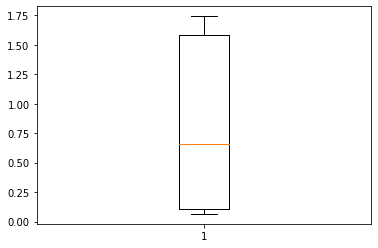

In [ ]:
plt.boxplot(D_avg_df_5['Monthly_avg_visits'])

In [ ]:
D_avg_df_5[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.000000,0.856547,1.000000
raw_visitor_counts,0.856547,1.000000,0.856547
Monthly_avg_visits,1.000000,0.856547,1.000000


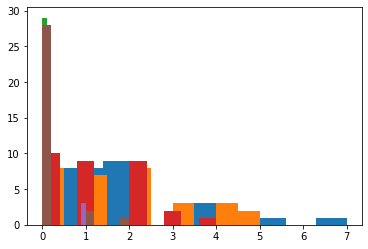

In [ ]:
for record in D_avg_df_5['visits_by_day']:
  plt.hist(record)

In [ ]:
D_pop_df_5 = D_GS_df_5[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
D_pop_df_5.head()

,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
5,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,"[0,0,0,0,0,0,0,0,22,37,33,31,16,8,4,2,1,0,1,1,...","{""Monday"":7,""Tuesday"":13,""Wednesday"":9,""Thursd..."
22,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,"[0,0,0,1,0,3,9,16,17,22,21,18,13,9,5,4,5,5,0,0...","{""Monday"":4,""Tuesday"":9,""Wednesday"":13,""Thursd..."
32,DANK,3835 Elm ST,License Issued - Active,80207,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,"[0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":1,""Wednesday"":0,""Thursda..."
39,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,"[1,3,3,3,3,3,2,4,4,8,12,11,4,4,4,5,3,1,0,3,4,5...","{""Monday"":8,""Tuesday"":5,""Wednesday"":5,""Thursda..."
51,RIVERROCK,990 6TH AVE,License Issued - Active,80204,2018-05-01 06:00:00+00:00,2018-06-01 06:00:00+00:00,"[0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":2,""Thursda..."


In [ ]:
D_pop_df_5['popularity_by_hour'] = D_pop_df_5['popularity_by_hour'].transform(lambda x: literal_eval(x))
D_pop_df_5['Monthly_avg_pop'] = D_pop_df_5['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = D_pop_df_5[D_pop_df_5['Monthly_avg_pop'] == max(D_pop_df_5['Monthly_avg_pop'])]
min_avg_pop = D_pop_df_5[D_pop_df_5['Monthly_avg_pop'] == min(D_pop_df_5['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

  Trade Name  ... Monthly_avg_pop
5    BUD BUM  ...        6.541667

[1 rows x 9 columns]
   Trade Name  ... Monthly_avg_pop
32       DANK  ...           0.125

[1 rows x 9 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84bc7bc10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84bc84c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84bc0cc90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84bc0c750>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84bc841d0>,
  <matplotlib.lines.Line2D at 0x7fa84bc84710>]}

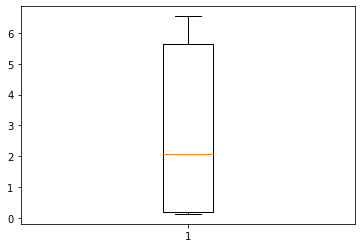

In [ ]:
plt.boxplot(D_pop_df_5['Monthly_avg_pop'])

(array([11.,  2.,  3.,  0.,  2.,  1.,  0.,  2.,  1.,  2.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

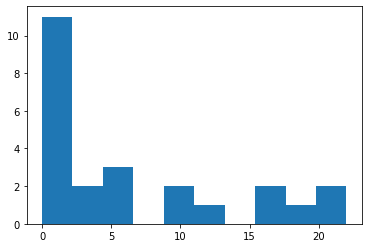

In [ ]:
plt.hist(D_pop_df_5[D_pop_df_5['Trade Name'] == 'BOTANICO 2']['popularity_by_hour'])

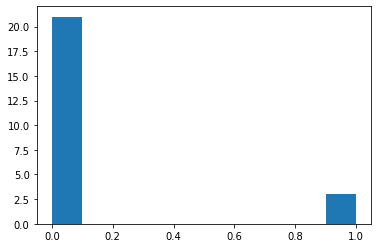

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)

###**June Analysis** 

Visitor and Popularity analysis

In [ ]:
D_GS_df_6.head()

,address_placekey,placekey,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Address,region_x,safegraph_place_id,location_name,street_address,city,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
6,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:4c2f25899b264b9285d61cc132e7e479,Amsterdam Cafe,1325 S Inca St,Denver,80223,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,2,1,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0...",80310014011,"{""080310046031"":4}",{},"{""US"":4}",NaN,45.5,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":2,""61-120"":...",{},"{""Leevers Supermarkets Inc."":100,""Hamburger St...","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda...","{""android"":0,""ios"":0}",6,7
7,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,49,16,"[2,0,0,3,3,1,4,1,0,2,0,3,1,0,2,0,0,4,4,3,5,3,0...",80310014011,"{""080350142021"":5,""080310009032"":4,""0800500750...","{""080310014011"":8,""080350142021"":4}","{""US"":14}",11761.0,86.0,"{""<5"":1,""5-10"":9,""11-20"":3,""21-60"":9,""61-120"":...","{""ConocoPhillips"":100,""T-Mobile"":33,""7-Eleven""...","{""King Soopers"":56,""Shell Oil"":39,""ConocoPhill...","[1,1,2,2,2,3,4,6,25,36,29,23,15,7,5,0,0,0,2,2,...","{""Monday"":8,""Tuesday"":11,""Wednesday"":6,""Thursd...","{""android"":8,""ios"":8}",6,7
23,224@5q9-bqp-q4v,224@5q9-bqp-q4v,2013-BFN-1068848,Retail Marijuana Store,"CANOSA PROPERTY INVESTMENTS, LLC",BOTANICO 2,License Issued - Active,1/1/2022 12:00:00 AM,777 CANOSA CT,CO,sg:fcc02b73e84244c296c436b71aabef19,Pando MED,777 Canosa Ct,Denver,80204,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,45,33,"[1,0,0,1,1,1,2,0,0,1,1,3,0,4,1,2,0,2,4,2,1,6,1...",80310008001,"{""080010085491"":5,""080590117273"":4,""0800100854...","{""080310119032"":4,""080310068142"":4,""2904702120...","{""US"":30}",16728.0,23.0,"{""<5"":0,""5-10"":14,""11-20"":5,""21-60"":15,""61-120...","{""LaMar's Donuts"":100,""King Soopers"":17}","{""The Home Depot"":45,""ConocoPhillips"":45,""Star...","[0,0,1,1,1,3,8,8,12,17,12,18,9,5,6,4,1,0,2,0,0...","{""Monday"":5,""Tuesday"":10,""Wednesday"":6,""Thursd...","{""android"":18,""ios"":12}",6,7
33,223@5q9-bg8-ht9,223@5q9-bg8-ht9,2013-BFN-1068866,Retail Marijuana Store,"JGB VENTURES, LLC",DANK,License Issued - Active,1/1/2022 12:00:00 AM,3835 Elm ST,CO,sg:0f832399588c47f7bf5ab9d04a4f8a75,DANK Colorado Adult Use,3835 Elm St,Denver,80207,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,1,1,"[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",80310041011,{},{},{},NaN,17.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":0,""61-120"":...",{},"{""Viewhouse"":100,""Daz Bog Coffee"":100,""Charles...","[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda...","{""android"":0,""ios"":0}",6,7
40,222@5q9-9xb-qj9,222-222@5q9-9xb-qj9,2019-BFN-0007990,Retail Marijuana Store,GREEN CROSS LLC,GREEN CROSS OF CHERRY CREEK,License Issued - Active,3/5/2022 12:00:00 AM,3400 Oneida Way,CO,sg:e4cc58e040fe450ca02879ae87195ba8,Green Cross of Cherry Creek REC MED,3400 S Oneida Way,Denver,80224,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,43,33,"[3,0,2,1,2,3,5,1,0,2,3,1,1,1,1,0,2,4,2,3,0,1,0...",80310068122,"{""080590109022"":4,""080310040033"":4,""0800500685...","{""080050862003"":5,""080310041071"":4,""080

In [ ]:
D_avg_df_6 = D_GS_df_6[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
D_avg_df_6.head()



,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
6,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,2,1,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0..."
7,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,49,16,"[2,0,0,3,3,1,4,1,0,2,0,3,1,0,2,0,0,4,4,3,5,3,0..."
23,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,45,33,"[1,0,0,1,1,1,2,0,0,1,1,3,0,4,1,2,0,2,4,2,1,6,1..."
33,DANK,3835 Elm ST,License Issued - Active,80207,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,1,1,"[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
40,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,43,33,"[3,0,2,1,2,3,5,1,0,2,3,1,1,1,1,0,2,4,2,3,0,1,0..."


In [ ]:
from ast import literal_eval
D_avg_df_6['visits_by_day'] = D_avg_df_6['visits_by_day'].transform(lambda x: literal_eval(x))
D_avg_df_6['Monthly_avg_visits'] = D_avg_df_6['visits_by_day'].transform(lambda x: sum(x)/len(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
max_avg = D_avg_df_6[D_avg_df_6['Monthly_avg_visits'] == max(D_avg_df_6['Monthly_avg_visits'])]
min_avg = D_avg_df_6[D_avg_df_6['Monthly_avg_visits'] == min(D_avg_df_6['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

  Trade Name  ... Monthly_avg_visits
7    BUD BUM  ...           1.633333

[1 rows x 10 columns]
   Trade Name  ... Monthly_avg_visits
33       DANK  ...           0.033333

[1 rows x 10 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84bafb7d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84bafe810>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84bb07850>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84bb07310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84bafbd50>,
  <matplotlib.lines.Line2D at 0x7fa84bafe2d0>]}

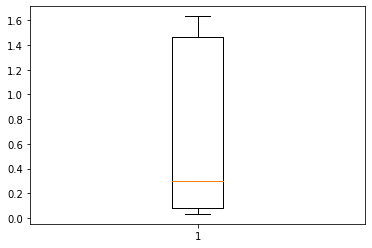

In [ ]:
plt.boxplot(D_avg_df_6['Monthly_avg_visits'])

In [ ]:
D_avg_df_6[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.000000,0.885551,1.000000
raw_visitor_counts,0.885551,1.000000,0.885551
Monthly_avg_visits,1.000000,0.885551,1.000000


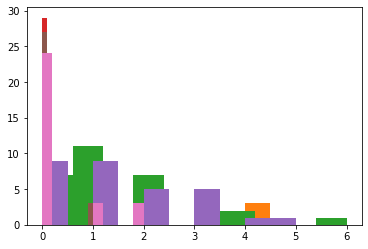

In [ ]:
for record in D_avg_df_6['visits_by_day']:
  plt.hist(record)

In [ ]:
D_pop_df_6 = D_GS_df_6[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
D_pop_df_6.head()

,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
6,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda..."
7,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,"[1,1,2,2,2,3,4,6,25,36,29,23,15,7,5,0,0,0,2,2,...","{""Monday"":8,""Tuesday"":11,""Wednesday"":6,""Thursd..."
23,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,"[0,0,1,1,1,3,8,8,12,17,12,18,9,5,6,4,1,0,2,0,0...","{""Monday"":5,""Tuesday"":10,""Wednesday"":6,""Thursd..."
33,DANK,3835 Elm ST,License Issued - Active,80207,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,"[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda..."
40,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-06-01 06:00:00+00:00,2018-07-01 06:00:00+00:00,"[0,0,1,1,1,1,1,2,5,7,10,11,4,3,3,2,1,1,1,1,3,5...","{""Monday"":8,""Tuesday"":5,""Wednesday"":8,""Thursda..."


In [ ]:
D_pop_df_6['popularity_by_hour'] = D_pop_df_6['popularity_by_hour'].transform(lambda x: literal_eval(x))
D_pop_df_6['Monthly_avg_pop'] = D_pop_df_6['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = D_pop_df_6[D_pop_df_6['Monthly_avg_pop'] == max(D_pop_df_6['Monthly_avg_pop'])]
min_avg_pop = D_pop_df_6[D_pop_df_6['Monthly_avg_pop'] == min(D_pop_df_6['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

  Trade Name  ... Monthly_avg_pop
7    BUD BUM  ...           7.125

[1 rows x 9 columns]
   Trade Name  ... Monthly_avg_pop
33       DANK  ...        0.041667

[1 rows x 9 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84b91fc90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84b928cd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84b92cd10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84b92c7d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84b928250>,
  <matplotlib.lines.Line2D at 0x7fa84b928790>]}

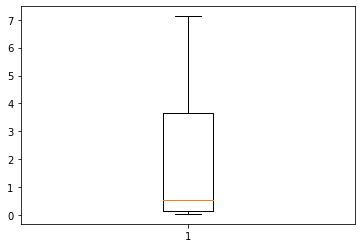

In [ ]:
plt.boxplot(D_pop_df_6['Monthly_avg_pop'])

(array([12.,  2.,  2.,  1.,  2.,  1.,  2.,  0.,  0.,  2.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <a list of 10 Patch objects>)

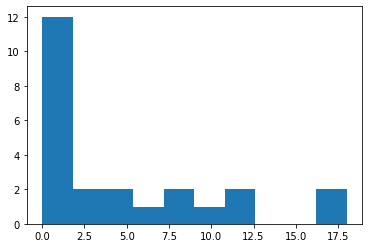

In [ ]:
plt.hist(D_pop_df_6[D_pop_df_6['Trade Name'] == 'BOTANICO 2']['popularity_by_hour'])

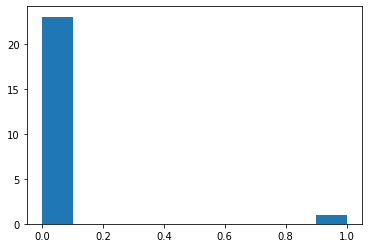

In [ ]:

for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)

###**July Analysis**

Visitor and Population Analysis

In [ ]:
D_GS_df_7.head()

,address_placekey,placekey,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Address,region_x,safegraph_place_id,location_name,street_address,city,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
8,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:4c2f25899b264b9285d61cc132e7e479,Amsterdam Cafe,1325 S Inca St,Denver,80223,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,3,3,"[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",80310014011,{},"{""080310046031"":4}",{},NaN,83.0,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":0,""61-120"":...",{},"{""ConocoPhillips"":66,""O'Reilly Auto Parts"":66,...","[2,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,2,3,2]","{""Monday"":1,""Tuesday"":1,""Wednesday"":0,""Thursda...","{""android"":0,""ios"":4}",7,8
9,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,38,12,"[2,4,3,1,1,0,0,0,1,1,0,1,2,0,0,4,1,1,3,2,3,0,2...",80310014011,"{""080590117113"":4}","{""080310014011"":4,""080050835003"":4,""0805901171...","{""US"":12}",11557.0,135.5,"{""<5"":0,""5-10"":7,""11-20"":4,""21-60"":3,""61-120"":...",{},"{""ConocoPhillips"":41,""Phillips 66"":41,""Burger ...","[0,0,0,0,0,1,2,2,11,28,25,23,15,12,5,1,1,1,0,1...","{""Monday"":12,""Tuesday"":7,""Wednesday"":3,""Thursd...","{""android"":9,""ios"":4}",7,8
24,224@5q9-bqp-q4v,224@5q9-bqp-q4v,2013-BFN-1068848,Retail Marijuana Store,"CANOSA PROPERTY INVESTMENTS, LLC",BOTANICO 2,License Issued - Active,1/1/2022 12:00:00 AM,777 CANOSA CT,CO,sg:fcc02b73e84244c296c436b71aabef19,Pando MED,777 Canosa Ct,Denver,80204,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,44,33,"[1,0,2,1,0,2,0,1,4,3,1,3,4,1,1,2,0,1,1,1,0,1,0...",80310008001,"{""080590117103"":4,""080310036012"":4,""0803101560...","{""050879604001"":5,""081230020141"":4,""0803100060...","{""US"":31}",15242.0,17.5,"{""<5"":2,""5-10"":16,""11-20"":5,""21-60"":11,""61-120...","{""Del Taco"":100,""Pilot Flying J"":100,""The Home...","{""ConocoPhillips"":39,""McDonald's"":37,""Walmart""...","[0,0,0,0,0,5,10,10,13,12,16,10,5,1,3,3,2,3,0,0...","{""Monday"":7,""Tuesday"":9,""Wednesday"":7,""Thursda...","{""android"":19,""ios"":15}",7,8
41,222@5q9-9xb-qj9,222-222@5q9-9xb-qj9,2019-BFN-0007990,Retail Marijuana Store,GREEN CROSS LLC,GREEN CROSS OF CHERRY CREEK,License Issued - Active,3/5/2022 12:00:00 AM,3400 Oneida Way,CO,sg:e4cc58e040fe450ca02879ae87195ba8,Green Cross of Cherry Creek REC MED,3400 S Oneida Way,Denver,80224,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,34,27,"[0,2,2,0,1,3,1,1,0,2,1,3,1,0,1,0,1,1,2,1,1,1,2...",80310068122,"{""080310068094"":4,""080310031022"":4,""0803100681...","{""080310070061"":4,""080310068095"":4,""0803100681...","{""US"":25}",2464.0,12.5,"{""<5"":1,""5-10"":15,""11-20"":4,""21-60"":8,""61-120""...","{""McDonald's"":97}","{""Starbucks"":37,""Walmart"":36,""ConocoPhillips"":...","[1,1,0,0,1,2,2,9,8,7,5,6,4,3,1,2,1,0,0,2,3,4,1,1]","{""Monday"":4,""Tuesday"":7,""Wednesday"":3,""Thursda...","{""android"":18,""ios"":9}",7,8
53,224@5q9-bqs-dqf,224@5q9-bqs-dqf,2013-BFN-1070316,Retail Marijuana Store,CURE MEDICAL PHARM INC.,RIVERROCK,License Issued - Active,3/17/2022 12:00:00 AM,990 6TH AVE,CO,sg:02def300242e4ac48ca083a66d549e1c,RiverRock South,990 W 6th Ave,Denver,80204,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,3,3,"[1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0...",80310021005,{},{},"{""US"":4}",NaN,9.0

In [ ]:
D_avg_df_7 = D_GS_df_7[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
D_avg_df_7.head()

,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
8,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,3,3,"[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
9,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,38,12,"[2,4,3,1,1,0,0,0,1,1,0,1,2,0,0,4,1,1,3,2,3,0,2..."
24,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,44,33,"[1,0,2,1,0,2,0,1,4,3,1,3,4,1,1,2,0,1,1,1,0,1,0..."
41,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,34,27,"[0,2,2,0,1,3,1,1,0,2,1,3,1,0,1,0,1,1,2,1,1,1,2..."
53,RIVERROCK,990 6TH AVE,License Issued - Active,80204,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,3,3,"[1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0..."


In [ ]:
from ast import literal_eval
D_avg_df_7['visits_by_day'] = D_avg_df_7['visits_by_day'].transform(lambda x: literal_eval(x))
D_avg_df_7['Monthly_avg_visits'] = D_avg_df_7['visits_by_day'].transform(lambda x: sum(x)/len(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:

max_avg = D_avg_df_7[D_avg_df_7['Monthly_avg_visits'] == max(D_avg_df_7['Monthly_avg_visits'])]
min_avg = D_avg_df_7[D_avg_df_7['Monthly_avg_visits'] == min(D_avg_df_7['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

    Trade Name  ... Monthly_avg_visits
24  BOTANICO 2  ...           1.419355

[1 rows x 10 columns]
   Trade Name  ... Monthly_avg_visits
8     BUD BUM  ...           0.096774
53  RIVERROCK  ...           0.096774

[2 rows x 10 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84b798e90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84b7a0ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84b7a7f10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84b7a79d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84b7a0450>,
  <matplotlib.lines.Line2D at 0x7fa84b7a0990>]}

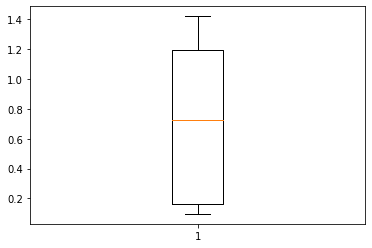

In [ ]:
plt.boxplot(D_avg_df_7['Monthly_avg_visits'])

In [ ]:
D_avg_df_7[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.000000,0.866526,1.000000
raw_visitor_counts,0.866526,1.000000,0.866526
Monthly_avg_visits,1.000000,0.866526,1.000000


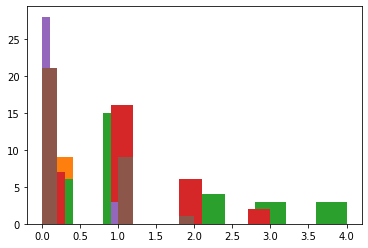

In [ ]:
for record in D_avg_df_7['visits_by_day']:
  plt.hist(record)

In [ ]:
D_pop_df_7 = D_GS_df_7[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
D_pop_df_7.head()

,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
8,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,"[2,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,2,3,2]","{""Monday"":1,""Tuesday"":1,""Wednesday"":0,""Thursda..."
9,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,"[0,0,0,0,0,1,2,2,11,28,25,23,15,12,5,1,1,1,0,1...","{""Monday"":12,""Tuesday"":7,""Wednesday"":3,""Thursd..."
24,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,"[0,0,0,0,0,5,10,10,13,12,16,10,5,1,3,3,2,3,0,0...","{""Monday"":7,""Tuesday"":9,""Wednesday"":7,""Thursda..."
41,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,"[1,1,0,0,1,2,2,9,8,7,5,6,4,3,1,2,1,0,0,2,3,4,1,1]","{""Monday"":4,""Tuesday"":7,""Wednesday"":3,""Thursda..."
53,RIVERROCK,990 6TH AVE,License Issued - Active,80204,2018-07-01 06:00:00+00:00,2018-08-01 06:00:00+00:00,"[0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,1,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda..."


In [ ]:
D_pop_df_7['popularity_by_hour'] = D_pop_df_7['popularity_by_hour'].transform(lambda x: literal_eval(x))
D_pop_df_7['Monthly_avg_pop'] = D_pop_df_7['popularity_by_hour'].transform(lambda x: sum(x)/len(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = D_pop_df_7[D_pop_df_7['Monthly_avg_pop'] == max(D_pop_df_7['Monthly_avg_pop'])]
min_avg_pop = D_pop_df_7[D_pop_df_7['Monthly_avg_pop'] == min(D_pop_df_7['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

  Trade Name  ... Monthly_avg_pop
9    BUD BUM  ...             5.5

[1 rows x 9 columns]
   Trade Name  ... Monthly_avg_pop
53  RIVERROCK  ...        0.166667

[1 rows x 9 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84b625ed0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84b62af10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84b632f50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84b632a10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84b62a490>,
  <matplotlib.lines.Line2D at 0x7fa84b62a9d0>]}

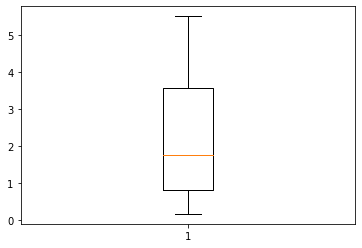

In [ ]:
plt.boxplot(D_pop_df_7['Monthly_avg_pop'])

(array([12.,  4.,  0.,  2.,  0.,  0.,  3.,  1.,  1.,  1.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 Patch objects>)

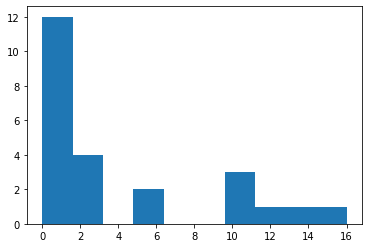

In [ ]:
plt.hist(D_pop_df_7[D_pop_df_7['Trade Name'] == 'BOTANICO 2']['popularity_by_hour'])

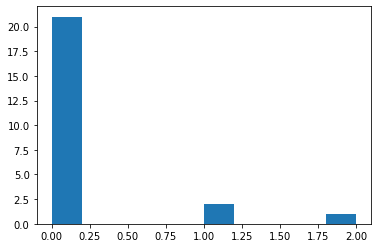

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)

###**August Analysis**

Visitor and Popularity analysis

In [ ]:
D_GS_df_8.head()

,address_placekey,placekey,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Address,region_x,safegraph_place_id,location_name,street_address,city,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
10,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:4c2f25899b264b9285d61cc132e7e479,Amsterdam Cafe,1325 S Inca St,Denver,80223,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,1,1,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0...",80310014011,{},{},NaN,NaN,1024.0,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":0,""61-120"":...",{},{},"[1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1]","{""Monday"":0,""Tuesday"":0,""Wednesday"":1,""Thursda...","{""android"":0,""ios"":0}",8,9
11,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,30,12,"[0,0,3,0,0,1,0,4,2,1,0,1,1,0,2,1,1,1,0,1,1,1,1...",80310014011,{},"{""080310014011"":6}","{""US"":6}",13803.0,133.5,"{""<5"":0,""5-10"":8,""11-20"":2,""21-60"":3,""61-120"":...","{""T-Mobile"":100}","{""King Soopers"":33,""ConocoPhillips"":24,""NAPA A...","[3,2,2,2,2,3,4,4,15,18,15,15,9,4,2,1,1,1,3,4,3...","{""Monday"":4,""Tuesday"":3,""Wednesday"":9,""Thursda...","{""android"":6,""ios"":4}",8,9
25,224@5q9-bqp-q4v,224@5q9-bqp-q4v,2013-BFN-1068848,Retail Marijuana Store,"CANOSA PROPERTY INVESTMENTS, LLC",BOTANICO 2,License Issued - Active,1/1/2022 12:00:00 AM,777 CANOSA CT,CO,sg:fcc02b73e84244c296c436b71aabef19,Pando MED,777 Canosa Ct,Denver,80204,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,42,34,"[2,0,4,1,1,1,1,0,0,0,0,1,2,1,2,1,1,0,0,1,1,2,4...",80310008001,"{""080310154001"":4,""080050807003"":4,""0803100708...","{""080310008001"":4,""080310068095"":4}","{""US"":32}",14452.0,12.5,"{""<5"":0,""5-10"":17,""11-20"":6,""21-60"":12,""61-120...","{""King Soopers"":100}","{""ConocoPhillips"":52,""The Home Depot"":37,""King...","[0,0,0,0,0,0,0,2,7,14,15,13,8,8,9,4,8,2,0,0,0,...","{""Monday"":8,""Tuesday"":6,""Wednesday"":8,""Thursda...","{""android"":18,""ios"":15}",8,9
34,223@5q9-bg8-ht9,223@5q9-bg8-ht9,2013-BFN-1068866,Retail Marijuana Store,"JGB VENTURES, LLC",DANK,License Issued - Active,1/1/2022 12:00:00 AM,3835 Elm ST,CO,sg:0f832399588c47f7bf5ab9d04a4f8a75,DANK Colorado Adult Use,3835 Elm St,Denver,80207,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,1,1,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0...",80310041011,{},{},"{""US"":4}",NaN,15.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":0,""61-120"":...",{},"{""Bradley Petroleum"":100,""Snarf's Sandwiches"":...","[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda...","{""android"":0,""ios"":0}",8,9
42,222@5q9-9xb-qj9,222-222@5q9-9xb-qj9,2019-BFN-0007990,Retail Marijuana Store,GREEN CROSS LLC,GREEN CROSS OF CHERRY CREEK,License Issued - Active,3/5/2022 12:00:00 AM,3400 Oneida Way,CO,sg:e4cc58e040fe450ca02879ae87195ba8,Green Cross of Cherry Creek REC MED,3400 S Oneida Way,Denver,80224,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,31,21,"[1,2,0,0,0,2,0,0,0,1,0,2,2,2,1,1,2,2,1,0,1,1,1...",80310068122,"{""080310068133"":6,""080050833002"":4,""0800508020...","{""080050833002"":4,""080590104062"":4,""0803100703...","{""US"":19}",6034.0,30.0,"{""<5"":0,""5-10"":8,""11-20"":4,""21-60"":7,""61-120"":...","{""Arby's"":50,""7-Eleven"":49}","{""Starbucks"":54,""ConocoPhillips"":33,""King Soop...","[4,2,2,2,2,2,3,7,7,5,4,

In [ ]:
D_avg_df_8 = D_GS_df_8[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
D_avg_df_8.head()

,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
10,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,1,1,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0..."
11,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,30,12,"[0,0,3,0,0,1,0,4,2,1,0,1,1,0,2,1,1,1,0,1,1,1,1..."
25,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,42,34,"[2,0,4,1,1,1,1,0,0,0,0,1,2,1,2,1,1,0,0,1,1,2,4..."
34,DANK,3835 Elm ST,License Issued - Active,80207,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,1,1,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0..."
42,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,31,21,"[1,2,0,0,0,2,0,0,0,1,0,2,2,2,1,1,2,2,1,0,1,1,1..."


In [ ]:
from ast import literal_eval
D_avg_df_8['visits_by_day'] = D_avg_df_8['visits_by_day'].transform(lambda x: literal_eval(x))
D_avg_df_8['Monthly_avg_visits'] = D_avg_df_8['visits_by_day'].transform(lambda x: sum(x)/len(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
max_avg = D_avg_df_8[D_avg_df_8['Monthly_avg_visits'] == max(D_avg_df_8['Monthly_avg_visits'])]
min_avg = D_avg_df_8[D_avg_df_8['Monthly_avg_visits'] == min(D_avg_df_8['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

    Trade Name  ... Monthly_avg_visits
25  BOTANICO 2  ...           1.354839

[1 rows x 10 columns]
   Trade Name  ... Monthly_avg_visits
10    BUD BUM  ...           0.032258
34       DANK  ...           0.032258

[2 rows x 10 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84b4b9290>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84b4c02d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84b4c8310>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84b4c0d90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84b4b9810>,
  <matplotlib.lines.Line2D at 0x7fa84b4b9d50>]}

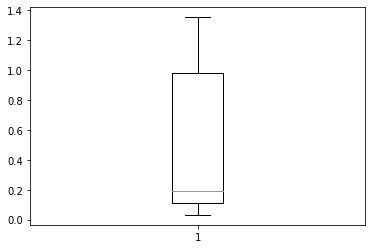

In [ ]:
plt.boxplot(D_avg_df_8['Monthly_avg_visits'])

In [ ]:
D_avg_df_8[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.00000,0.94301,1.00000
raw_visitor_counts,0.94301,1.00000,0.94301
Monthly_avg_visits,1.00000,0.94301,1.00000


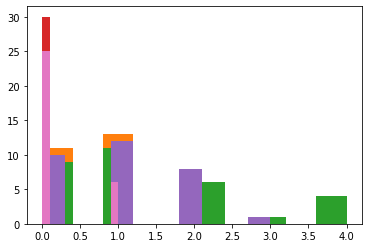

In [ ]:
for record in D_avg_df_8['visits_by_day']:
  plt.hist(record)

In [ ]:
D_pop_df_8 = D_GS_df_8[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
D_pop_df_8.head()

,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
10,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,"[1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1]","{""Monday"":0,""Tuesday"":0,""Wednesday"":1,""Thursda..."
11,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,"[3,2,2,2,2,3,4,4,15,18,15,15,9,4,2,1,1,1,3,4,3...","{""Monday"":4,""Tuesday"":3,""Wednesday"":9,""Thursda..."
25,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,"[0,0,0,0,0,0,0,2,7,14,15,13,8,8,9,4,8,2,0,0,0,...","{""Monday"":8,""Tuesday"":6,""Wednesday"":8,""Thursda..."
34,DANK,3835 Elm ST,License Issued - Active,80207,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,"[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda..."
42,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-08-01 06:00:00+00:00,2018-09-01 06:00:00+00:00,"[4,2,2,2,2,2,3,7,7,5,4,11,3,2,2,4,4,1,0,3,2,3,...","{""Monday"":7,""Tuesday"":5,""Wednesday"":3,""Thursda..."


In [ ]:
D_pop_df_8['popularity_by_hour'] = D_pop_df_8['popularity_by_hour'].transform(lambda x: literal_eval(x))
D_pop_df_8['Monthly_avg_pop'] = D_pop_df_8['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = D_pop_df_8[D_pop_df_8['Monthly_avg_pop'] == max(D_pop_df_8['Monthly_avg_pop'])]
min_avg_pop = D_pop_df_8[D_pop_df_8['Monthly_avg_pop'] == min(D_pop_df_8['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

   Trade Name  ... Monthly_avg_pop
11    BUD BUM  ...        4.958333

[1 rows x 9 columns]
   Trade Name  ... Monthly_avg_pop
34       DANK  ...        0.041667

[1 rows x 9 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84b2dff50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84b2e7f90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84b2eefd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84b2eea90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84b2e7510>,
  <matplotlib.lines.Line2D at 0x7fa84b2e7a50>]}

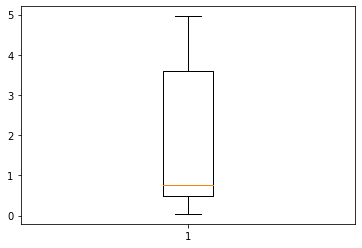

In [ ]:
plt.boxplot(D_pop_df_8['Monthly_avg_pop'])

(array([13.,  2.,  1.,  0.,  1.,  3.,  1.,  0.,  1.,  2.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

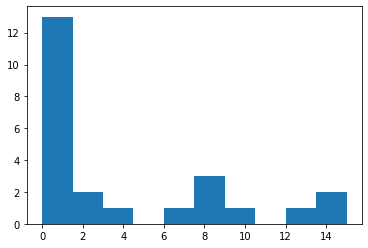

In [ ]:
plt.hist(D_pop_df_8[D_pop_df_8['Trade Name'] == 'BOTANICO 2']['popularity_by_hour'])

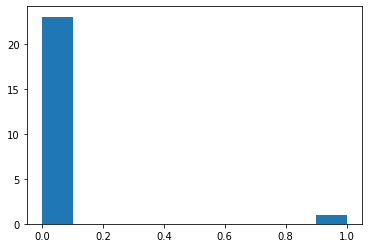

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)


###**September Analysis**

Visitor and Population analysis

In [ ]:
D_GS_df_9.head()

,address_placekey,placekey,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Address,region_x,safegraph_place_id,location_name,street_address,city,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
12,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:4c2f25899b264b9285d61cc132e7e479,Amsterdam Cafe,1325 S Inca St,Denver,80223,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,3,1,"[0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0...",80310014011,"{""080310014011"":4}",{},{},NaN,552.0,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":0,""61-120"":...",{},"{""Superior Pool Products"":100,""King Soopers"":1...","[2,2,3,3,3,3,3,3,3,2,2,2,1,1,1,1,1,1,0,0,1,1,1,1]","{""Monday"":0,""Tuesday"":1,""Wednesday"":1,""Thursda...","{""android"":0,""ios"":0}",9,10
13,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,30,9,"[0,0,0,2,2,3,2,0,0,1,1,0,1,1,0,0,0,1,0,1,1,0,0...",80310014011,"{""080350141151"":4,""080310014011"":4,""0803501411...","{""080310014011"":4}","{""US"":10}",13803.0,157.5,"{""<5"":0,""5-10"":8,""11-20"":0,""21-60"":3,""61-120"":...","{""Chipotle Mexican Grill"":50}","{""King Soopers"":55,""McDonald's"":55,""Target"":40...","[1,1,1,1,1,1,1,4,18,24,22,18,12,7,3,2,0,0,0,0,...","{""Monday"":4,""Tuesday"":9,""Wednesday"":4,""Thursda...","{""android"":4,""ios"":6}",9,10
26,224@5q9-bqp-q4v,224@5q9-bqp-q4v,2013-BFN-1068848,Retail Marijuana Store,"CANOSA PROPERTY INVESTMENTS, LLC",BOTANICO 2,License Issued - Active,1/1/2022 12:00:00 AM,777 CANOSA CT,CO,sg:fcc02b73e84244c296c436b71aabef19,Pando MED,777 Canosa Ct,Denver,80204,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,65,42,"[0,0,0,6,6,2,3,1,0,2,2,1,1,9,3,0,1,5,3,1,2,1,2...",80310008001,"{""080310041061"":4,""080310040052"":4,""0800508200...","{""080690017092"":4,""201730063001"":4,""0803100410...","{""US"":39}",17566.0,20.0,"{""<5"":0,""5-10"":27,""11-20"":8,""21-60"":9,""61-120""...","{""Superior Pool Products"":17,""Starbucks"":10}","{""ConocoPhillips"":47,""King Soopers"":31,""The Ho...","[0,0,1,1,0,1,5,13,19,29,25,24,22,9,11,6,1,2,1,...","{""Monday"":3,""Tuesday"":14,""Wednesday"":15,""Thurs...","{""android"":26,""ios"":17}",9,10
43,222@5q9-9xb-qj9,222-222@5q9-9xb-qj9,2019-BFN-0007990,Retail Marijuana Store,GREEN CROSS LLC,GREEN CROSS OF CHERRY CREEK,License Issued - Active,3/5/2022 12:00:00 AM,3400 Oneida Way,CO,sg:e4cc58e040fe450ca02879ae87195ba8,Green Cross of Cherry Creek REC MED,3400 S Oneida Way,Denver,80224,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,53,32,"[2,2,2,4,3,4,2,4,2,5,3,3,4,1,0,0,0,1,2,0,2,1,1...",80310068122,"{""080050814003"":4,""080590101002"":4,""0800100860...","{""080310068092"":8,""080310068104"":4,""0803100270...","{""US"":31}",8002.0,21.0,"{""<5"":0,""5-10"":17,""11-20"":9,""21-60"":12,""61-120...","{""Carpet One Floor & Home"":50,""Wendy's"":24}","{""Starbucks"":36,""King Soopers"":34,""McDonald's""...","[2,2,2,2,1,2,3,2,6,3,6,12,3,1,4,4,7,5,7,8,7,5,...","{""Monday"":8,""Tuesday"":9,""Wednesday"":8,""Thursda...","{""android"":19,""ios"":13}",9,10
55,224@5q9-bqs-dqf,224@5q9-bqs-dqf,2013-BFN-1070316,Retail Marijuana Store,CURE MEDICAL PHARM INC.,RIVERROCK,License Issued - Active,3/17/2022 12:00:00 AM,990 6TH AVE,CO,sg:02def300242e4ac48ca083a66d549e1c,RiverRock South,990 W 6th Ave,Denver,80204,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,7,7,"[0,0,0,0,0,0,2,0,0,0,0,1,0,0,

In [ ]:
D_avg_df_9 = D_GS_df_9[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
D_avg_df_9.head()

,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
12,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,3,1,"[0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0..."
13,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,30,9,"[0,0,0,2,2,3,2,0,0,1,1,0,1,1,0,0,0,1,0,1,1,0,0..."
26,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,65,42,"[0,0,0,6,6,2,3,1,0,2,2,1,1,9,3,0,1,5,3,1,2,1,2..."
43,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,53,32,"[2,2,2,4,3,4,2,4,2,5,3,3,4,1,0,0,0,1,2,0,2,1,1..."
55,RIVERROCK,990 6TH AVE,License Issued - Active,80204,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,7,7,"[0,0,0,0,0,0,2,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0..."


In [ ]:
from ast import literal_eval
D_avg_df_9['visits_by_day'] = D_avg_df_9['visits_by_day'].transform(lambda x: literal_eval(x))
D_avg_df_9['Monthly_avg_visits'] = D_avg_df_9['visits_by_day'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:

max_avg = D_avg_df_9[D_avg_df_9['Monthly_avg_visits'] == max(D_avg_df_9['Monthly_avg_visits'])]
min_avg = D_avg_df_9[D_avg_df_9['Monthly_avg_visits'] == min(D_avg_df_9['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

    Trade Name  ... Monthly_avg_visits
26  BOTANICO 2  ...           2.166667

[1 rows x 10 columns]
   Trade Name  ... Monthly_avg_visits
12    BUD BUM  ...                0.1

[1 rows x 10 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84b15d550>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84b165590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84b16c5d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84b16c090>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84b15dad0>,
  <matplotlib.lines.Line2D at 0x7fa84b165050>]}

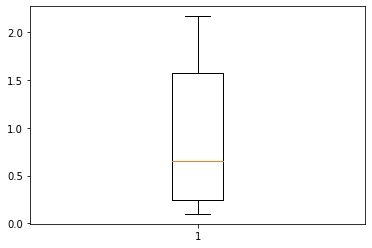

In [ ]:
plt.boxplot(D_avg_df_9['Monthly_avg_visits'])

In [ ]:
D_avg_df_9[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.000000,0.966907,1.000000
raw_visitor_counts,0.966907,1.000000,0.966907
Monthly_avg_visits,1.000000,0.966907,1.000000


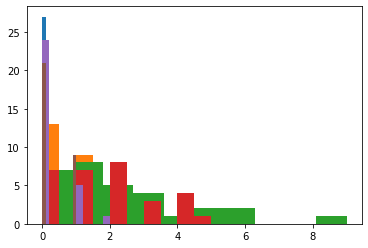

In [ ]:
for record in D_avg_df_9['visits_by_day']:
  plt.hist(record)

In [ ]:
D_pop_df_9 = D_GS_df_9[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
D_pop_df_9.head()

,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
12,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,"[2,2,3,3,3,3,3,3,3,2,2,2,1,1,1,1,1,1,0,0,1,1,1,1]","{""Monday"":0,""Tuesday"":1,""Wednesday"":1,""Thursda..."
13,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,"[1,1,1,1,1,1,1,4,18,24,22,18,12,7,3,2,0,0,0,0,...","{""Monday"":4,""Tuesday"":9,""Wednesday"":4,""Thursda..."
26,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,"[0,0,1,1,0,1,5,13,19,29,25,24,22,9,11,6,1,2,1,...","{""Monday"":3,""Tuesday"":14,""Wednesday"":15,""Thurs..."
43,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,"[2,2,2,2,1,2,3,2,6,3,6,12,3,1,4,4,7,5,7,8,7,5,...","{""Monday"":8,""Tuesday"":9,""Wednesday"":8,""Thursda..."
55,RIVERROCK,990 6TH AVE,License Issued - Active,80204,2018-09-01 06:00:00+00:00,2018-10-01 06:00:00+00:00,"[0,1,0,0,0,0,0,0,1,3,3,1,0,0,0,0,0,0,0,1,1,0,0,0]","{""Monday"":0,""Tuesday"":1,""Wednesday"":2,""Thursda..."


In [ ]:
D_pop_df_9['popularity_by_hour'] = D_pop_df_9['popularity_by_hour'].transform(lambda x: literal_eval(x))
D_pop_df_9['Monthly_avg_pop'] = D_pop_df_9['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = D_pop_df_9[D_pop_df_9['Monthly_avg_pop'] == max(D_pop_df_9['Monthly_avg_pop'])]
min_avg_pop = D_pop_df_9[D_pop_df_9['Monthly_avg_pop'] == min(D_pop_df_9['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

    Trade Name  ... Monthly_avg_pop
26  BOTANICO 2  ...           7.125

[1 rows x 9 columns]
   Trade Name  ... Monthly_avg_pop
55  RIVERROCK  ...        0.458333

[1 rows x 9 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84afd2d10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84afd7d50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84afded90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84afde850>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84afd72d0>,
  <matplotlib.lines.Line2D at 0x7fa84afd7810>]}

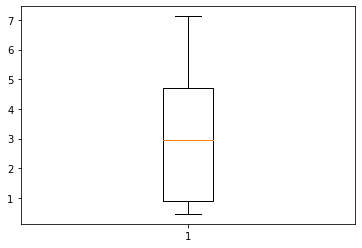

In [ ]:
plt.boxplot(D_pop_df_9['Monthly_avg_pop'])

(array([14.,  1.,  1.,  2.,  1.,  0.,  1.,  1.,  2.,  1.]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ]),
 <a list of 10 Patch objects>)

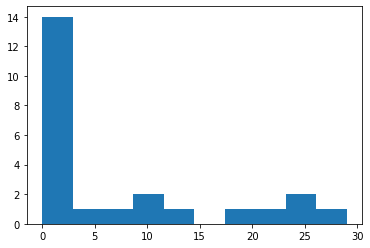

In [ ]:
plt.hist(D_pop_df_9[D_pop_df_9['Trade Name'] == 'BOTANICO 2']['popularity_by_hour'])

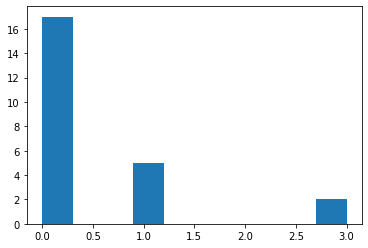

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)


###**October Analysis**

Visitor and Population Analysis

In [ ]:
D_GS_df_10.head()

,address_placekey,placekey,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Address,region_x,safegraph_place_id,location_name,street_address,city,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
14,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,46,8,"[1,2,2,2,2,0,1,3,1,3,1,2,0,0,1,2,4,2,2,0,0,2,1...",80310014011,"{""081170001002"":4}",{},"{""US"":4}",17838.0,136.5,"{""<5"":0,""5-10"":7,""11-20"":4,""21-60"":2,""61-120"":...","{""Sprouts Farmers Market"":100,""Ross Stores"":10...","{""King Soopers"":50,""Target"":33,""Shell Oil"":32,...","[0,0,0,0,0,0,1,2,29,41,32,24,15,12,2,0,0,0,0,0...","{""Monday"":8,""Tuesday"":9,""Wednesday"":12,""Thursd...","{""android"":0,""ios"":4}",10,11
27,224@5q9-bqp-q4v,224@5q9-bqp-q4v,2013-BFN-1068848,Retail Marijuana Store,"CANOSA PROPERTY INVESTMENTS, LLC",BOTANICO 2,License Issued - Active,1/1/2022 12:00:00 AM,777 CANOSA CT,CO,sg:fcc02b73e84244c296c436b71aabef19,Pando MED,777 Canosa Ct,Denver,80204,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,81,48,"[4,4,3,2,7,0,0,3,4,3,3,6,1,1,2,2,1,1,5,3,1,2,0...",80310008001,"{""080590117311"":4,""080130122034"":4,""0805901160...","{""080590118061"":5,""080010092042"":4,""0803501391...","{""US"":46}",14322.0,17.0,"{""<5"":4,""5-10"":27,""11-20"":12,""21-60"":12,""61-12...","{""Arby's"":33,""Vasa Fitness"":25}","{""ConocoPhillips"":35,""King Soopers"":33,""The Ho...","[0,0,0,1,0,2,4,14,22,31,37,34,23,11,13,4,4,2,3...","{""Monday"":14,""Tuesday"":13,""Wednesday"":17,""Thur...","{""android"":34,""ios"":12}",10,11
44,222@5q9-9xb-qj9,222-222@5q9-9xb-qj9,2019-BFN-0007990,Retail Marijuana Store,GREEN CROSS LLC,GREEN CROSS OF CHERRY CREEK,License Issued - Active,3/5/2022 12:00:00 AM,3400 Oneida Way,CO,sg:e4cc58e040fe450ca02879ae87195ba8,Green Cross of Cherry Creek REC MED,3400 S Oneida Way,Denver,80224,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,32,18,"[0,2,1,0,1,2,0,0,0,3,0,1,2,0,0,1,2,1,1,1,5,3,3...",80310068122,"{""080310068114"":4,""080310068092"":4,""0800508730...","{""080050873001"":4,""080050067073"":4}","{""US"":18}",4572.0,29.5,"{""<5"":0,""5-10"":5,""11-20"":9,""21-60"":5,""61-120"":...",{},"{""McDonald's"":55,""King Soopers"":55,""Starbucks""...","[3,3,3,3,3,3,3,4,4,6,7,7,4,6,5,4,8,7,4,7,7,5,4,3]","{""Monday"":3,""Tuesday"":6,""Wednesday"":6,""Thursda...","{""android"":8,""ios"":8}",10,11
56,224@5q9-bqs-dqf,224@5q9-bqs-dqf,2013-BFN-1070316,Retail Marijuana Store,CURE MEDICAL PHARM INC.,RIVERROCK,License Issued - Active,3/17/2022 12:00:00 AM,990 6TH AVE,CO,sg:02def300242e4ac48ca083a66d549e1c,RiverRock South,990 W 6th Ave,Denver,80204,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,2,2,"[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0...",80310021005,{},{},"{""US"":4}",NaN,30.0,"{""<5"":0,""5-10"":1,""11-20"":0,""21-60"":1,""61-120"":...",{},"{""Buffalo Wild Wings"":99,""Target"":95,""Native R...","[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda...","{""android"":0,""ios"":0}",10,11
68,225@5q9-bqr-rkz,225@5q9-bqr-rkz,2017-BFN-0009334,Retail Marijuana Store,RIA HOLDINGS LIMITED,LAUGHING GRASS,License Issued - Active,6/25/2021 12:00:00 AM,1110 Virginia Ave,CO,sg:69a2cb1c37fb4270b3d8aeeb3f3e41ce,Laughing Grass,1110 W Virginia Ave,Denver,80223,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,5,4,"[1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1...",80310013022,"{""080310046011"":4}",{},"{""US"":4}",NaN,10.0,"{""<5"":0,""5-

In [ ]:
D_avg_df_10 = D_GS_df_10[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
D_avg_df_10.head()

,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
14,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,46,8,"[1,2,2,2,2,0,1,3,1,3,1,2,0,0,1,2,4,2,2,0,0,2,1..."
27,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,81,48,"[4,4,3,2,7,0,0,3,4,3,3,6,1,1,2,2,1,1,5,3,1,2,0..."
44,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,32,18,"[0,2,1,0,1,2,0,0,0,3,0,1,2,0,0,1,2,1,1,1,5,3,3..."
56,RIVERROCK,990 6TH AVE,License Issued - Active,80204,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,2,2,"[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0..."
68,LAUGHING GRASS,1110 Virginia Ave,License Issued - Active,80223,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,5,4,"[1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1..."


In [ ]:
from ast import literal_eval
D_avg_df_10['visits_by_day'] = D_avg_df_10['visits_by_day'].transform(lambda x: literal_eval(x))
D_avg_df_10['Monthly_avg_visits'] = D_avg_df_10['visits_by_day'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
max_avg = D_avg_df_10[D_avg_df_10['Monthly_avg_visits'] == max(D_avg_df_10['Monthly_avg_visits'])]
min_avg = D_avg_df_10[D_avg_df_10['Monthly_avg_visits'] == min(D_avg_df_10['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

    Trade Name  ... Monthly_avg_visits
27  BOTANICO 2  ...           2.612903

[1 rows x 10 columns]
   Trade Name  ... Monthly_avg_visits
56  RIVERROCK  ...           0.064516

[1 rows x 10 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84ae5e510>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84ae62550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84ae6b590>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84ae6b050>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84ae5ea90>,
  <matplotlib.lines.Line2D at 0x7fa84ae5efd0>]}

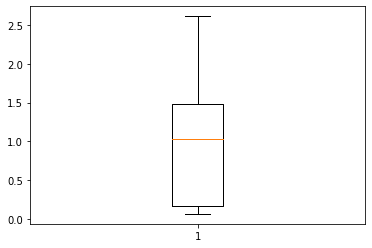

In [ ]:
plt.boxplot(D_avg_df_10['Monthly_avg_visits'])

In [ ]:
D_avg_df_10[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.000000,0.895069,1.000000
raw_visitor_counts,0.895069,1.000000,0.895069
Monthly_avg_visits,1.000000,0.895069,1.000000


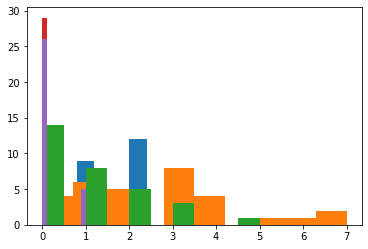

In [ ]:
for record in D_avg_df_10['visits_by_day']:
  plt.hist(record)

In [ ]:
D_pop_df_10 = D_GS_df_10[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
D_pop_df_10.head()

,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
14,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,"[0,0,0,0,0,0,1,2,29,41,32,24,15,12,2,0,0,0,0,0...","{""Monday"":8,""Tuesday"":9,""Wednesday"":12,""Thursd..."
27,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,"[0,0,0,1,0,2,4,14,22,31,37,34,23,11,13,4,4,2,3...","{""Monday"":14,""Tuesday"":13,""Wednesday"":17,""Thur..."
44,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,"[3,3,3,3,3,3,3,4,4,6,7,7,4,6,5,4,8,7,4,7,7,5,4,3]","{""Monday"":3,""Tuesday"":6,""Wednesday"":6,""Thursda..."
56,RIVERROCK,990 6TH AVE,License Issued - Active,80204,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,"[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda..."
68,LAUGHING GRASS,1110 Virginia Ave,License Issued - Active,80223,2018-10-01 06:00:00+00:00,2018-11-01 06:00:00+00:00,"[0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1]","{""Monday"":1,""Tuesday"":2,""Wednesday"":1,""Thursda..."


In [ ]:
D_pop_df_10['popularity_by_hour'] = D_pop_df_10['popularity_by_hour'].transform(lambda x: literal_eval(x))
D_pop_df_10['Monthly_avg_pop'] = D_pop_df_10['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = D_pop_df_10[D_pop_df_10['Monthly_avg_pop'] == max(D_pop_df_10['Monthly_avg_pop'])]
min_avg_pop = D_pop_df_10[D_pop_df_10['Monthly_avg_pop'] == min(D_pop_df_10['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

    Trade Name  ... Monthly_avg_pop
27  BOTANICO 2  ...        8.541667

[1 rows x 9 columns]
   Trade Name  ... Monthly_avg_pop
56  RIVERROCK  ...        0.083333

[1 rows x 9 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84ad4b5d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84accf650>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84acd6650>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84acd6150>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84ad4bb90>,
  <matplotlib.lines.Line2D at 0x7fa84accf110>]}

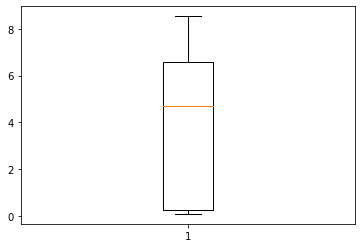

In [ ]:
plt.boxplot(D_pop_df_10['Monthly_avg_pop'])

(array([13.,  3.,  1.,  2.,  0.,  1.,  1.,  0.,  1.,  2.]),
 array([ 0. ,  3.7,  7.4, 11.1, 14.8, 18.5, 22.2, 25.9, 29.6, 33.3, 37. ]),
 <a list of 10 Patch objects>)

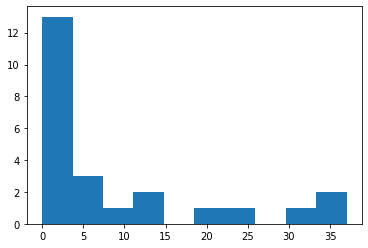

In [ ]:
plt.hist(D_pop_df_10[D_pop_df_10['Trade Name'] == 'BOTANICO 2']['popularity_by_hour'])

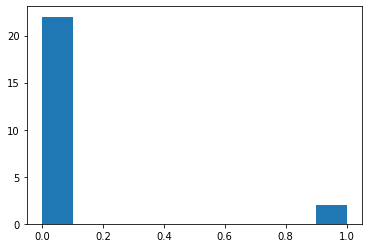

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)

###**November Analysis** 

Visitor and Population Analysis

In [ ]:
D_GS_df_11.head()

,address_placekey,placekey,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Address,region_x,safegraph_place_id,location_name,street_address,city,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
15,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:4c2f25899b264b9285d61cc132e7e479,Amsterdam Cafe,1325 S Inca St,Denver,80223,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,1,1,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0...",80310014011,{},{},{},NaN,14.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":0,""61-120"":...",{},"{""InTown Suites"":100,""Office Depot"":99,""Philli...","[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda...","{""android"":0,""ios"":0}",11,12
16,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,43,16,"[4,2,1,0,1,2,0,4,3,0,0,0,1,3,1,1,0,2,4,1,1,0,0...",80310014011,"{""080050835003"":4,""080050075002"":4}","{""080310003022"":4,""080050835003"":4,""0803100140...","{""US"":6}",14021.0,198.0,"{""<5"":1,""5-10"":6,""11-20"":1,""21-60"":1,""61-120"":...","{""Dairy Queen"":50}","{""King Soopers"":31,""McDonald's"":26,""Starbucks""...","[2,2,1,2,3,4,5,5,24,34,33,28,17,8,3,2,0,0,0,0,...","{""Monday"":6,""Tuesday"":6,""Wednesday"":7,""Thursda...","{""android"":11,""ios"":9}",11,12
28,224@5q9-bqp-q4v,224@5q9-bqp-q4v,2013-BFN-1068848,Retail Marijuana Store,"CANOSA PROPERTY INVESTMENTS, LLC",BOTANICO 2,License Issued - Active,1/1/2022 12:00:00 AM,777 CANOSA CT,CO,sg:fcc02b73e84244c296c436b71aabef19,Pando MED,777 Canosa Ct,Denver,80204,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,74,50,"[3,4,0,0,3,0,4,2,4,2,1,1,4,1,3,5,1,0,7,6,5,0,3...",80310008001,"{""360594065012"":4,""080310047003"":4,""0800100852...","{""080050074001"":6,""080310009051"":5,""0804100510...","{""US"":48}",15967.0,13.0,"{""<5"":1,""5-10"":31,""11-20"":11,""21-60"":8,""61-120...","{""T-Mobile"":50,""Dillard's"":33,""Marco's Pizza"":...","{""ConocoPhillips"":37,""7-Eleven"":37,""The Home D...","[0,0,0,0,1,0,4,9,13,22,27,28,20,8,10,7,3,3,1,0...","{""Monday"":13,""Tuesday"":12,""Wednesday"":14,""Thur...","{""android"":37,""ios"":13}",11,12
45,222@5q9-9xb-qj9,222-222@5q9-9xb-qj9,2019-BFN-0007990,Retail Marijuana Store,GREEN CROSS LLC,GREEN CROSS OF CHERRY CREEK,License Issued - Active,3/5/2022 12:00:00 AM,3400 Oneida Way,CO,sg:e4cc58e040fe450ca02879ae87195ba8,Green Cross of Cherry Creek REC MED,3400 S Oneida Way,Denver,80224,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,40,29,"[1,4,3,1,2,0,1,1,0,1,2,4,1,1,1,1,0,2,1,1,0,0,1...",80310068122,"{""080310068143"":4,""080050854003"":4,""0803100680...","{""080590098522"":8,""080310068092"":4,""0800100854...","{""US"":28}",9051.0,14.0,"{""<5"":0,""5-10"":17,""11-20"":8,""21-60"":8,""61-120""...","{""Whole Foods Market"":100,""Starbucks"":98}","{""Starbucks"":58,""King Soopers"":41,""ConocoPhill...","[0,0,0,0,0,0,0,2,4,3,2,16,7,3,7,1,3,1,1,4,3,1,...","{""Monday"":8,""Tuesday"":4,""Wednesday"":3,""Thursda...","{""android"":19,""ios"":11}",11,12
57,224@5q9-bqs-dqf,224@5q9-bqs-dqf,2013-BFN-1070316,Retail Marijuana Store,CURE MEDICAL PHARM INC.,RIVERROCK,License Issued - Active,3/17/2022 12:00:00 AM,990 6TH AVE,CO,sg:02def300242e4ac48ca083a66d549e1c,RiverRock South,990 W 6th Ave,Denver,80204,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,4,3,"[1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1

In [ ]:
D_avg_df_11 = D_GS_df_11[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
D_avg_df_11.head()

,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
15,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,1,1,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0..."
16,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,43,16,"[4,2,1,0,1,2,0,4,3,0,0,0,1,3,1,1,0,2,4,1,1,0,0..."
28,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,74,50,"[3,4,0,0,3,0,4,2,4,2,1,1,4,1,3,5,1,0,7,6,5,0,3..."
45,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,40,29,"[1,4,3,1,2,0,1,1,0,1,2,4,1,1,1,1,0,2,1,1,0,0,1..."
57,RIVERROCK,990 6TH AVE,License Issued - Active,80204,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,4,3,"[1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0..."


In [ ]:
from ast import literal_eval
D_avg_df_11['visits_by_day'] = D_avg_df_11['visits_by_day'].transform(lambda x: literal_eval(x))
D_avg_df_11['Monthly_avg_visits'] = D_avg_df_11['visits_by_day'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
max_avg = D_avg_df_11[D_avg_df_11['Monthly_avg_visits'] == max(D_avg_df_11['Monthly_avg_visits'])]
min_avg = D_avg_df_11[D_avg_df_11['Monthly_avg_visits'] == min(D_avg_df_11['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

    Trade Name  ... Monthly_avg_visits
28  BOTANICO 2  ...           2.466667

[1 rows x 10 columns]
   Trade Name  ... Monthly_avg_visits
15    BUD BUM  ...           0.033333

[1 rows x 10 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84abb95d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84abbf610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84abc8650>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84abc8110>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84abb9b50>,
  <matplotlib.lines.Line2D at 0x7fa84abbf0d0>]}

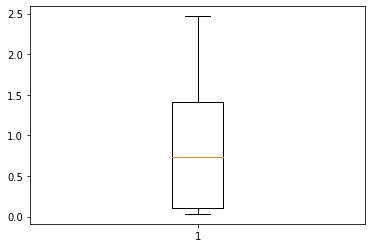

In [ ]:
plt.boxplot(D_avg_df_11['Monthly_avg_visits'])

In [ ]:
D_avg_df_11[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.000000,0.960558,1.000000
raw_visitor_counts,0.960558,1.000000,0.960558
Monthly_avg_visits,1.000000,0.960558,1.000000


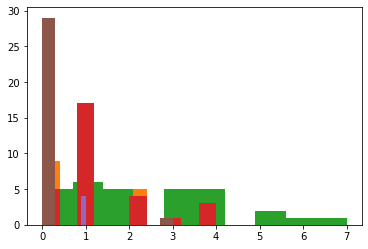

In [ ]:
for record in D_avg_df_11['visits_by_day']:
  plt.hist(record)

In [ ]:
D_pop_df_11 = D_GS_df_11[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
D_pop_df_11.head()

,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
15,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,"[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda..."
16,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,"[2,2,1,2,3,4,5,5,24,34,33,28,17,8,3,2,0,0,0,0,...","{""Monday"":6,""Tuesday"":6,""Wednesday"":7,""Thursda..."
28,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,"[0,0,0,0,1,0,4,9,13,22,27,28,20,8,10,7,3,3,1,0...","{""Monday"":13,""Tuesday"":12,""Wednesday"":14,""Thur..."
45,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,"[0,0,0,0,0,0,0,2,4,3,2,16,7,3,7,1,3,1,1,4,3,1,...","{""Monday"":8,""Tuesday"":4,""Wednesday"":3,""Thursda..."
57,RIVERROCK,990 6TH AVE,License Issued - Active,80204,2018-11-01 06:00:00+00:00,2018-12-01 07:00:00+00:00,"[0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0]","{""Monday"":1,""Tuesday"":1,""Wednesday"":0,""Thursda..."


In [ ]:
D_pop_df_11['popularity_by_hour'] = D_pop_df_11['popularity_by_hour'].transform(lambda x: literal_eval(x))
D_pop_df_11['Monthly_avg_pop'] = D_pop_df_11['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = D_pop_df_11[D_pop_df_11['Monthly_avg_pop'] == max(D_pop_df_11['Monthly_avg_pop'])]
min_avg_pop = D_pop_df_11[D_pop_df_11['Monthly_avg_pop'] == min(D_pop_df_11['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

   Trade Name  ... Monthly_avg_pop
16    BUD BUM  ...        7.458333

[1 rows x 9 columns]
   Trade Name  ... Monthly_avg_pop
15    BUD BUM  ...        0.041667

[1 rows x 9 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84aa41cd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84aa46d10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84a9cdd50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84a9cd810>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84aa46290>,
  <matplotlib.lines.Line2D at 0x7fa84aa467d0>]}

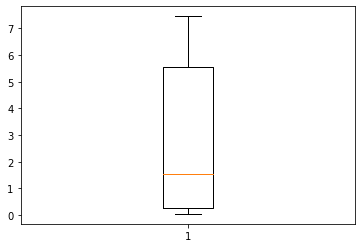

In [ ]:
plt.boxplot(D_pop_df_11['Monthly_avg_pop'])

(array([12.,  3.,  2.,  2.,  1.,  0.,  0.,  2.,  0.,  2.]),
 array([ 0. ,  2.8,  5.6,  8.4, 11.2, 14. , 16.8, 19.6, 22.4, 25.2, 28. ]),
 <a list of 10 Patch objects>)

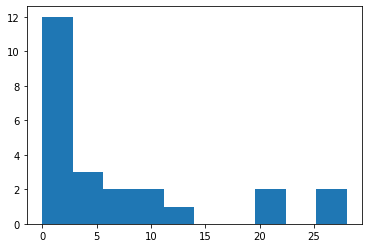

In [ ]:
plt.hist(D_pop_df_11[D_pop_df_11['Trade Name'] == 'BOTANICO 2']['popularity_by_hour'])

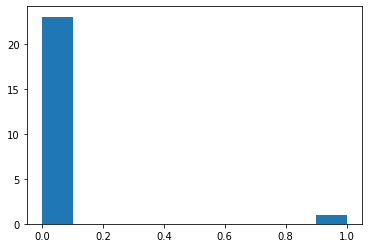

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)

###**December Analysis**

Visitor and Population Analysis

In [ ]:
D_GS_df_12.head()

,address_placekey,placekey,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Address,region_x,safegraph_place_id,location_name,street_address,city,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end
17,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,41,11,"[1,0,1,3,3,1,2,0,0,3,4,1,2,1,0,1,0,1,4,1,3,0,0...",80310014011,{},{},"{""US"":10}",17270.0,187.0,"{""<5"":1,""5-10"":4,""11-20"":1,""21-60"":4,""61-120"":...","{""Wendy's"":49,""Hyatt Regency"":33,""Sam's Club F...","{""King Soopers"":73,""Walmart"":55,""Chipotle Mexi...","[0,0,0,0,0,1,2,4,25,32,33,27,21,16,7,5,1,0,0,0...","{""Monday"":7,""Tuesday"":8,""Wednesday"":9,""Thursda...","{""android"":4,""ios"":8}",12,1
29,224@5q9-bqp-q4v,224@5q9-bqp-q4v,2013-BFN-1068848,Retail Marijuana Store,"CANOSA PROPERTY INVESTMENTS, LLC",BOTANICO 2,License Issued - Active,1/1/2022 12:00:00 AM,777 CANOSA CT,CO,sg:fcc02b73e84244c296c436b71aabef19,Pando MED,777 Canosa Ct,Denver,80204,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,65,30,"[2,0,1,4,5,0,5,1,1,2,1,1,3,7,0,0,3,5,2,3,3,2,1...",80310008001,"{""080310008001"":5,""080310044042"":4,""0803100230...","{""080590104031"":4,""080410069021"":4,""0803100080...","{""US"":28}",13154.0,20.0,"{""<5"":1,""5-10"":25,""11-20"":7,""21-60"":8,""61-120""...","{""Kum & Go"":100}","{""Walmart"":49,""King Soopers"":43,""7-Eleven"":40,...","[1,1,1,1,1,1,8,10,16,25,24,23,20,11,9,10,9,3,2...","{""Monday"":9,""Tuesday"":10,""Wednesday"":12,""Thurs...","{""android"":21,""ios"":9}",12,1
46,222@5q9-9xb-qj9,222-222@5q9-9xb-qj9,2019-BFN-0007990,Retail Marijuana Store,GREEN CROSS LLC,GREEN CROSS OF CHERRY CREEK,License Issued - Active,3/5/2022 12:00:00 AM,3400 Oneida Way,CO,sg:e4cc58e040fe450ca02879ae87195ba8,Green Cross of Cherry Creek REC MED,3400 S Oneida Way,Denver,80224,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,78,40,"[1,0,2,1,7,4,4,6,2,1,3,0,1,0,5,3,3,3,6,2,3,2,2...",80310068122,"{""080050868004"":5,""080310040041"":4,""0803100690...","{""080310068092"":4,""080310017022"":4,""0812300250...","{""US"":39}",9345.0,21.0,"{""<5"":6,""5-10"":23,""11-20"":8,""21-60"":20,""61-120...","{""The Home Depot"":24,""Starbucks"":23}","{""Starbucks"":50,""King Soopers"":40,""McDonald's""...","[9,10,8,8,9,9,10,11,10,10,8,14,7,4,5,10,7,6,7,...","{""Monday"":13,""Tuesday"":8,""Wednesday"":14,""Thurs...","{""android"":21,""ios"":21}",12,1
58,224@5q9-bqs-dqf,224@5q9-bqs-dqf,2013-BFN-1070316,Retail Marijuana Store,CURE MEDICAL PHARM INC.,RIVERROCK,License Issued - Active,3/17/2022 12:00:00 AM,990 6TH AVE,CO,sg:02def300242e4ac48ca083a66d549e1c,RiverRock South,990 W 6th Ave,Denver,80204,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,3,3,"[0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1...",80310021005,"{""080410076012"":4}",{},"{""US"":4}",NaN,9.0,"{""<5"":0,""5-10"":2,""11-20"":0,""21-60"":1,""61-120"":...","{""Wingstop"":100}","{""King Soopers"":100,""Costco Wholesale Corp."":9...","[0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda...","{""android"":4,""ios"":4}",12,1
70,225@5q9-bqr-rkz,225@5q9-bqr-rkz,2017-BFN-0009334,Retail Marijuana Store,RIA HOLDINGS LIMITED,LAUGHING GRASS,License Issued - Active,6/25/2021 12:00:00 AM,1110 Virginia Ave,CO,sg:69a2cb1c37fb4270b3d8aeeb3f3e41ce,Laughing Grass,1110 W Virginia Ave,Denver,80223,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,2,2,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0...",80310013022,{},"{""08

In [ ]:
D_avg_df_12 = D_GS_df_12[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day']]
D_avg_df_12.head()

,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day
17,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,41,11,"[1,0,1,3,3,1,2,0,0,3,4,1,2,1,0,1,0,1,4,1,3,0,0..."
29,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,65,30,"[2,0,1,4,5,0,5,1,1,2,1,1,3,7,0,0,3,5,2,3,3,2,1..."
46,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,78,40,"[1,0,2,1,7,4,4,6,2,1,3,0,1,0,5,3,3,3,6,2,3,2,2..."
58,RIVERROCK,990 6TH AVE,License Issued - Active,80204,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,3,3,"[0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1..."
70,LAUGHING GRASS,1110 Virginia Ave,License Issued - Active,80223,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,2,2,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0..."


In [ ]:
from ast import literal_eval
D_avg_df_12['visits_by_day'] = D_avg_df_12['visits_by_day'].transform(lambda x: literal_eval(x))
D_avg_df_12['Monthly_avg_visits'] = D_avg_df_12['visits_by_day'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
max_avg = D_avg_df_12[D_avg_df_12['Monthly_avg_visits'] == max(D_avg_df_12['Monthly_avg_visits'])]
min_avg = D_avg_df_12[D_avg_df_12['Monthly_avg_visits'] == min(D_avg_df_12['Monthly_avg_visits'])]
print(max_avg)
print(min_avg)

                     Trade Name  ... Monthly_avg_visits
46  GREEN CROSS OF CHERRY CREEK  ...           2.516129

[1 rows x 10 columns]
        Trade Name  ... Monthly_avg_visits
70  LAUGHING GRASS  ...           0.064516

[1 rows x 10 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84a8b7310>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84a8bd350>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84a8c4390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84a8bde10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84a8b7890>,
  <matplotlib.lines.Line2D at 0x7fa84a8b7dd0>]}

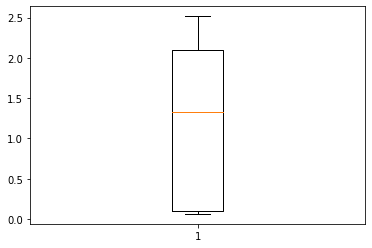

In [ ]:
plt.boxplot(D_avg_df_12['Monthly_avg_visits'])

In [ ]:
D_avg_df_12[['raw_visit_counts','raw_visitor_counts','Monthly_avg_visits']].corr()

,raw_visit_counts,raw_visitor_counts,Monthly_avg_visits
raw_visit_counts,1.000000,0.963887,1.000000
raw_visitor_counts,0.963887,1.000000,0.963887
Monthly_avg_visits,1.000000,0.963887,1.000000


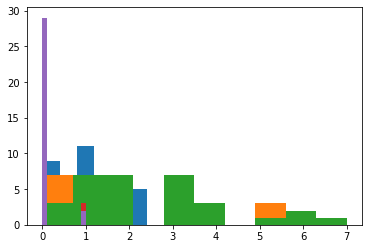

In [ ]:
for record in D_avg_df_12['visits_by_day']:
  plt.hist(record)

In [ ]:
D_pop_df_12 = D_GS_df_12[['Trade Name','Address','Current License Status','postal_code','date_range_start','date_range_end','popularity_by_hour','popularity_by_day']]
D_pop_df_12.head()

,Trade Name,Address,Current License Status,postal_code,date_range_start,date_range_end,popularity_by_hour,popularity_by_day
17,BUD BUM,1325 INCA ST,License Issued - Active,80223,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,"[0,0,0,0,0,1,2,4,25,32,33,27,21,16,7,5,1,0,0,0...","{""Monday"":7,""Tuesday"":8,""Wednesday"":9,""Thursda..."
29,BOTANICO 2,777 CANOSA CT,License Issued - Active,80204,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,"[1,1,1,1,1,1,8,10,16,25,24,23,20,11,9,10,9,3,2...","{""Monday"":9,""Tuesday"":10,""Wednesday"":12,""Thurs..."
46,GREEN CROSS OF CHERRY CREEK,3400 Oneida Way,License Issued - Active,80224,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,"[9,10,8,8,9,9,10,11,10,10,8,14,7,4,5,10,7,6,7,...","{""Monday"":13,""Tuesday"":8,""Wednesday"":14,""Thurs..."
58,RIVERROCK,990 6TH AVE,License Issued - Active,80204,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,"[0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda..."
70,LAUGHING GRASS,1110 Virginia Ave,License Issued - Active,80223,2018-12-01 07:00:00+00:00,2019-01-01 07:00:00+00:00,"[0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda..."


In [ ]:
D_pop_df_12['popularity_by_hour'] = D_pop_df_12['popularity_by_hour'].transform(lambda x: literal_eval(x))
D_pop_df_12['Monthly_avg_pop'] = D_pop_df_12['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_avg_pop = D_pop_df_12[D_pop_df_12['Monthly_avg_pop'] == max(D_pop_df_12['Monthly_avg_pop'])]
min_avg_pop = D_pop_df_12[D_pop_df_12['Monthly_avg_pop'] == min(D_pop_df_12['Monthly_avg_pop'])]
print(max_avg_pop)
print(min_avg_pop)

                     Trade Name  ... Monthly_avg_pop
46  GREEN CROSS OF CHERRY CREEK  ...        9.333333

[1 rows x 9 columns]
   Trade Name  ... Monthly_avg_pop
58  RIVERROCK  ...           0.125

[1 rows x 9 columns]


{'boxes': [<matplotlib.lines.Line2D at 0x7fa84a7263d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa84a72b410>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa84a732450>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa84a72bed0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa84a726950>,
  <matplotlib.lines.Line2D at 0x7fa84a726e90>]}

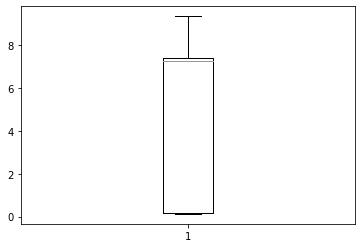

In [ ]:
plt.boxplot(D_pop_df_12['Monthly_avg_pop'])

(array([12.,  1.,  0.,  3.,  3.,  0.,  1.,  0.,  1.,  3.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 10 Patch objects>)

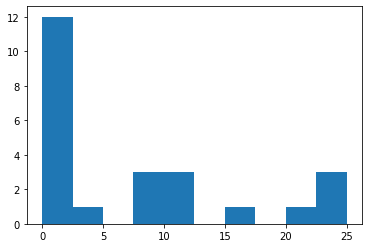

In [ ]:
plt.hist(D_pop_df_12[D_pop_df_12['Trade Name'] == 'BOTANICO 2']['popularity_by_hour'])

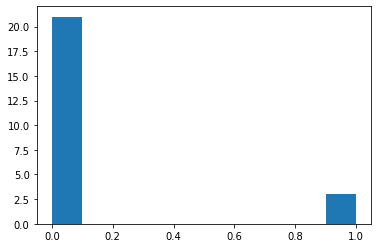

In [ ]:
for val in min_avg_pop['popularity_by_hour']:
  plt.hist(val)

### Seasonal Analysis (Visitor and Popularity Analysis Based on Seasons)

In [ ]:
Season_Df = pd.DataFrame(data = {'Monthly_avg_visits': [2.645161,1.571429,2.258065,2.5,1.741935,1.633333,1.419355,1.354839,2.166667,2.612903,2.466667,2.516129]
                          ,'Monthly_avg_pop': [13.958333,6.125,8.291667,8.291667,6.541667,7.125,5.5,4.958333,7.125,8.541667,7.458333,9.333333],
                          'Season': ['Winter','Winter','Spring','Spring','Spring','Summer','Summer','Summer','Fall','Fall','Fall','Winter']})
Season_Df.head()

,Monthly_avg_visits,Monthly_avg_pop,Season
0,2.645161,13.958333,Winter
1,1.571429,6.125000,Winter
2,2.258065,8.291667,Spring
3,2.500000,8.291667,Spring
4,1.741935,6.541667,Spring


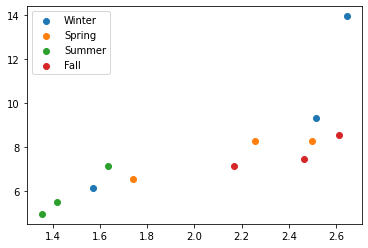

In [ ]:
winter = Season_Df[Season_Df['Season'] == 'Winter'].dropna()
spring = Season_Df[Season_Df['Season'] == 'Spring'].dropna()
fall = Season_Df[Season_Df['Season'] == 'Summer'].dropna()
summer = Season_Df[Season_Df['Season'] == 'Fall'].dropna()

fig, ax = plt.subplots()
a = plt.scatter(winter['Monthly_avg_visits'], winter['Monthly_avg_pop'])
b = plt.scatter(spring['Monthly_avg_visits'], spring['Monthly_avg_pop'])
c = plt.scatter(fall['Monthly_avg_visits'], fall['Monthly_avg_pop'])
d = plt.scatter(summer['Monthly_avg_visits'], summer['Monthly_avg_pop'])
ax.legend([a, b, c, d], ['Winter', 'Spring', 'Summer', 'Fall'])

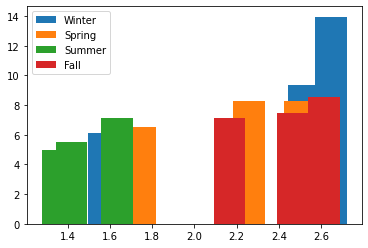

In [ ]:
fig, ax = plt.subplots()
a = plt.bar(winter['Monthly_avg_visits'], winter['Monthly_avg_pop'], width= .15)
b = plt.bar(spring['Monthly_avg_visits'], spring['Monthly_avg_pop'], width= .15)
c = plt.bar(fall['Monthly_avg_visits'], fall['Monthly_avg_pop'], width= .15)
d = plt.bar(summer['Monthly_avg_visits'], summer['Monthly_avg_pop'], width= .15)
ax.legend([a, b, c, d], ['Winter', 'Spring', 'Summer', 'Fall'])

In [ ]:
from ast import literal_eval
def season_func(month):
  if(month == 1 or month ==2 or month == 12):
    return 'Winter'
  elif(month == 3 or month == 4 or month == 5):
    return 'Spring'
  elif(month == 6 or month == 7 or month == 8):
    return 'Summer'
  elif(month == 9 or month == 10 or month == 11):
    return 'Fall'

dispo_GS_df['Season'] = dispo_GS_df['month_start'].transform(lambda x: season_func(x))

dispo_GS_df['popularity_by_hour'] = dispo_GS_df['popularity_by_hour'].transform(lambda x: literal_eval(x))
dispo_GS_df['Avg_pop'] = dispo_GS_df['popularity_by_hour'].transform(lambda x: sum(x)/len(x))

dispo_GS_df['visits_by_day'] = dispo_GS_df['visits_by_day'].transform(lambda x: literal_eval(x))
dispo_GS_df['Avg_visits'] = dispo_GS_df['visits_by_day'].transform(lambda x: sum(x)/len(x))
dispo_GS_df.head(2)

,address_placekey,placekey,Business File Number,License Type,Entity Name,Trade Name,Current License Status,Expiration Date,Address,region_x,safegraph_place_id,location_name,street_address,city,postal_code,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,month_start,month_end,Season,Avg_pop,Avg_visits
0,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-01-01 07:00:00+00:00,2018-02-01 07:00:00+00:00,41,10,"[0, 1, 0, 1, 2, 1, 0, 3, 3, 4, 1, 1, 1, 0, 0, ...",80310014011,"{""080050835003"":4,""080590101003"":4,""0805901205...","{""080310014011"":4,""080310003022"":4}","{""US"":9}",11833.0,85.0,"{""<5"":0,""5-10"":1,""11-20"":2,""21-60"":10,""61-120""...","{""REI"":33}","{""King Soopers"":60,""Sprouts Farmers Market"":40...","[0, 0, 0, 0, 0, 0, 1, 2, 21, 33, 30, 24, 15, 7...","{""Monday"":6,""Tuesday"":11,""Wednesday"":8,""Thursd...","{""android"":4,""ios"":10}",1,2,Winter,5.750,1.322581
1,224@5q9-bp6-28v,224-223@5q9-bp6-28v,2013-BFN-1069359,Retail Marijuana Store,"BUD BUM, LLC",BUD BUM,License Issued - Active,2/18/2022 12:00:00 AM,1325 INCA ST,CO,sg:877c43b9db304a9ba4006f96a02b4692,Bud Bums,1325 S Inca St,Denver,80223,2018-02-01 07:00:00+00:00,2018-03-01 07:00:00+00:00,36,7,"[0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 3, 3, 3, 2, ...",80310014011,"{""080050835003"":4,""080410073002"":4,""0803100030...",{},"{""US"":8}",13831.0,156.5,"{""<5"":0,""5-10"":5,""11-20"":3,""21-60"":3,""61-120"":...","{""Chase"":50,""Starbucks"":31}","{""Starbucks"":76,""McDonald's"":43,""King Soopers""...","[0, 0, 0, 0, 0, 0, 3, 4, 20, 31, 28, 23, 14, 9...","{""Monday"":6,""Tuesday"":10,""Wednesday"":8,""Thursd...","{""android"":4,""ios"":4}",2,3,Winter,6.125,1.285714


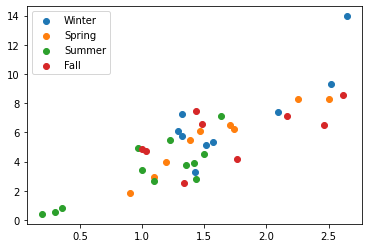

In [ ]:
winter = dispo_GS_df[dispo_GS_df['Season'] == 'Winter'].dropna()
spring = dispo_GS_df[dispo_GS_df['Season'] == 'Spring'].dropna()
fall = dispo_GS_df[dispo_GS_df['Season'] == 'Summer'].dropna()
summer = dispo_GS_df[dispo_GS_df['Season'] == 'Fall'].dropna()

fig, ax = plt.subplots()
a = plt.scatter(winter['Avg_visits'], winter['Avg_pop'])
b = plt.scatter(spring['Avg_visits'], spring['Avg_pop'])
c = plt.scatter(fall['Avg_visits'], fall['Avg_pop'])
d = plt.scatter(summer['Avg_visits'], summer['Avg_pop'])
ax.legend([a, b, c, d], ['Winter', 'Spring', 'Summer', 'Fall'])

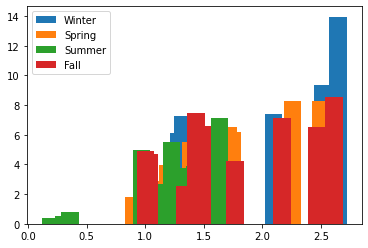

In [ ]:
fig, ax = plt.subplots()
a = plt.bar(winter['Avg_visits'], winter['Avg_pop'], width= .15)
b = plt.bar(spring['Avg_visits'], spring['Avg_pop'], width= .15)
c = plt.bar(fall['Avg_visits'], fall['Avg_pop'], width= .15)
d = plt.bar(summer['Avg_visits'], summer['Avg_pop'], width= .15)
ax.legend([a, b, c, d], ['Winter', 'Spring', 'Summer', 'Fall'])

In [ ]:
from pyspark.sql.functions import from_json,expr
from pyspark.sql.types import StructType, StructField, StringType, ArrayType, IntegerType

day_schema = StructType(
    [
      StructField('Monday', IntegerType(),True),
      StructField('Tuesday', IntegerType(),True),
      StructField('Wednesday', IntegerType(),True),
      StructField('Thursday', IntegerType(),True),
      StructField('Friday', IntegerType(),True),
      StructField('Saturday', IntegerType(),True),
      StructField('Sunday', IntegerType(),True)
    ]
)
dispo_GS_df = dispo_GS_df.drop(['visitor_country_of_origin'], axis = 1)
dispo_GS_df = spark.createDataFrame(dispo_GS_df)
dispo_GS_exploded = dispo_GS_df.withColumn('popularity_by_day', from_json('popularity_by_day', day_schema)).select('Trade Name','raw_visit_counts','raw_visitor_counts','visits_by_day',
          'distance_from_home','median_dwell',
          'bucketed_dwell_times','popularity_by_hour','popularity_by_day.*',
          'device_type','Season', 'Avg_pop','Avg_visits')

In [ ]:
dispo_GS_exploded = dispo_GS_exploded.toPandas()
dispo_GS_exploded.head()

,Trade Name,raw_visit_counts,raw_visitor_counts,visits_by_day,distance_from_home,median_dwell,bucketed_dwell_times,popularity_by_hour,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,device_type,Season,Avg_pop,Avg_visits
0,BUD BUM,41,10,"[0, 1, 0, 1, 2, 1, 0, 3, 3, 4, 1, 1, 1, 0, 0, ...",11833.0,85.0,"{""<5"":0,""5-10"":1,""11-20"":2,""21-60"":10,""61-120""...","[0, 0, 0, 0, 0, 0, 1, 2, 21, 33, 30, 24, 15, 7...",6,11,8,6,8,2,0,"{""android"":4,""ios"":10}",Winter,5.750,1.322581
1,BUD BUM,36,7,"[0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 3, 3, 3, 2, ...",13831.0,156.5,"{""<5"":0,""5-10"":5,""11-20"":3,""21-60"":3,""61-120"":...","[0, 0, 0, 0, 0, 0, 3, 4, 20, 31, 28, 23, 14, 9...",6,10,8,6,6,0,0,"{""android"":4,""ios"":4}",Winter,6.125,1.285714
2,BUD BUM,2,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",NaN,25.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":1,""61-120"":...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,0,0,0,0,1,"{""android"":0,""ios"":5}",Spring,0.125,0.064516
3,BUD BUM,43,11,"[3, 1, 0, 0, 3, 1, 2, 2, 3, 0, 0, 2, 2, 2, 0, ...",13831.0,85.0,"{""<5"":1,""5-10"":8,""11-20"":6,""21-60"":4,""61-120"":...","[1, 0, 0, 0, 0, 0, 0, 2, 21, 31, 23, 22, 14, 5...",9,9,7,8,10,0,0,"{""android"":5,""ios"":4}",Spring,5.500,1.387097
4,BUD BUM,44,12,"[0, 0, 2, 1, 3, 1, 1, 0, 2, 2, 3, 2, 0, 0, 0, ...",12997.0,132.0,"{""<5"":0,""5-10"":6,""11-20"":6,""21-60"":2,""61-120"":...","[0, 0, 0, 0, 0, 0, 0, 1, 18, 27, 30, 33, 19, 1...",12,8,8,11,4,1,0,"{""android"":4,""ios"":6}",Spring,6.125,1.466667


In [ ]:
winter = dispo_GS_exploded[dispo_GS_exploded['Season'] == 'Winter'].dropna()
spring = dispo_GS_exploded[dispo_GS_exploded['Season'] == 'Spring'].dropna()
fall = dispo_GS_exploded[dispo_GS_exploded['Season'] == 'Summer'].dropna()
summer = dispo_GS_exploded[dispo_GS_exploded['Season'] == 'Fall'].dropna()

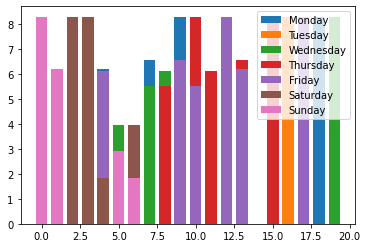

In [ ]:
fig, ax = plt.subplots()
a = plt.bar(spring['Monday'], spring['Avg_pop'], width= .75)
b = plt.bar(spring['Tuesday'], spring['Avg_pop'], width= .75)
c = plt.bar(spring['Wednesday'], spring['Avg_pop'], width= .75)
d = plt.bar(spring['Thursday'], spring['Avg_pop'], width= .75)
e = plt.bar(spring['Friday'], spring['Avg_pop'], width= .75)
f = plt.bar(spring['Saturday'], spring['Avg_pop'], width= .75)
g = plt.bar(spring['Sunday'], spring['Avg_pop'], width= .75)
ax.legend([a, b, c, d,e,f,g], ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])

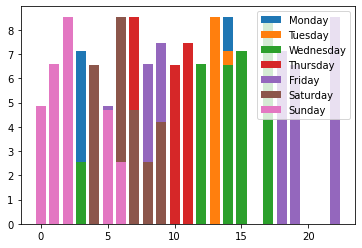

In [ ]:
fig, ax = plt.subplots()
a = plt.bar(summer['Monday'], summer['Avg_pop'], width= .75)
b = plt.bar(summer['Tuesday'], summer['Avg_pop'], width= .75)
c = plt.bar(summer['Wednesday'], summer['Avg_pop'], width= .75)
d = plt.bar(summer['Thursday'], summer['Avg_pop'], width= .75)
e = plt.bar(summer['Friday'], summer['Avg_pop'], width= .75)
f = plt.bar(summer['Saturday'], summer['Avg_pop'], width= .75)
g = plt.bar(summer['Sunday'], summer['Avg_pop'], width= .75)
ax.legend([a, b, c, d,e,f,g], ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])

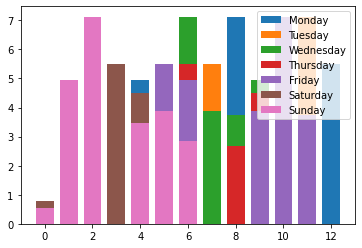

In [ ]:
fig, ax = plt.subplots()
a = plt.bar(fall['Monday'], fall['Avg_pop'], width= .75)
b = plt.bar(fall['Tuesday'], fall['Avg_pop'], width= .75)
c = plt.bar(fall['Wednesday'], fall['Avg_pop'], width= .75)
d = plt.bar(fall['Thursday'], fall['Avg_pop'], width= .75)
e = plt.bar(fall['Friday'], fall['Avg_pop'], width= .75)
f = plt.bar(fall['Saturday'], fall['Avg_pop'], width= .75)
g = plt.bar(fall['Sunday'], fall['Avg_pop'], width= .75)
ax.legend([a, b, c, d,e,f,g], ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])

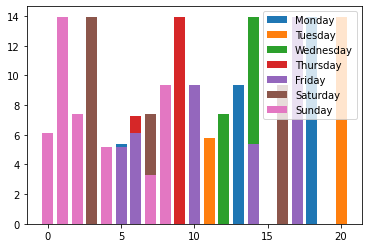

In [ ]:
fig, ax = plt.subplots()
a = plt.bar(winter['Monday'], winter['Avg_pop'], width= .75)
b = plt.bar(winter['Tuesday'], winter['Avg_pop'], width= .75)
c = plt.bar(winter['Wednesday'], winter['Avg_pop'], width= .75)
d = plt.bar(winter['Thursday'], winter['Avg_pop'], width= .75)
e = plt.bar(winter['Friday'], winter['Avg_pop'], width= .75)
f = plt.bar(winter['Saturday'], winter['Avg_pop'], width= .75)
g = plt.bar(winter['Sunday'], winter['Avg_pop'], width= .75)
ax.legend([a, b, c, d,e,f,g], ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])

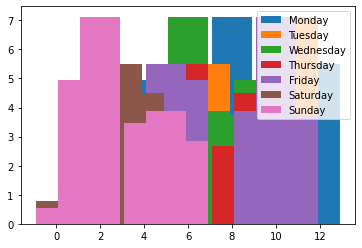

In [ ]:
fig, ax = plt.subplots()
a = plt.bar(fall['Monday'], fall['Avg_pop'], width= 1.85)
b = plt.bar(fall['Tuesday'], fall['Avg_pop'], width= 1.85)
c = plt.bar(fall['Wednesday'], fall['Avg_pop'], width= 1.85)
d = plt.bar(fall['Thursday'], fall['Avg_pop'], width= 1.85)
e = plt.bar(fall['Friday'], fall['Avg_pop'], width= 1.85)
f = plt.bar(fall['Saturday'], fall['Avg_pop'], width= 1.85)
g = plt.bar(fall['Sunday'], fall['Avg_pop'], width= 1.85)
ax.legend([a, b, c, d,e,f,g], ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])

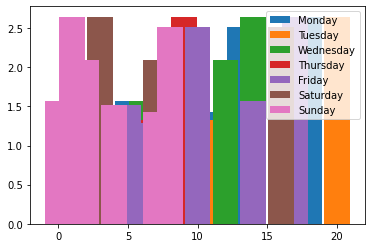

In [ ]:
fig, ax = plt.subplots()
a = plt.bar(winter['Monday'], winter['Avg_visits'], width= 1.85)
b = plt.bar(winter['Tuesday'], winter['Avg_visits'], width= 1.85)
c = plt.bar(winter['Wednesday'], winter['Avg_visits'], width= 1.85)
d = plt.bar(winter['Thursday'], winter['Avg_visits'], width= 1.85)
e = plt.bar(winter['Friday'], winter['Avg_visits'], width= 1.85)
f = plt.bar(winter['Saturday'], winter['Avg_visits'], width= 1.85)
g = plt.bar(winter['Sunday'], winter['Avg_visits'], width= 1.85)
ax.legend([a, b, c, d,e,f,g], ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])

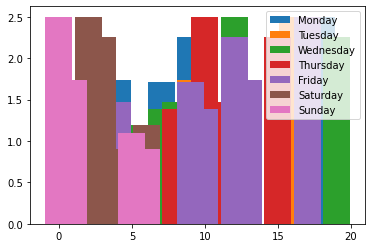

In [ ]:
fig, ax = plt.subplots()
a = plt.bar(spring['Monday'], spring['Avg_visits'], width= 1.85)
b = plt.bar(spring['Tuesday'], spring['Avg_visits'], width= 1.85)
c = plt.bar(spring['Wednesday'], spring['Avg_visits'], width= 1.85)
d = plt.bar(spring['Thursday'], spring['Avg_visits'], width= 1.85)
e = plt.bar(spring['Friday'], spring['Avg_visits'], width= 1.85)
f = plt.bar(spring['Saturday'], spring['Avg_visits'], width= 1.85)
g = plt.bar(spring['Sunday'], spring['Avg_visits'], width= 1.85)
ax.legend([a, b, c, d,e,f,g], ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])

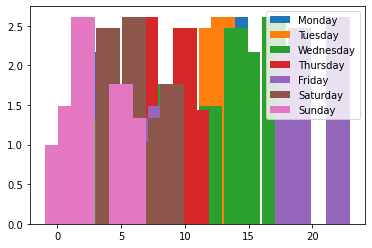

In [ ]:
fig, ax = plt.subplots()
a = plt.bar(summer['Monday'], summer['Avg_visits'], width= 1.85)
b = plt.bar(summer['Tuesday'], summer['Avg_visits'], width= 1.85)
c = plt.bar(summer['Wednesday'], summer['Avg_visits'], width= 1.85)
d = plt.bar(summer['Thursday'], summer['Avg_visits'], width= 1.85)
e = plt.bar(summer['Friday'], summer['Avg_visits'], width= 1.85)
f = plt.bar(summer['Saturday'], summer['Avg_visits'], width= 1.85)
g = plt.bar(summer['Sunday'], summer['Avg_visits'], width= 1.85)
ax.legend([a, b, c, d,e,f,g], ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])

### Conclusion

In terms of visitors - seasonally - the months in which the dispensaries recieved the most visits are Jabuary, October, November, December, and March. This is surprising becuase It wouldve made more sense for the month of April to be most poupular month, with the advent of 4/20 being a popular day for marijuana consumption. But like with the liquor data the presence of one day of the month were the product is popular does not offset the overall mean visits for that whole month. The trend that is present is that with the presence of colder weather, dispensary visits increase.

As for popularity, The months that where dispensaries were the most popular were January, December, October, March, April,and November. This seems instesting becuase it correlates with the visits seasonal trends - the colder months tend to show increase in dispensay popularity. One trend that is present is that the month of April is showing a large increase in  popularity. This is interesting because of the variation between visit and popularity trends. This could be because the BOTANICO 2 dispensary does most of its sales through online sales. This could be the reasoning behind the increase in popularit but no increase in visits.